# **Libraries**

In [1]:
from matplotlib import pyplot as plt
import time
import numpy as np
import datetime
import pandas as pd
from datetime import datetime
from pylab import *

# **Preprocessing**

## I-80

In [2]:
path='/home/m/Desktop/NGSIM/original/I-80.csv'
dfI=pd.read_csv(path)
dfI.columns = ['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y',
              'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID',
              'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following',
              'Space_Headway', 'Time_Headway', 'Location']
dfI.drop('D_Zone',axis=1,inplace=True)
dfI.drop('O_Zone',axis=1,inplace=True)
dfI.drop('Int_ID',axis=1,inplace=True)
dfI.drop('Section_ID',axis=1,inplace=True)
dfI.drop('Direction',axis=1,inplace=True)
dfI.drop('Movement',axis=1,inplace=True)
dfI.drop('Location',axis=1,inplace=True)
dfI.drop('Global_X',axis=1,inplace=True)
dfI.drop('Global_Y',axis=1,inplace=True)
dfI.drop('Preceding',axis=1,inplace=True)
dfI.drop('Following',axis=1,inplace=True)
dfI.drop('Space_Headway',axis=1,inplace=True)
dfI.drop('Time_Headway',axis=1,inplace=True)
#df.drop(df[df.Lane_ID > 5].index, inplace=True)
dfI.drop(dfI[dfI.v_Class == 3].index, inplace=True)
dfI.drop(dfI[dfI.v_Class == 1].index, inplace=True)
dfI.drop('v_Width',axis=1,inplace=True)
dfI.drop('v_length',axis=1,inplace=True)
dfI.drop('v_Class',axis=1,inplace=True)
dfI["Local_X"] = 0.3048 * dfI["Local_X"]
dfI["Local_Y"] = 0.3048 * dfI["Local_Y"]
dfI["v_Vel"] = 0.3048 * dfI["v_Vel"]
dfI["v_Acc"] = 0.3048 * dfI["v_Acc"]
#df["Vehicle_ID"]=df["Vehicle_ID"].astype('str')
dfI['Global_Time']=pd.to_datetime(dfI['Global_Time'],unit='ms')
dfI.sort_values(['Vehicle_ID','Total_Frames','Frame_ID','Global_Time'],inplace=True)
dfI['Global_Time']=dfI['Global_Time'].dt.strftime('%H:%M:%S:%f')
#dfI

## Us-101

In [3]:
path1='/home/m/Desktop/NGSIM/original/us-101.csv'
dfUS=pd.read_csv(path1)
dfUS.columns = ['Vehicle_ID', 'Frame_ID', 'Total_Frames', 'Global_Time', 'Local_X', 'Local_Y', 'Global_X', 'Global_Y', 'v_length', 'v_Width', 'v_Class', 'v_Vel', 'v_Acc', 'Lane_ID', 'O_Zone', 'D_Zone', 'Int_ID', 'Section_ID', 'Direction', 'Movement', 'Preceding', 'Following', 'Space_Headway', 'Time_Headway', 'Location']
#df.drop(df[df.Lane_ID > 5].index, inplace=True)
dfUS.drop('D_Zone',axis=1,inplace=True)
dfUS.drop('O_Zone',axis=1,inplace=True)
dfUS.drop('Int_ID',axis=1,inplace=True)
dfUS.drop('Section_ID',axis=1,inplace=True)
dfUS.drop('Direction',axis=1,inplace=True)
dfUS.drop('Movement',axis=1,inplace=True)
dfUS.drop('Location',axis=1,inplace=True)
dfUS.drop('Global_X',axis=1,inplace=True)
dfUS.drop('Global_Y',axis=1,inplace=True)
dfUS.drop('Preceding',axis=1,inplace=True)
dfUS.drop('Following',axis=1,inplace=True)
dfUS.drop('Space_Headway',axis=1,inplace=True)
dfUS.drop('Time_Headway',axis=1,inplace=True)
dfUS.drop(dfUS[dfUS.v_Class == 3].index, inplace=True)
dfUS.drop(dfUS[dfUS.v_Class == 1].index, inplace=True)
dfUS.drop('v_Width',axis=1,inplace=True)
dfUS.drop('v_length',axis=1,inplace=True)
dfUS.drop('v_Class',axis=1,inplace=True)
dfUS["Local_X"] = 0.3048 * dfUS["Local_X"]
dfUS["Local_Y"] = 0.3048 * dfUS["Local_Y"]
dfUS["v_Vel"] = 0.3048 * dfUS["v_Vel"]
dfUS["v_Acc"] = 0.3048 * dfUS["v_Acc"]
#df["Vehicle_ID"]=df["Vehicle_ID"].astype('str')
dfUS['Global_Time']=pd.to_datetime(dfUS['Global_Time'],unit='ms')
dfUS.sort_values(['Vehicle_ID','Total_Frames','Frame_ID','Global_Time'],inplace=True)
dfUS['Global_Time']=dfUS['Global_Time'].dt.strftime('%H:%M:%S:%f')
#dfUS

# Information about Dataset

## I-80

In [ ]:
print("max and min of I-80 width ","   max: ",dfI['Local_X'].max(),"  min: ",dfI['Local_X'].min())
print("max and min of I-80 Lenght","   max: ",dfI['Local_Y'].max(),"   min: ",dfI['Local_Y'].min())

## US-101

In [ ]:
print("max and min of US-101 width","   max: ",dfUS['Local_X'].max(),"  min: ",dfUS['Local_X'].min())
print("max and min of US-101 Lenght","   max: ",dfUS['Local_Y'].max(),"  min: ",dfUS['Local_Y'].min())

# Plot processed Data

## I-80

In [4]:
groupedI = dfI.groupby(['Vehicle_ID','Total_Frames'])
Vehicles_Trajectoy_I=[]
for name, group in groupedI:
    Vehicles_Trajectoy_I.append(group)
print("number of total I-80 trajectories    : ",len(Vehicles_Trajectoy_I))
del Vehicles_Trajectoy_I[2959 : 2961]### داده ۲۹۶۰ یه داده ی معیوبه


number of total I-80 trajectories    :  5404


In [ ]:
figure(figsize=(25,10))
for path in Vehicles_Trajectoy_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550) 
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.title("I-80 Trajectories : 5404",fontsize=18)
    plt.xlabel('Local_Y', fontsize=14)
    plt.ylabel('Local_X', fontsize=14)


## US-101

In [5]:
groupedUS = dfUS.groupby(['Vehicle_ID','Total_Frames'])
Vehicles_Trajectoy_US=[]
for name, group in groupedUS:
    Vehicles_Trajectoy_US.append(group)
print("number of total US-101 trajectories    : ",len(Vehicles_Trajectoy_US))

number of total US-101 trajectories    :  5918


In [ ]:
figure(figsize=(25,10))
for path in Vehicles_Trajectoy_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.title("US-101 Trajectories : 5918",fontsize=18)
    plt.xlabel('Local_Y', fontsize=14)
    plt.ylabel('Local_X', fontsize=14)

# Maneuver Labeling

## I-80

In [6]:
lane_keep_I=[]
lane_change_left_I=[]
lane_change_right_I=[]

for path in Vehicles_Trajectoy_I:
    path.reset_index(inplace=True,drop=True)
    if len(path['Lane_ID'].value_counts())>1:
         for i in path['Lane_ID'].diff()[lambda x: x != 0].index.tolist():
             p=pd.concat([path[i-60:i],path[i:i+60]],ignore_index=True)
             if ((p['Local_X'].max()-p['Local_X'].min())>3.5) and ((p['Local_Y'].max()-p['Local_Y'].min())<300)and (len(p)==120):
                 trend=[p['Lane_ID'][h] for h in p['Lane_ID'].diff()[lambda x: x != 0].index.tolist()]

                 if (trend[0]<trend[1]) and (len(trend)==2):
                     lane_change_right_I.append(p)
                 elif (trend[0]>trend[1]) and (len(trend)==2):
                     lane_change_left_I.append(p)
    elif len(path['Lane_ID'].value_counts())==1:
         chunks = [path[x:x+120] for x in range(0, len(path), 120)]
         for i in chunks: 
             if ((i['Local_X'].max()-i['Local_X'].min())<1)and (30<(i['Local_Y'].max()-i['Local_Y'].min())) and (len(i)==120):
                 lane_keep_I.append(i)
                 #print("#############Lane keep number ",len(i))
                    
print("number of lane keep sequence           : ",len(lane_keep_I))
print("number of lane change left sequence    : ",len(lane_change_left_I))
print("number of lane change right sequence   : ",len(lane_change_right_I))



indexes_change_left_I  = [4,7,29,31,40,50,52,69,87,91,106,111,116,117,124,127,133,135,141,143,148,156,176,177,182,199,206,207,209,220,
     223,228,236,239,242,245,259,260,264,267,270,271,282,286,292,293,305,308,310,314,320,323,327,333,341,358,359,
     366,371,373,378,382,383,389,392,398,399,400,401,403,405,406,411,414,416,430,433,437,445,447,448,456,459,466,
     469,471,477,481,484,485,490,498,503,506,507,511,514,518,521,528,529,530,531,542,543,549,553,554,557,562,563,
     564,565,573,577,579,581,583,586,591,597,601,606,608,611,612,614,619,623,624,628,630,631,635,636,637,644,646,
     654,657,661,663,670,672,673,674,676,679,681,682,684,687,688,689,695,711,712,713,714,715,717,719,722,724,726,
     727,729,730,731,734,739,742,749,752,753,757,763,765,767,773,775,776,779,780,786,787,789,793,796,797,798,802,
     804,806,808,813,816,819,821,825,829,831,834,837,838,840,842,843,846,849,854,856,860,862,865,872,874,875,876,
     879,880,881,883,885,886,898,899,902,903,904,906,909,912,916,922,923,924,925,926,927]

for index in sorted(indexes_change_left_I , reverse=True):
    del lane_change_left_I[index] 

    
indexes_lane_keep_I=[2,3,11,16,17,22,25,26,27,28,29,30,39,45,56,59,64,65,68,70,75,80,88,100,101,102,103,107,109,110,
                   115,119,123,124,127,135,136,137,148,152,162,166,171,176,177,190,195,196,197,200,205,211,215,224,
                   229,230,241,246,249]
for index in sorted(indexes_lane_keep_I , reverse=True):
    del lane_keep_I[index]    
### Delete 2 of bad maneuver
del lane_change_right_I[61 : 62]
del lane_change_right_I[70 : 71]

lane_keep_I=lane_keep_I[:142]

import random
lane_change_left_I=random.sample(lane_change_left_I, 142)

print("number of lane keep sequence           : ",len(lane_keep_I))
print("number of lane change left sequence    : ",len(lane_change_left_I))
print("number of lane change right sequence   : ",len(lane_change_right_I))

Duration_of_lane_keep_I_9=[]
for i in lane_keep_I:
    Duration_of_lane_keep_I_9.append(i[25:95])
    
Duration_of_lane_change_left_I_9=[]
for i in lane_change_left_I:
    Duration_of_lane_change_left_I_9.append(i[25:95]) 
    
Duration_of_lane_change_right_I_9=[]
for i in lane_change_right_I:
    Duration_of_lane_change_right_I_9.append(i[25:95]) 
    
print(len(Duration_of_lane_keep_I_9[0]))
print(len(Duration_of_lane_change_right_I_9[0]))
print(len(Duration_of_lane_change_left_I_9[0]))

lane_keep_I=Duration_of_lane_keep_I_9
lane_change_left_I=Duration_of_lane_change_right_I_9
lane_change_right_I=Duration_of_lane_change_left_I_9

number of lane keep sequence           :  14931
number of lane change left sequence    :  928
number of lane change right sequence   :  144
number of lane keep sequence           :  142
number of lane change left sequence    :  142
number of lane change right sequence   :  142
70
70
70


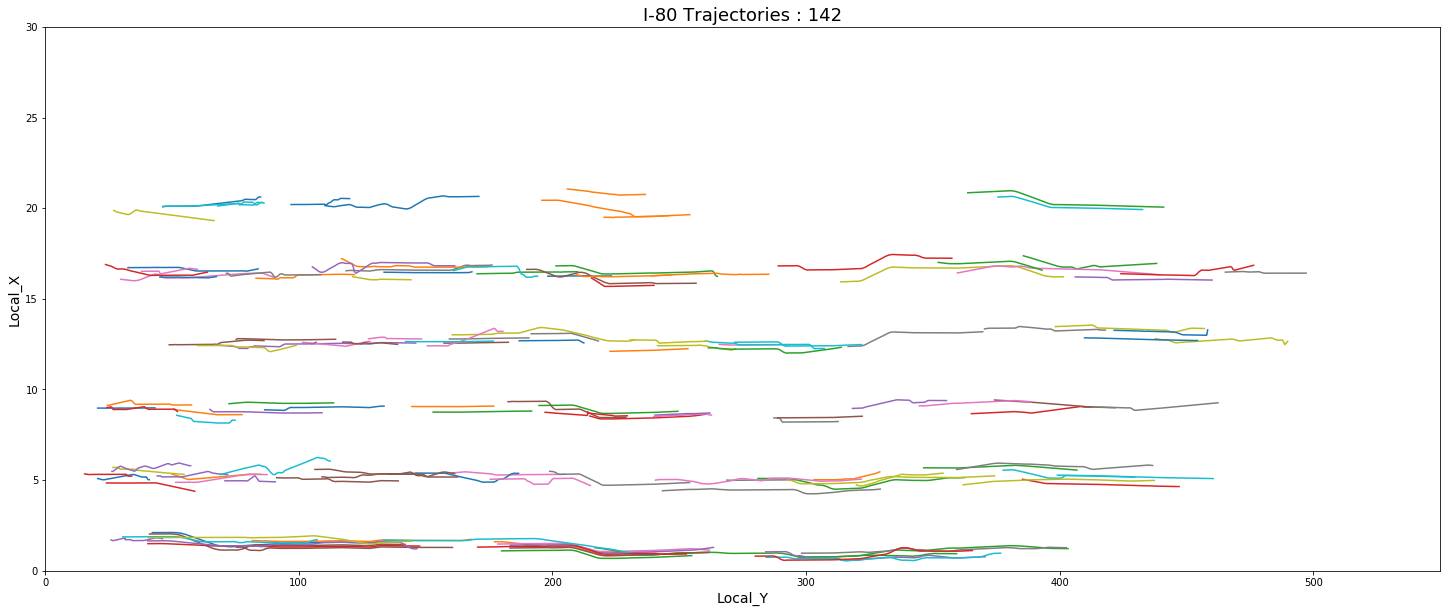

In [44]:
# for path in Duration_of_lane_change_right_I_9:
# #     print("##########################################  ",count,"  ###############################################")
#     path=path.to_numpy()
#     yline = path[:,[4]].flatten()
#     xline = path[:,[5]].flatten()
#     figure(figsize=(25,10))
#     plt.xlim(0, 550)
#     plt.ylim(0, 30)
#     plt.plot(xline, yline)
#     plt.xlabel('Local_Y', fontsize=16)
#     plt.ylabel('Local_X', fontsize=16)
# #     plt.show()
figure(figsize=(25,10))
for path in Duration_of_lane_keep_I_9:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550) 
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.title("I-80 Trajectories : 142",fontsize=18)
    plt.xlabel('Local_Y', fontsize=14)
    plt.ylabel('Local_X', fontsize=14)

In [18]:
lane_change_left_I[0][-70:].head(70)

Vehicle_ID  Frame_ID  Total_Frames      Global_Time    Local_X  \
50         1118      2816           829  00:04:08:500000  23.881994   
51         1118      2817           829  00:04:08:600000  23.792993   
52         1118      2818           829  00:04:08:700000  23.703686   
53         1118      2819           829  00:04:08:800000  23.614990   
54         1118      2820           829  00:04:08:900000  23.525988   
..          ...       ...           ...              ...        ...   
115        1118      2881           829  00:04:15:000000  20.802295   
116        1118      2882           829  00:04:15:100000  20.803210   
117        1118      2883           829  00:04:15:200000  20.804734   
118        1118      2884           829  00:04:15:300000  20.805953   
119        1118      2885           829  00:04:15:400000  20.807172   

        Local_Y     v_Vel     v_Acc  Lane_ID  
50   128.150112  6.288024  3.413760        7  
51   128.811528  6.754368  3.413760        7  
52   129.505253  7.412736  3.413760        7  
53   130.273044  7.961376  3.413760        7  
54   131.112158  8.555736  3.413760        7  
..          ...       ...       ...      ...  
115  169.382237  4.669536  1.264920        6  
116  169.849495  4.837176  2.151888        6  
117  170.340223  5.068824  2.624328        6  
118  170.859907  5.334000  2.691384        6  
119  171.407328  5.599176  2.609088        6  

[70 rows x 9 columns]

### Select good trajectory I-80 ;)

##########################################   0   ###############################################


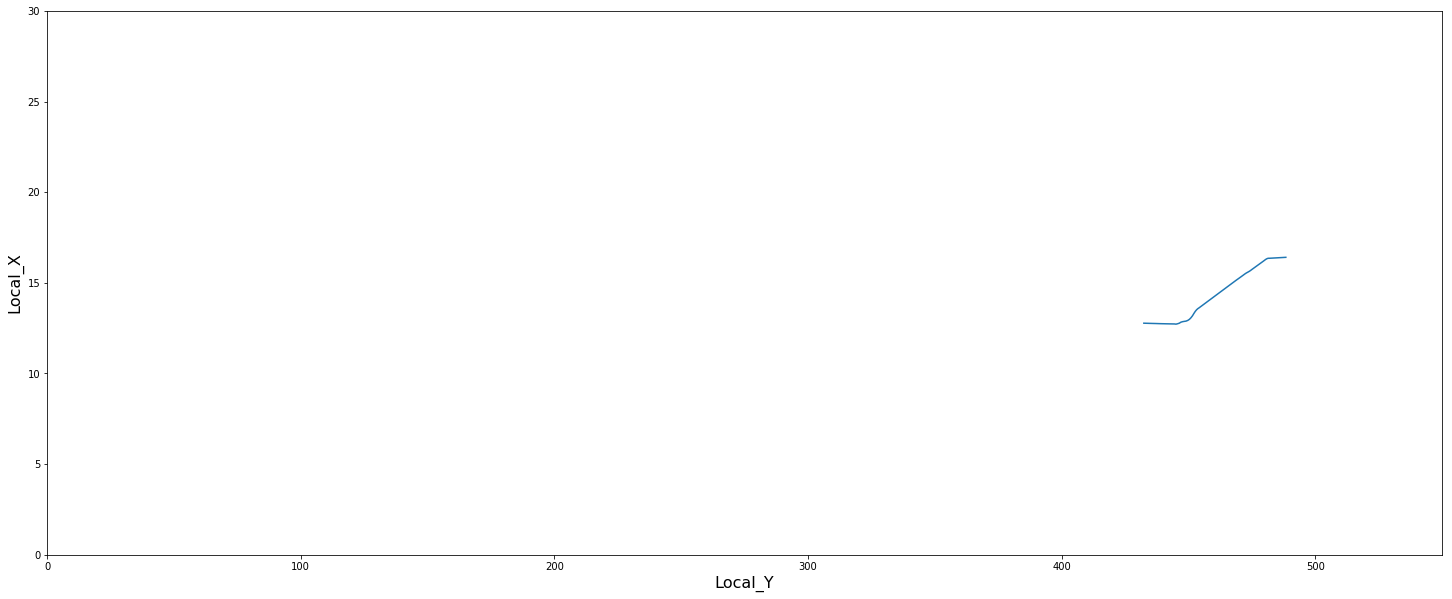

##########################################   1   ###############################################


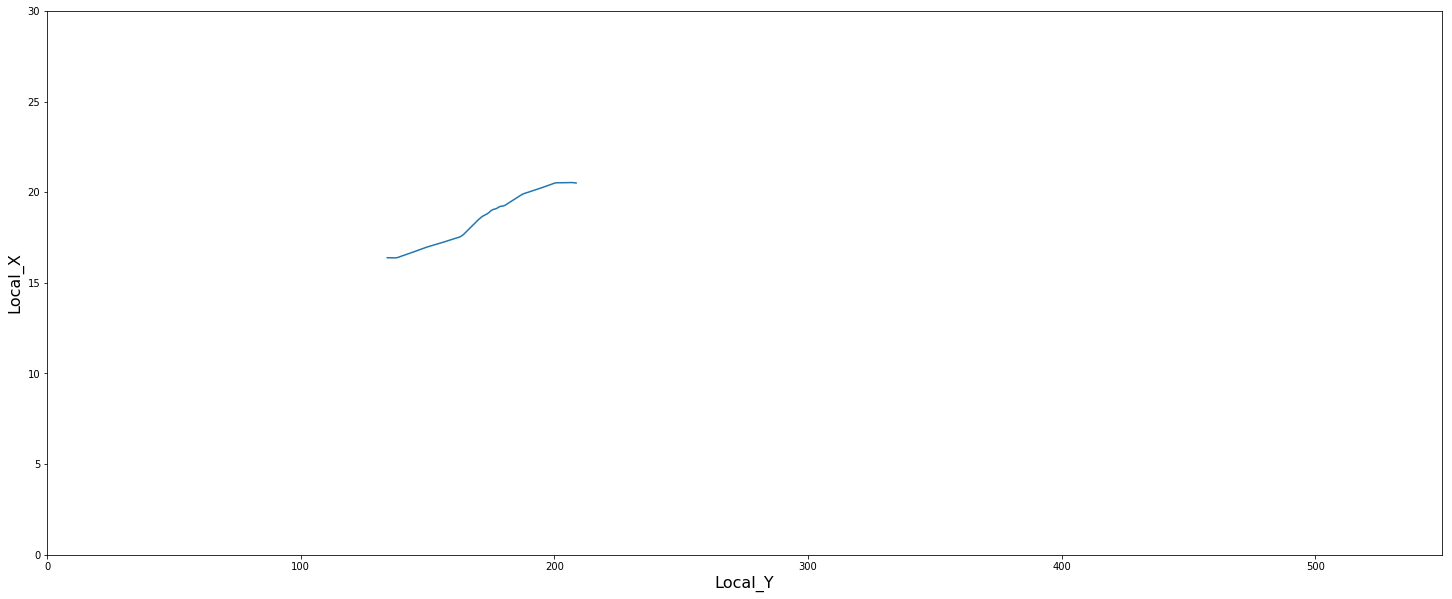

##########################################   2   ###############################################


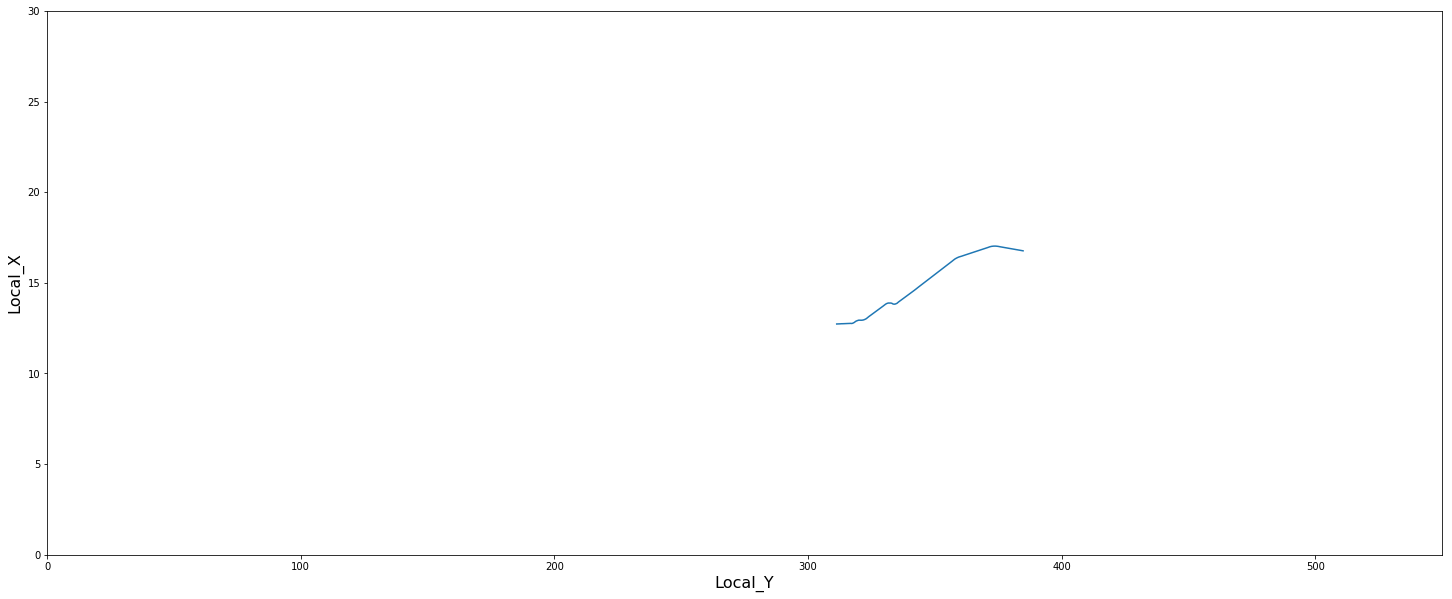

##########################################   3   ###############################################


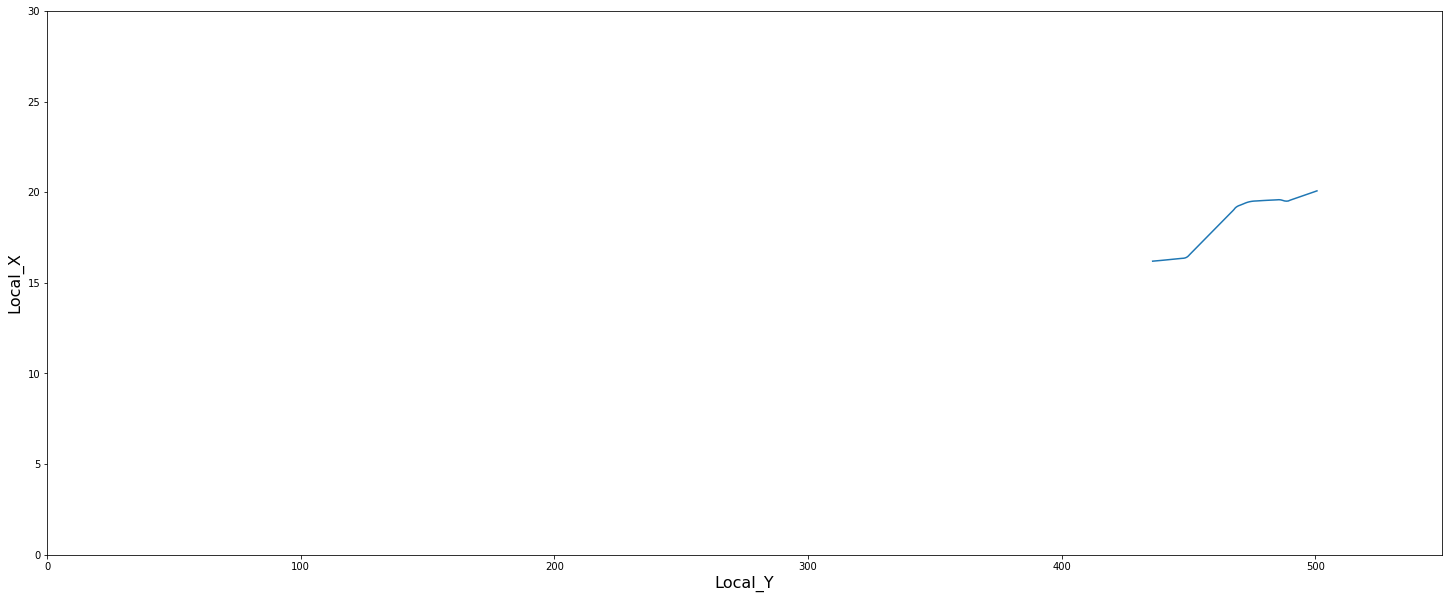

##########################################   4   ###############################################


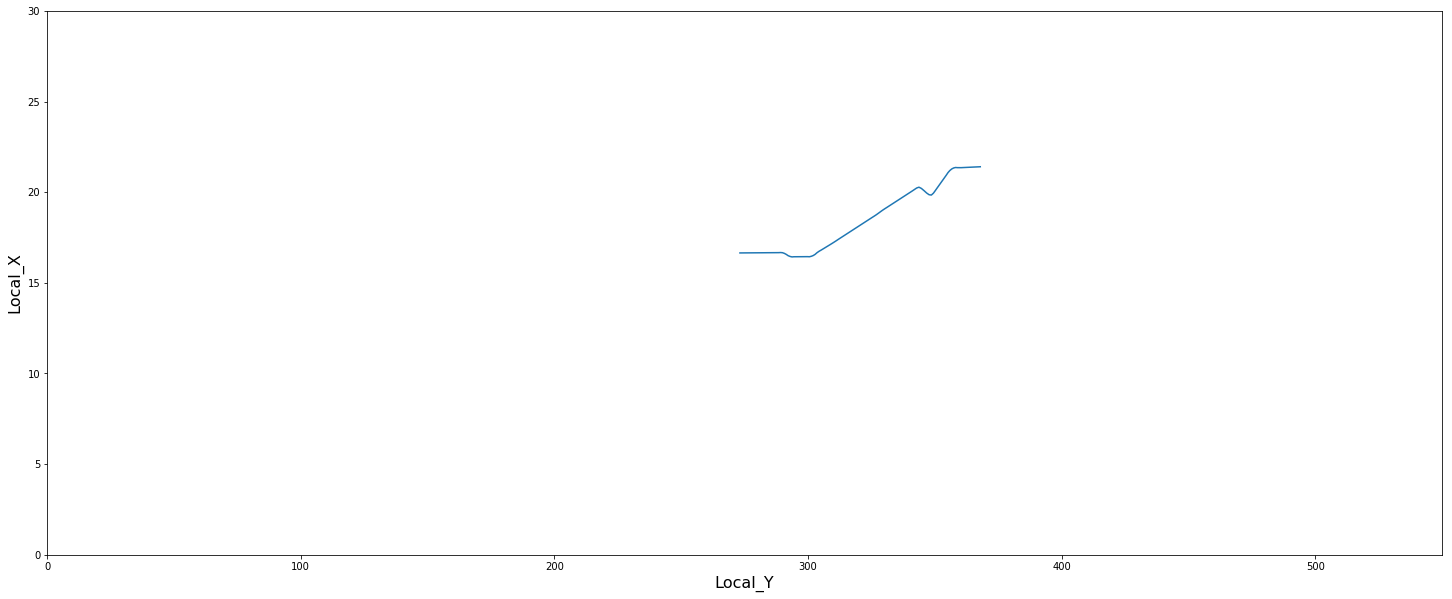

##########################################   5   ###############################################


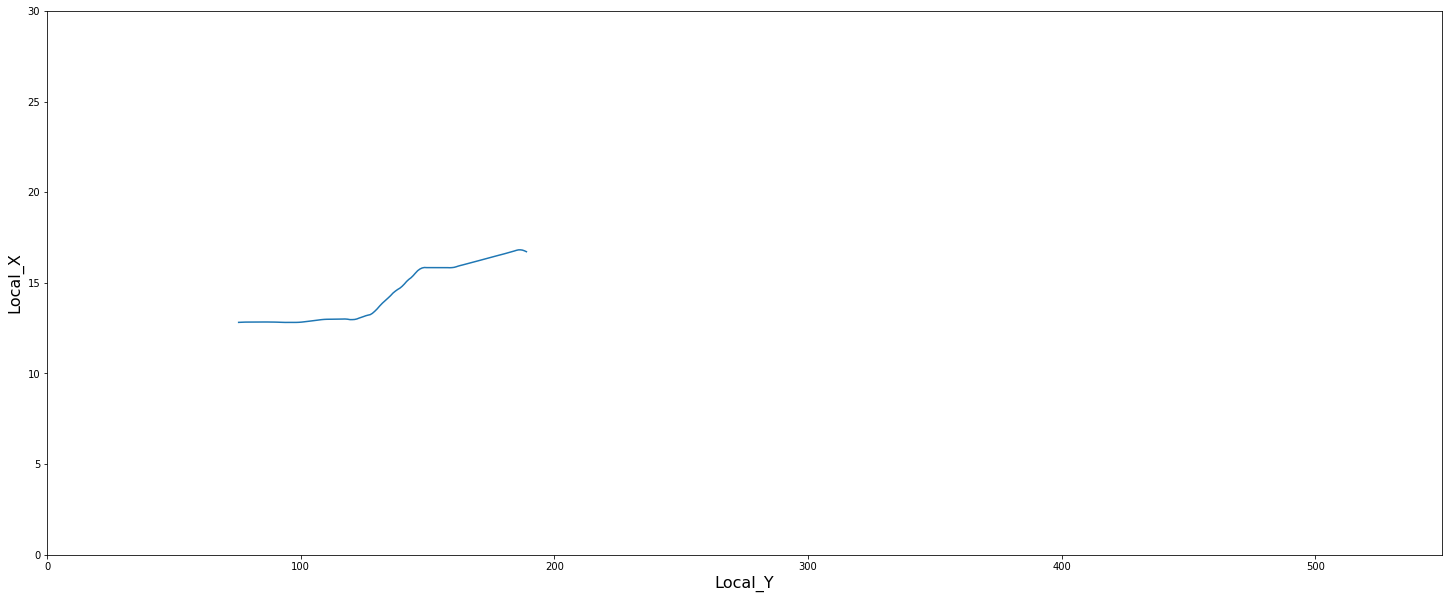

##########################################   6   ###############################################


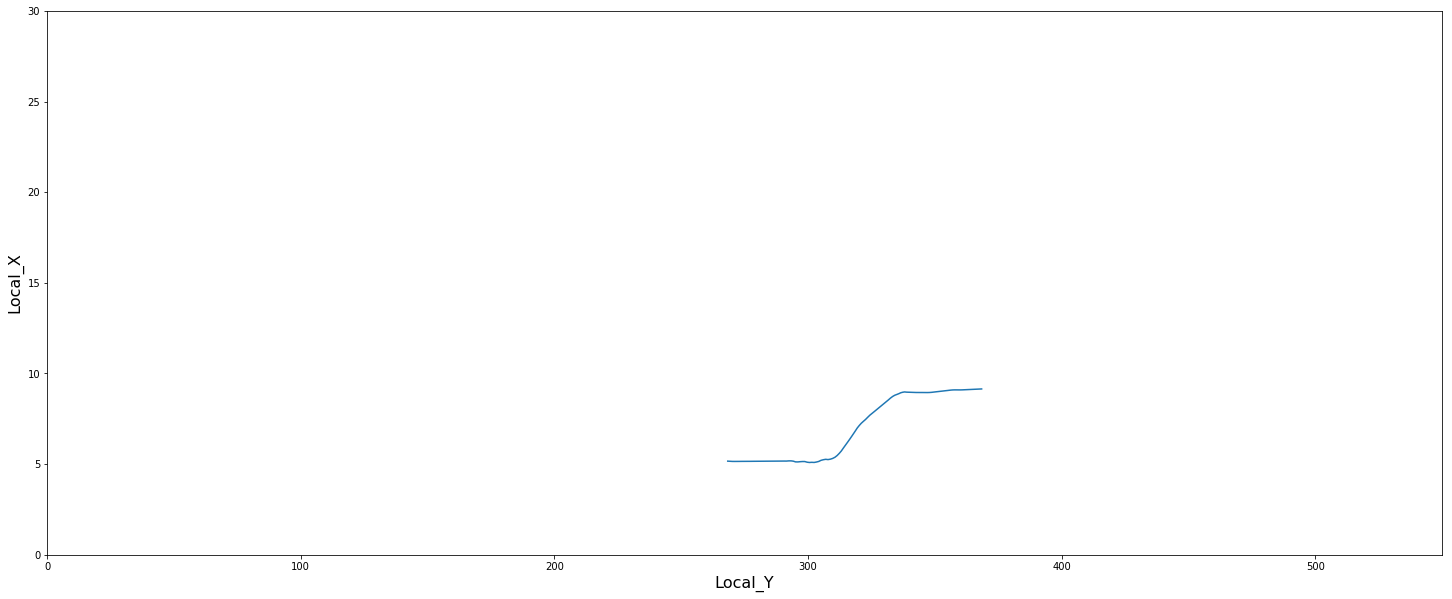

##########################################   7   ###############################################


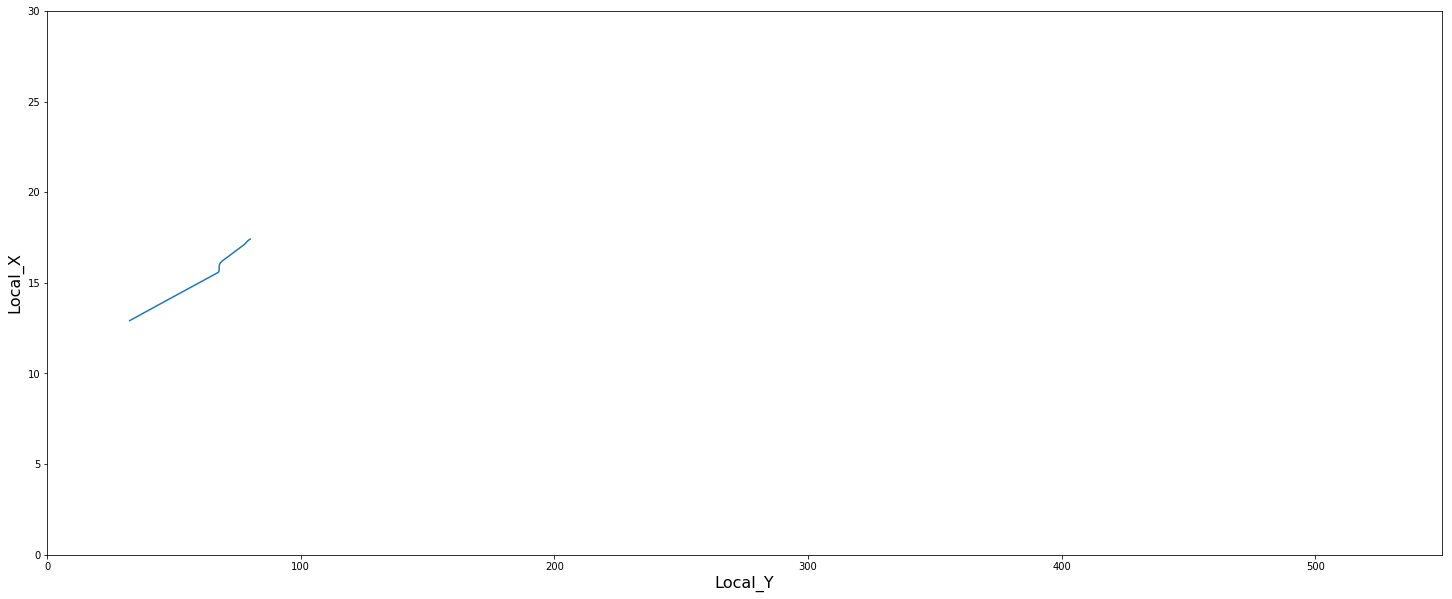

##########################################   8   ###############################################


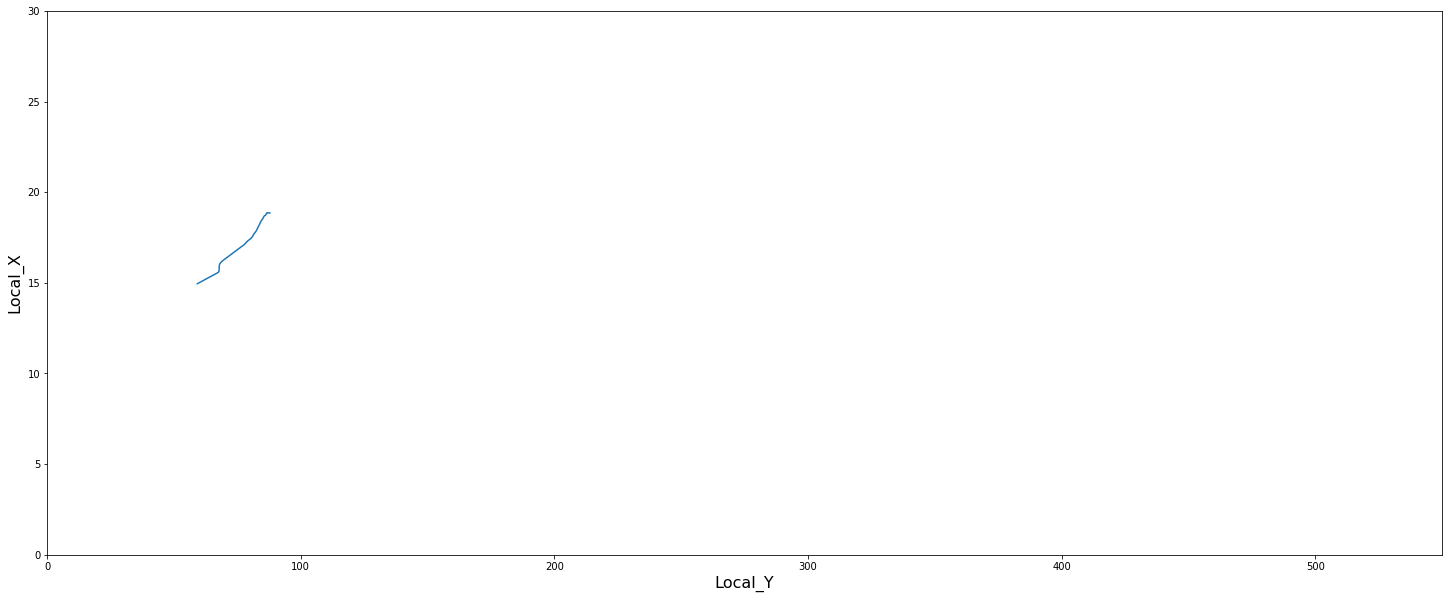

##########################################   9   ###############################################


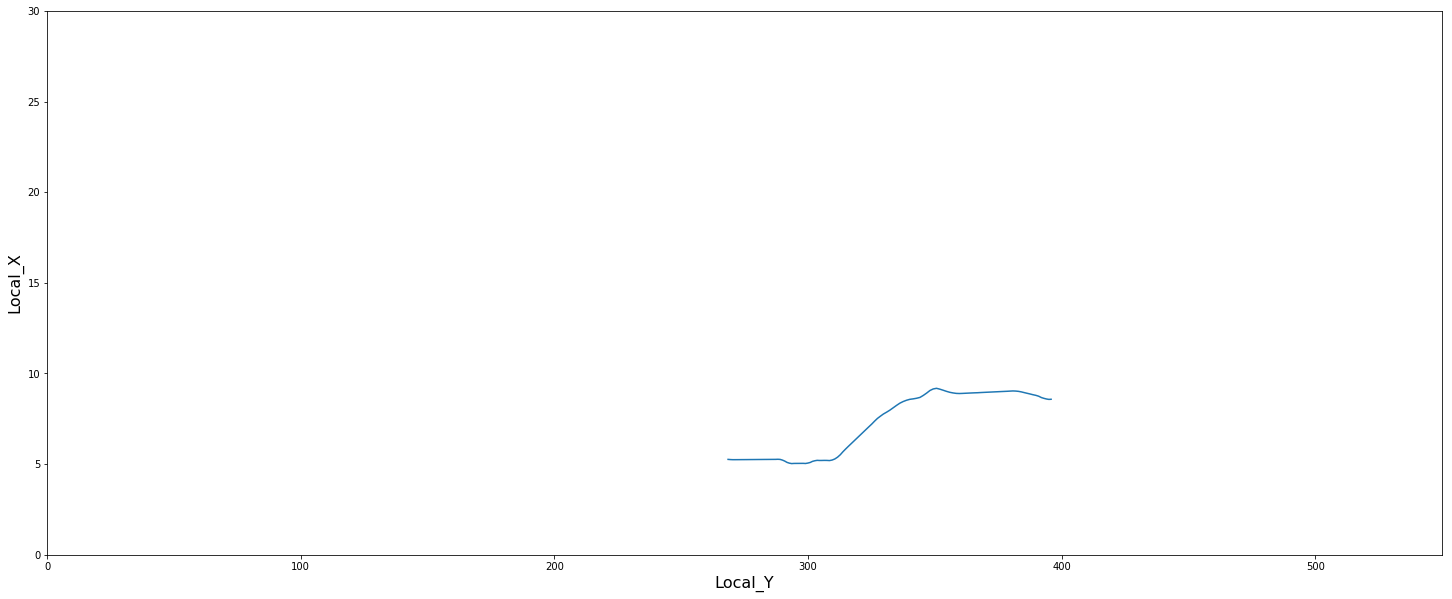

##########################################   10   ###############################################


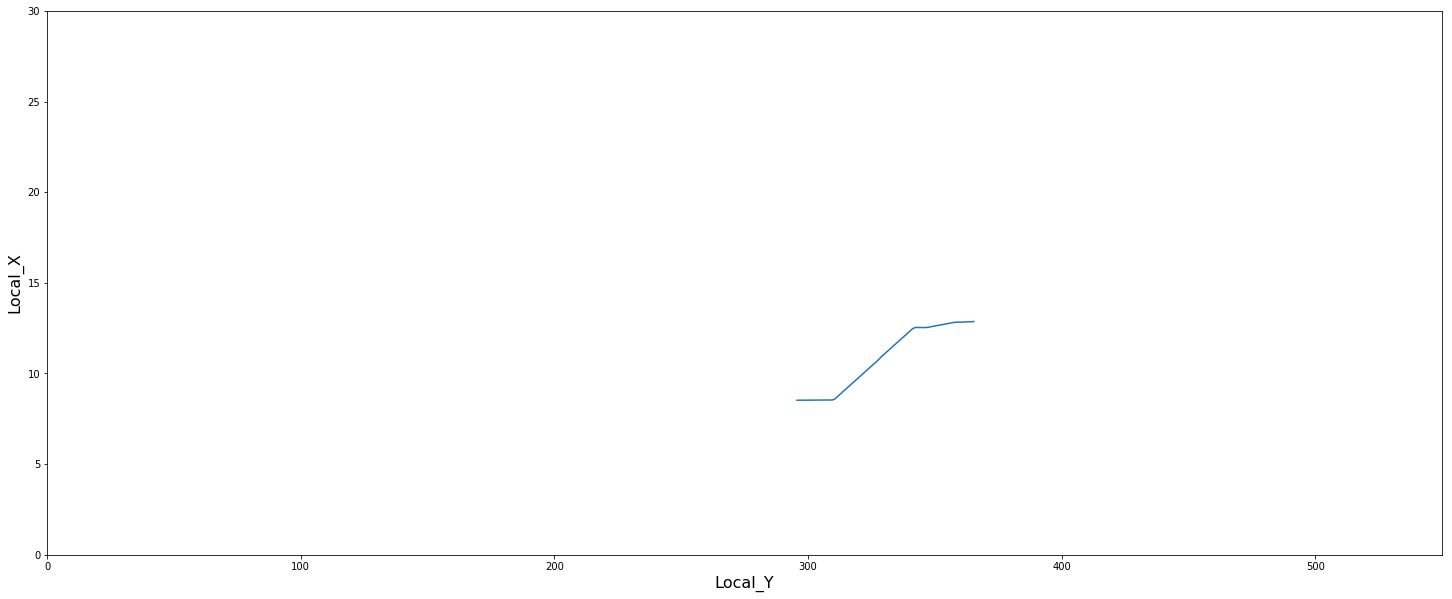

##########################################   11   ###############################################


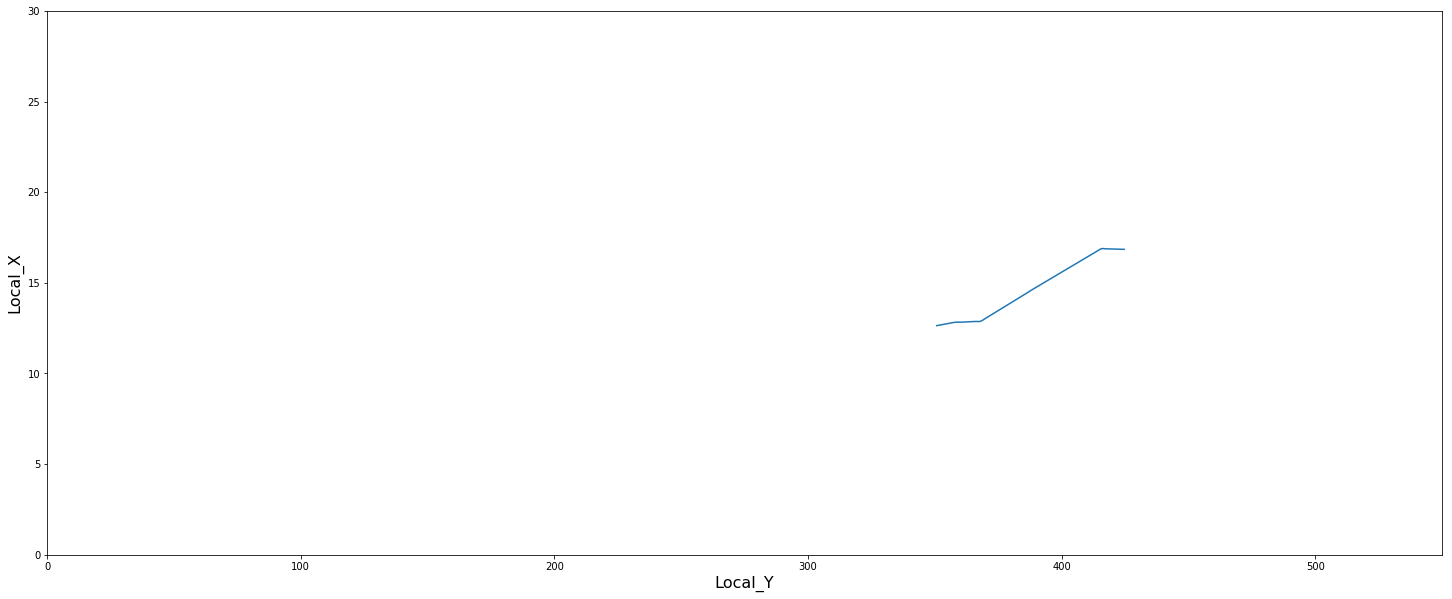

##########################################   12   ###############################################


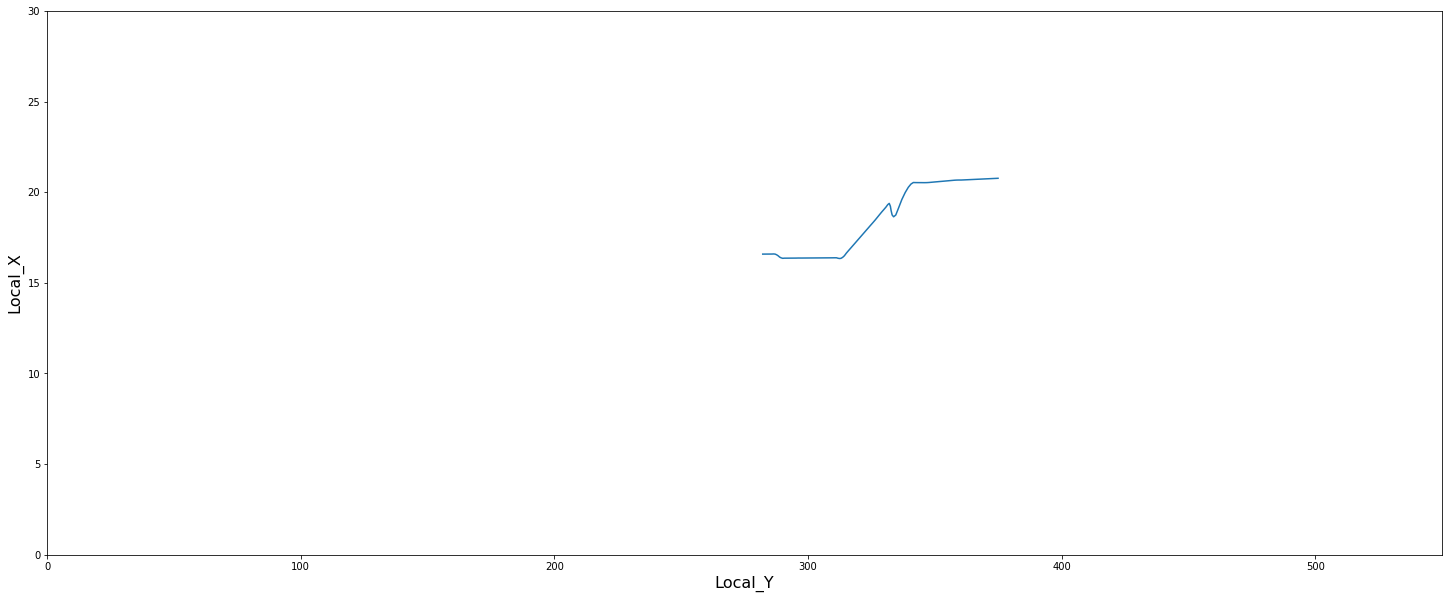

##########################################   13   ###############################################


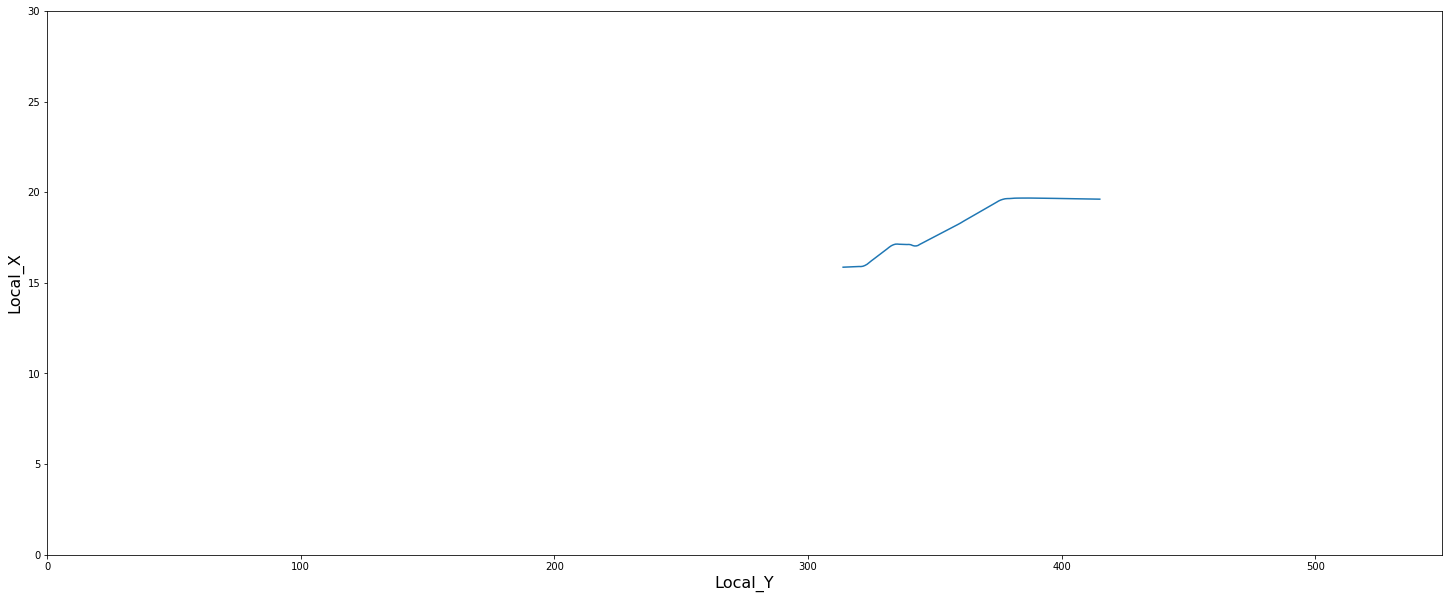

##########################################   14   ###############################################


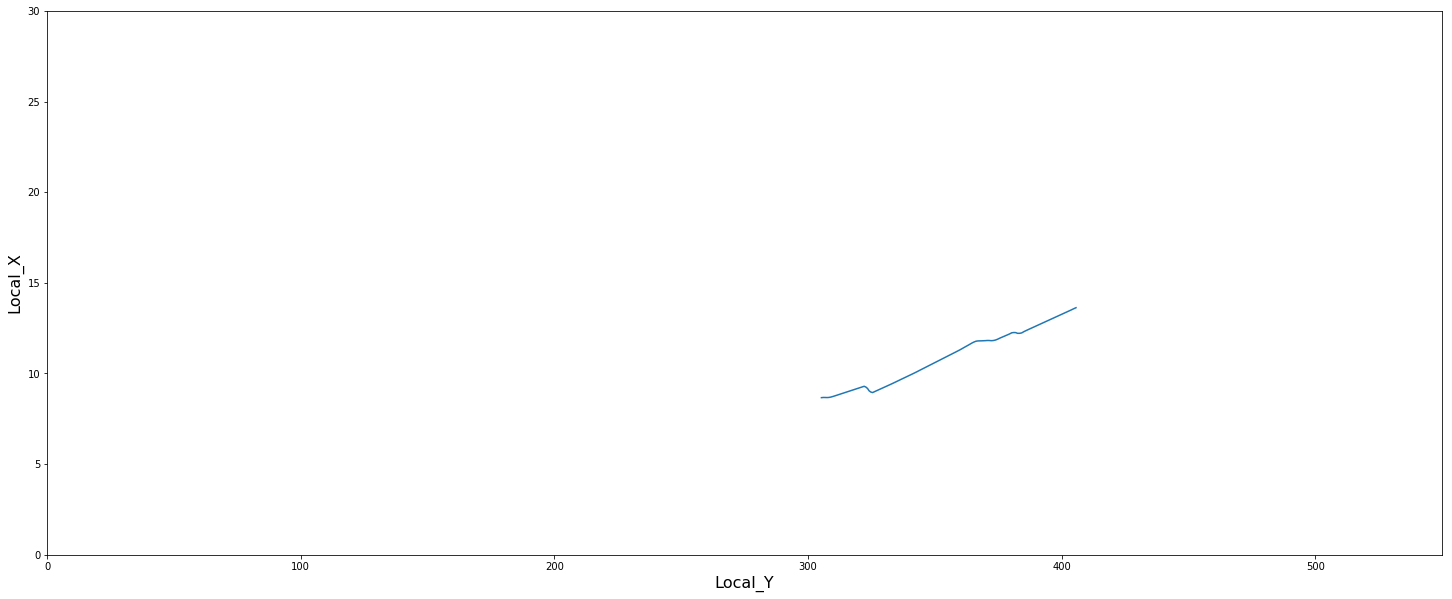

##########################################   15   ###############################################


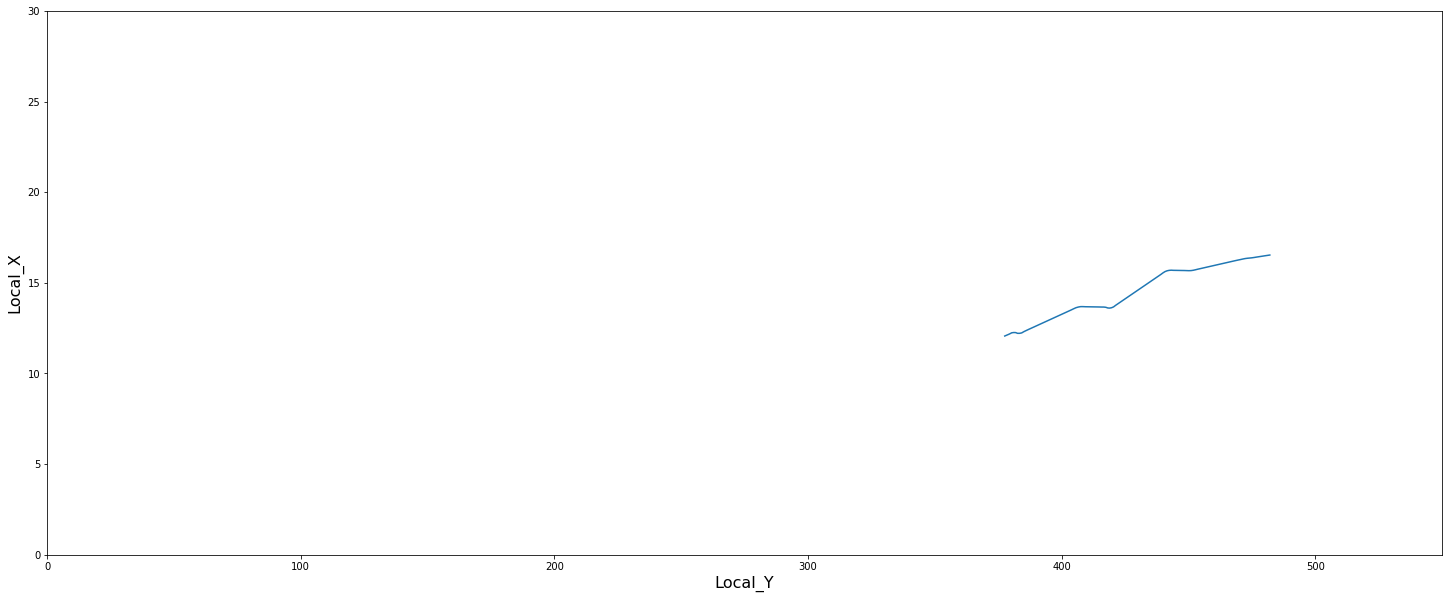

##########################################   16   ###############################################


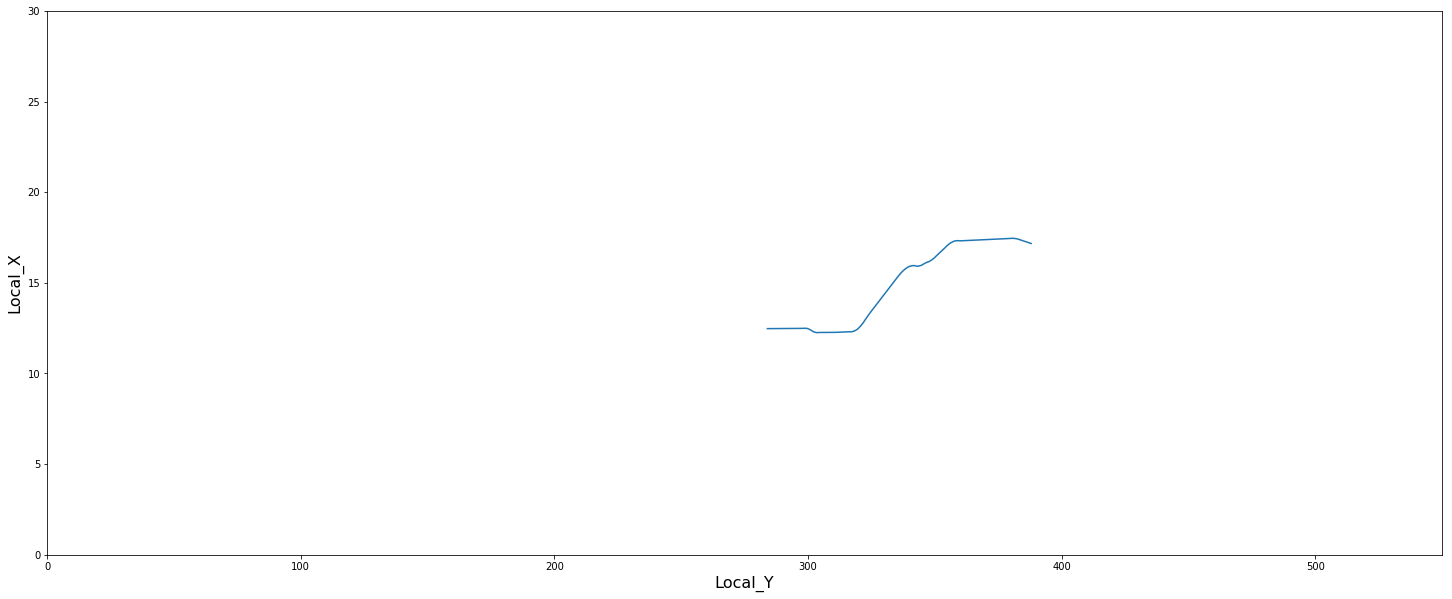

##########################################   17   ###############################################


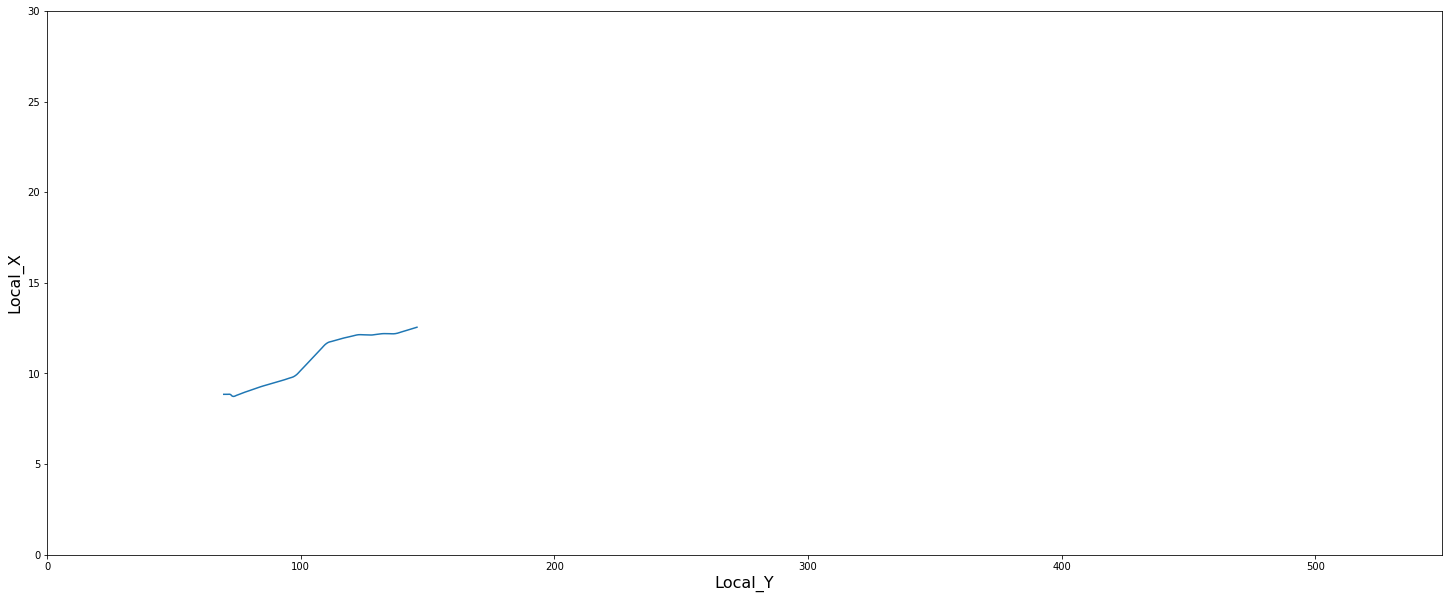

##########################################   18   ###############################################


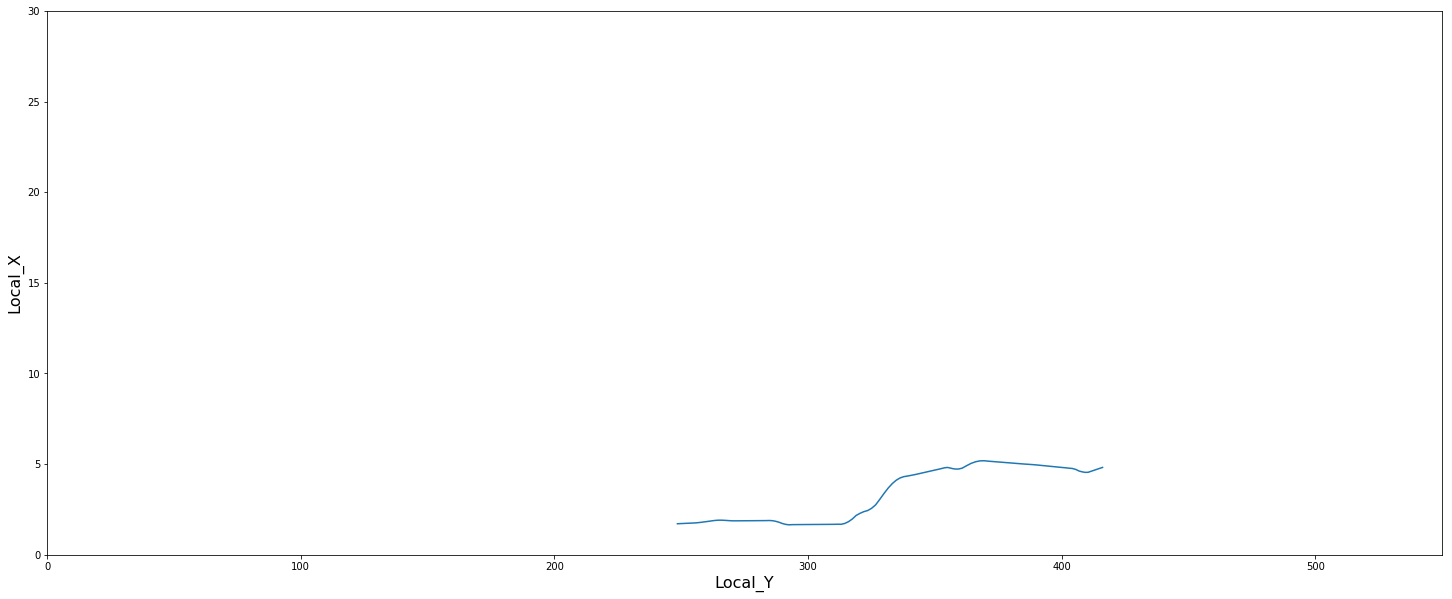

##########################################   19   ###############################################


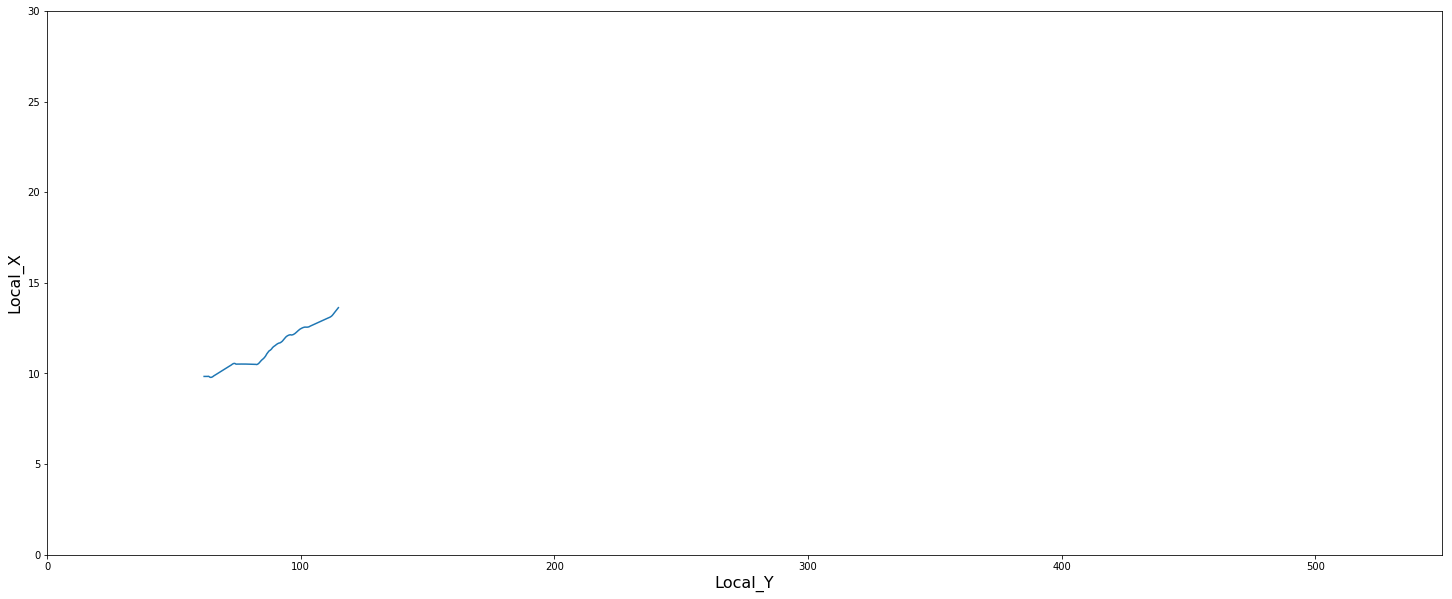

##########################################   20   ###############################################


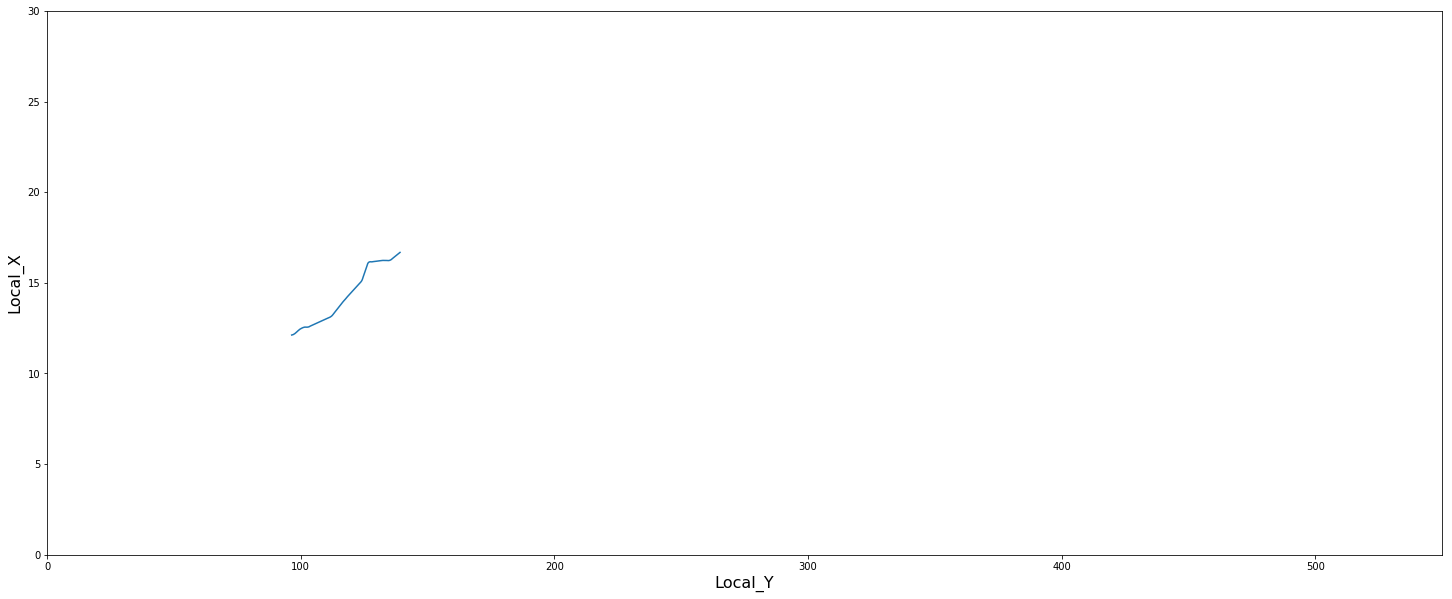

##########################################   21   ###############################################


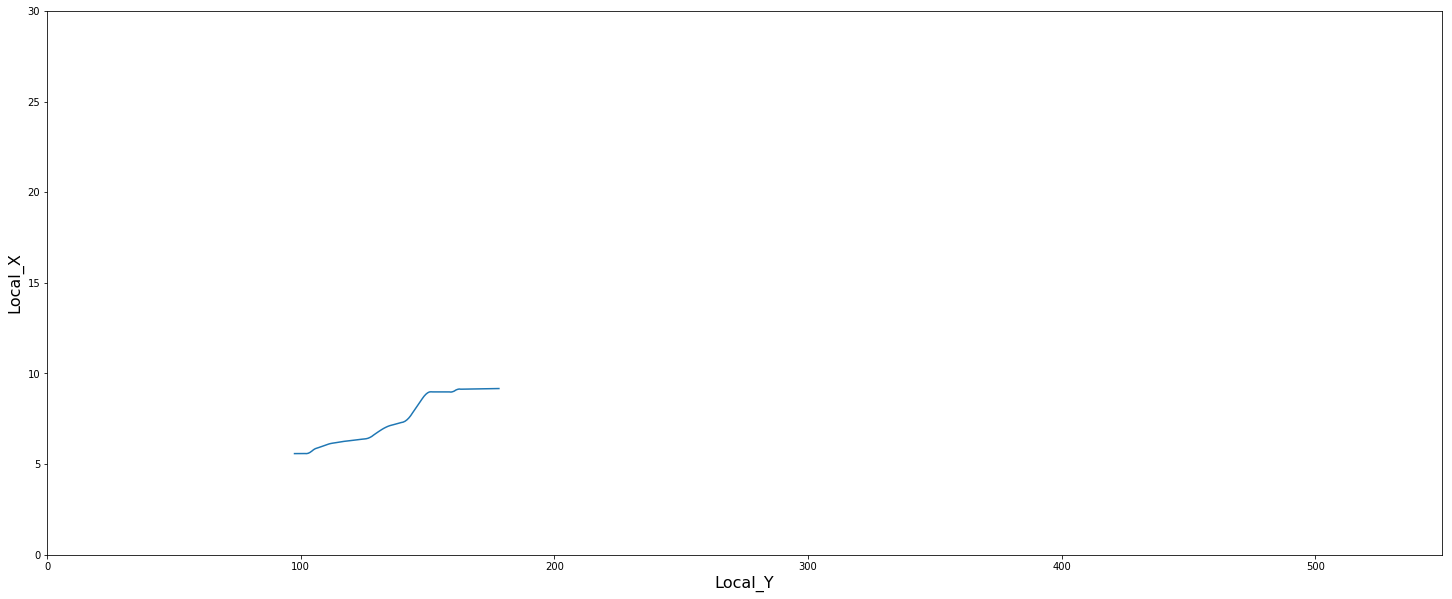

##########################################   22   ###############################################


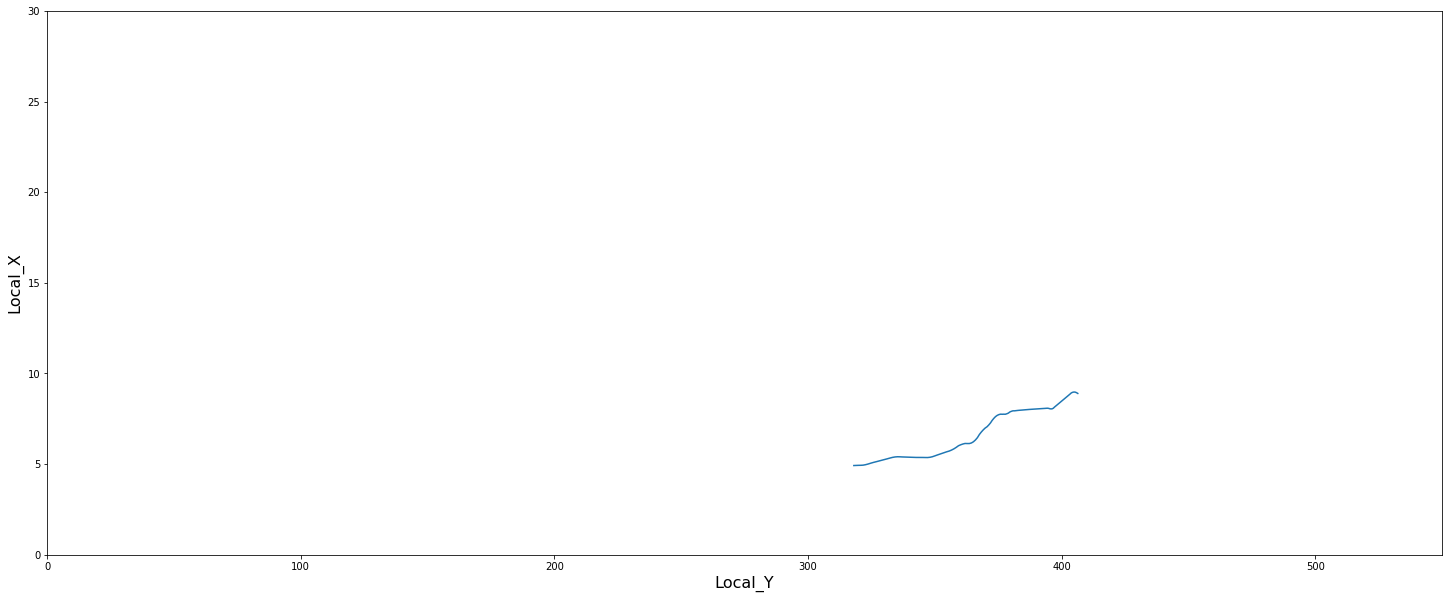

##########################################   23   ###############################################


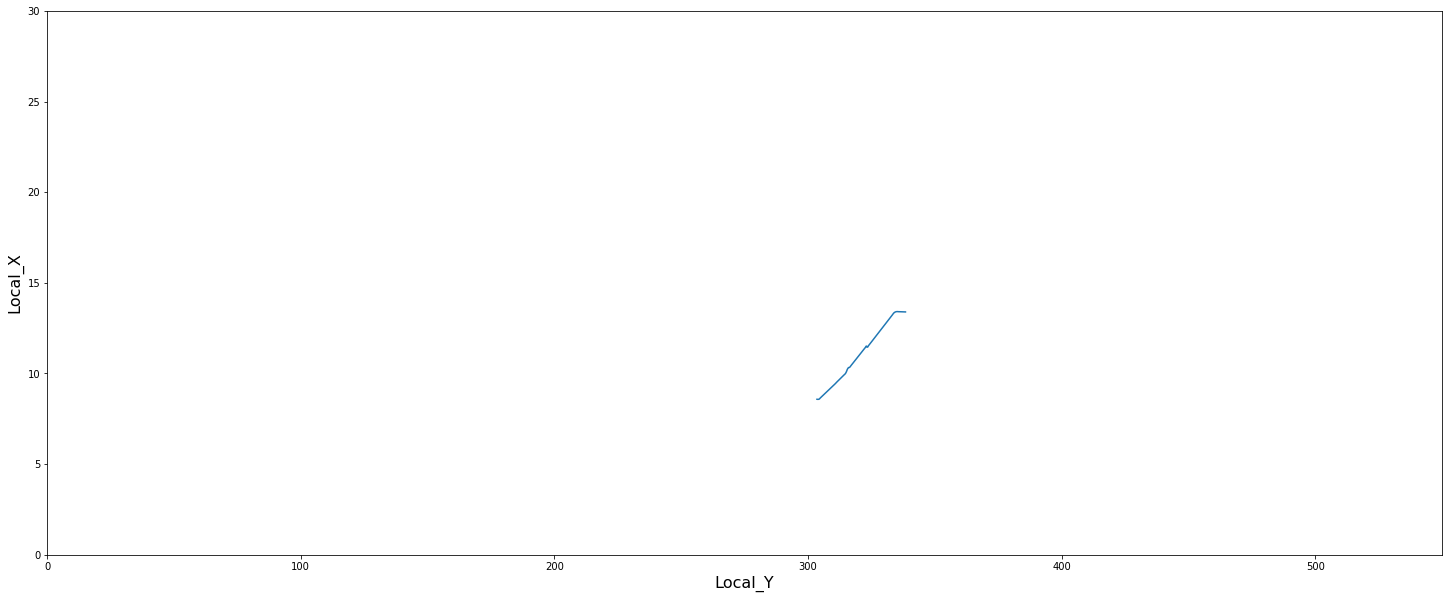

##########################################   24   ###############################################


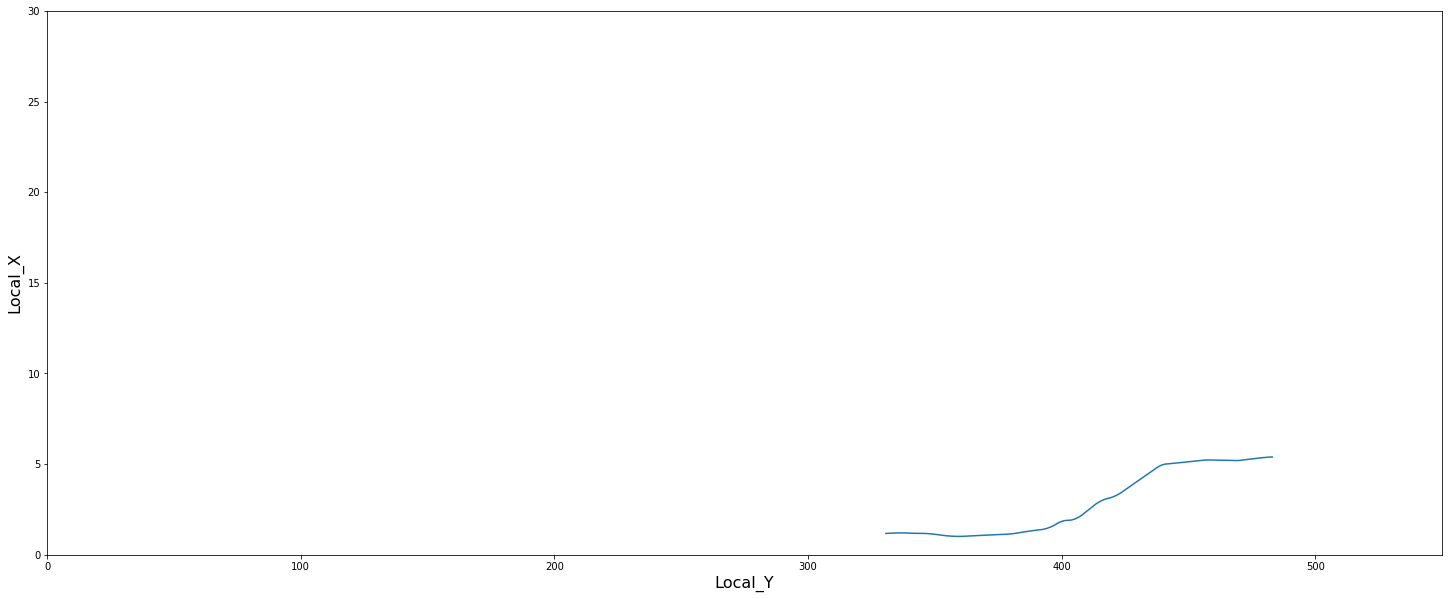

##########################################   25   ###############################################


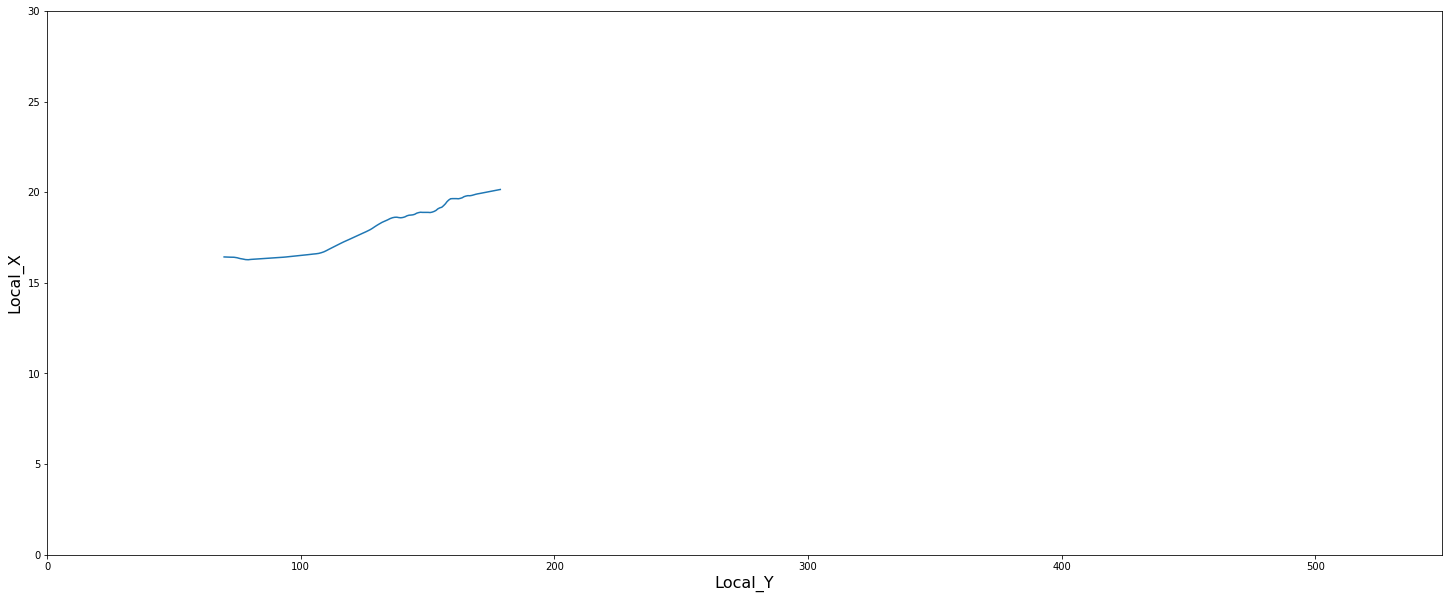

##########################################   26   ###############################################


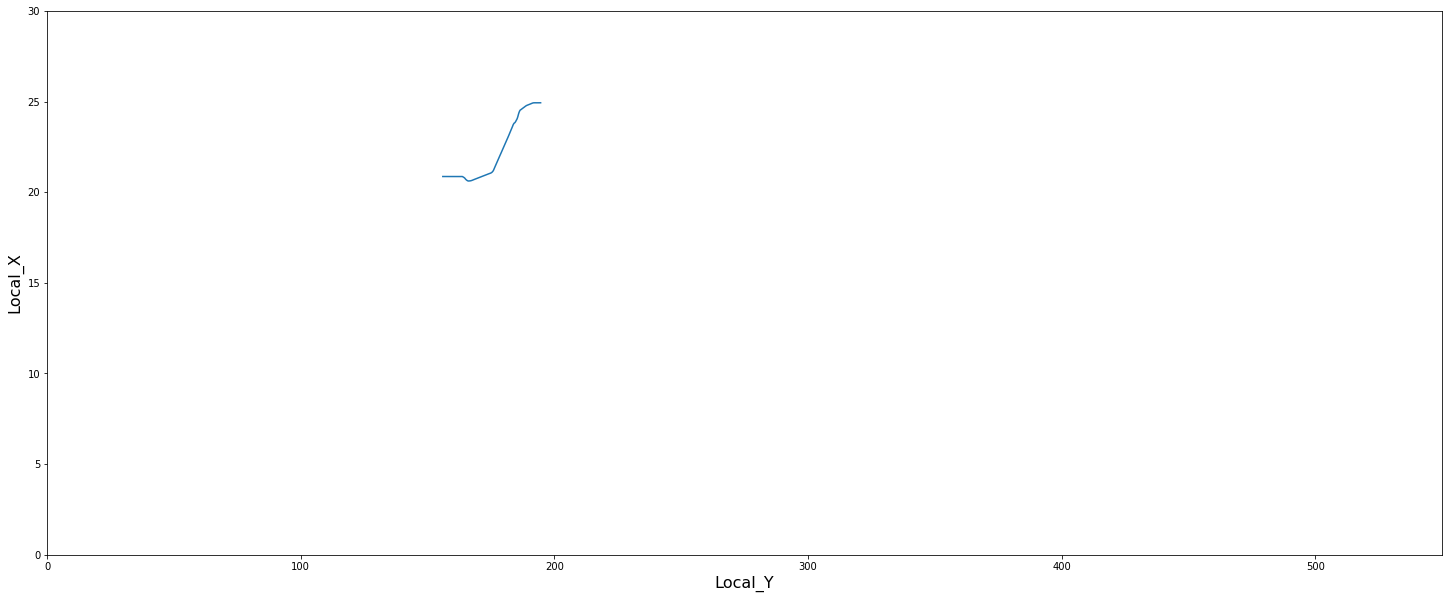

##########################################   27   ###############################################


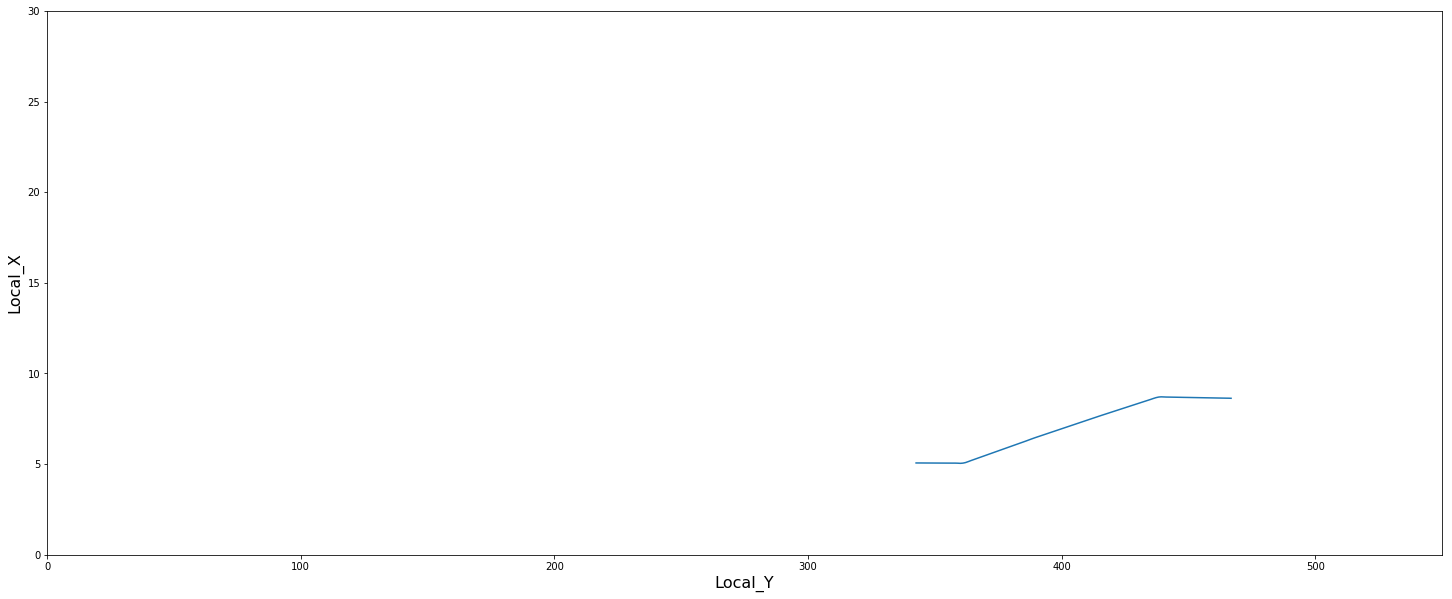

##########################################   28   ###############################################


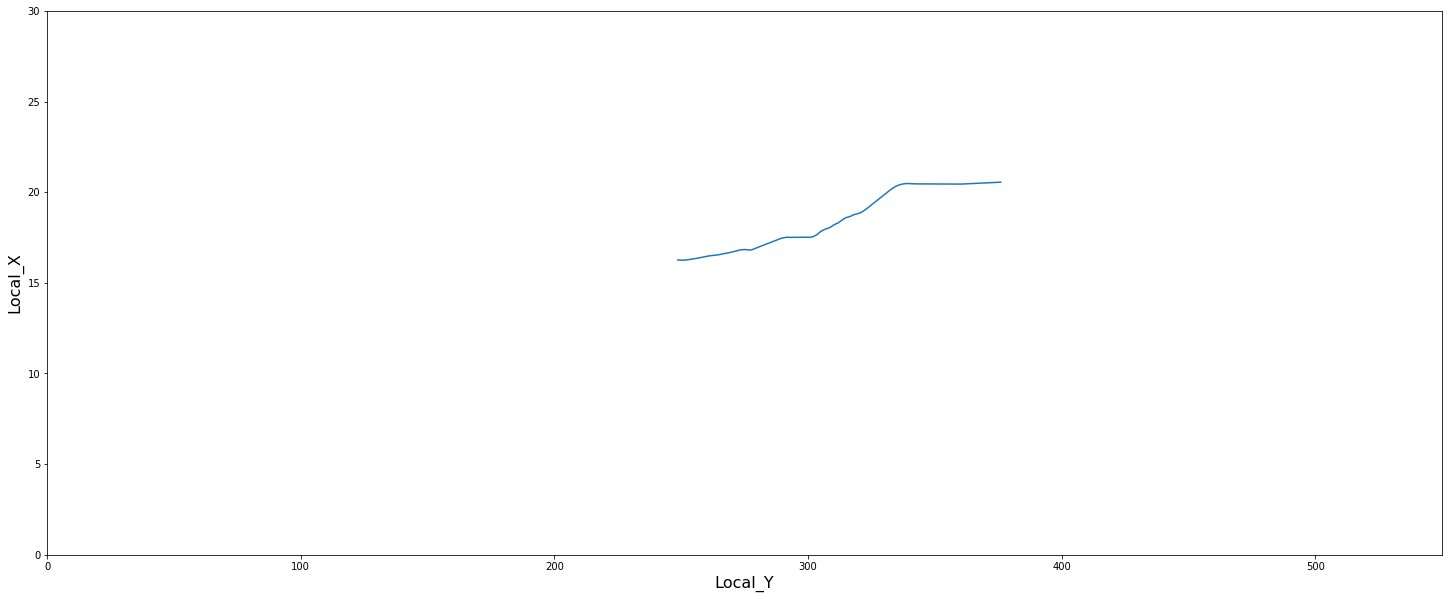

##########################################   29   ###############################################


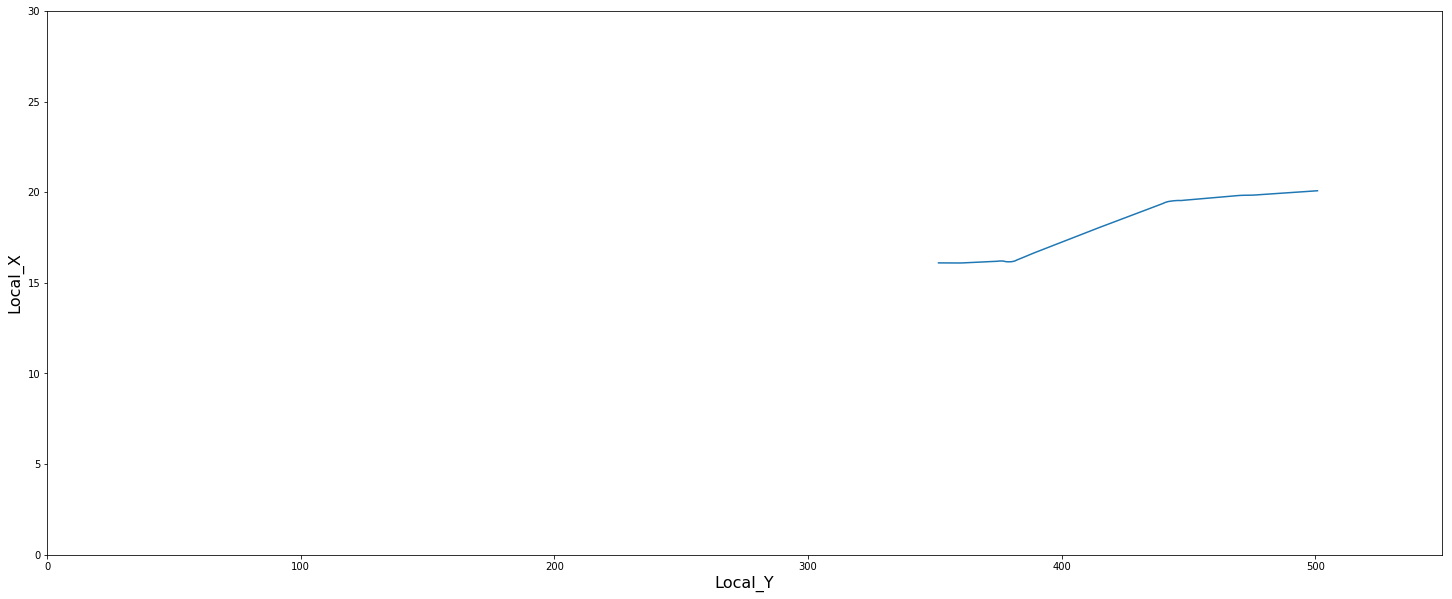

##########################################   30   ###############################################


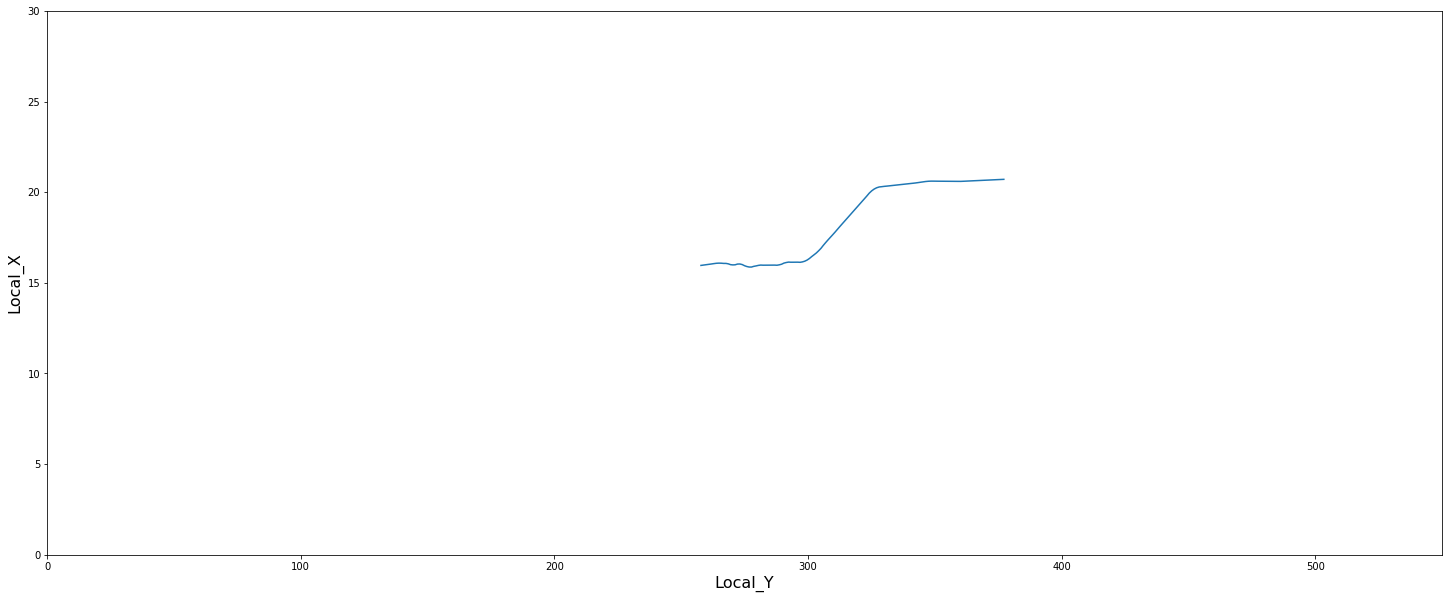

##########################################   31   ###############################################


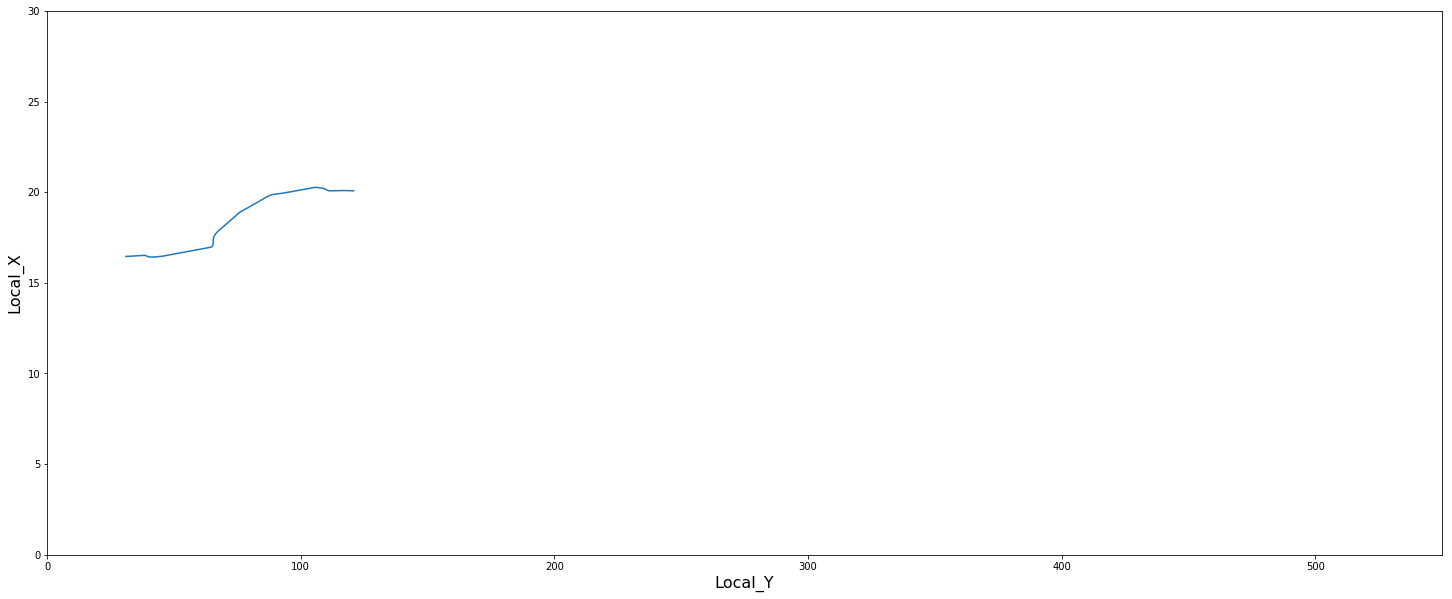

##########################################   32   ###############################################


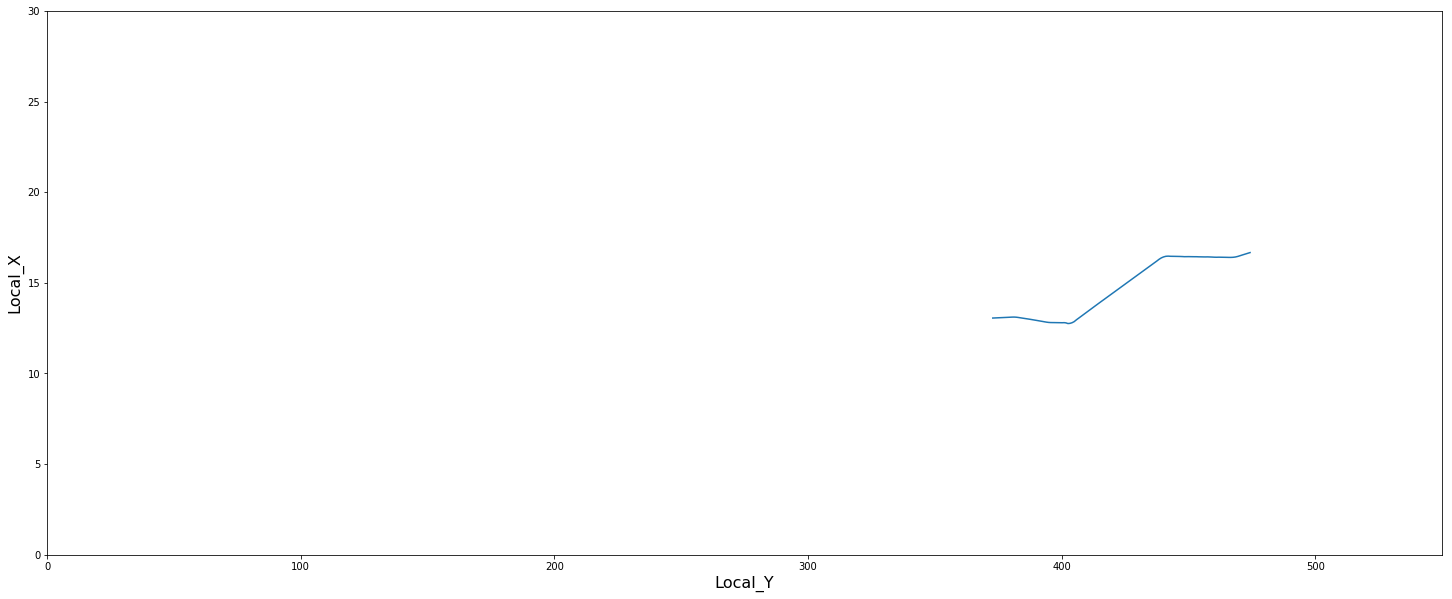

##########################################   33   ###############################################


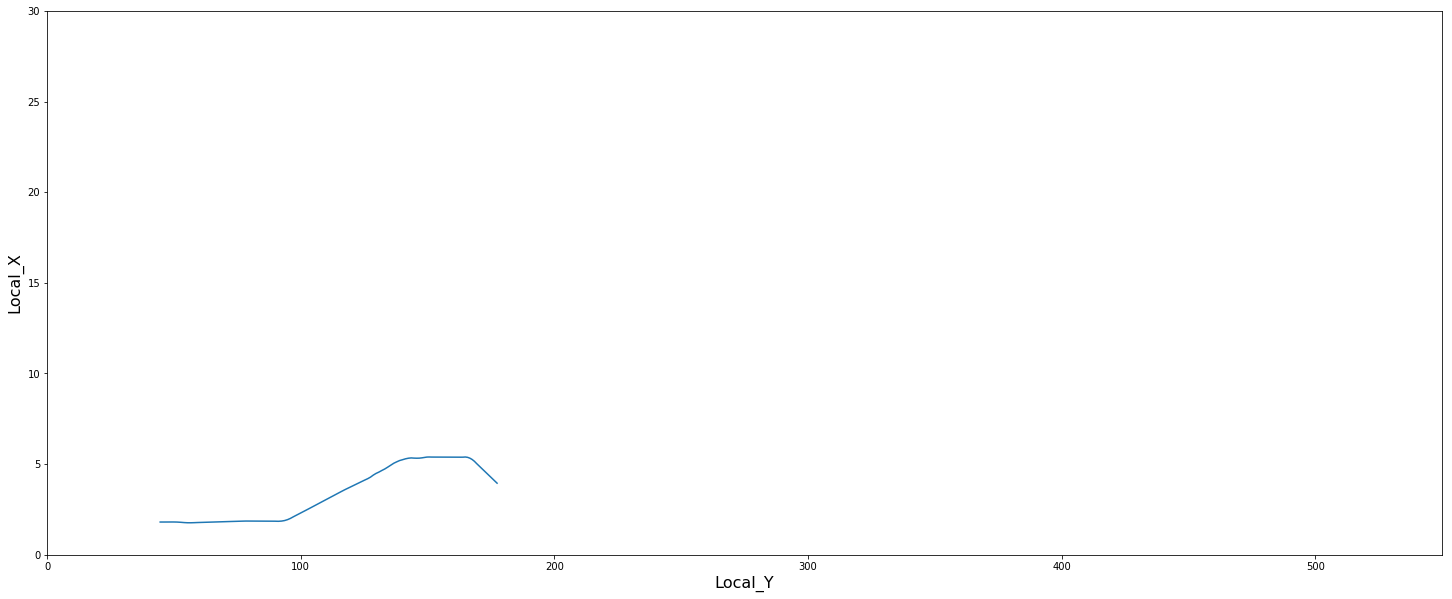

##########################################   34   ###############################################


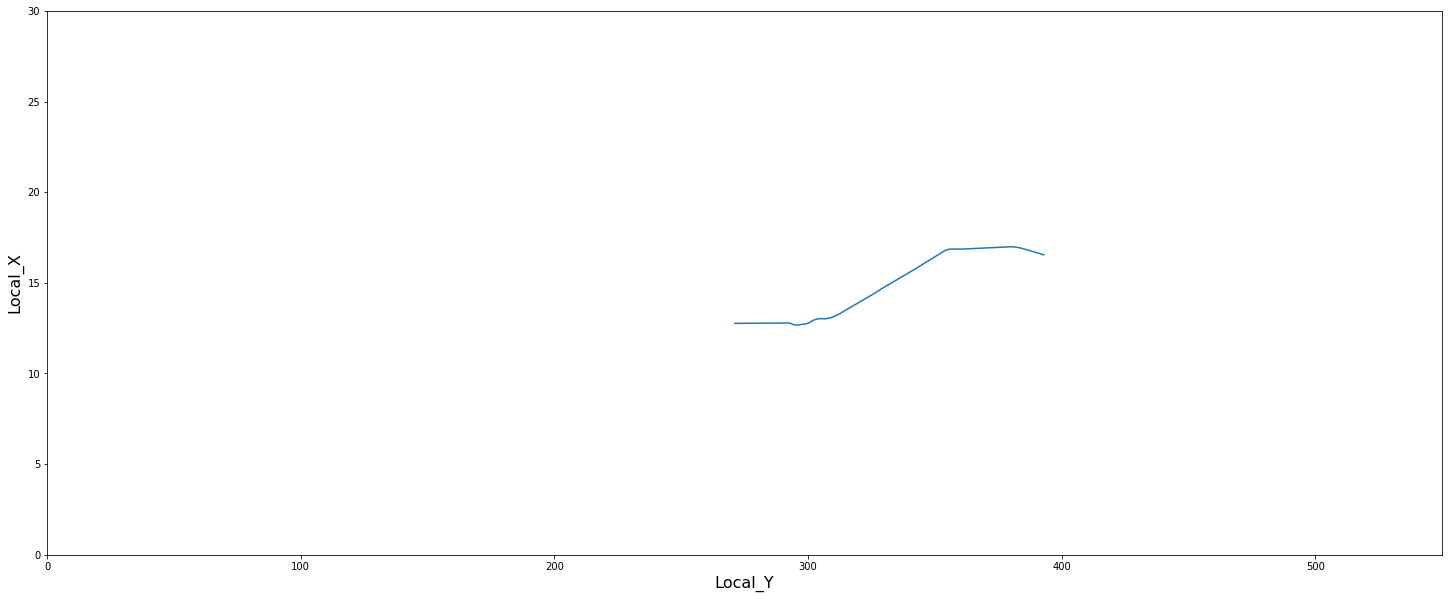

##########################################   35   ###############################################


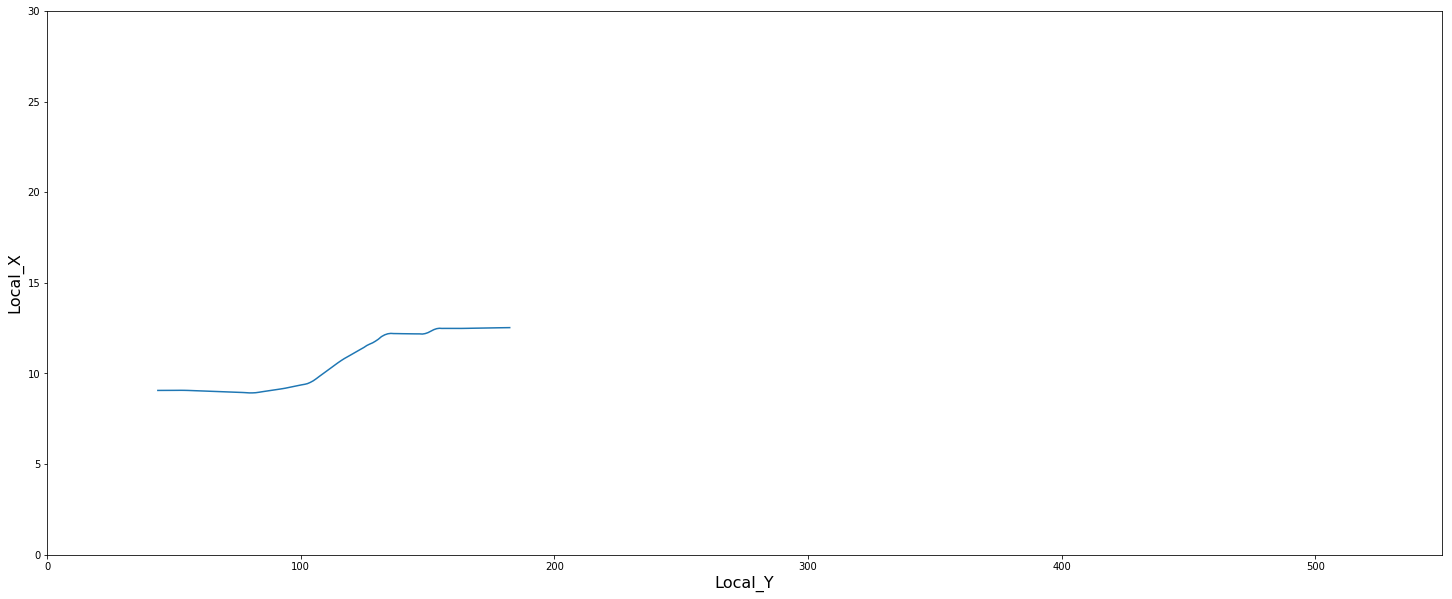

##########################################   36   ###############################################


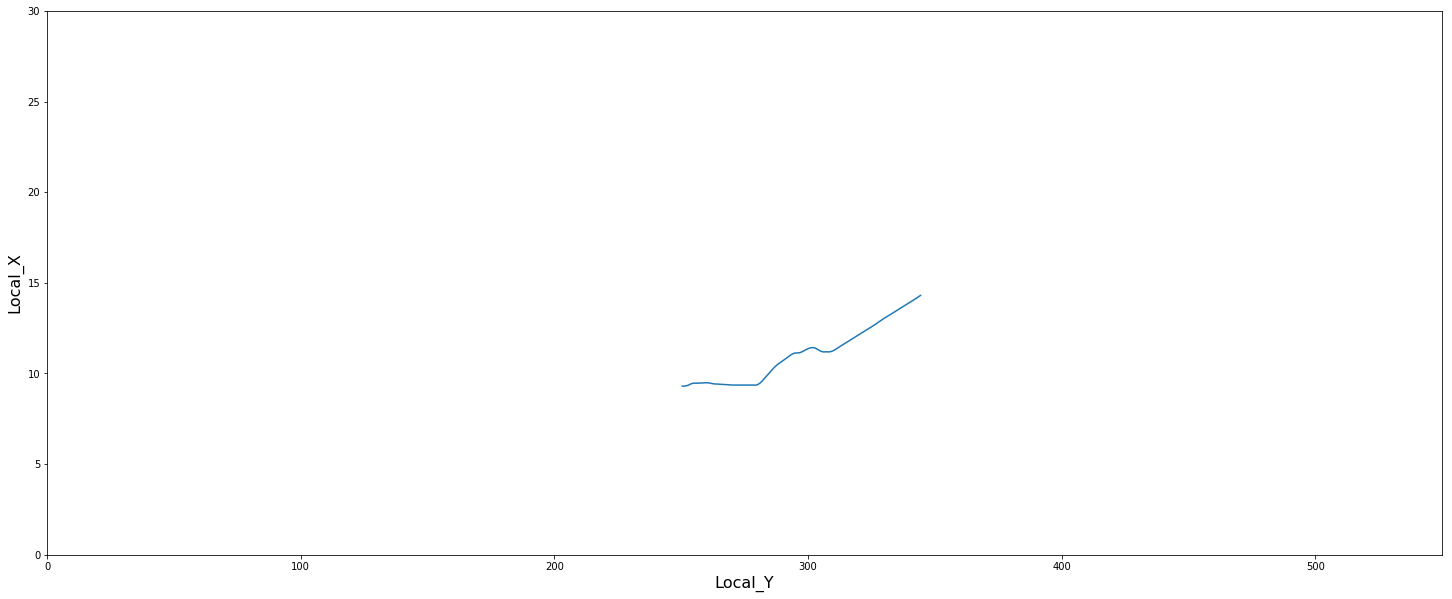

##########################################   37   ###############################################


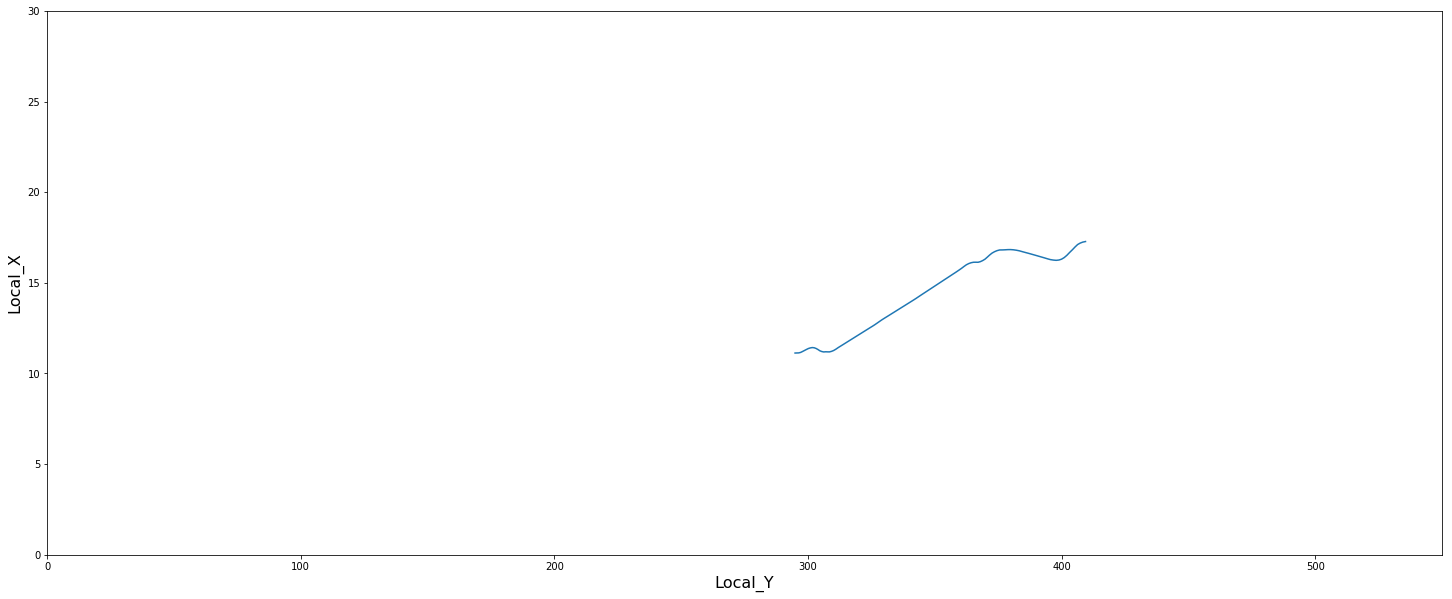

##########################################   38   ###############################################


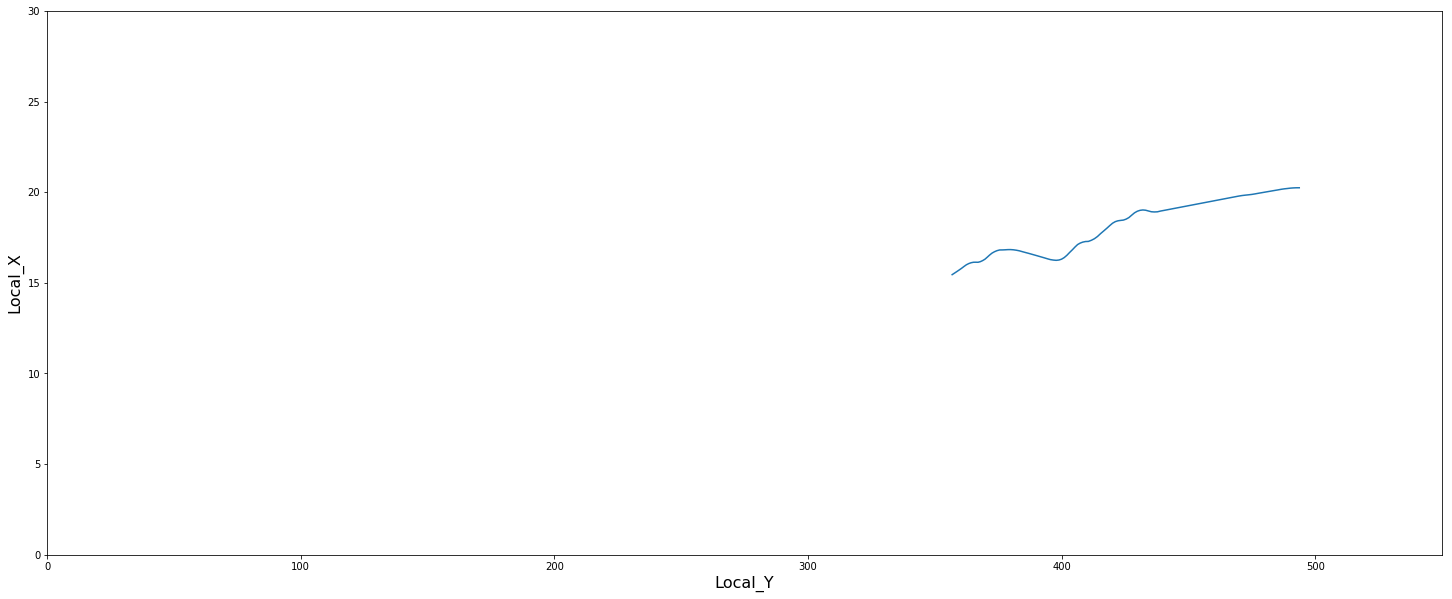

##########################################   39   ###############################################


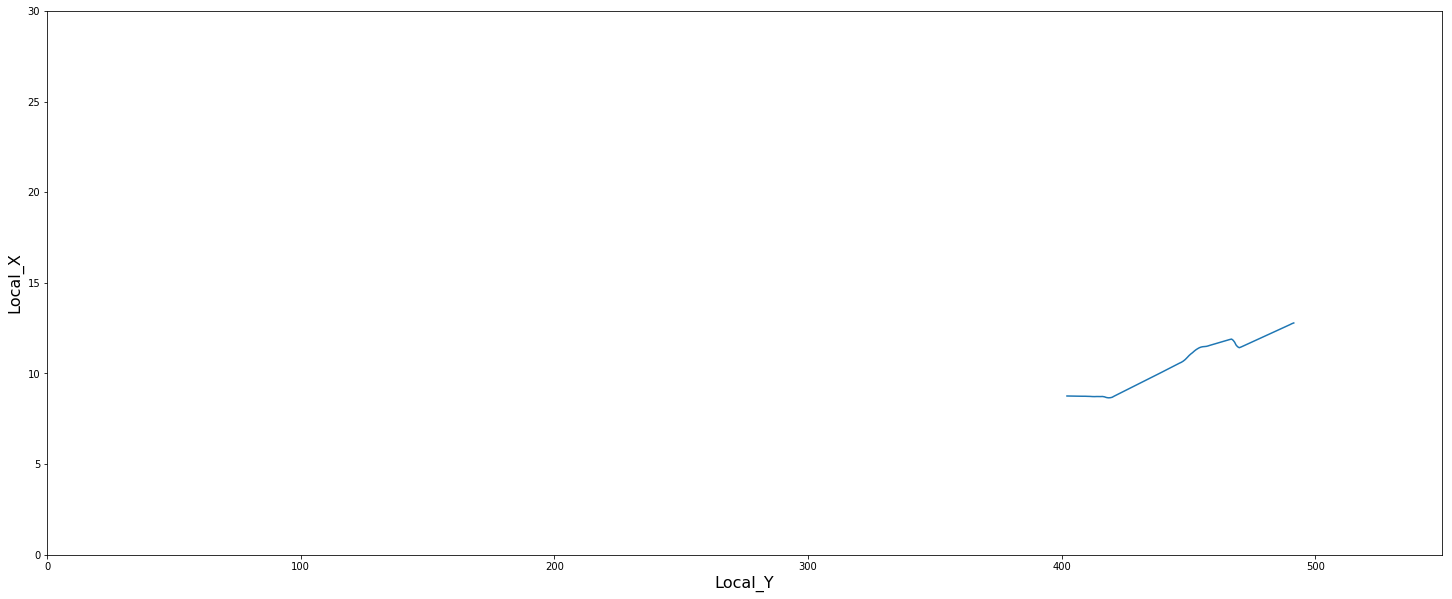

##########################################   40   ###############################################


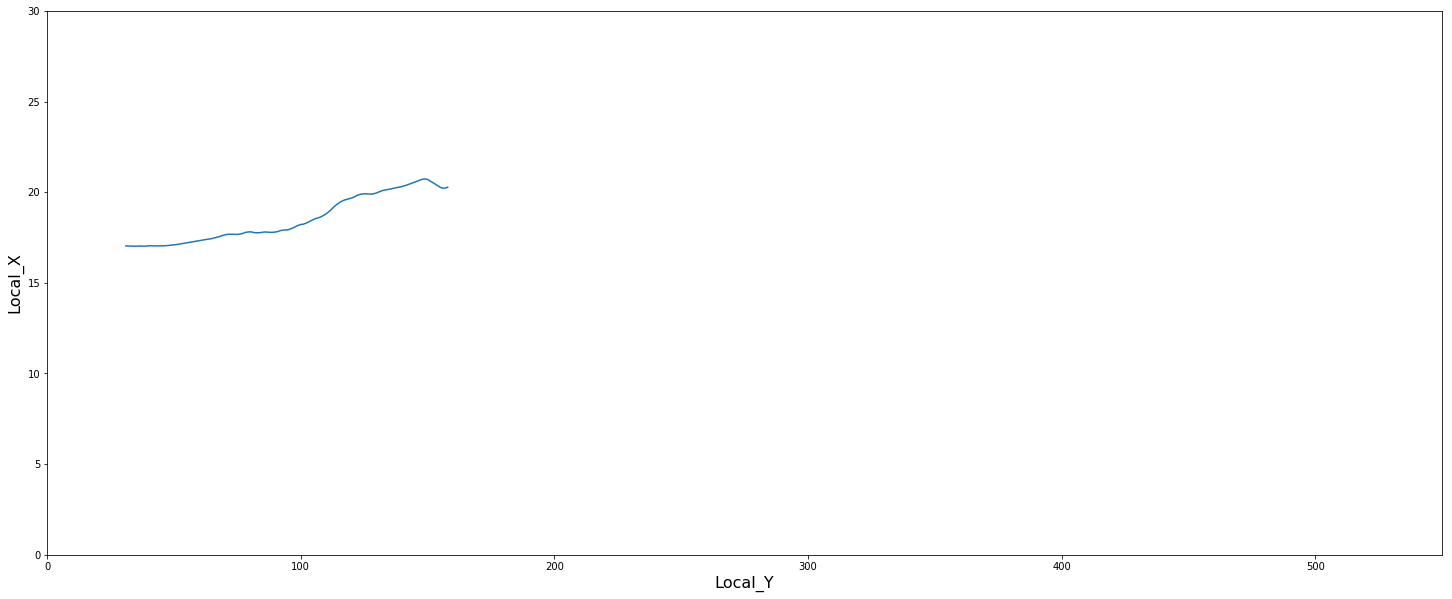

##########################################   41   ###############################################


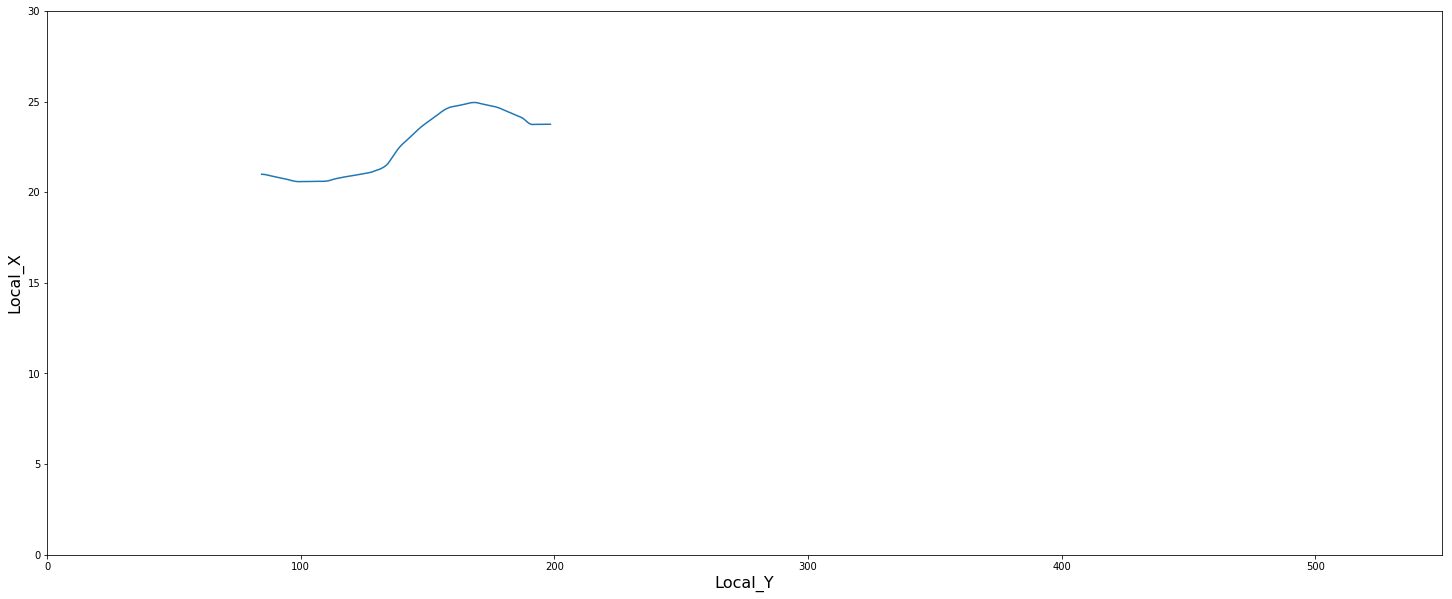

##########################################   42   ###############################################


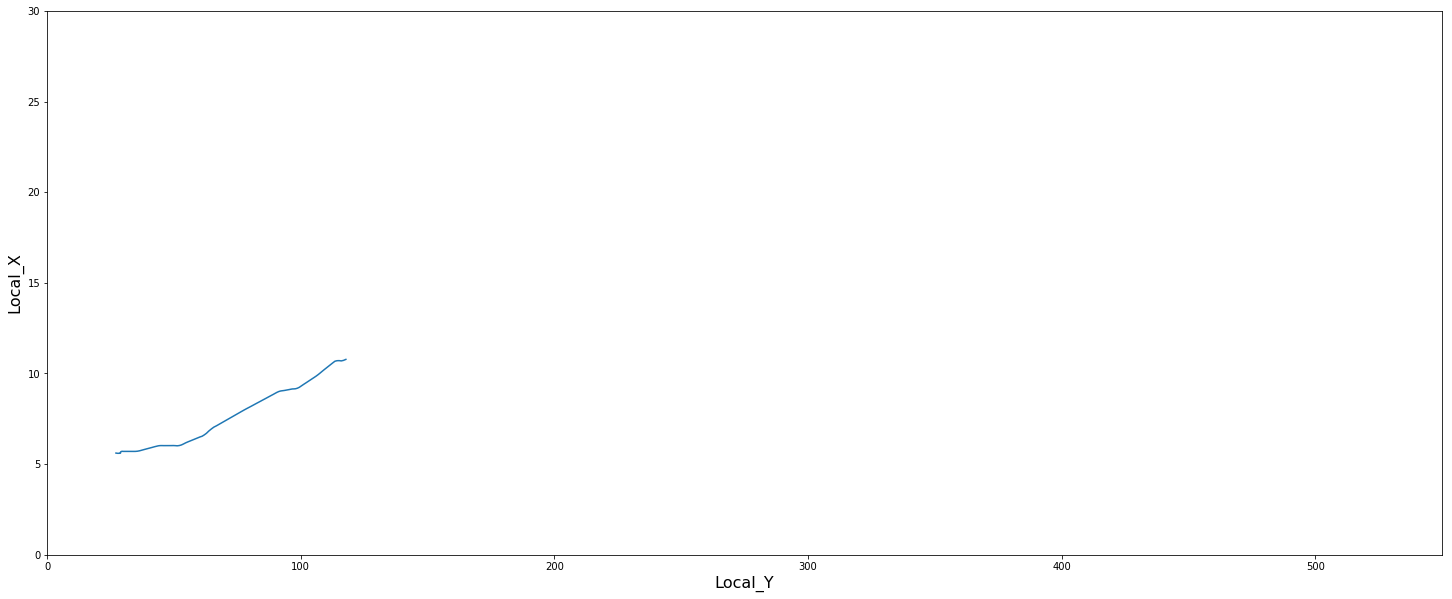

##########################################   43   ###############################################


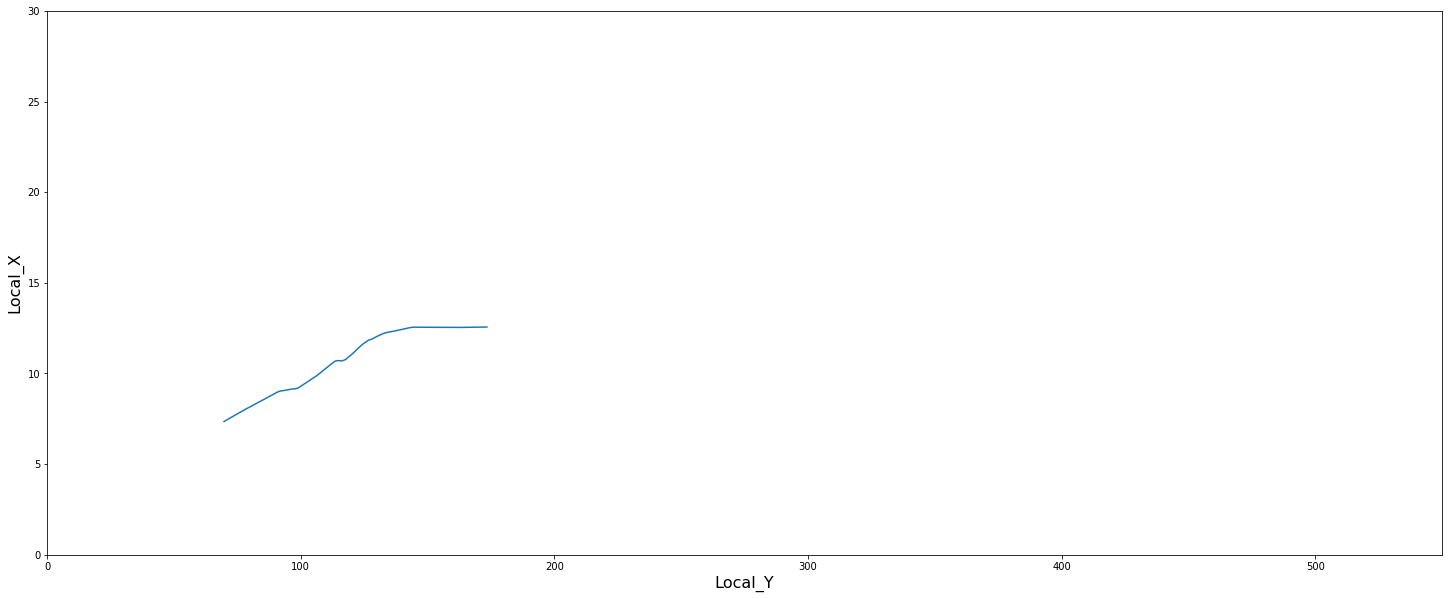

##########################################   44   ###############################################


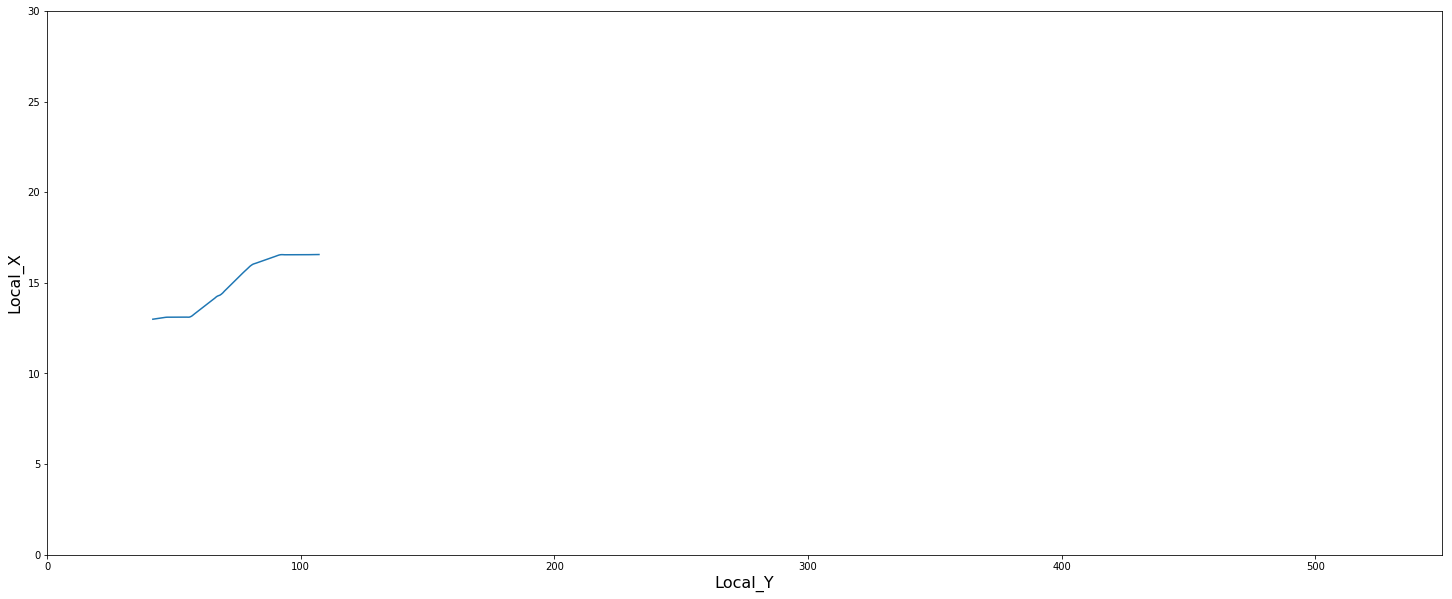

##########################################   45   ###############################################


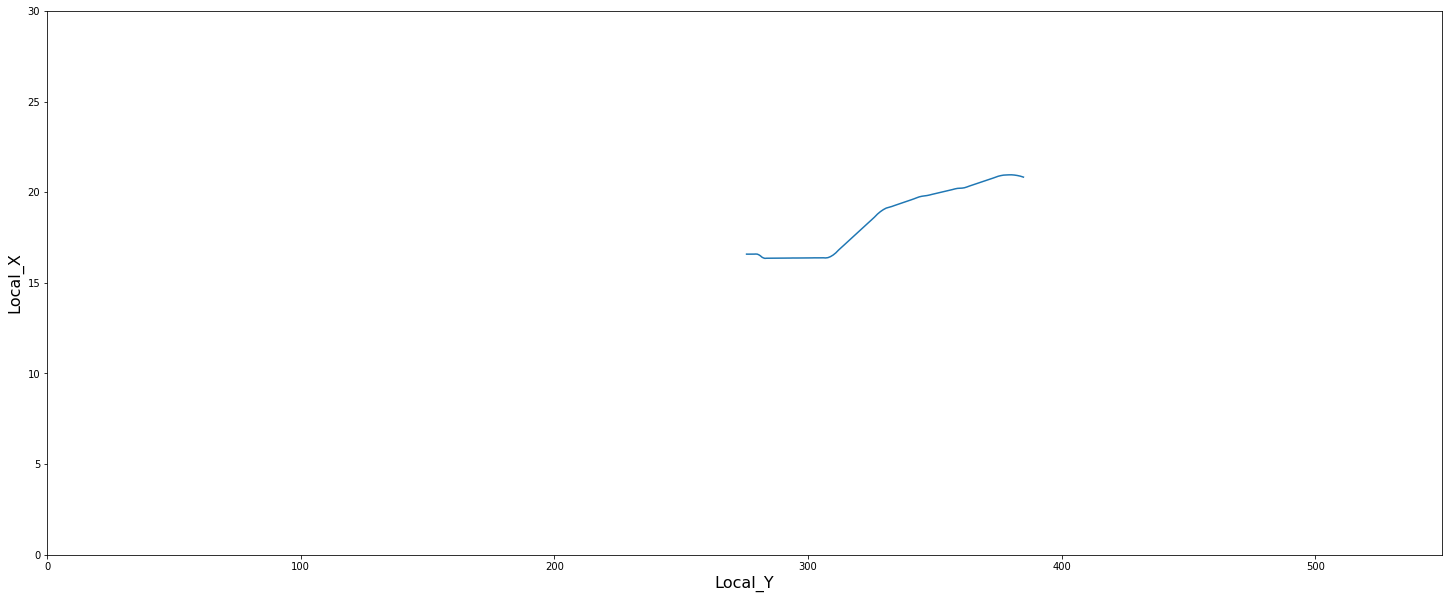

##########################################   46   ###############################################


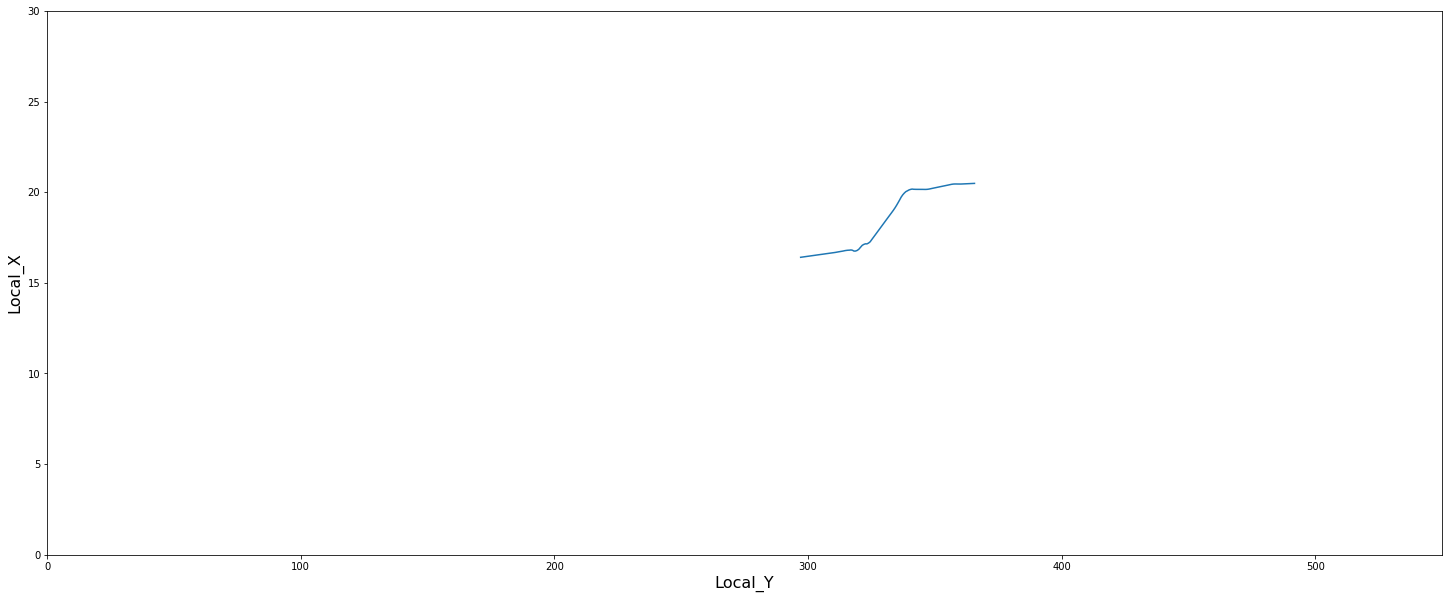

##########################################   47   ###############################################


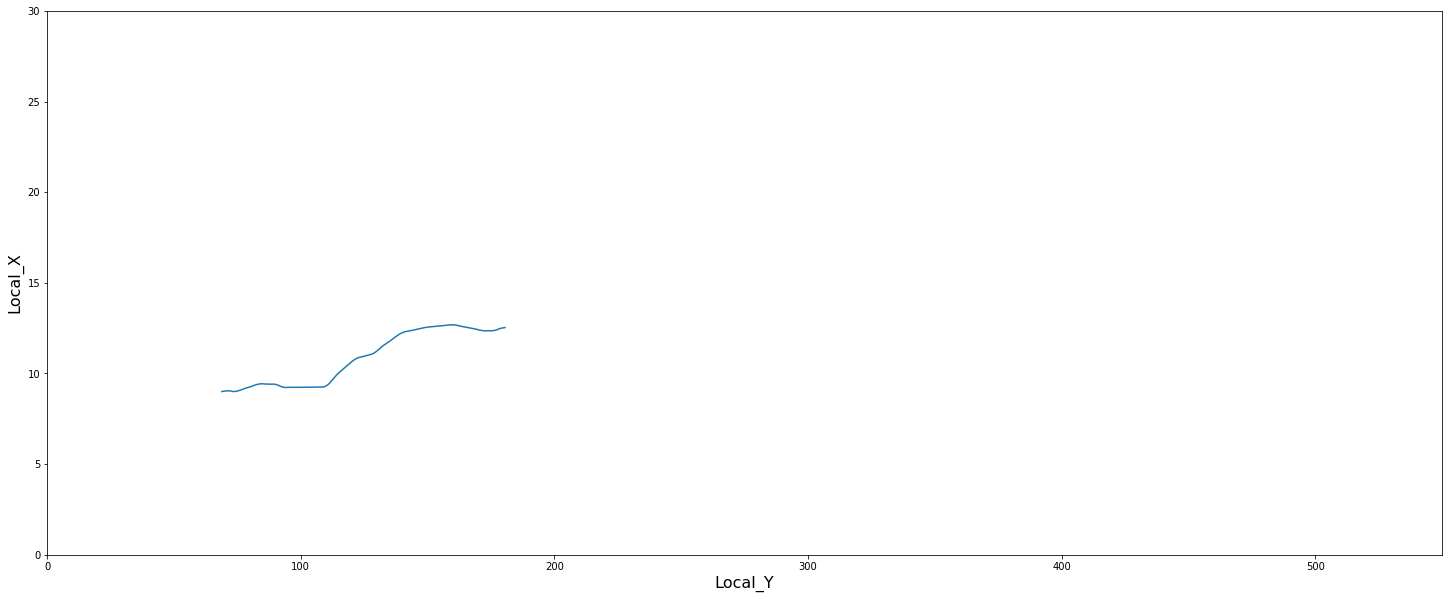

##########################################   48   ###############################################


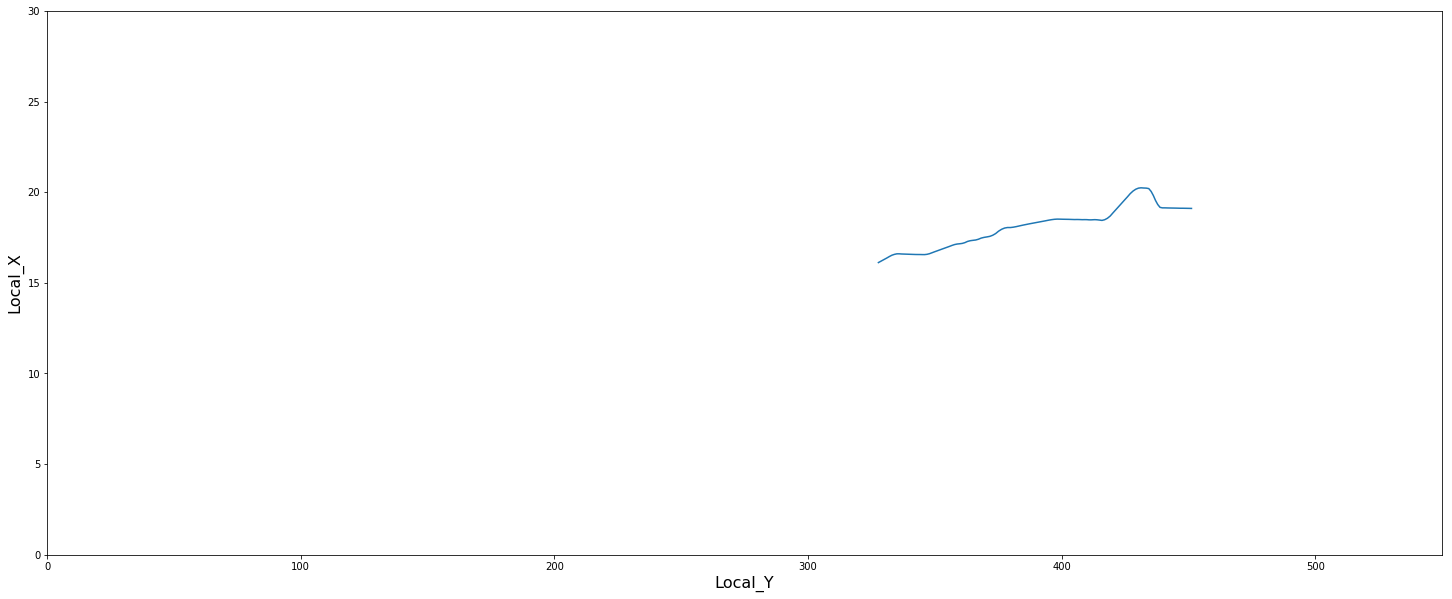

##########################################   49   ###############################################


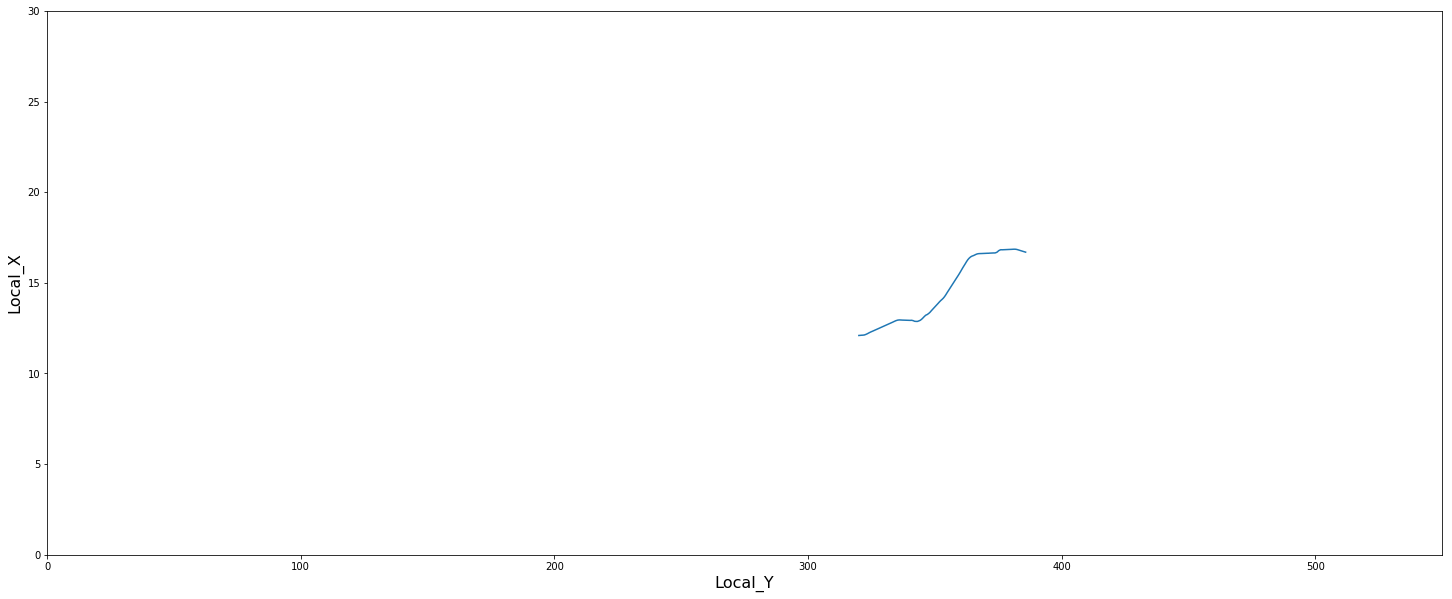

##########################################   50   ###############################################


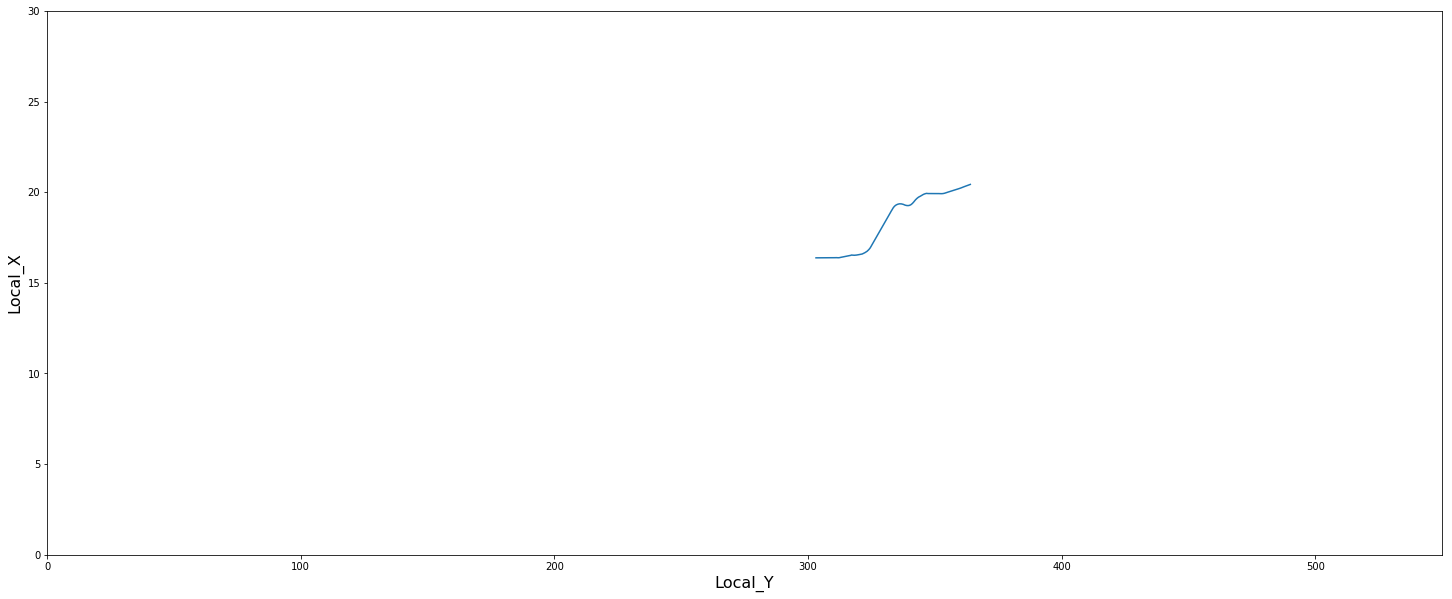

##########################################   51   ###############################################


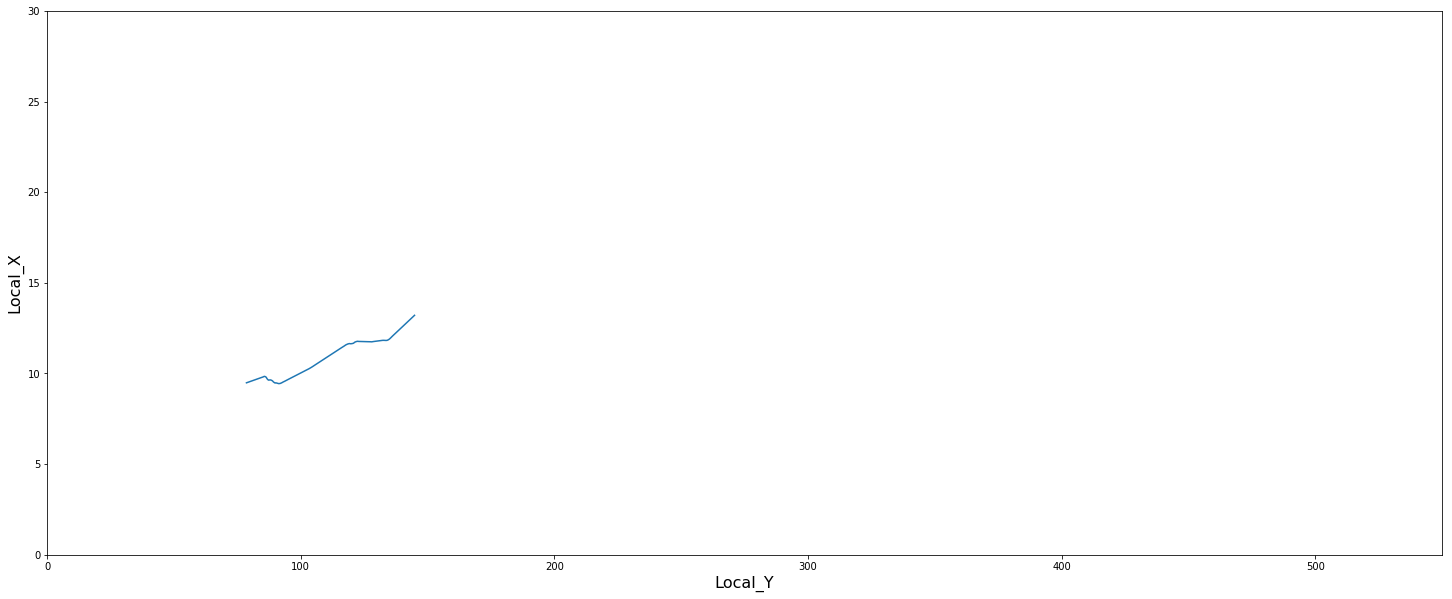

##########################################   52   ###############################################


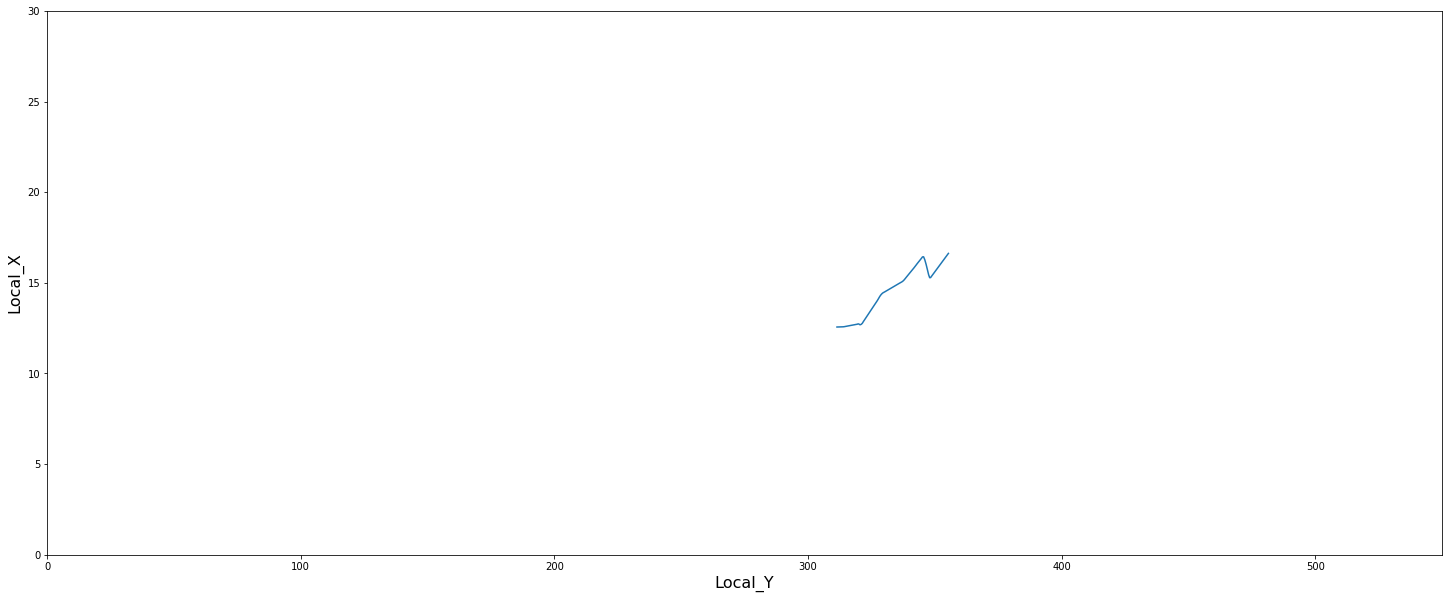

##########################################   53   ###############################################


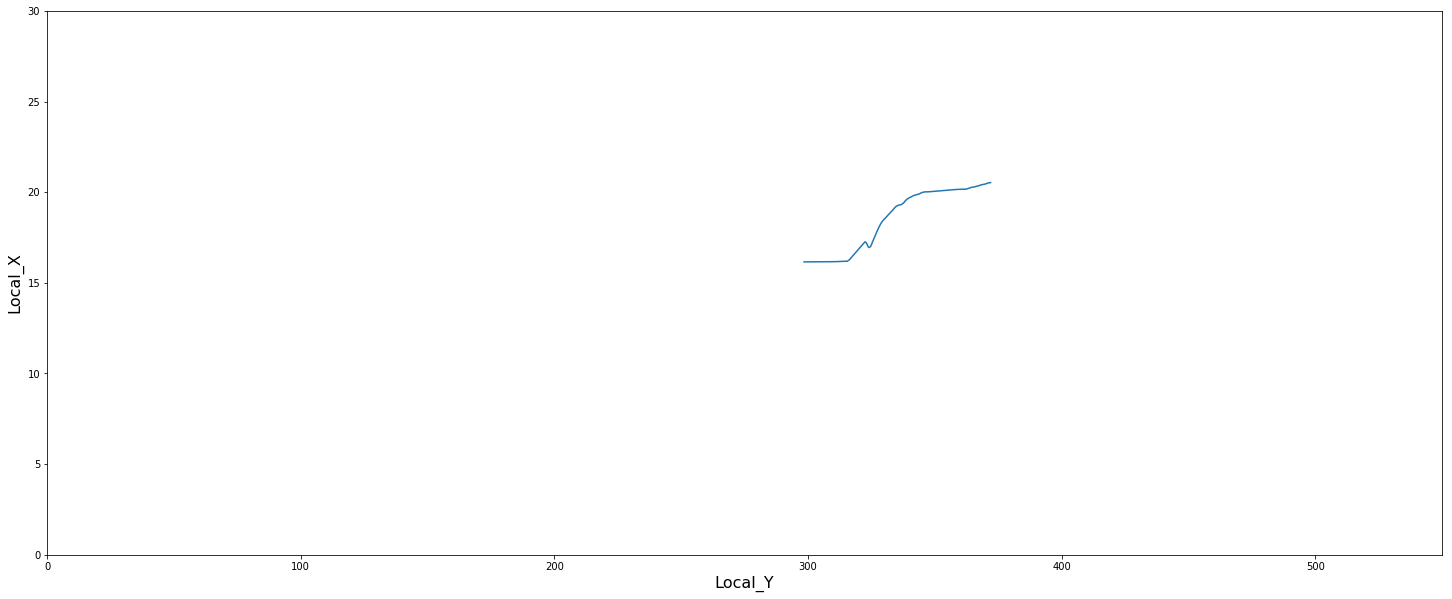

##########################################   54   ###############################################


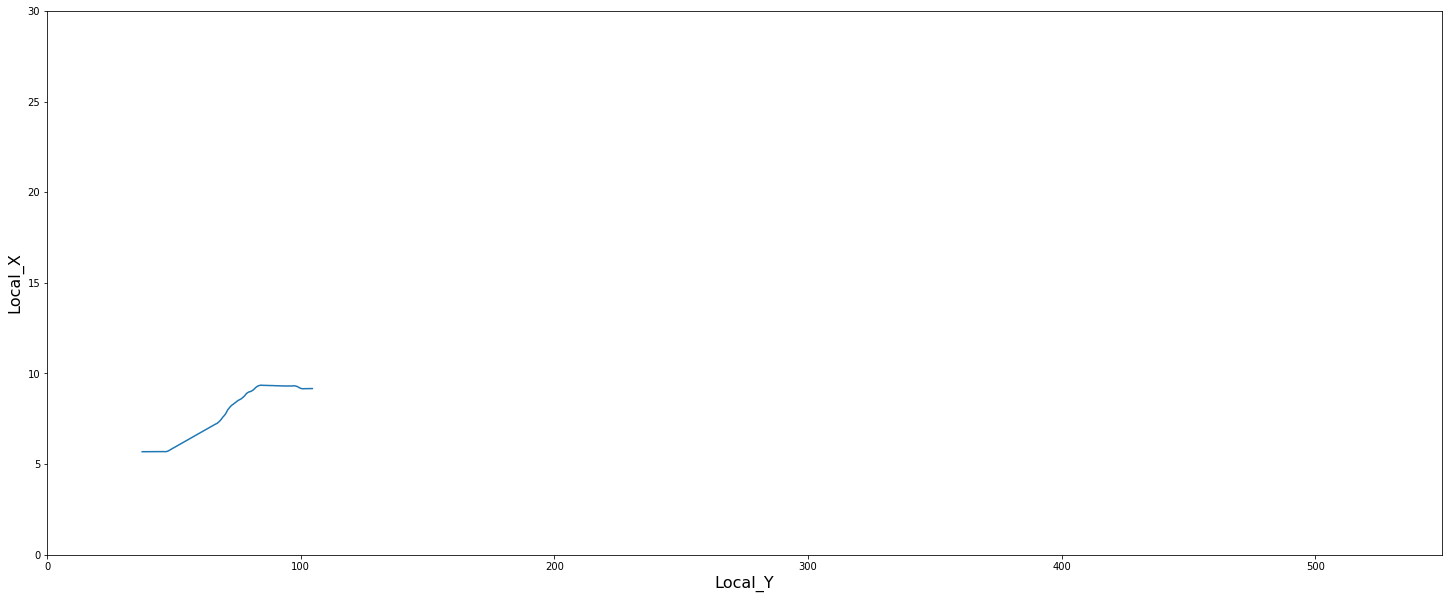

##########################################   55   ###############################################


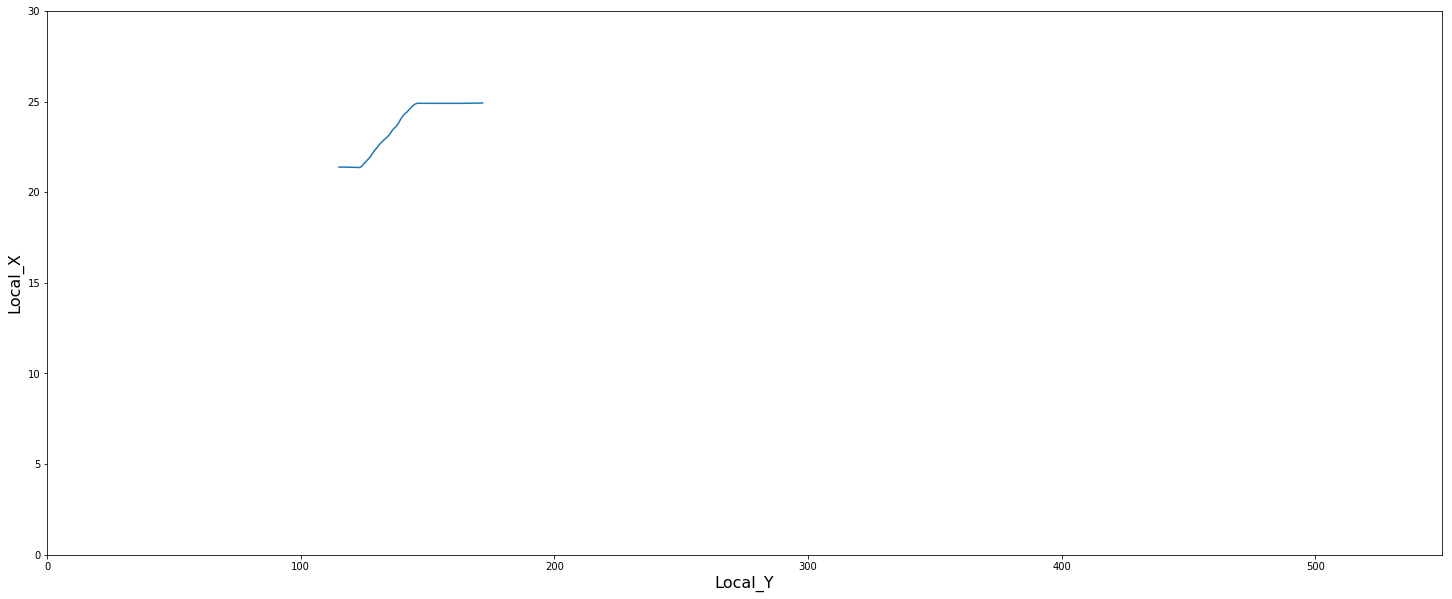

##########################################   56   ###############################################


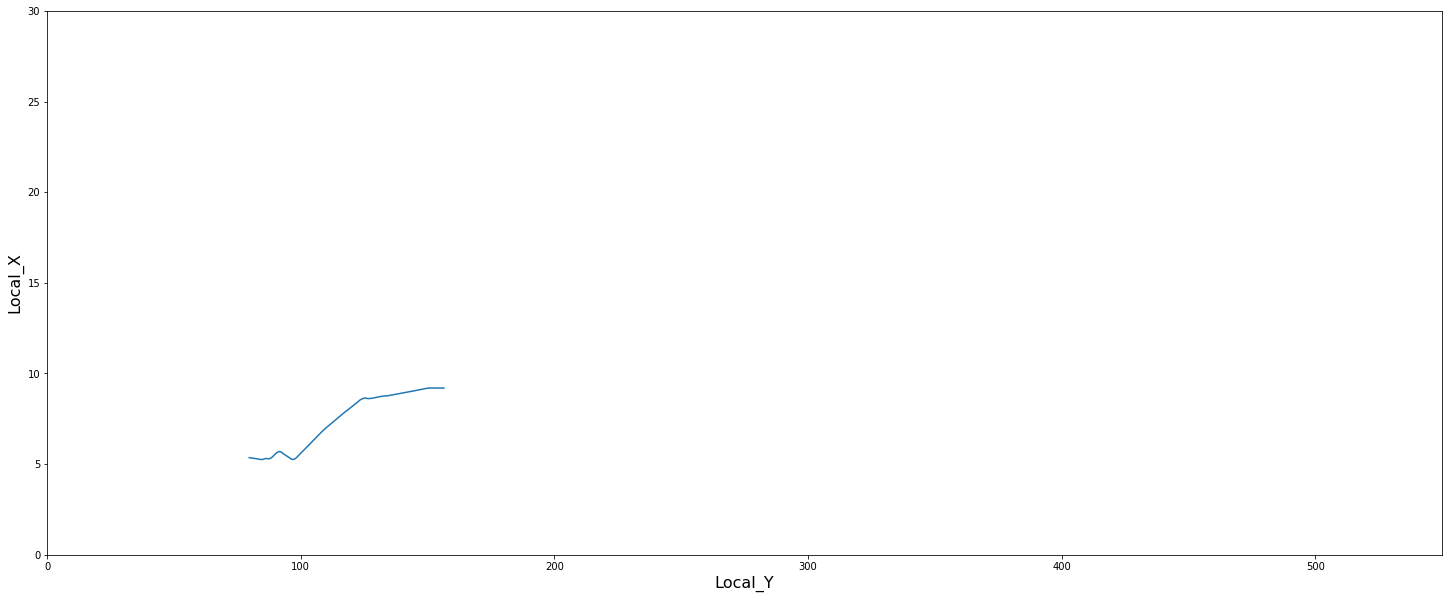

##########################################   57   ###############################################


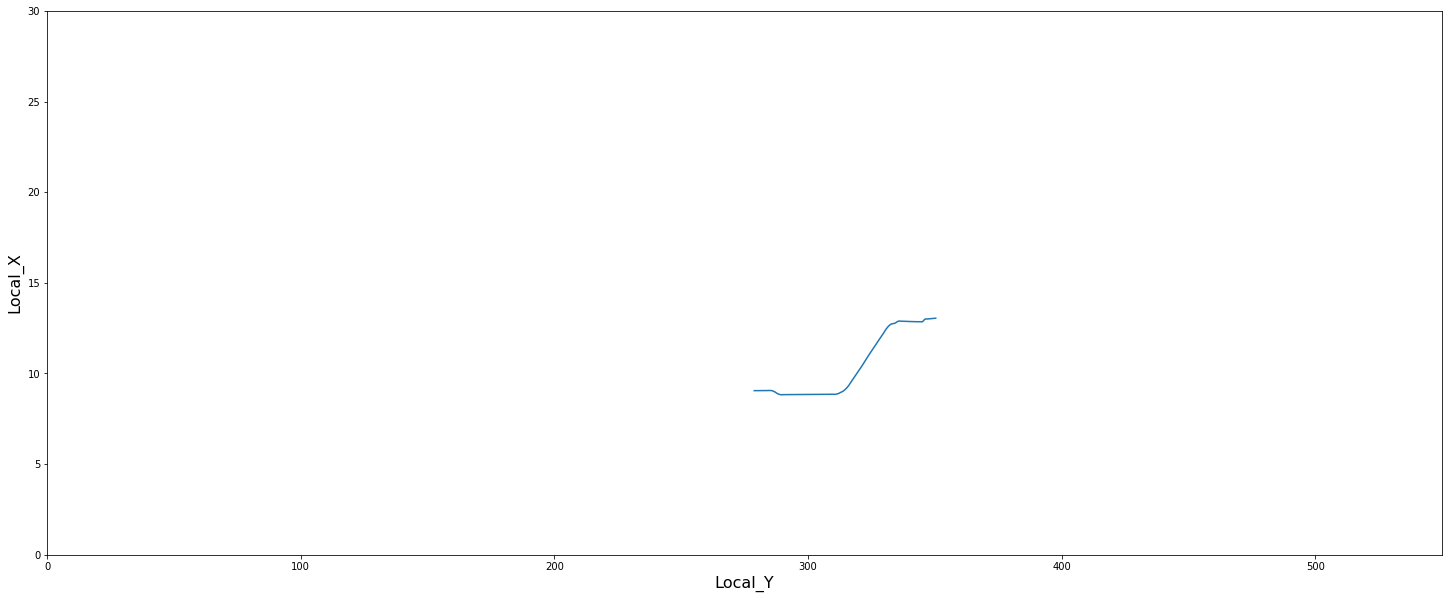

##########################################   58   ###############################################


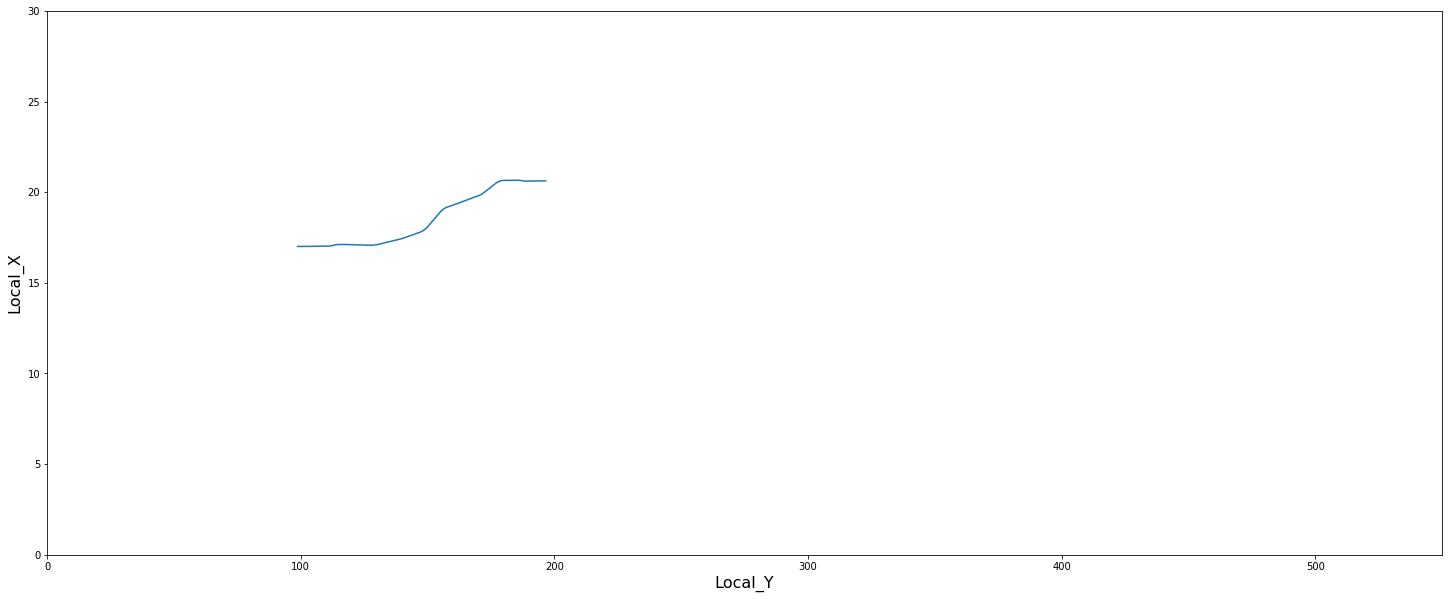

##########################################   59   ###############################################


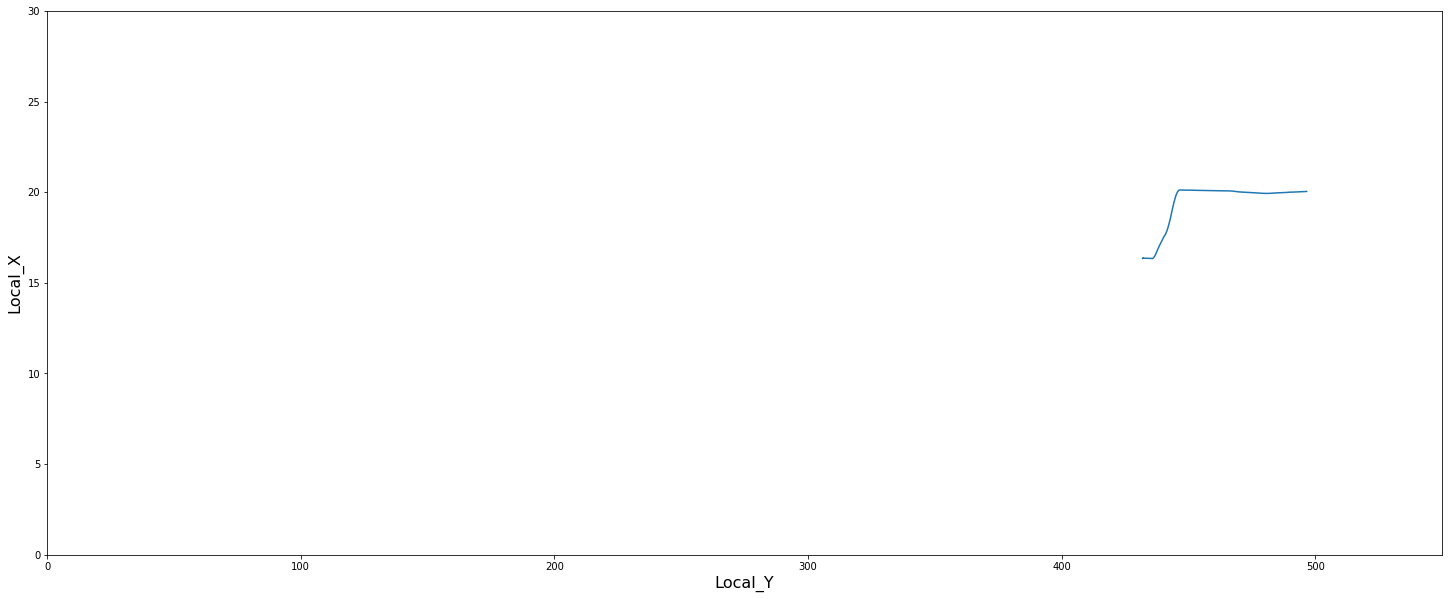

##########################################   60   ###############################################


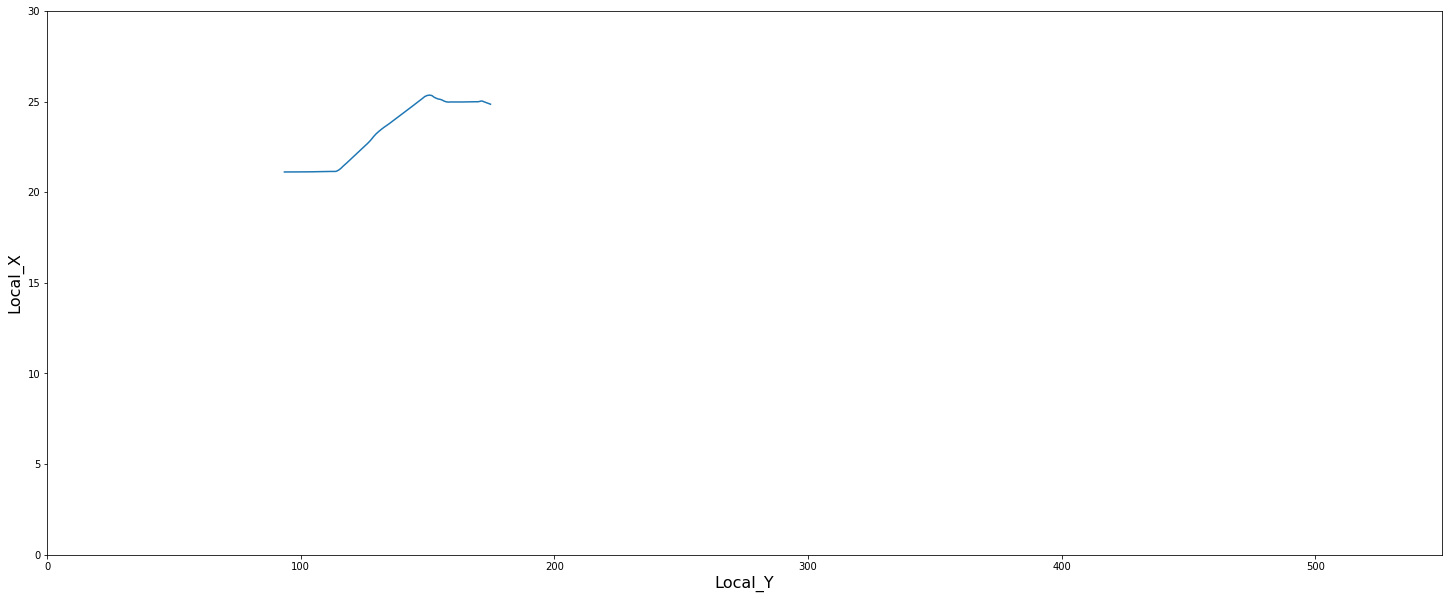

##########################################   61   ###############################################


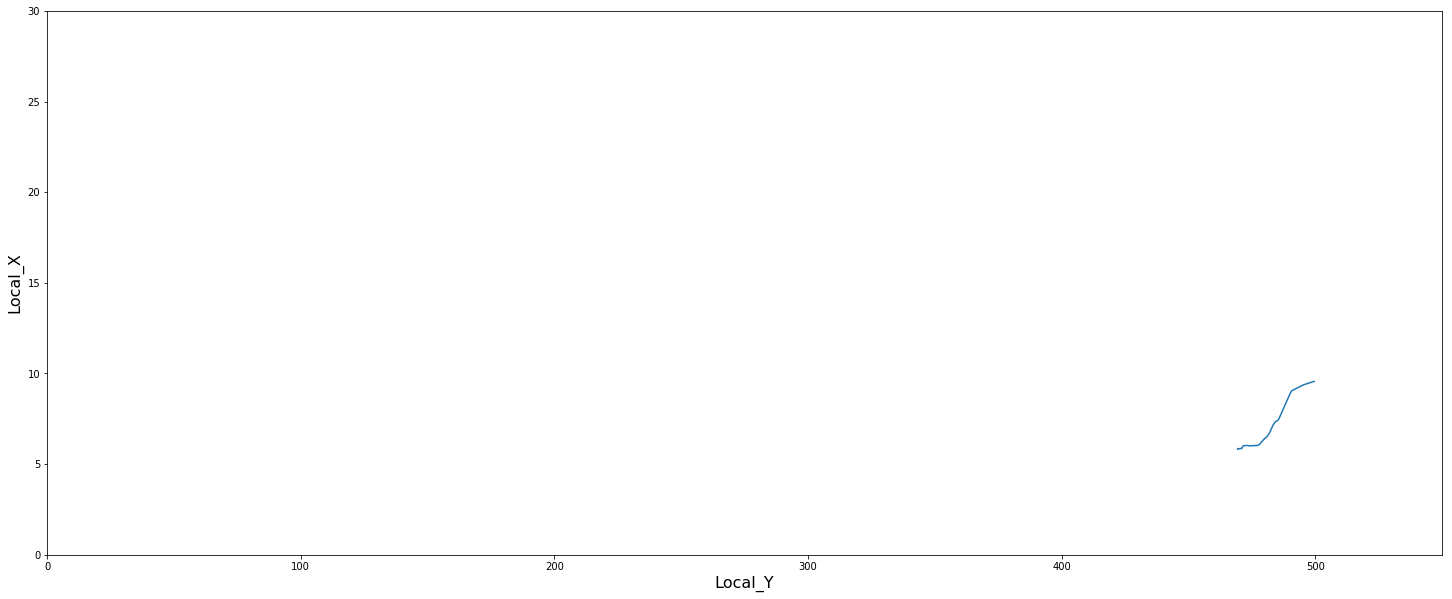

##########################################   62   ###############################################


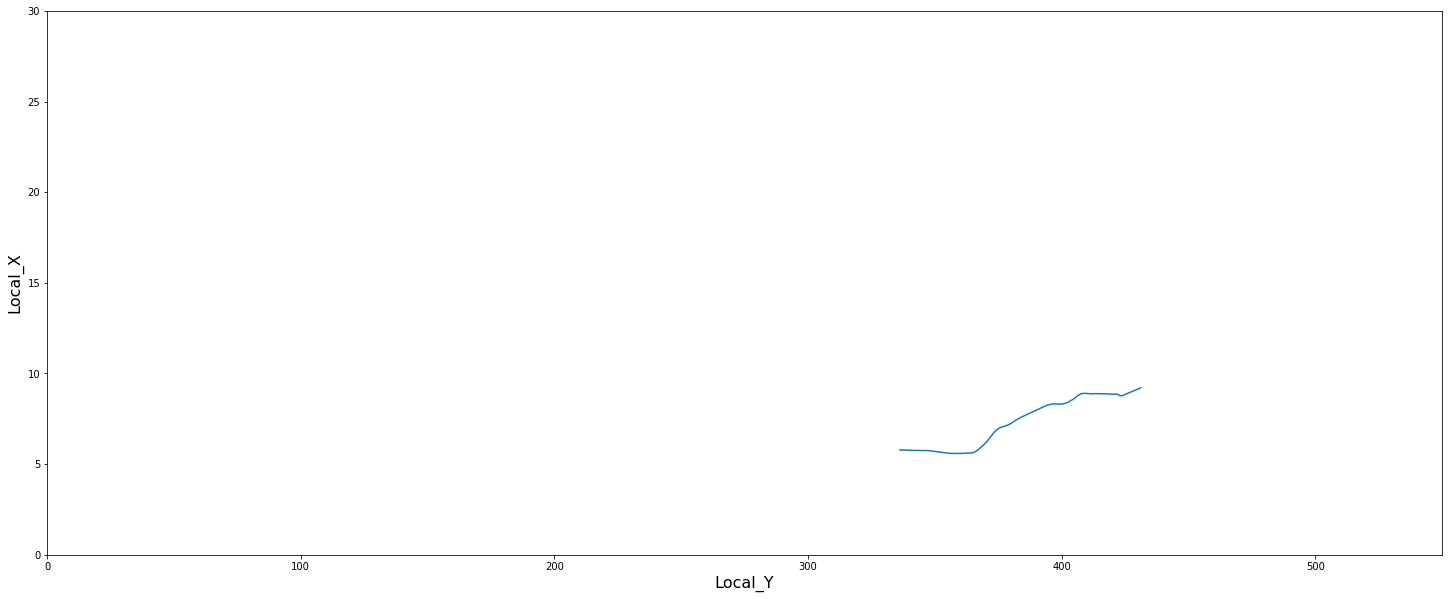

##########################################   63   ###############################################


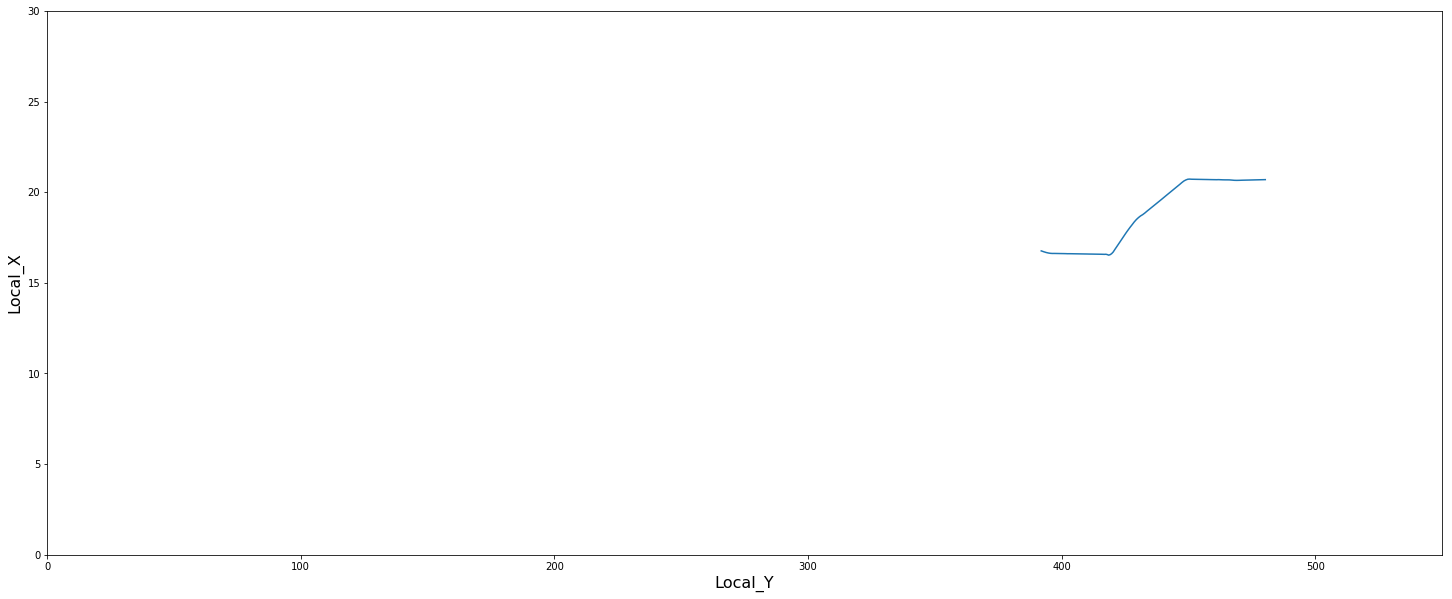

##########################################   64   ###############################################


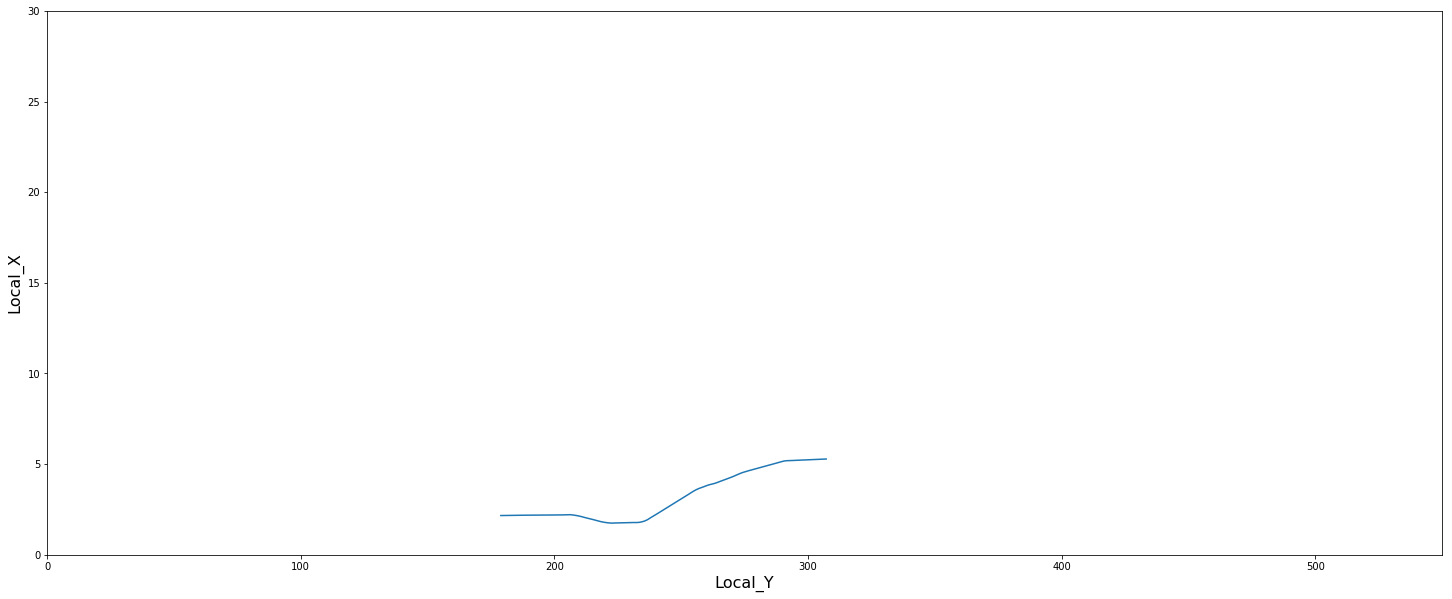

##########################################   65   ###############################################


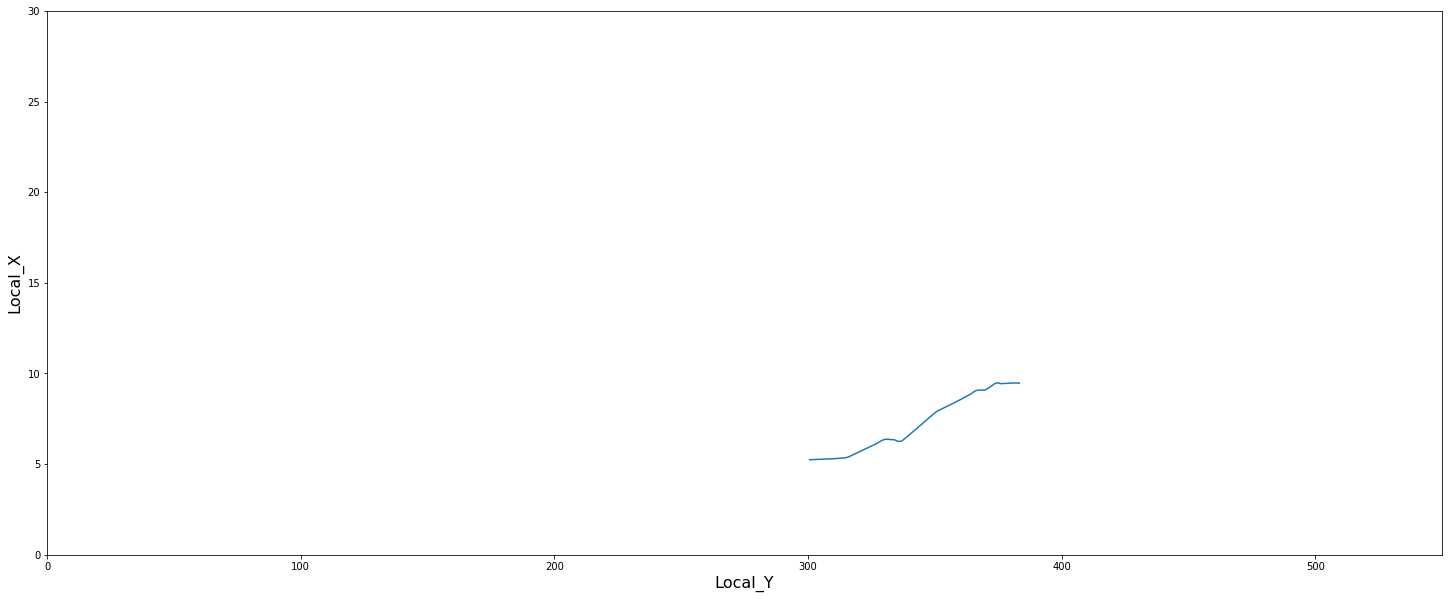

##########################################   66   ###############################################


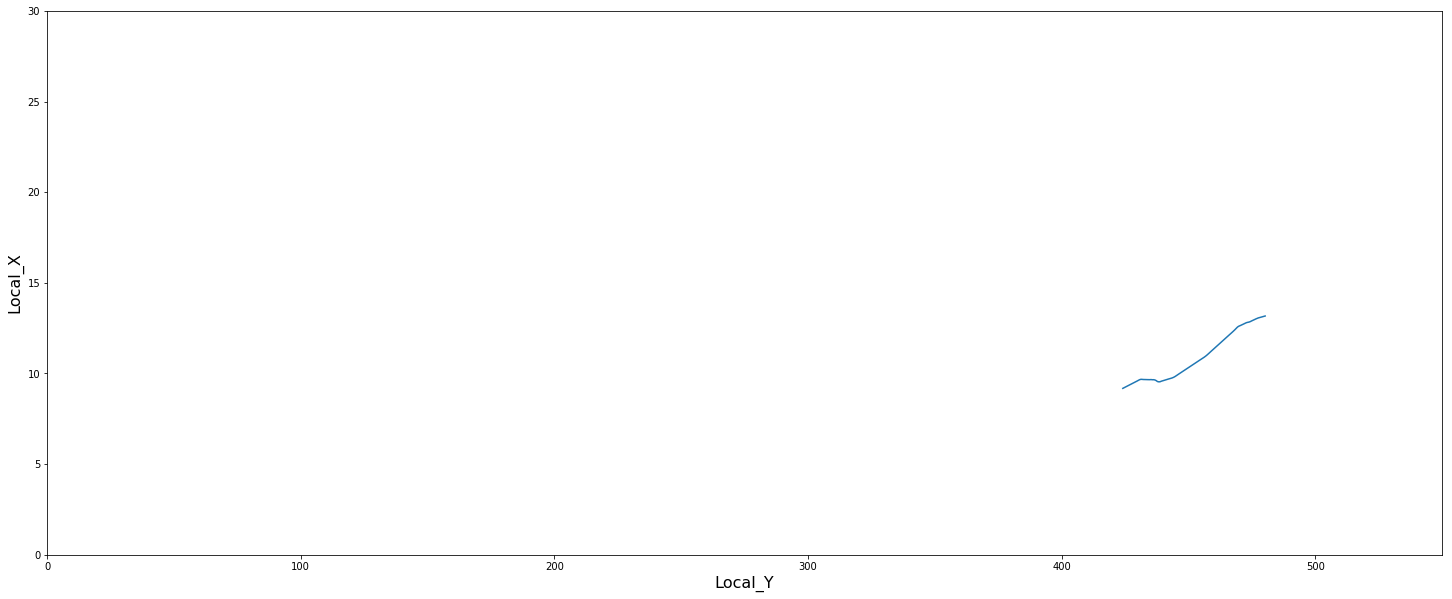

##########################################   67   ###############################################


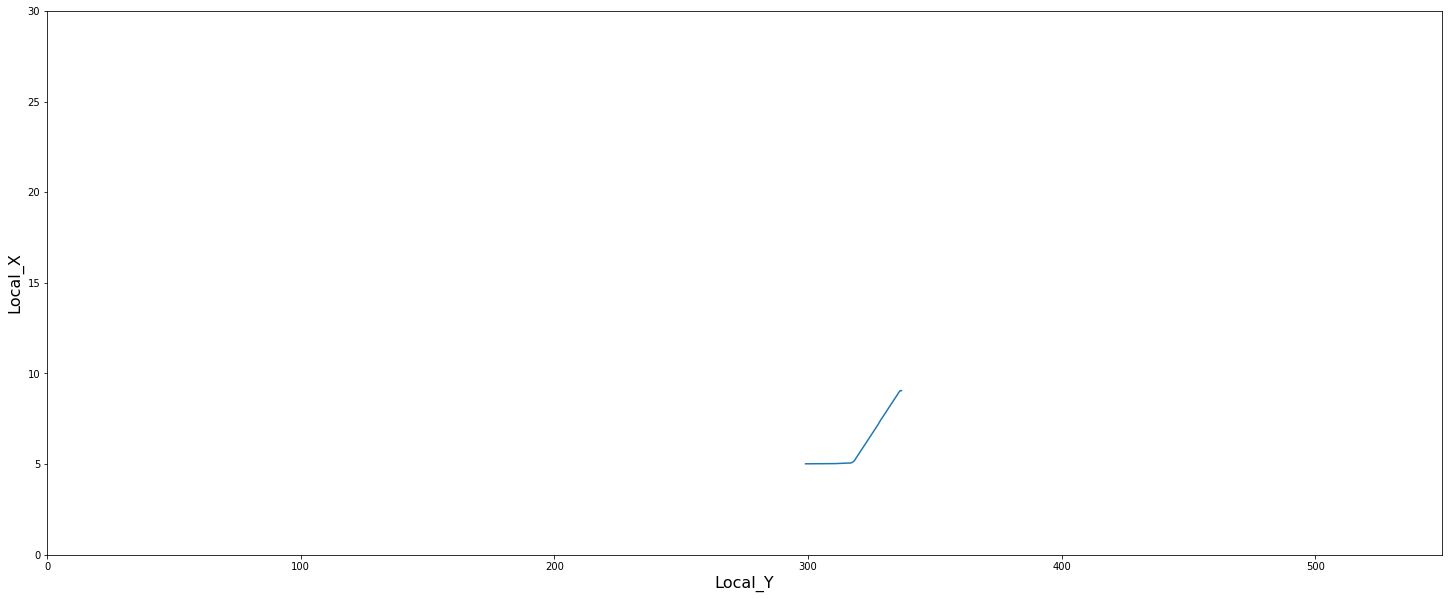

##########################################   68   ###############################################


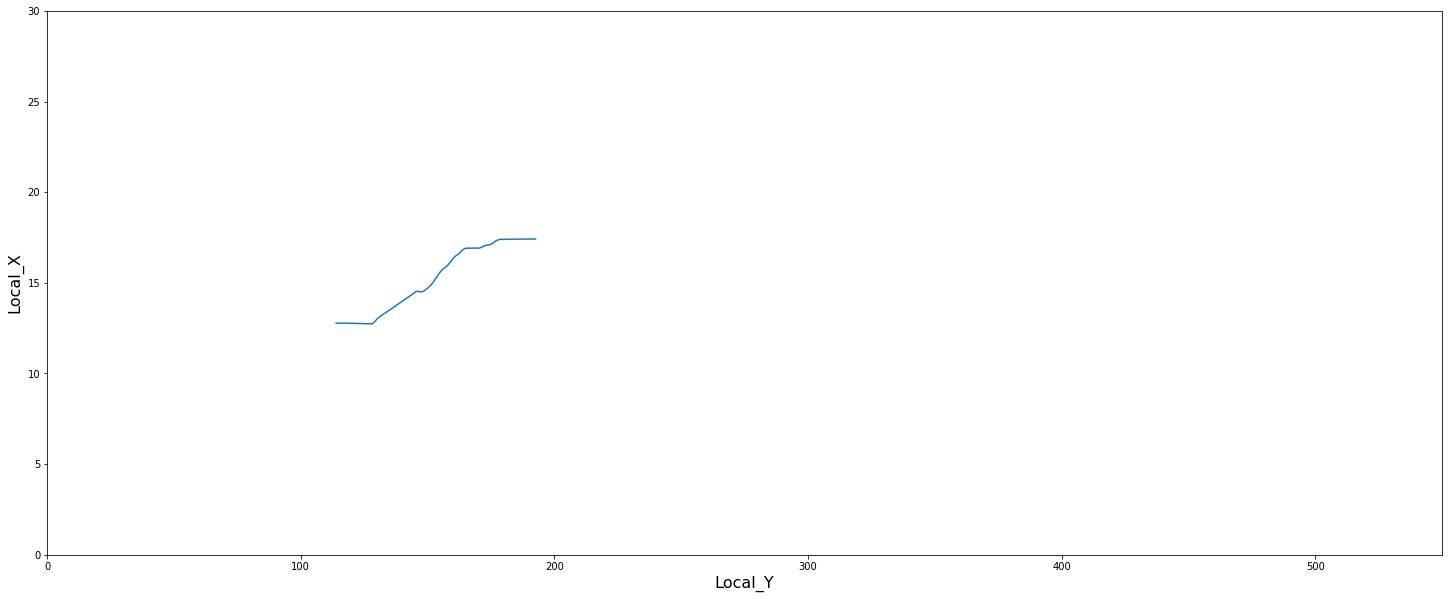

##########################################   69   ###############################################


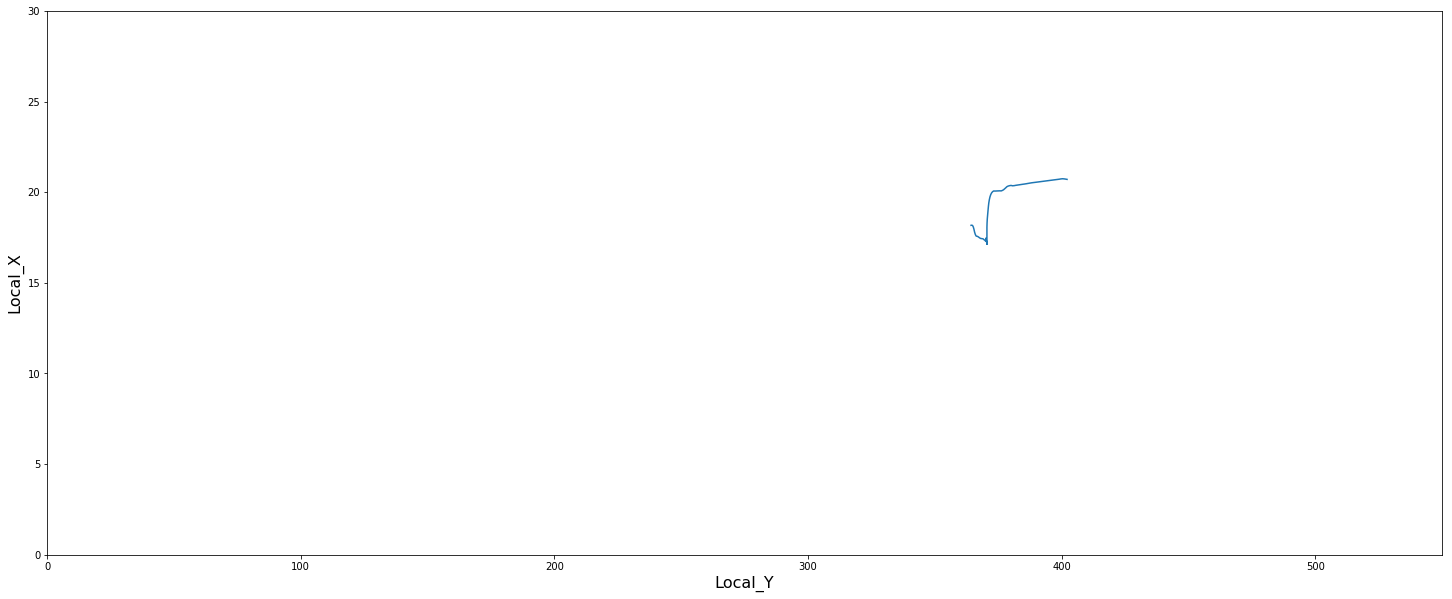

##########################################   70   ###############################################


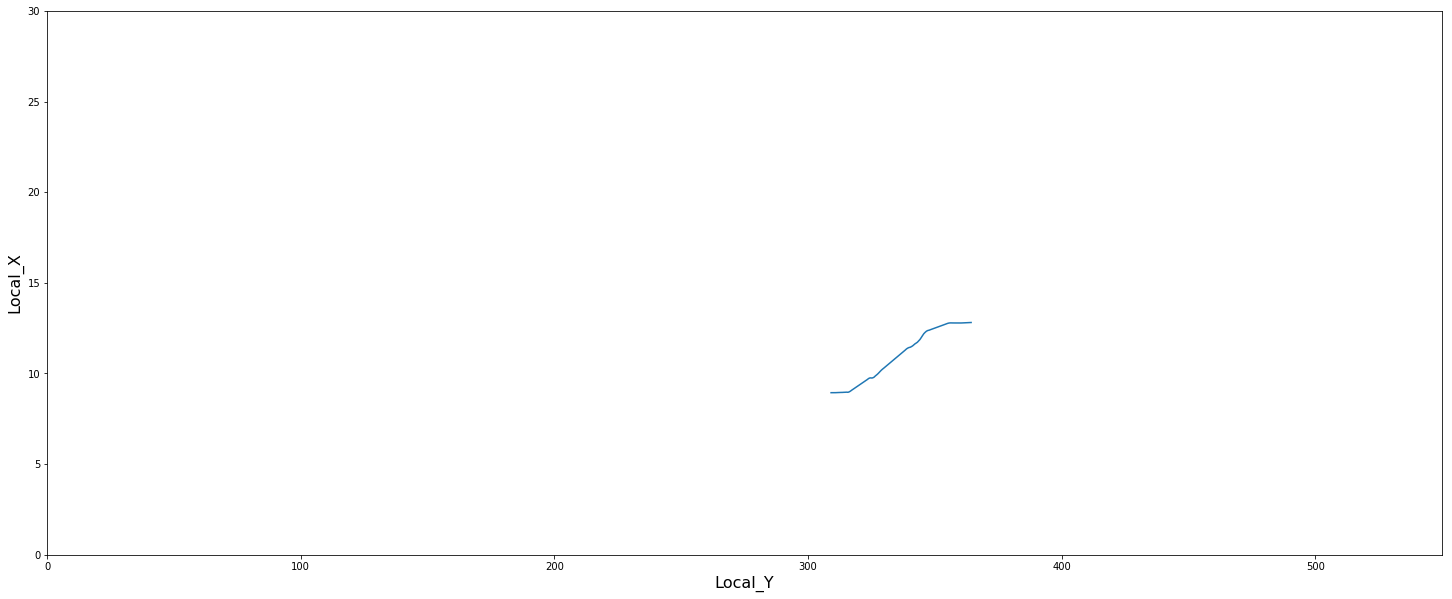

##########################################   71   ###############################################


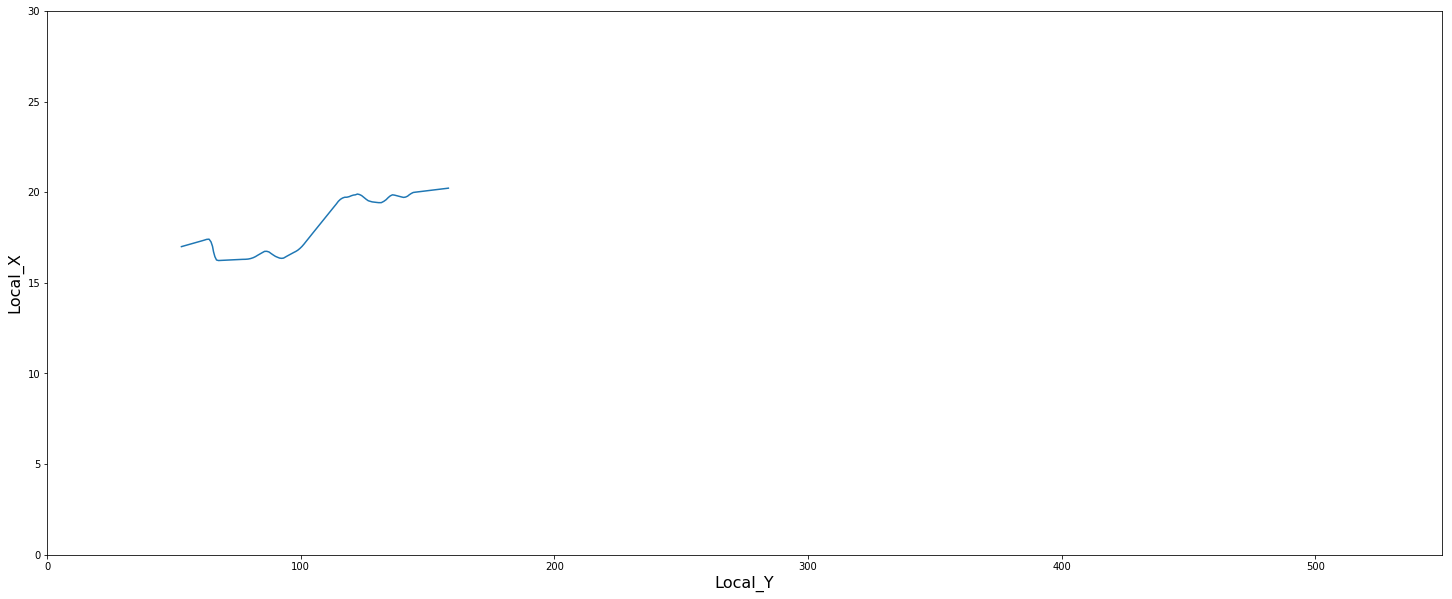

##########################################   72   ###############################################


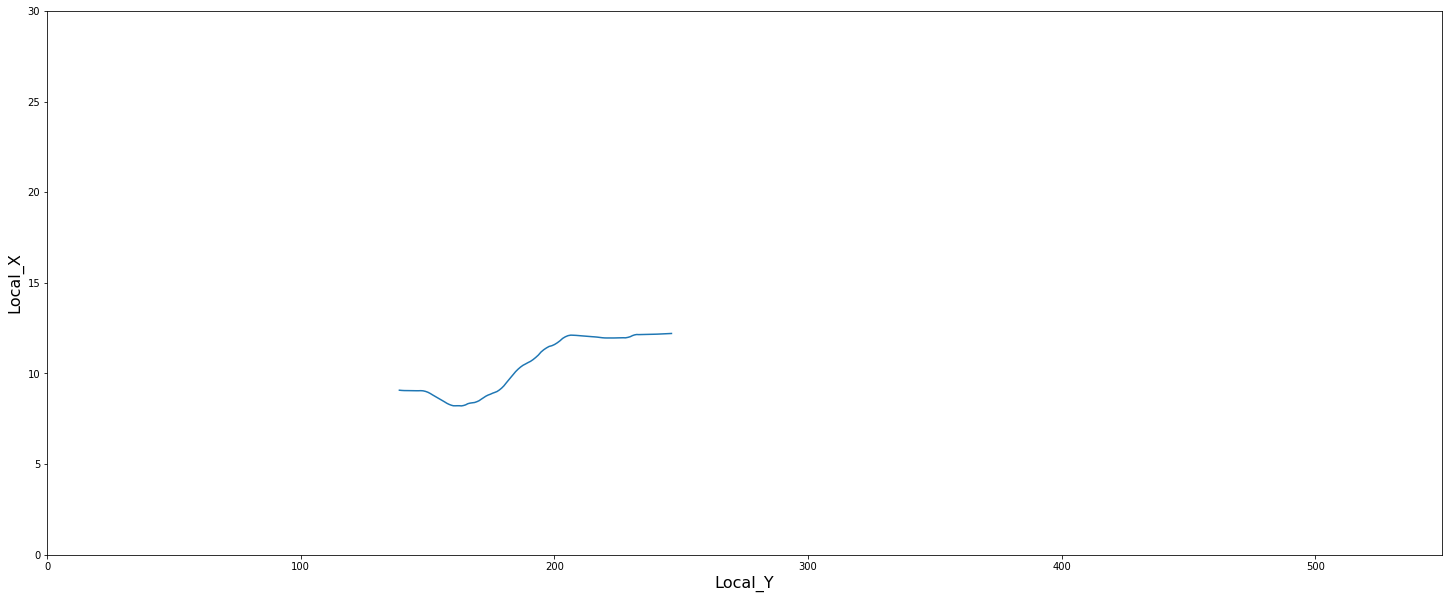

##########################################   73   ###############################################


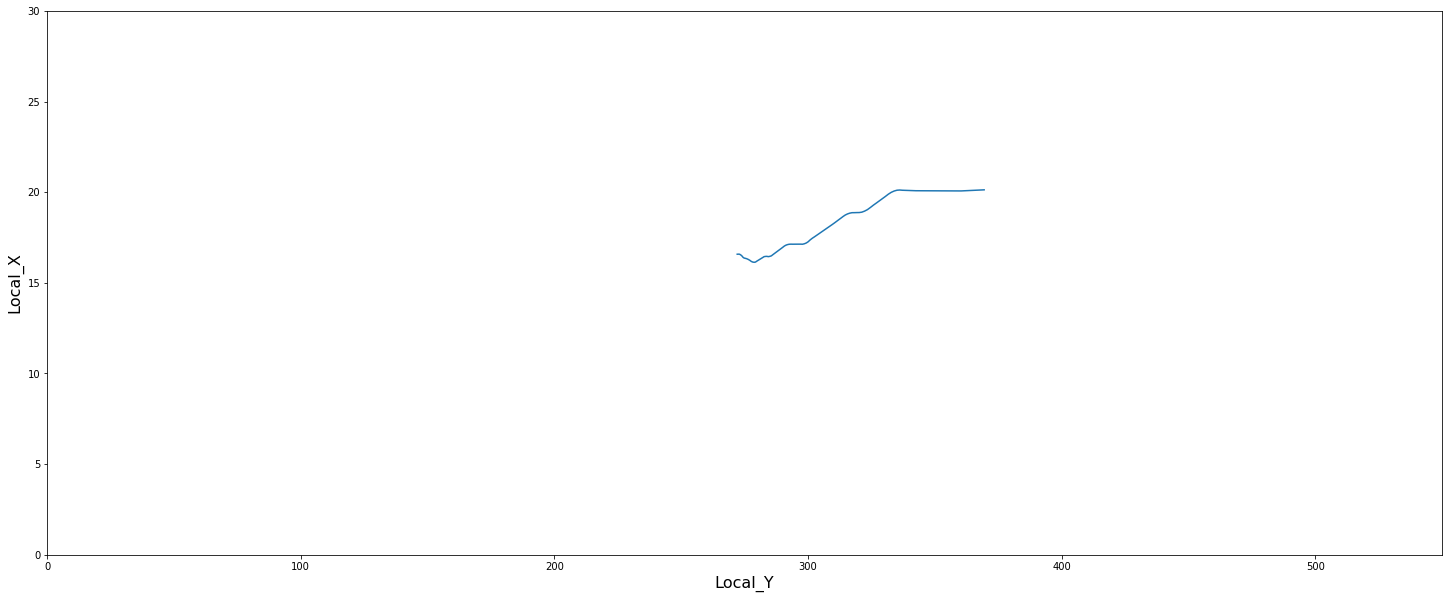

##########################################   74   ###############################################


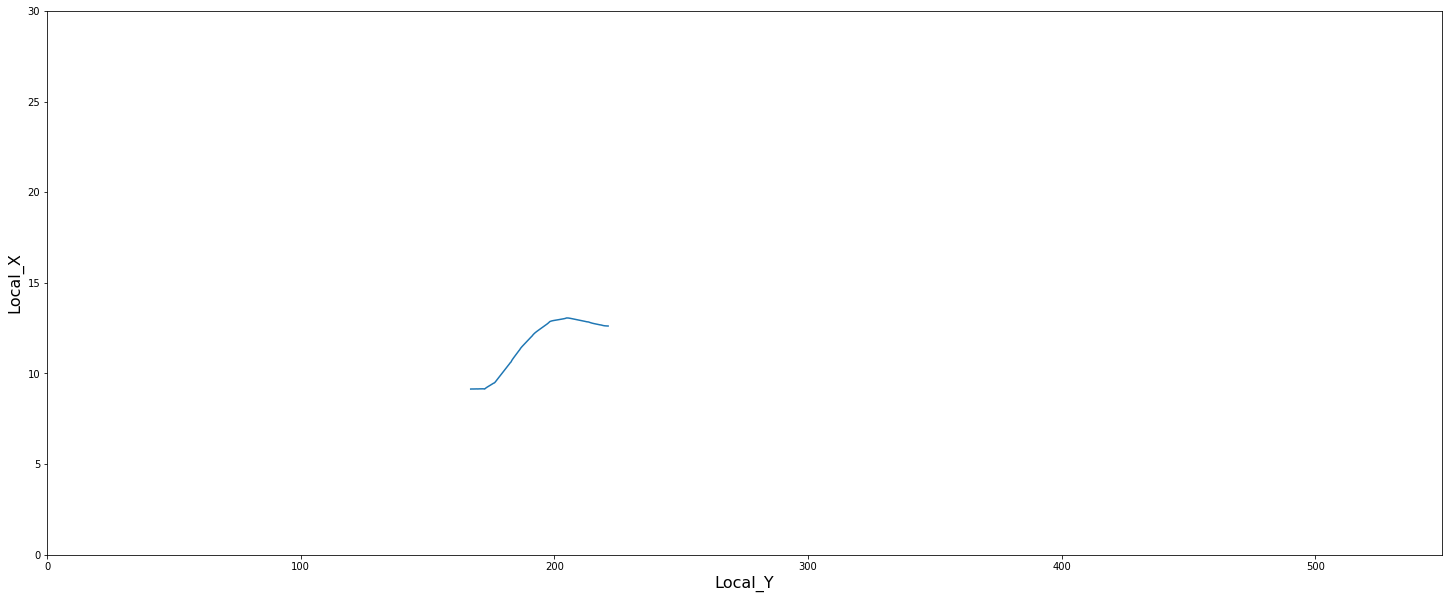

##########################################   75   ###############################################


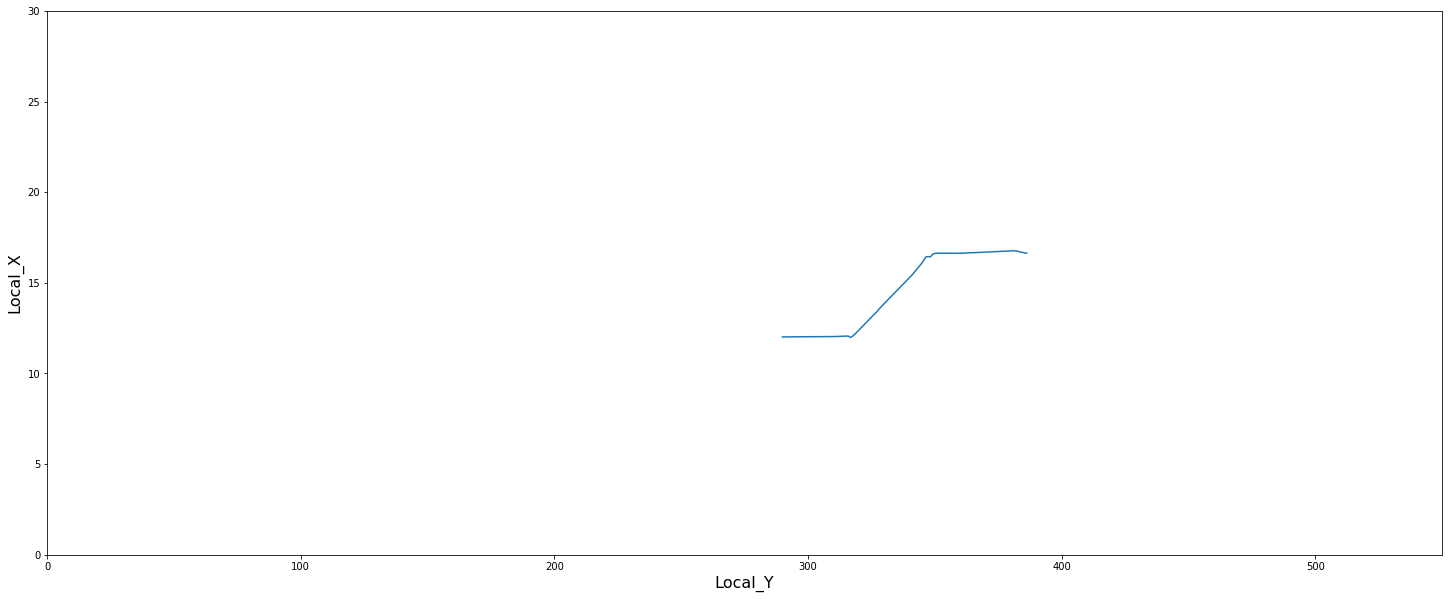

##########################################   76   ###############################################


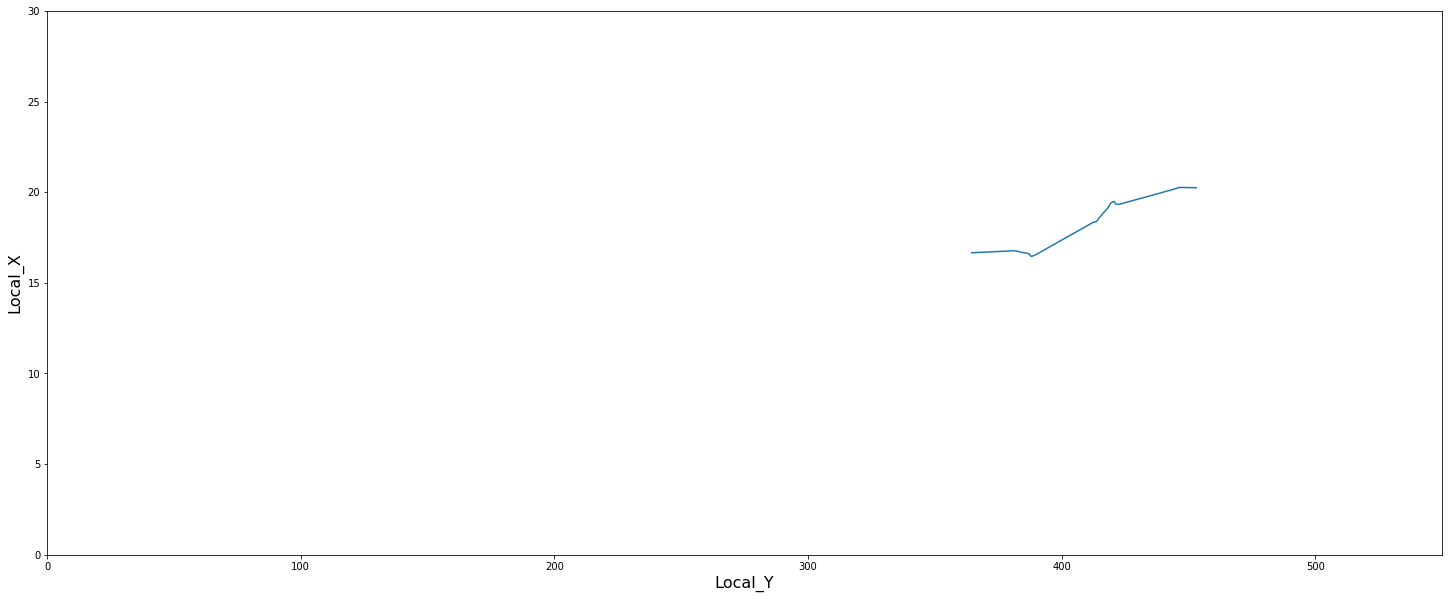

##########################################   77   ###############################################


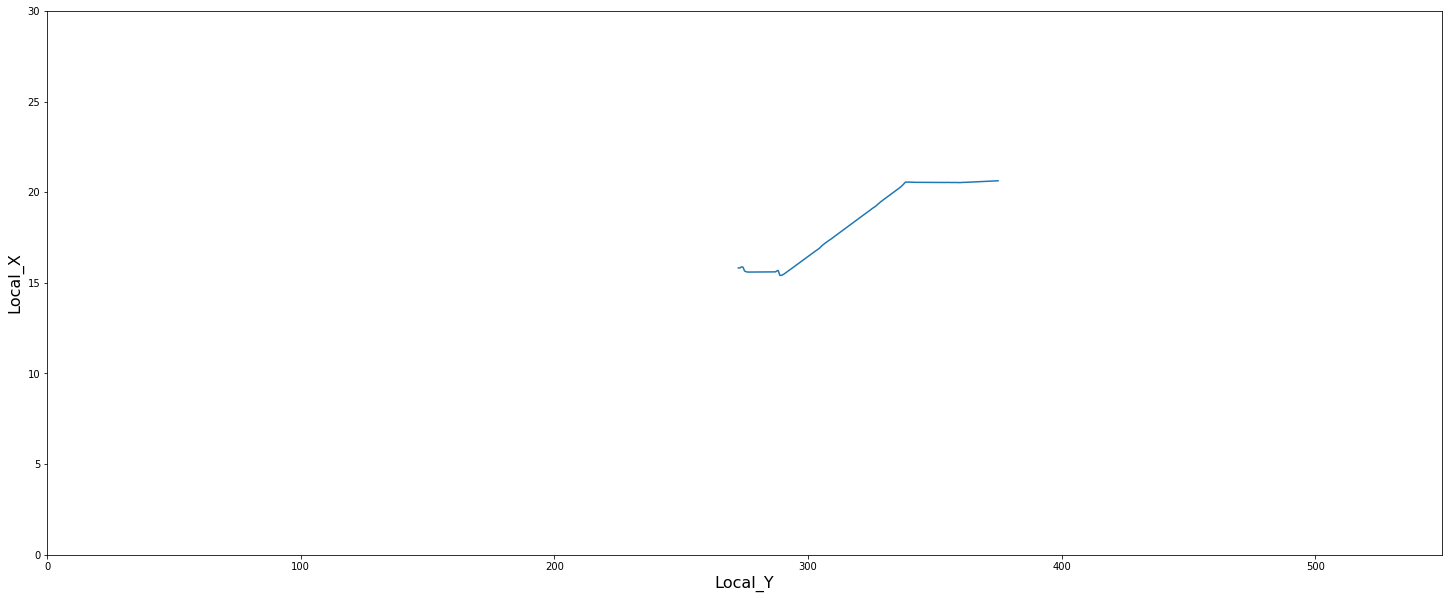

##########################################   78   ###############################################


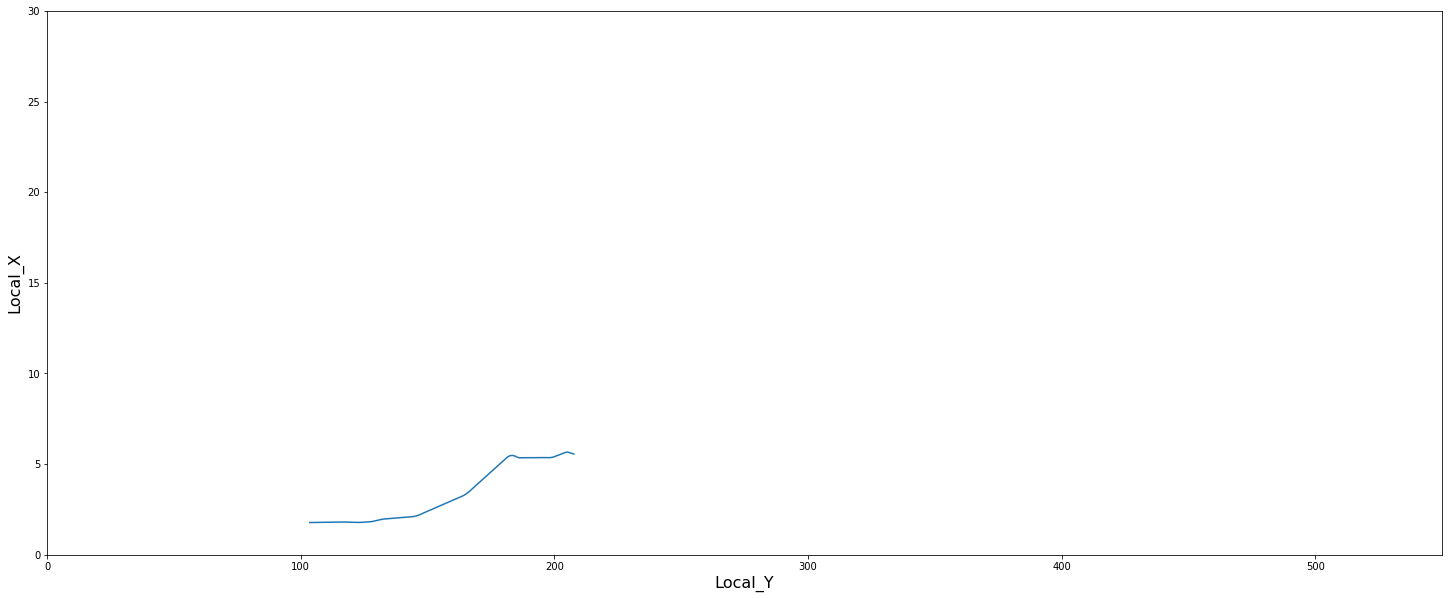

##########################################   79   ###############################################


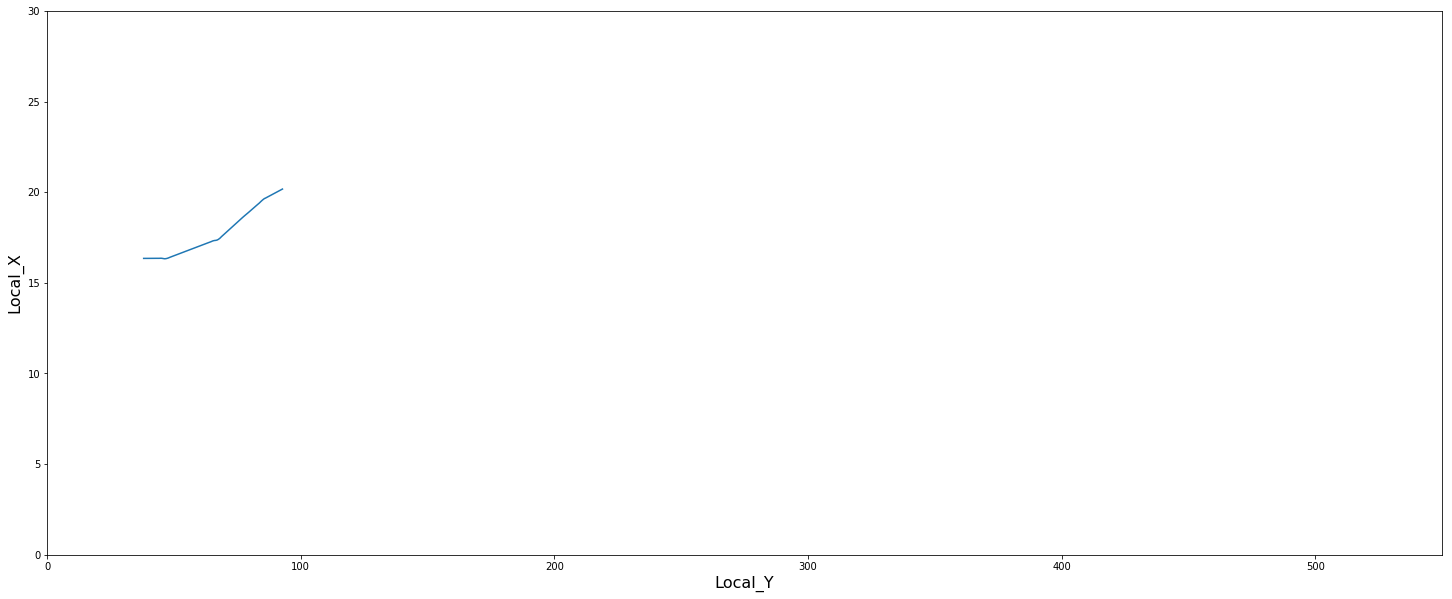

##########################################   80   ###############################################


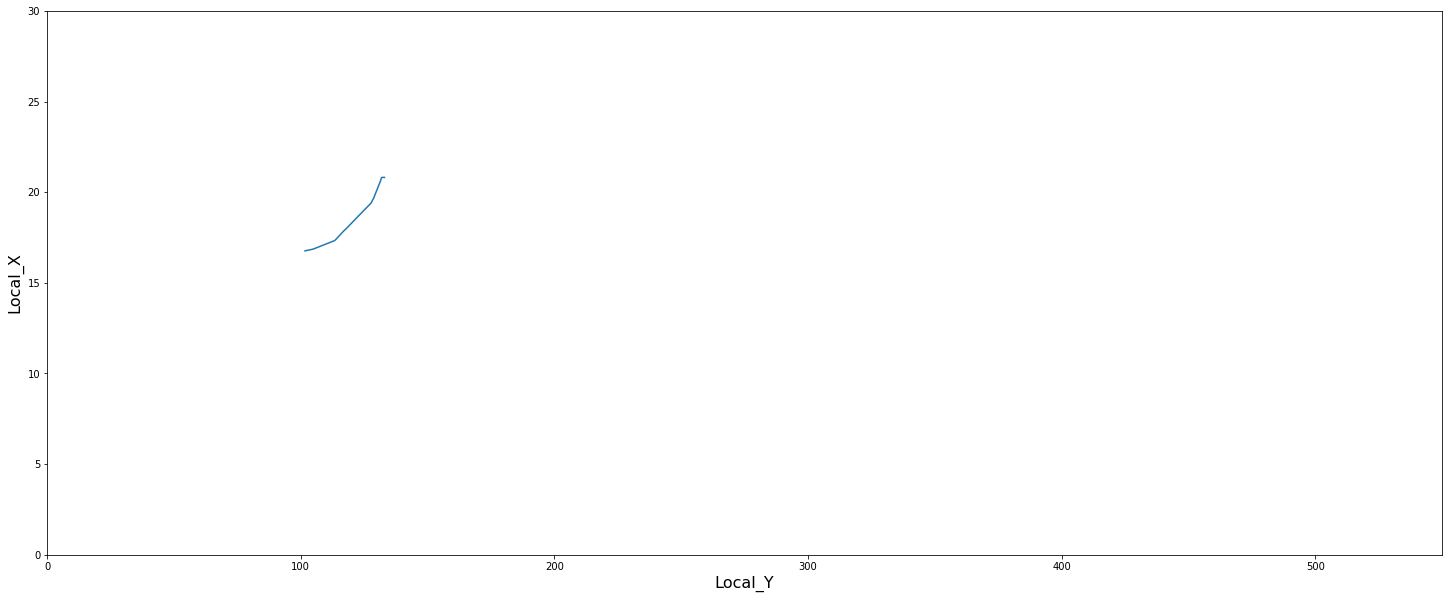

##########################################   81   ###############################################


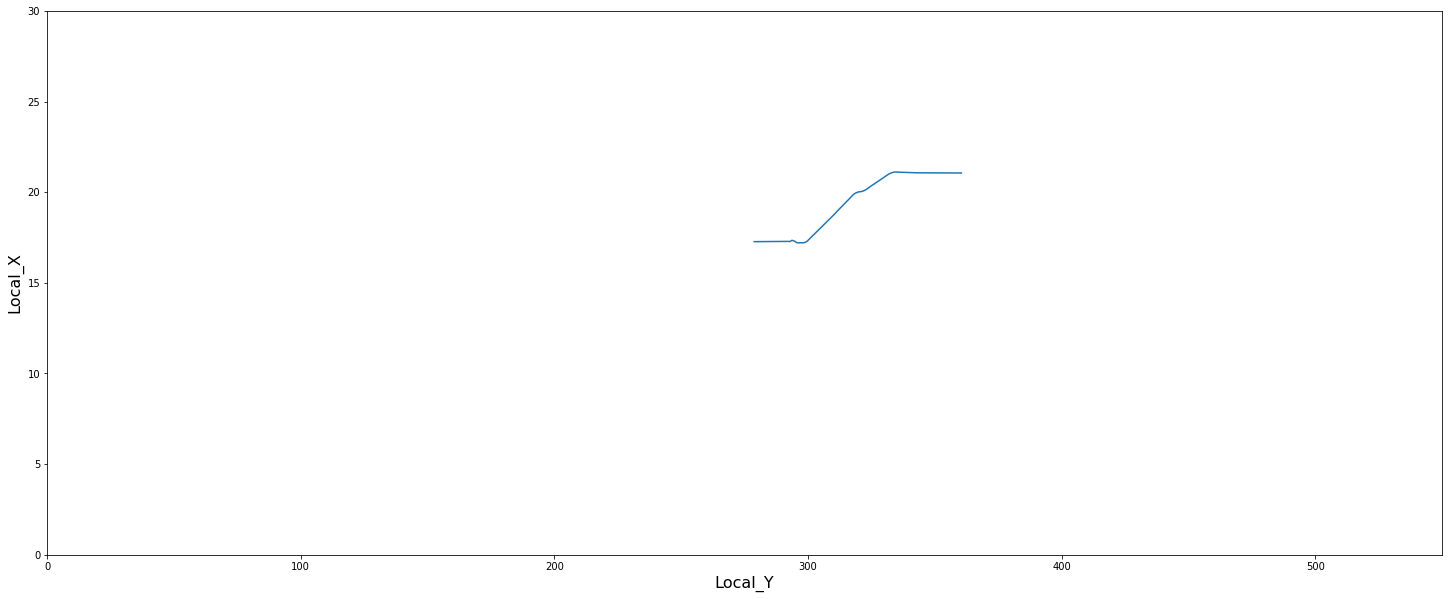

##########################################   82   ###############################################


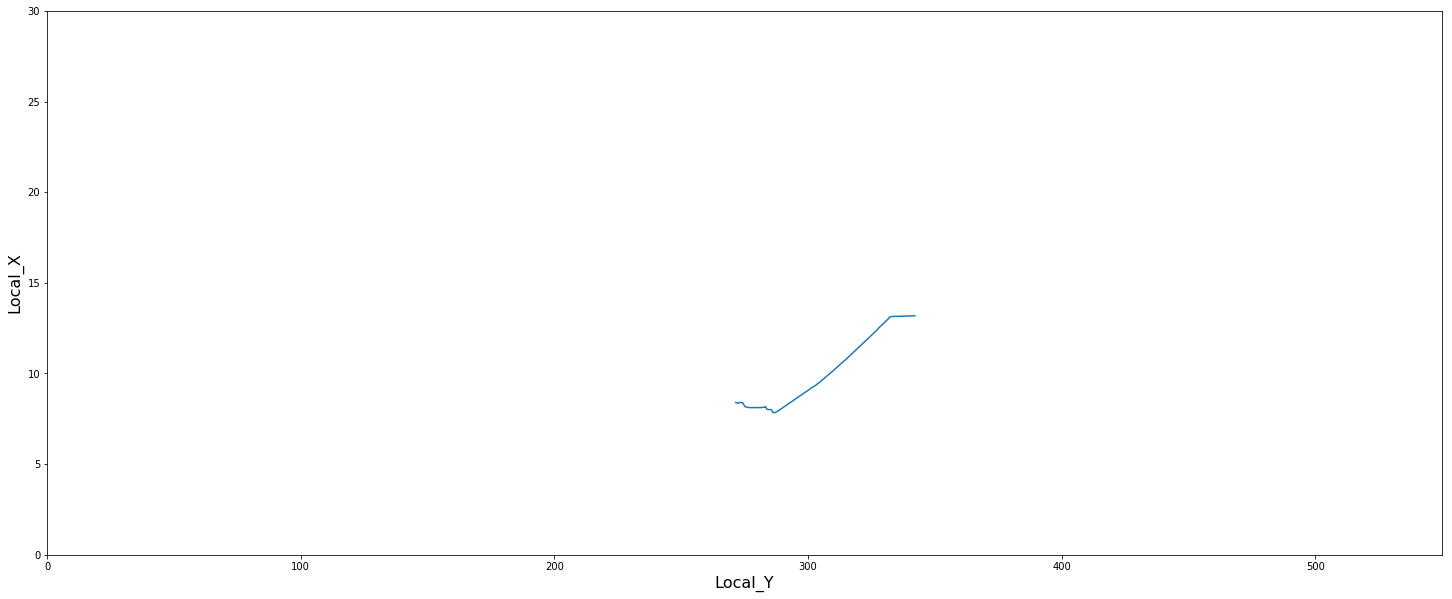

##########################################   83   ###############################################


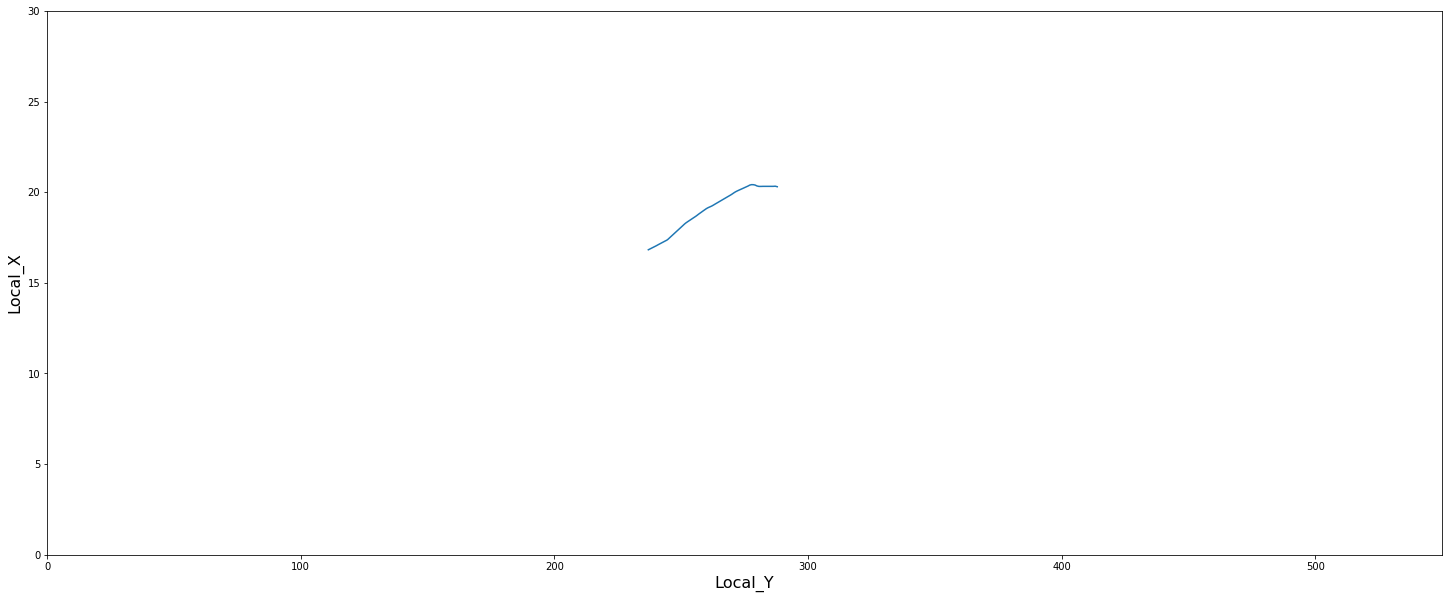

##########################################   84   ###############################################


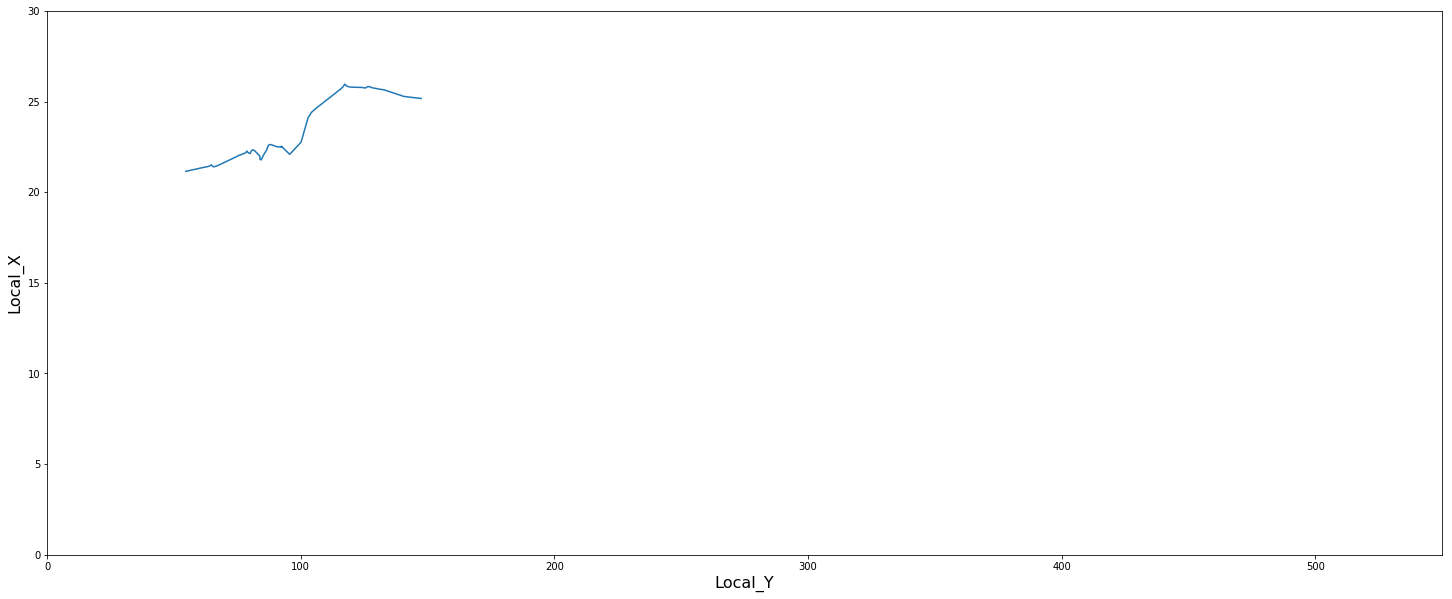

##########################################   85   ###############################################


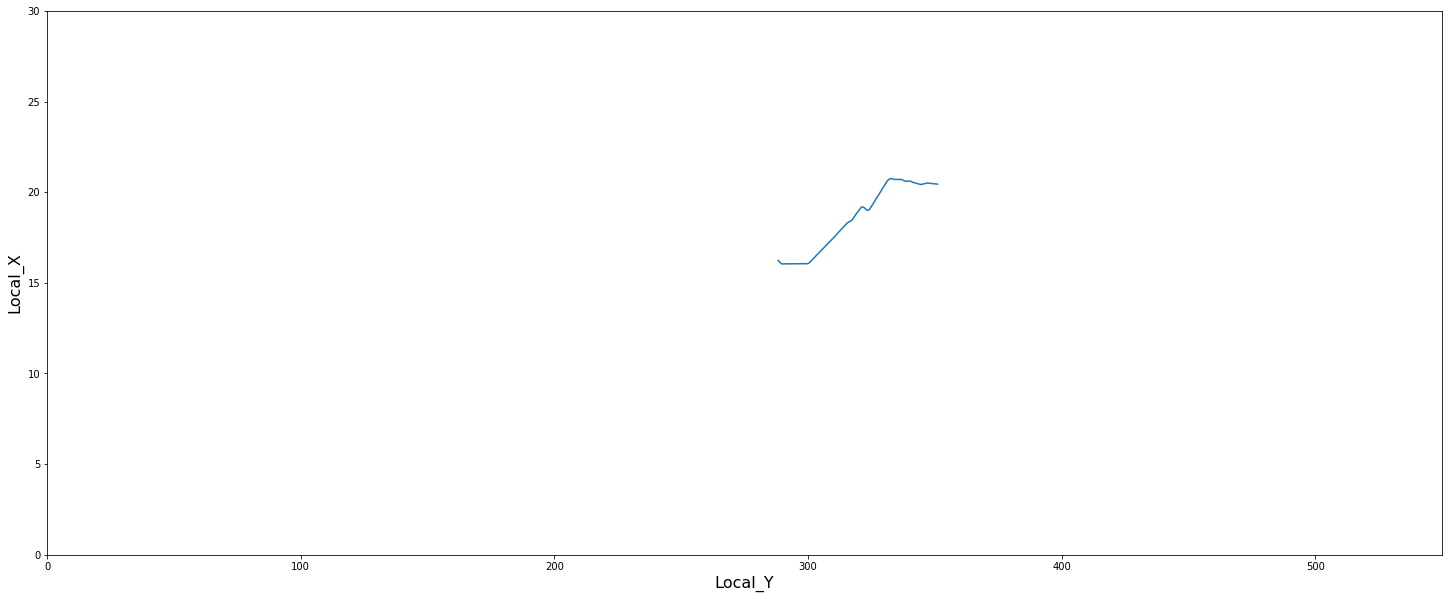

##########################################   86   ###############################################


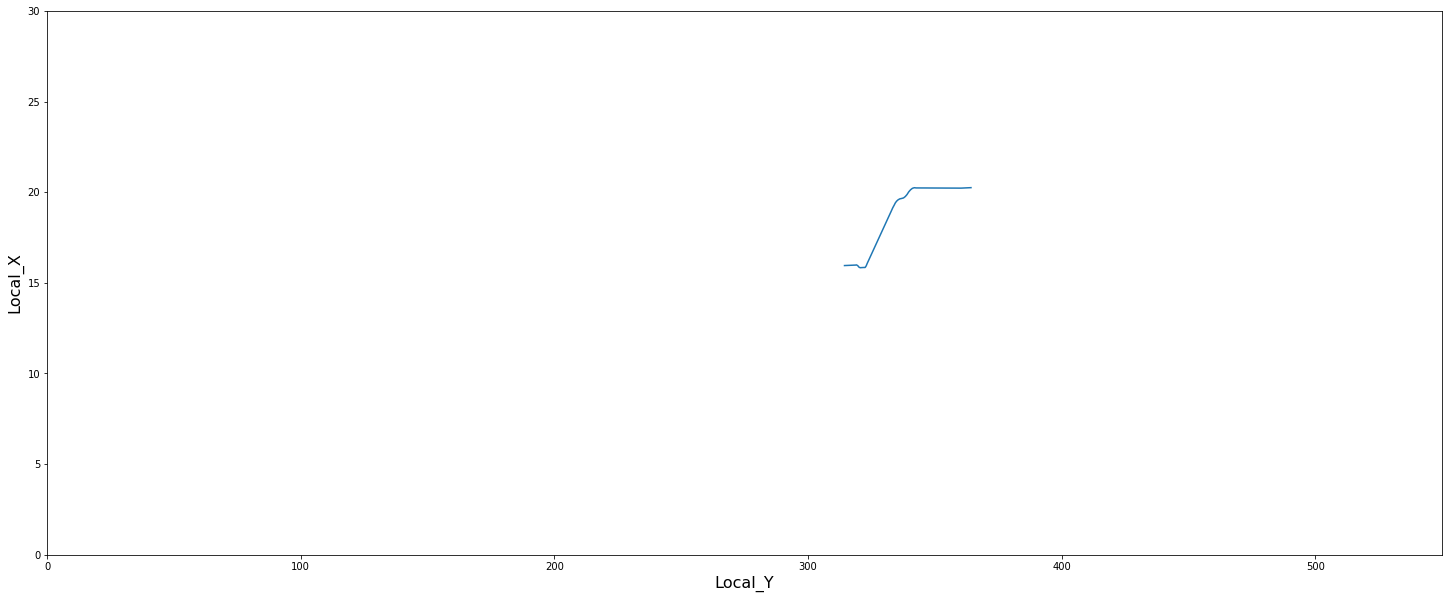

##########################################   87   ###############################################


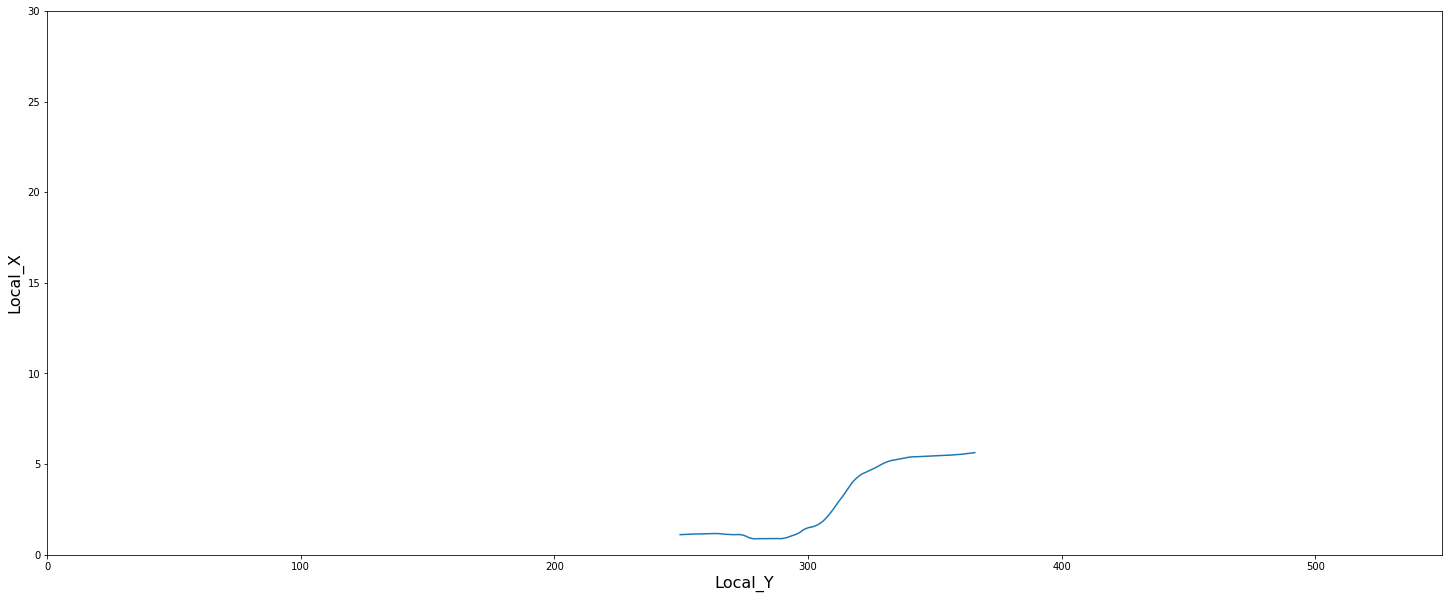

##########################################   88   ###############################################


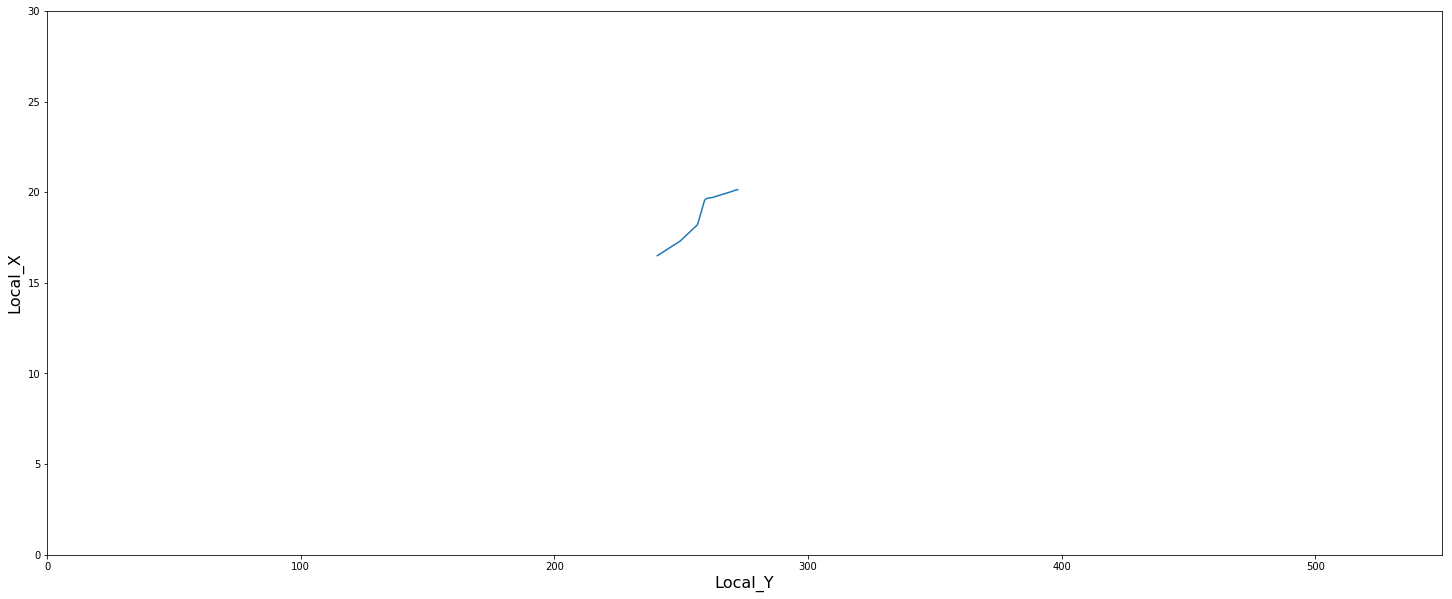

##########################################   89   ###############################################


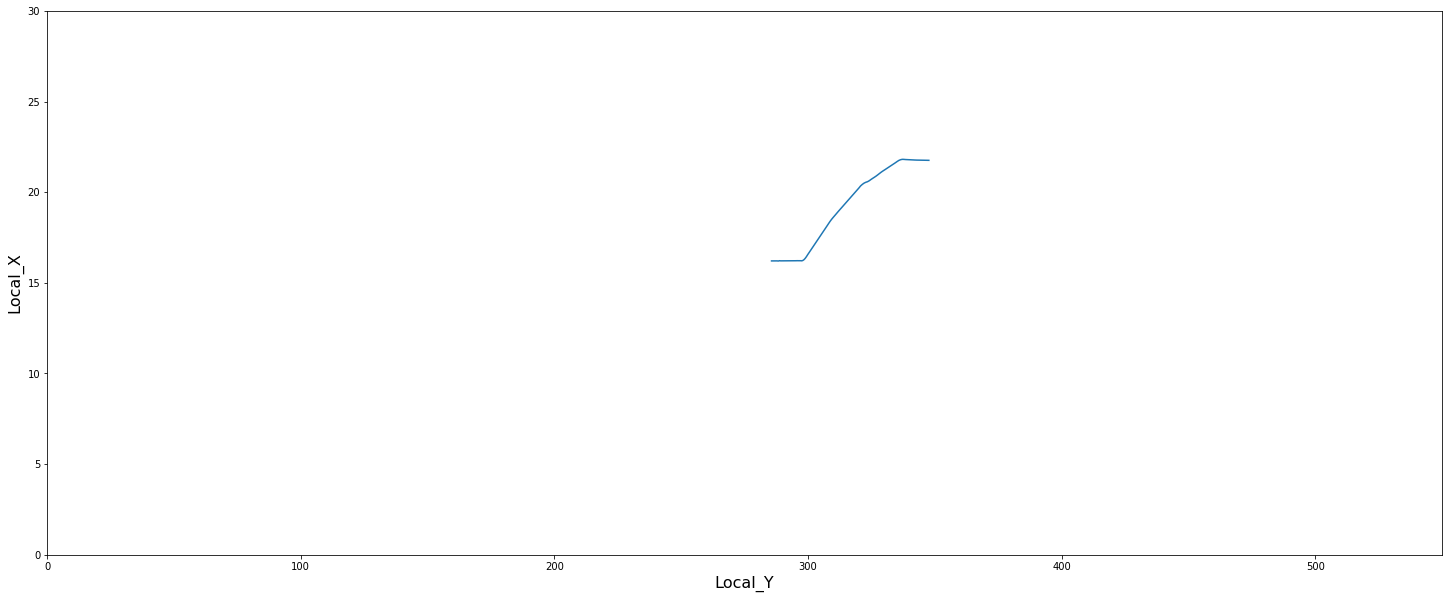

##########################################   90   ###############################################


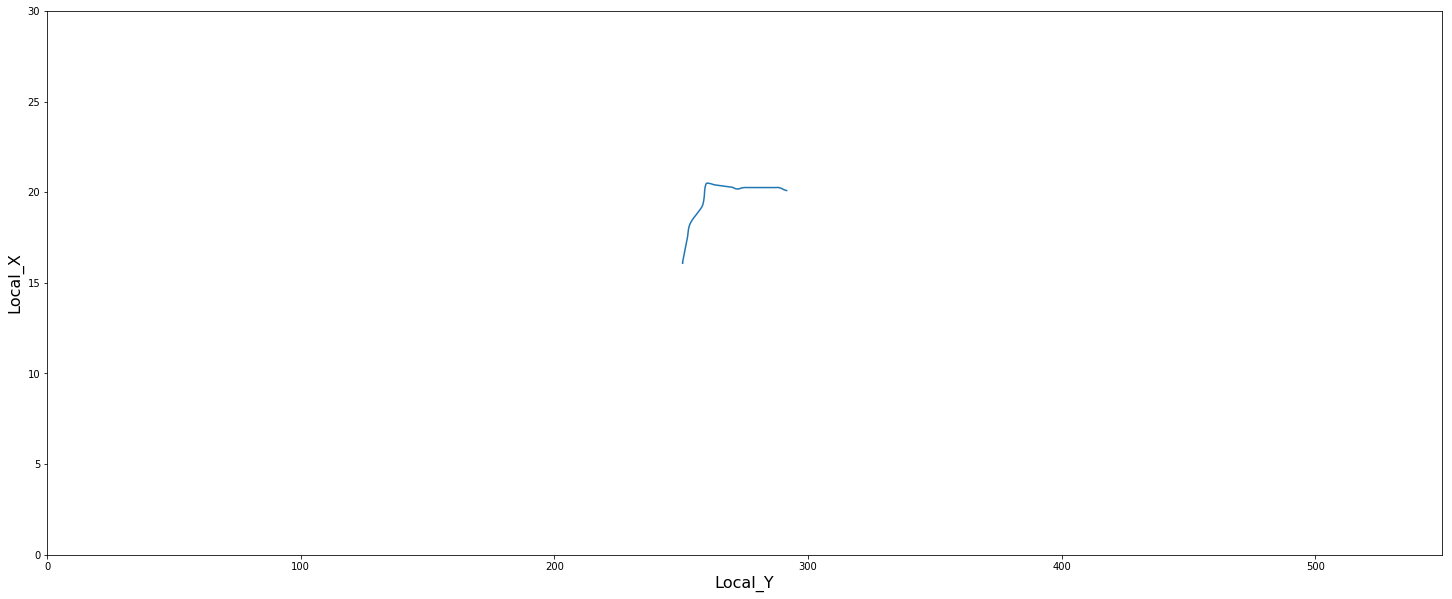

##########################################   91   ###############################################


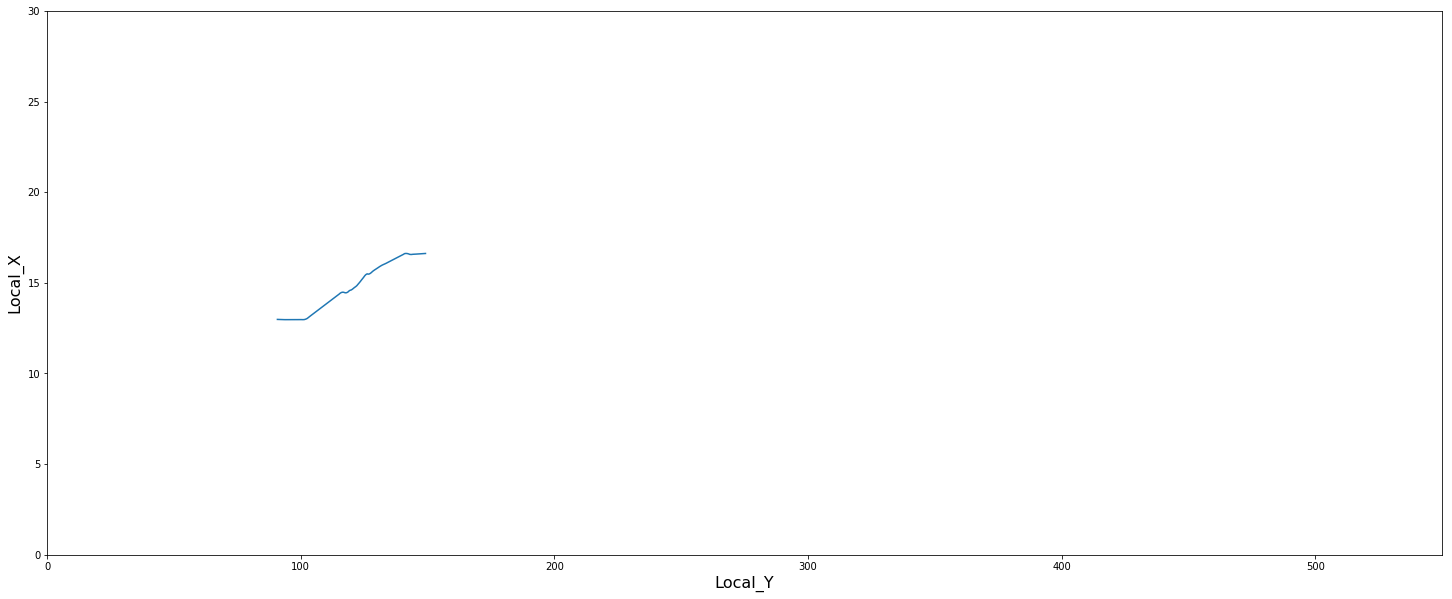

##########################################   92   ###############################################


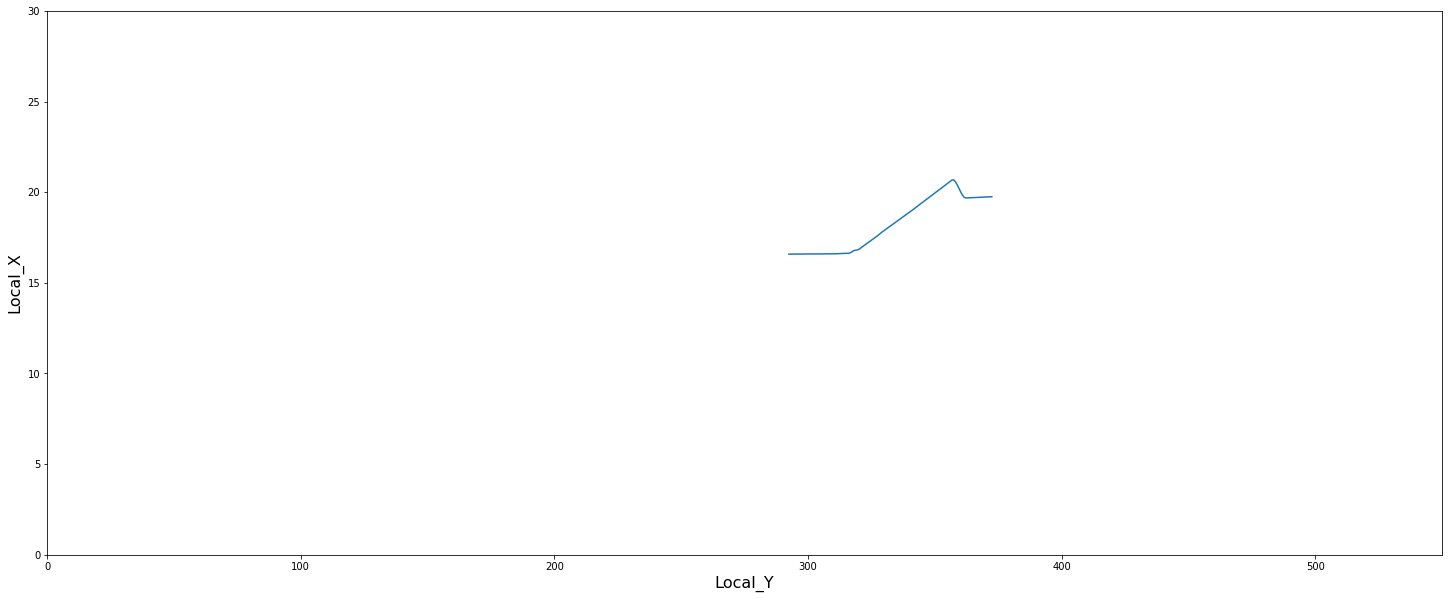

##########################################   93   ###############################################


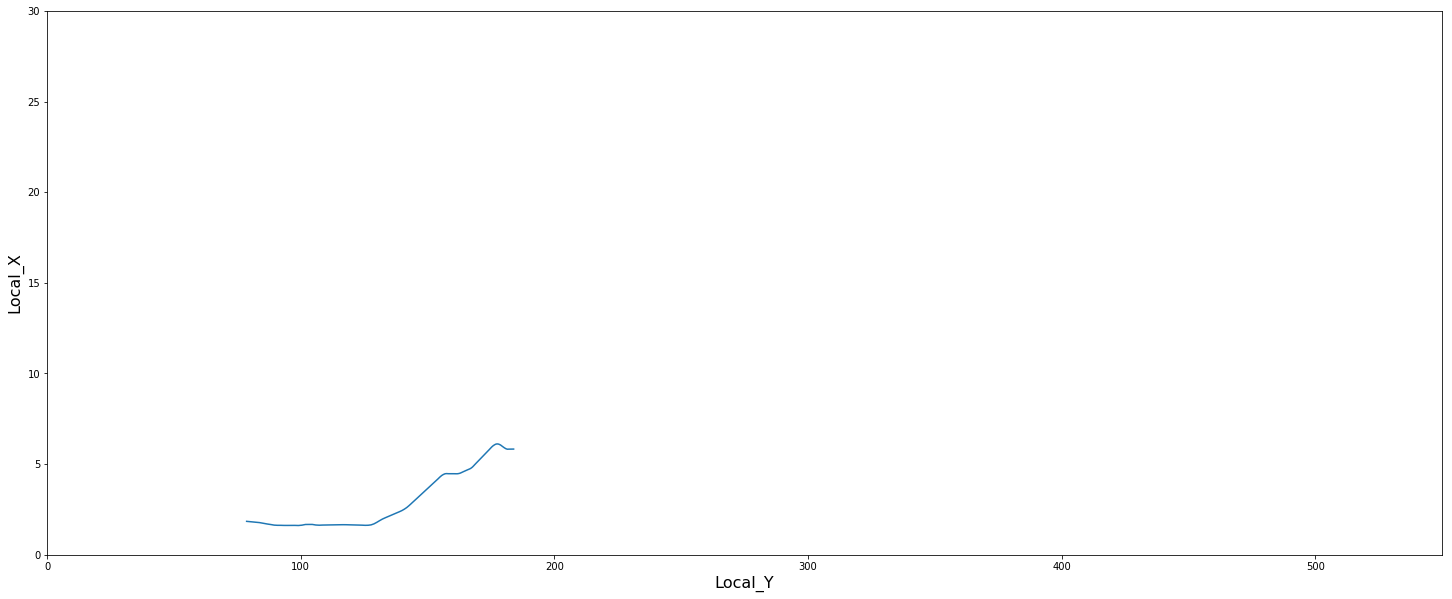

##########################################   94   ###############################################


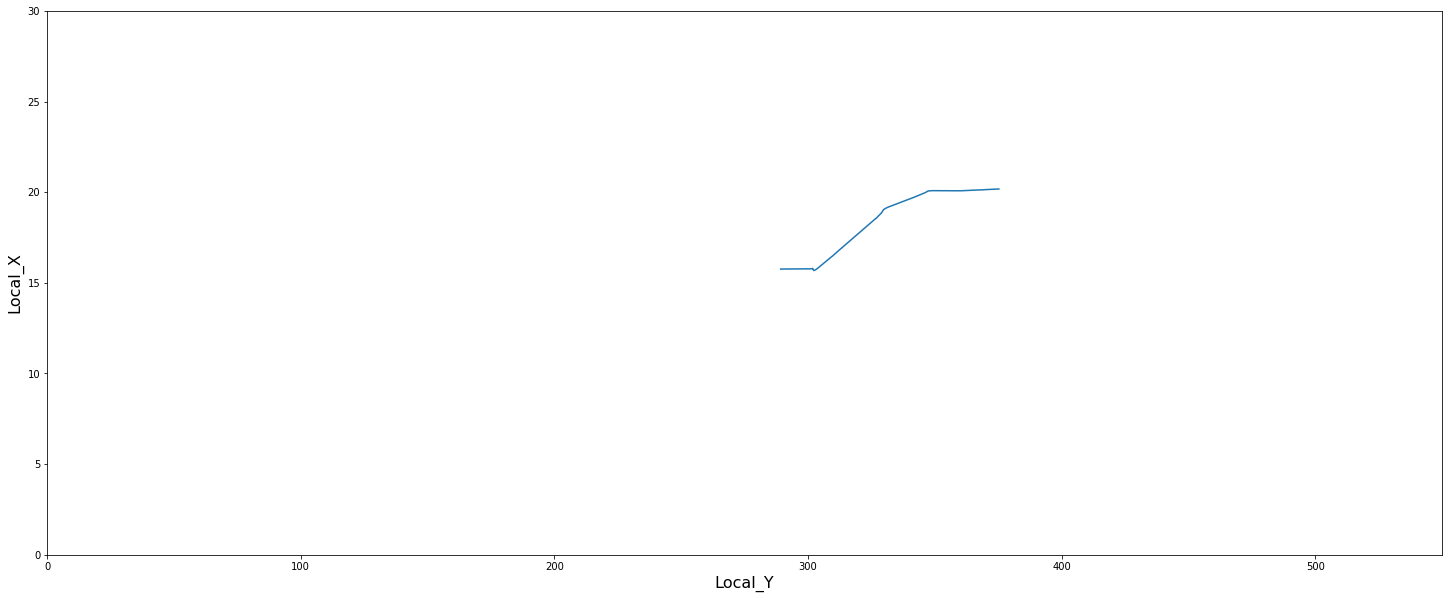

##########################################   95   ###############################################


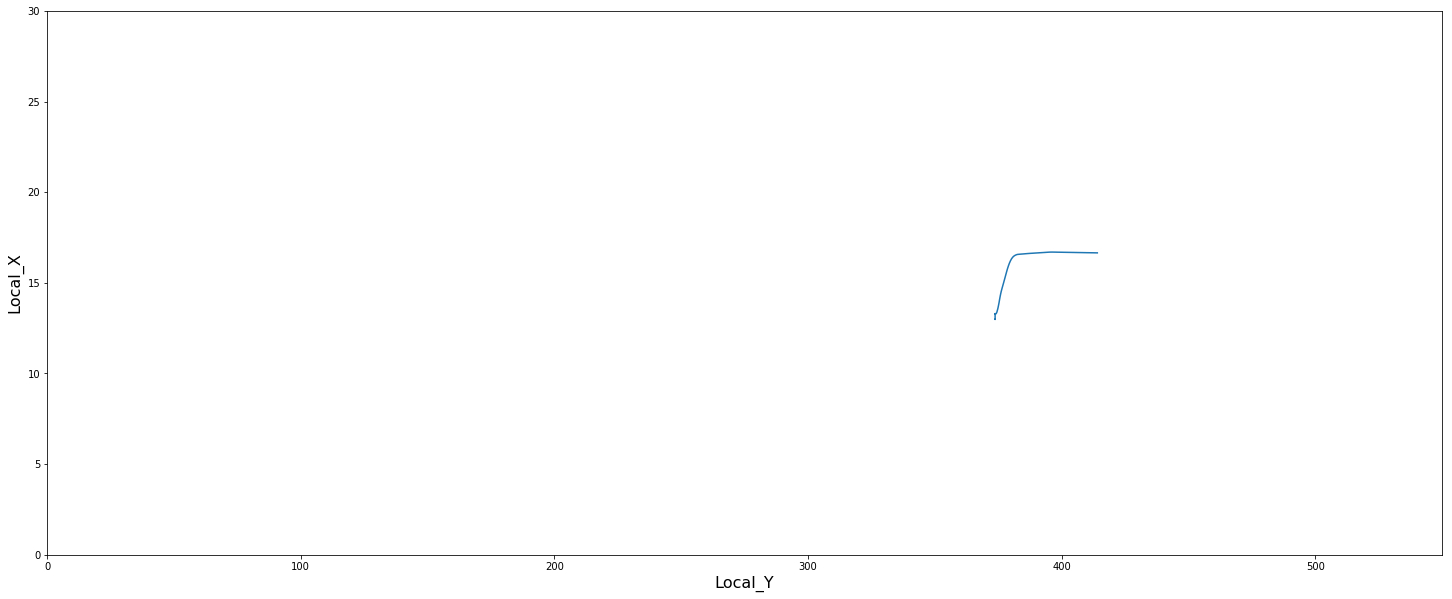

##########################################   96   ###############################################


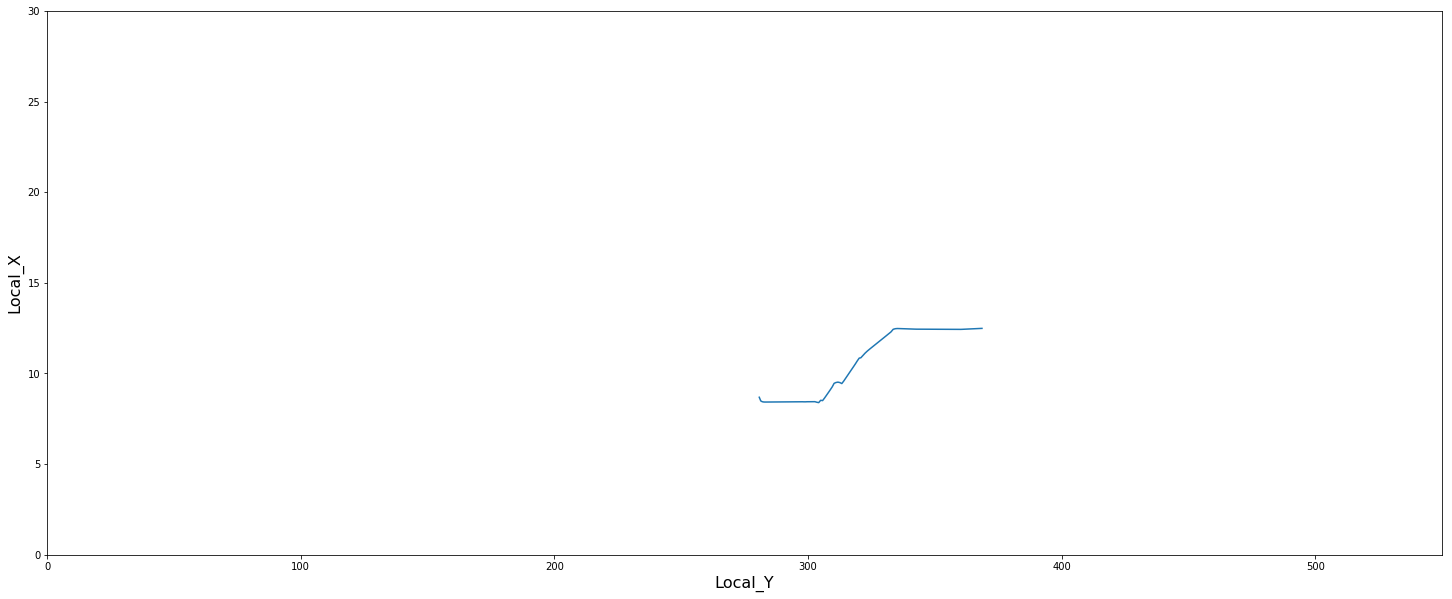

##########################################   97   ###############################################


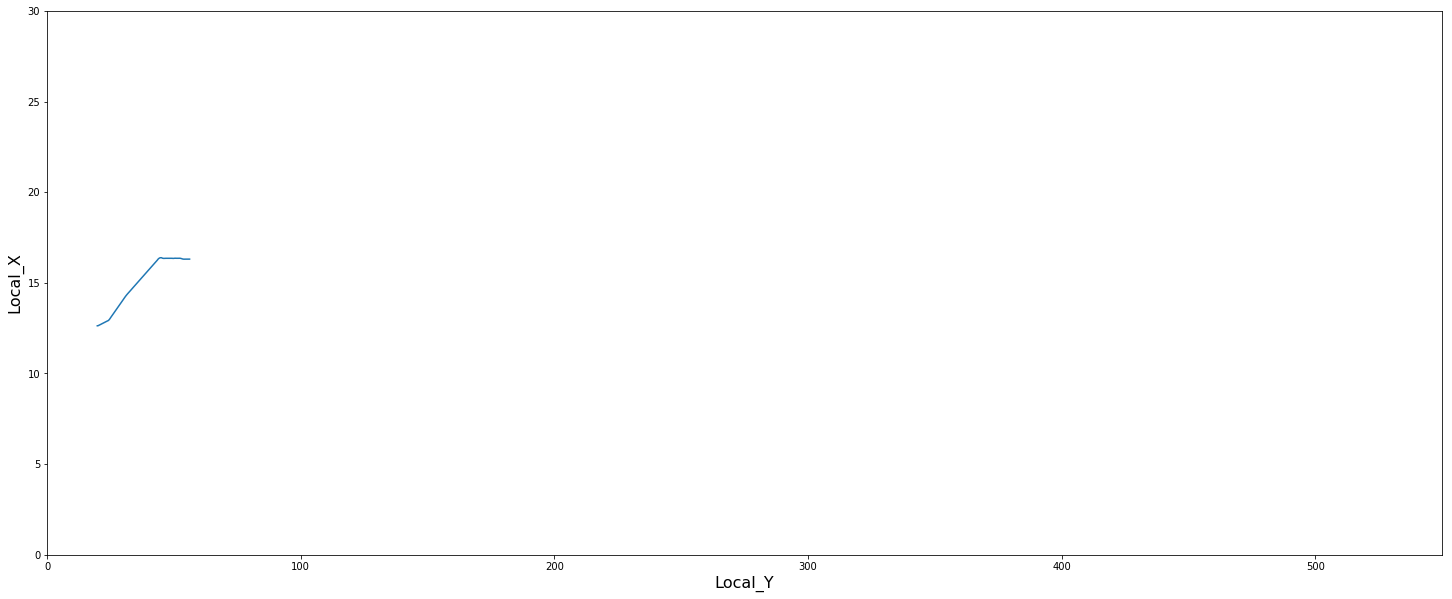

##########################################   98   ###############################################


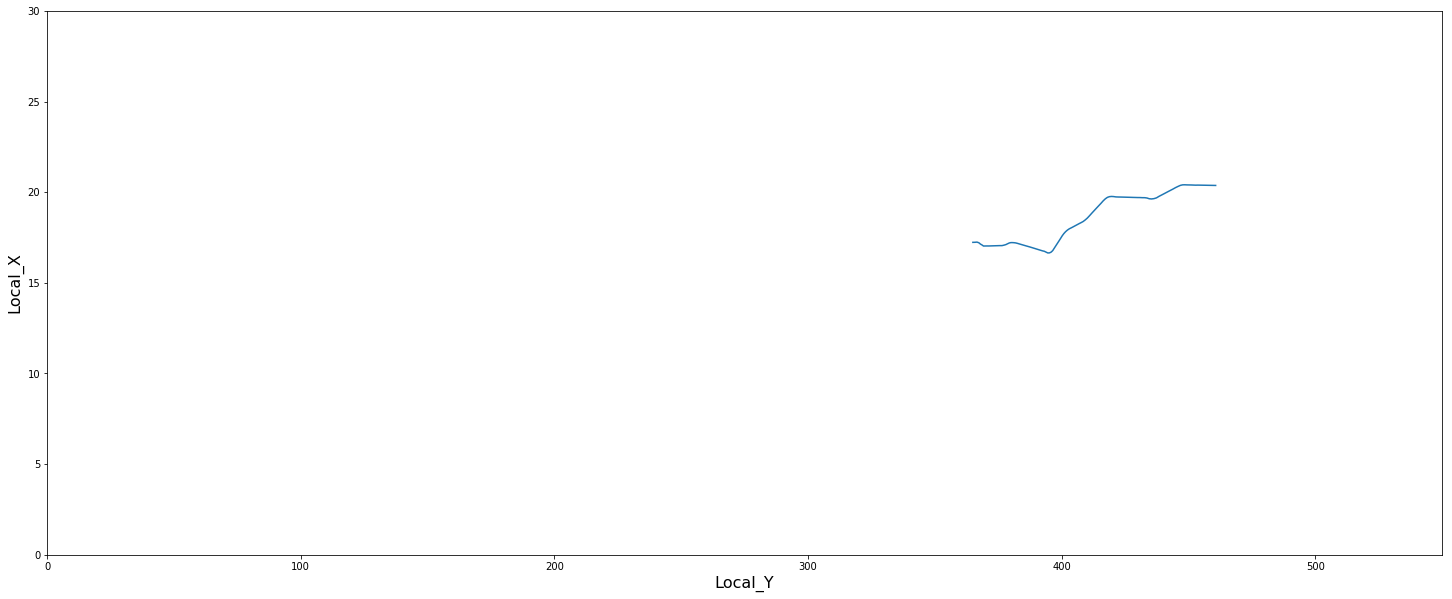

##########################################   99   ###############################################


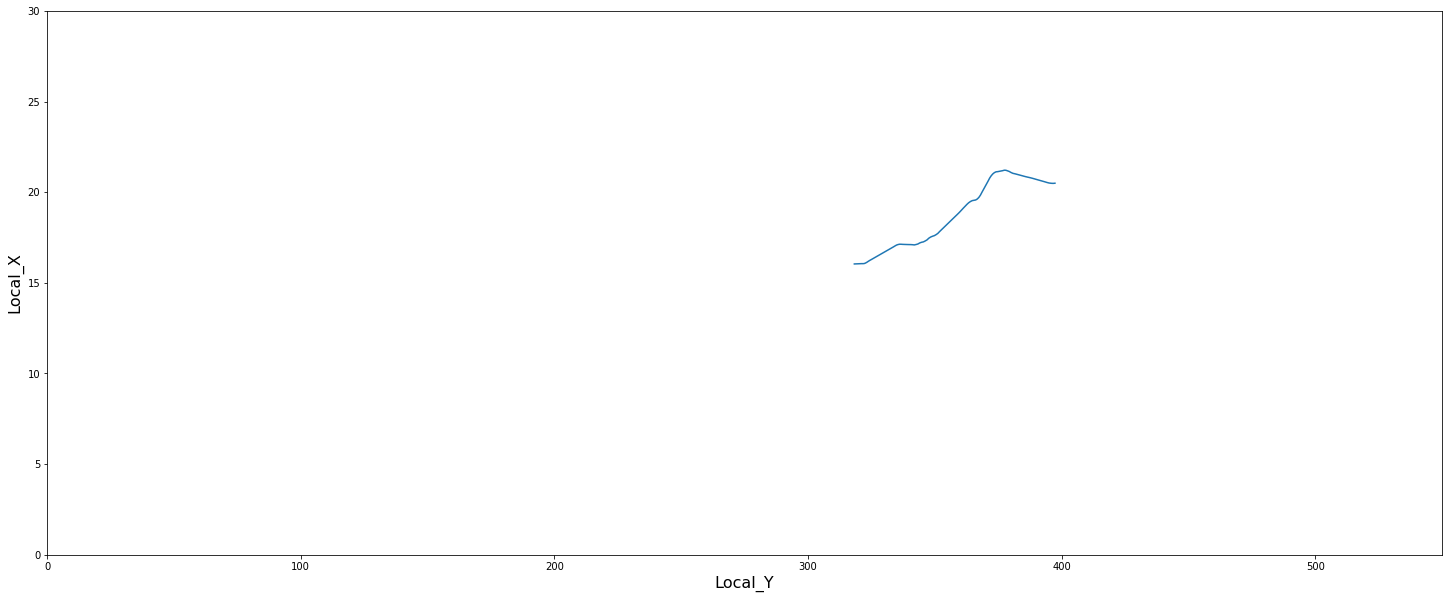

##########################################   100   ###############################################


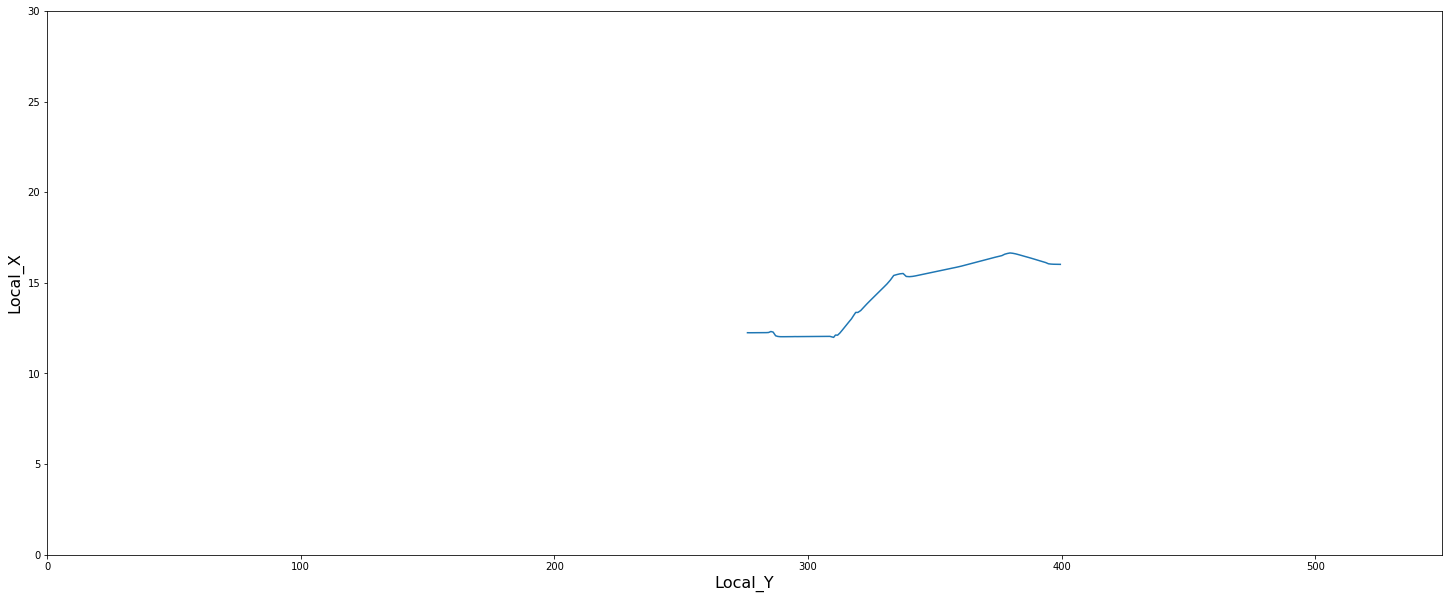

##########################################   101   ###############################################


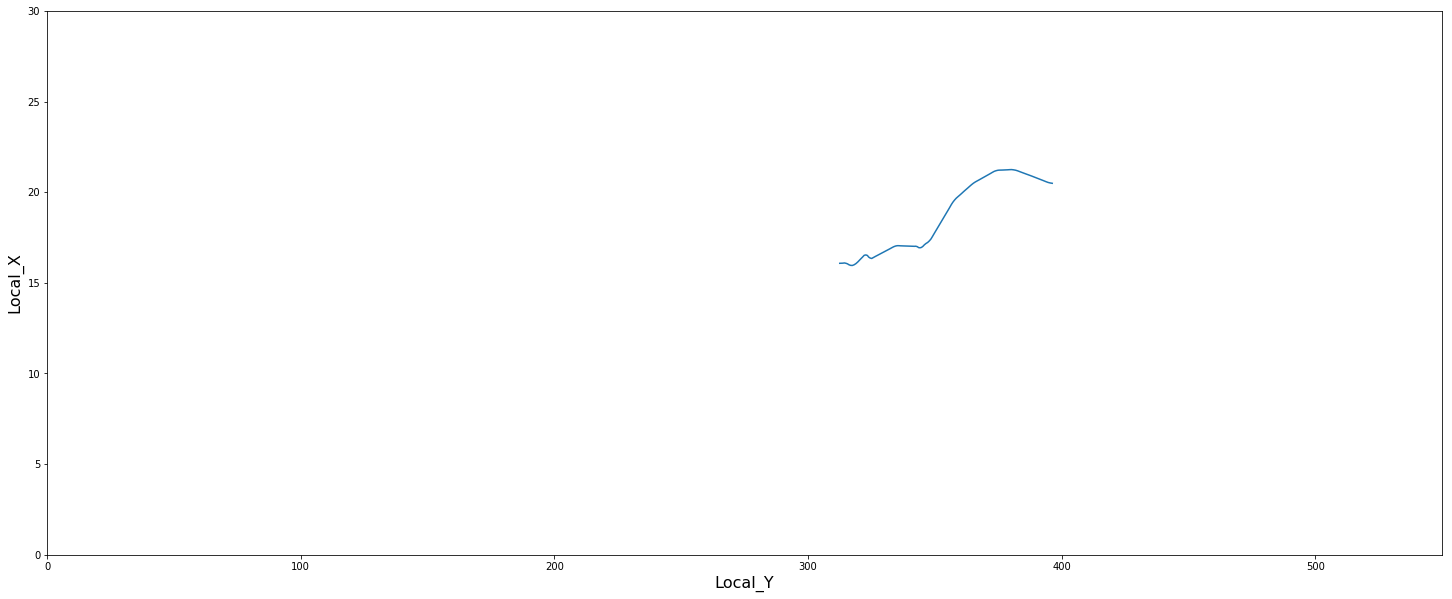

##########################################   102   ###############################################


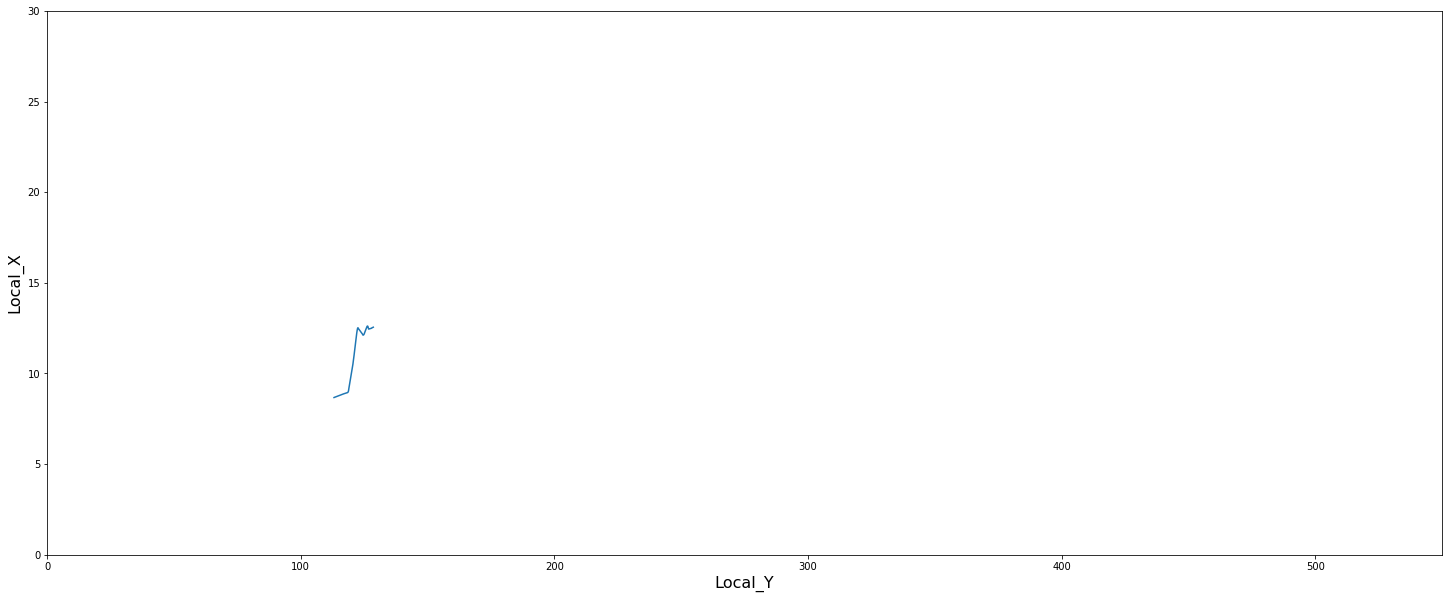

##########################################   103   ###############################################


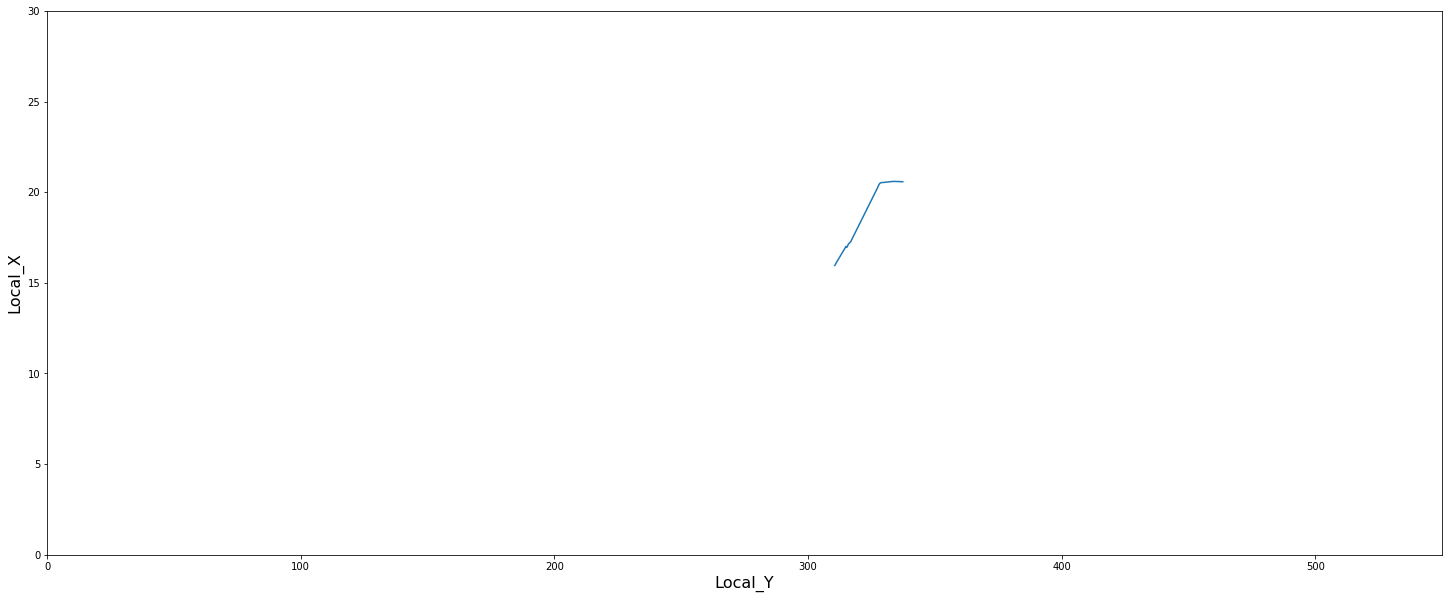

##########################################   104   ###############################################


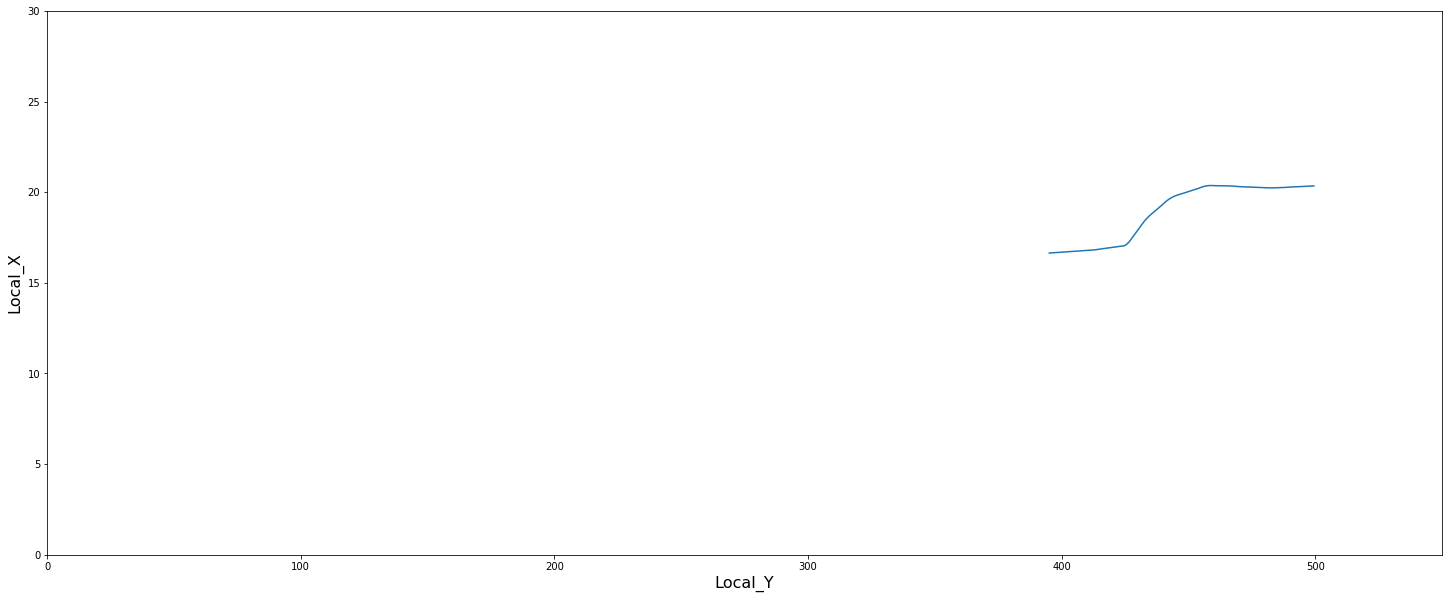

##########################################   105   ###############################################


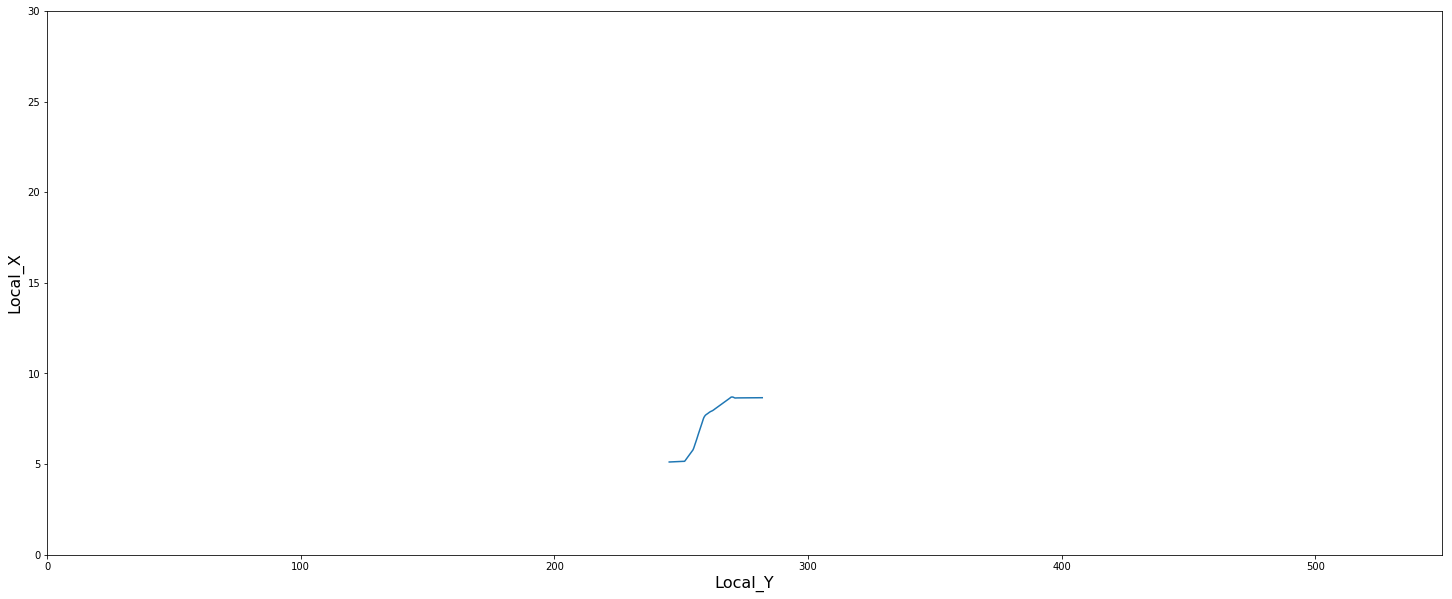

##########################################   106   ###############################################


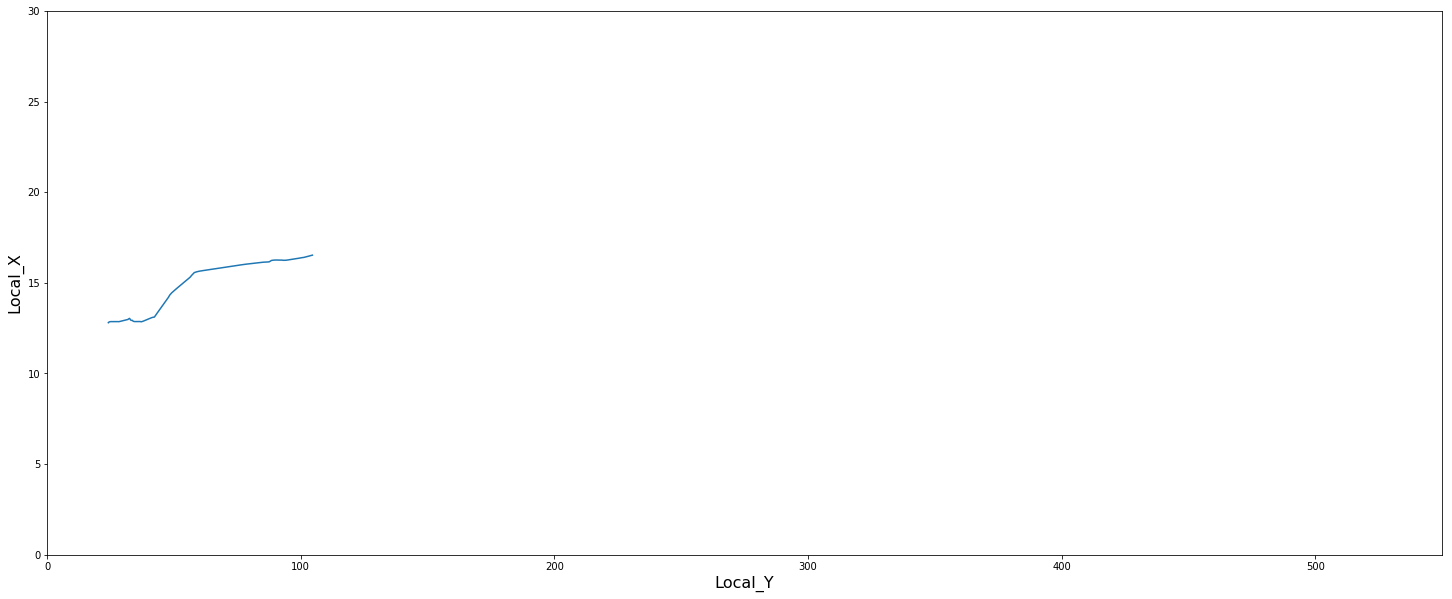

##########################################   107   ###############################################


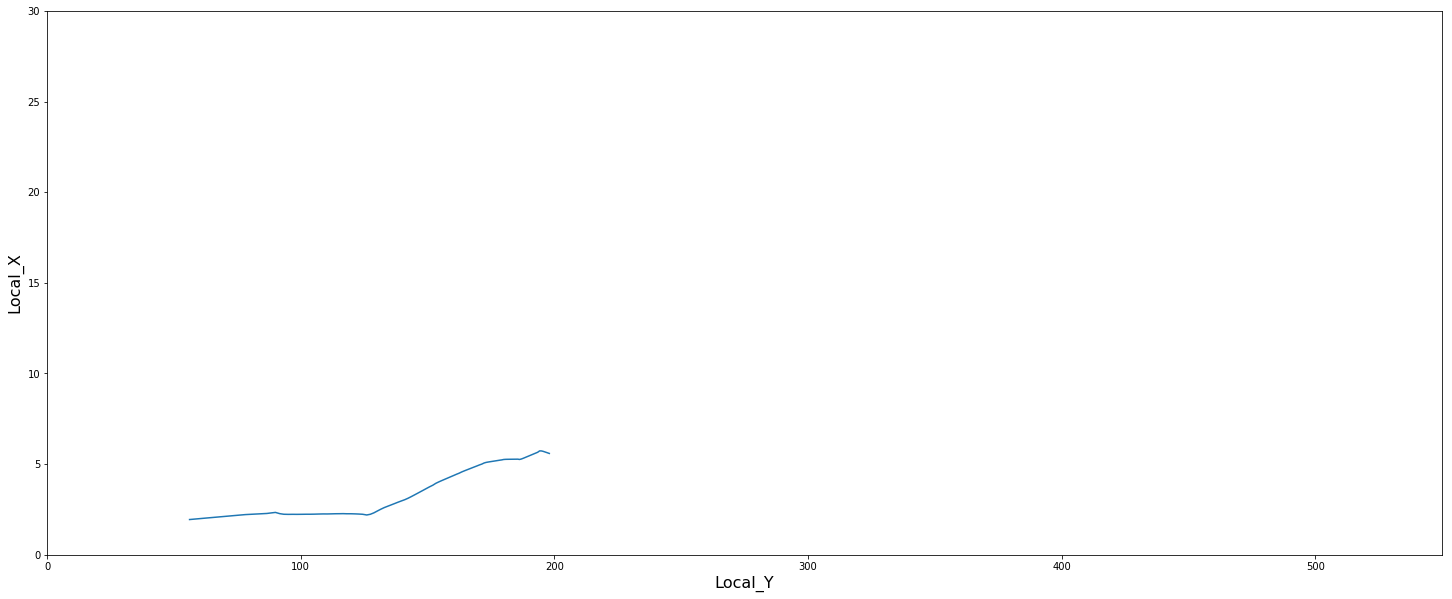

##########################################   108   ###############################################


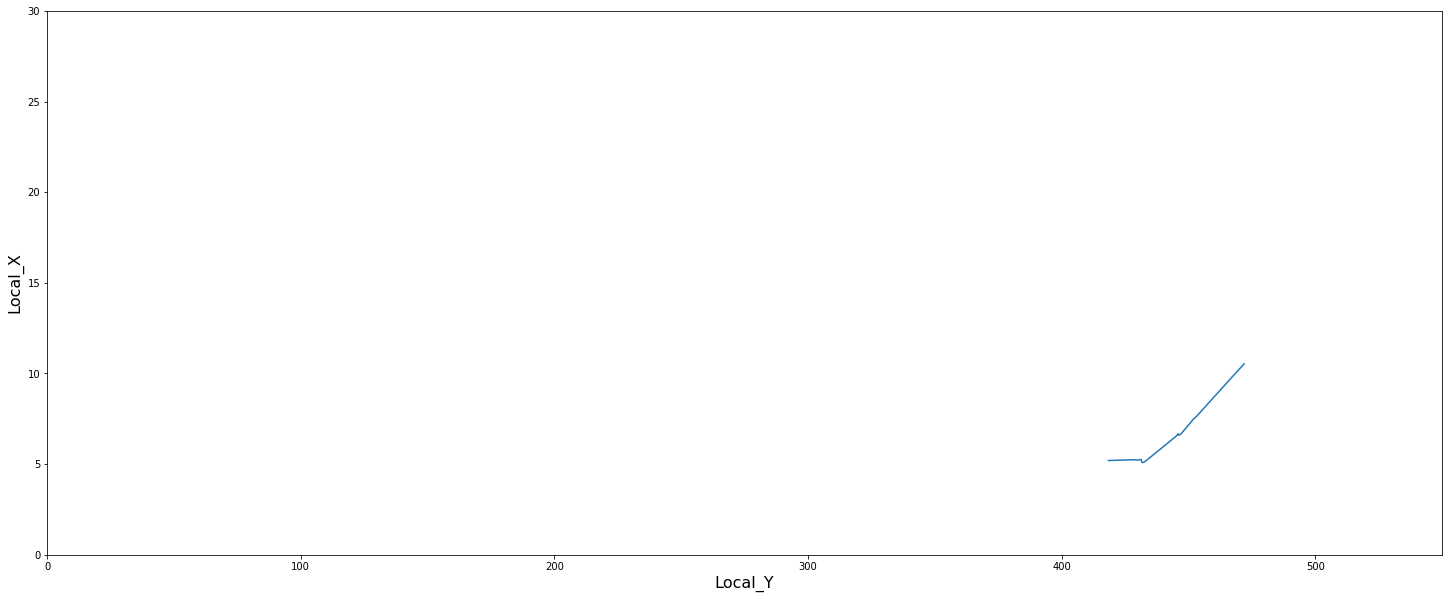

##########################################   109   ###############################################


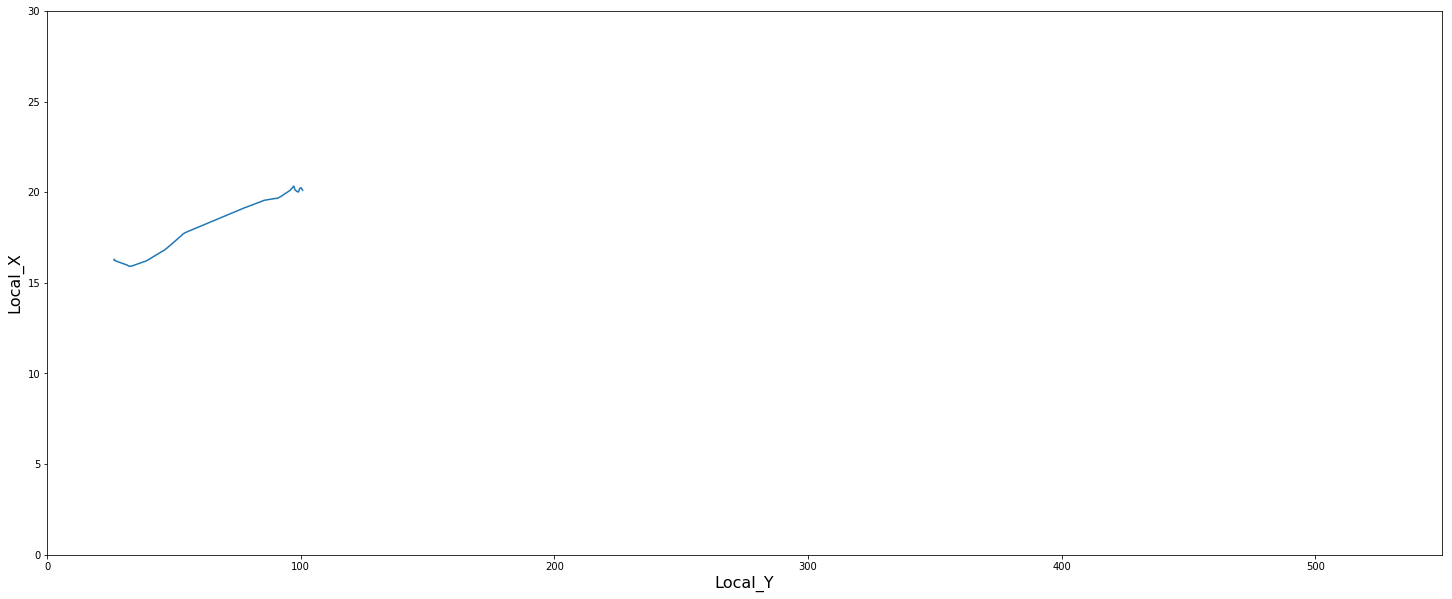

##########################################   110   ###############################################


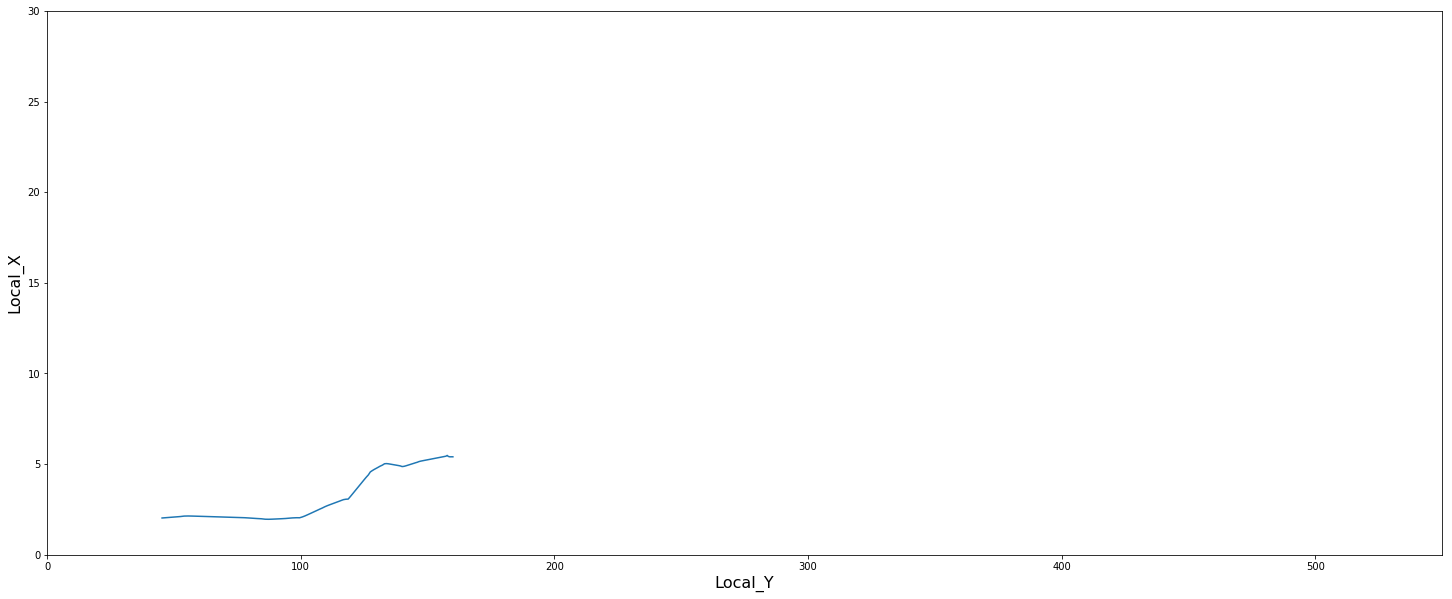

##########################################   111   ###############################################


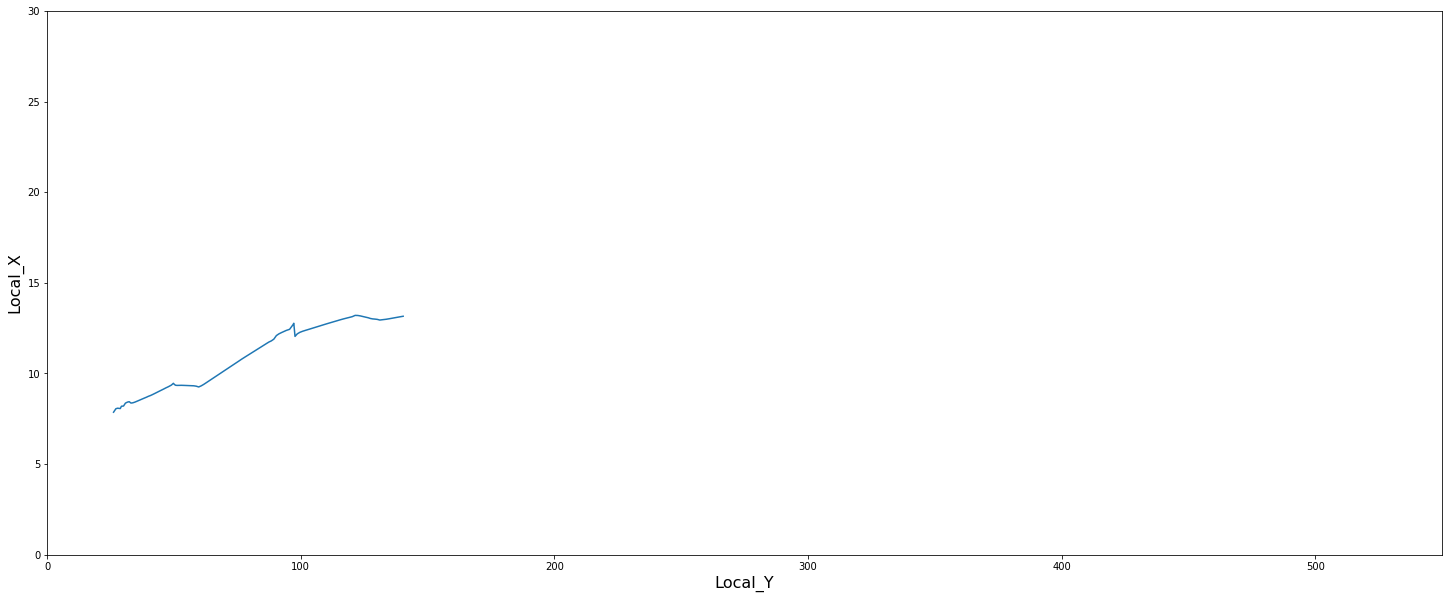

##########################################   112   ###############################################


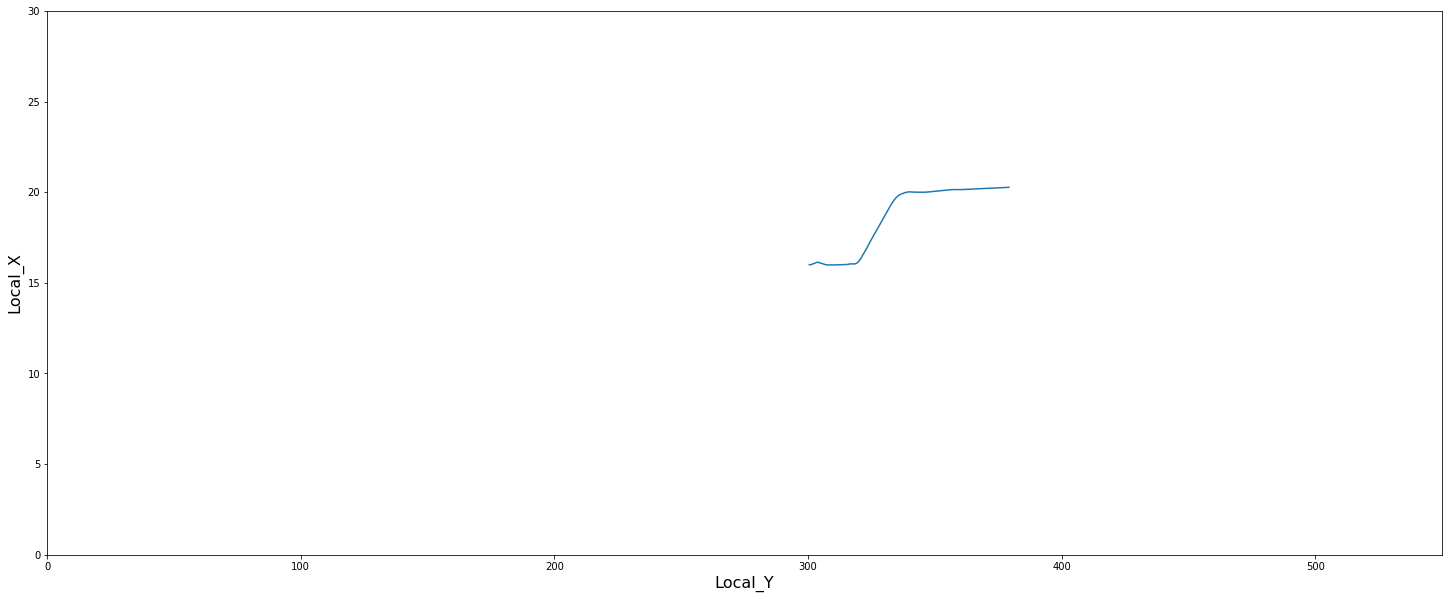

##########################################   113   ###############################################


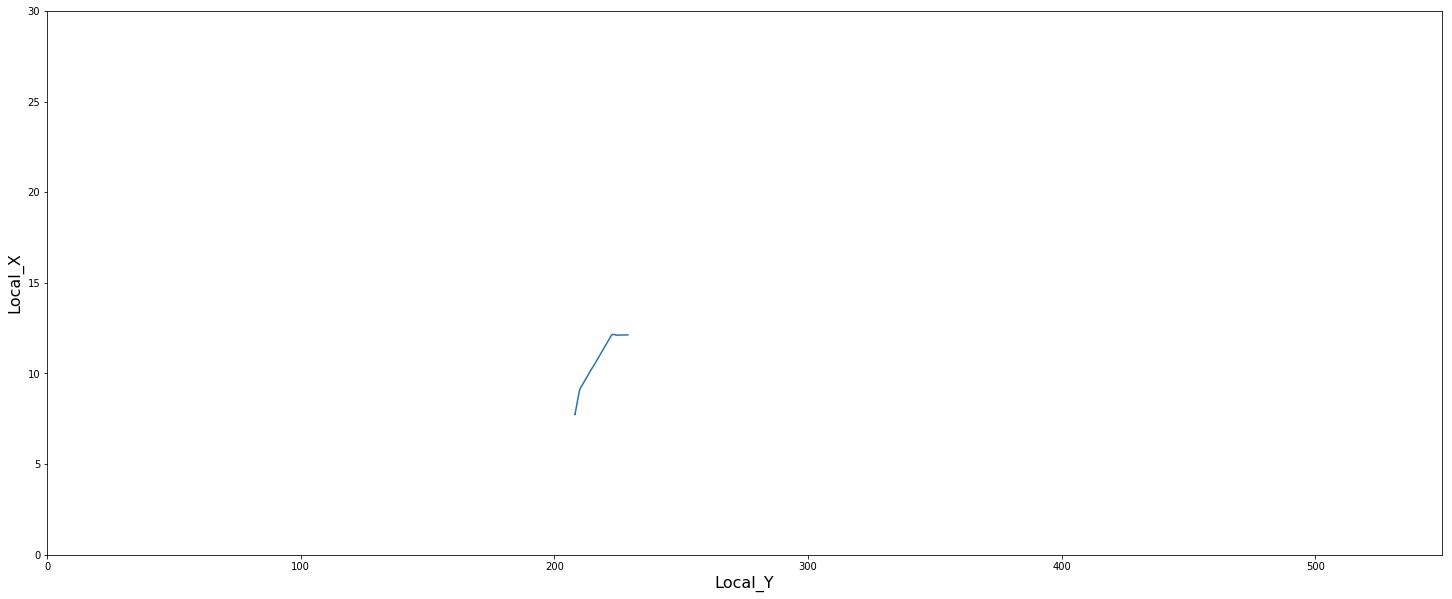

##########################################   114   ###############################################


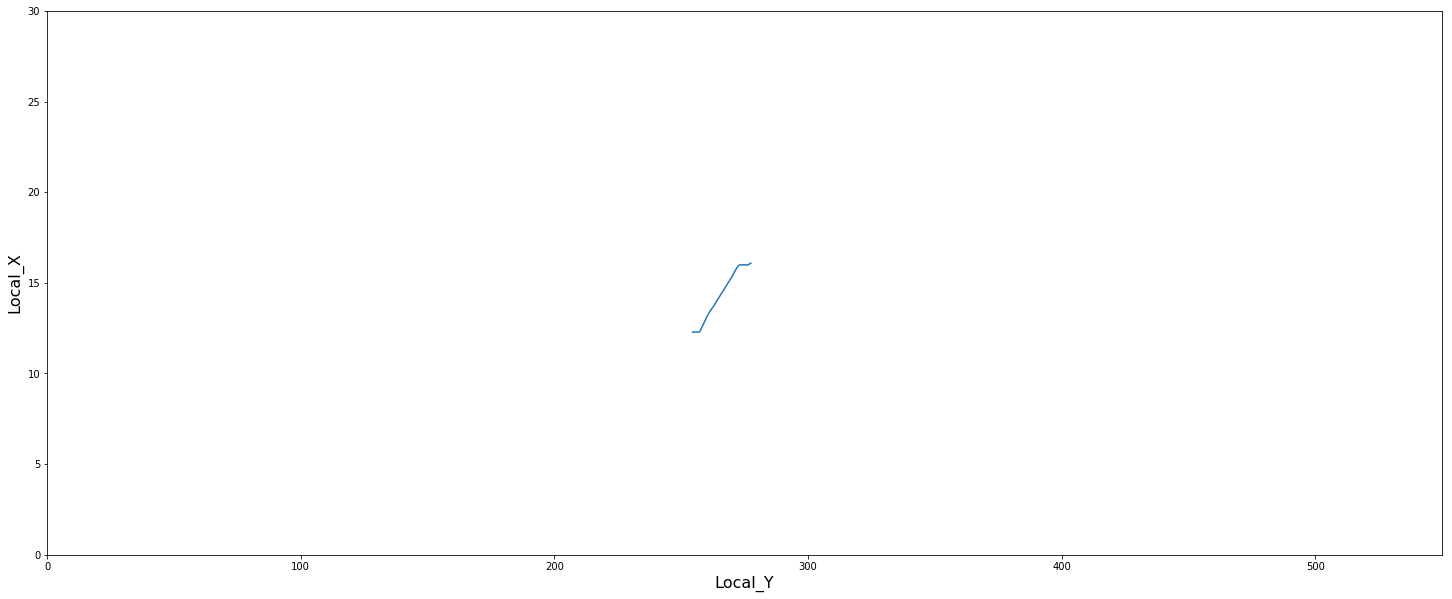

##########################################   115   ###############################################


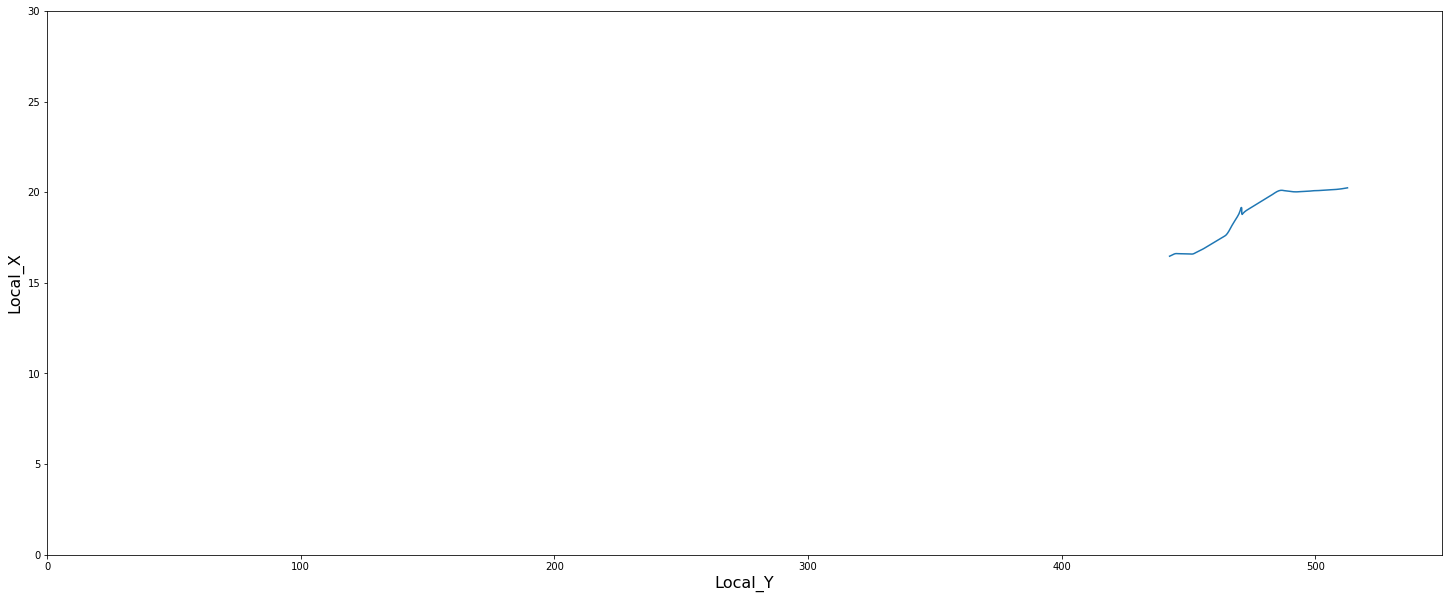

##########################################   116   ###############################################


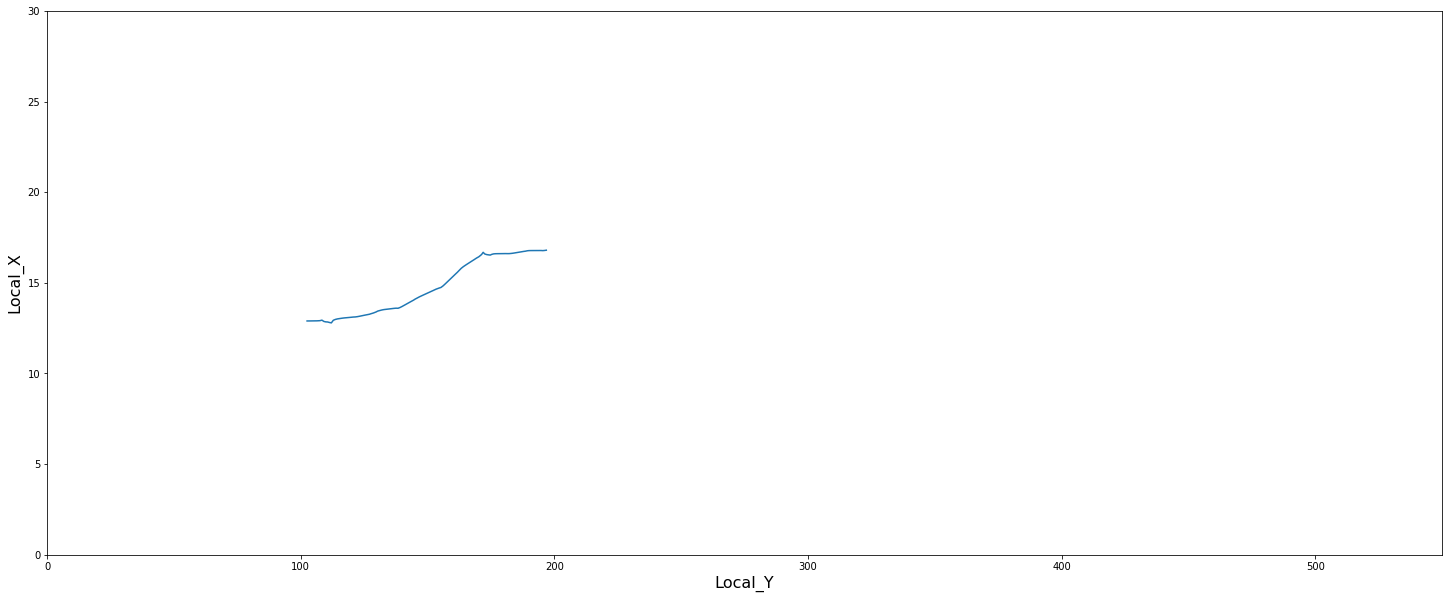

##########################################   117   ###############################################


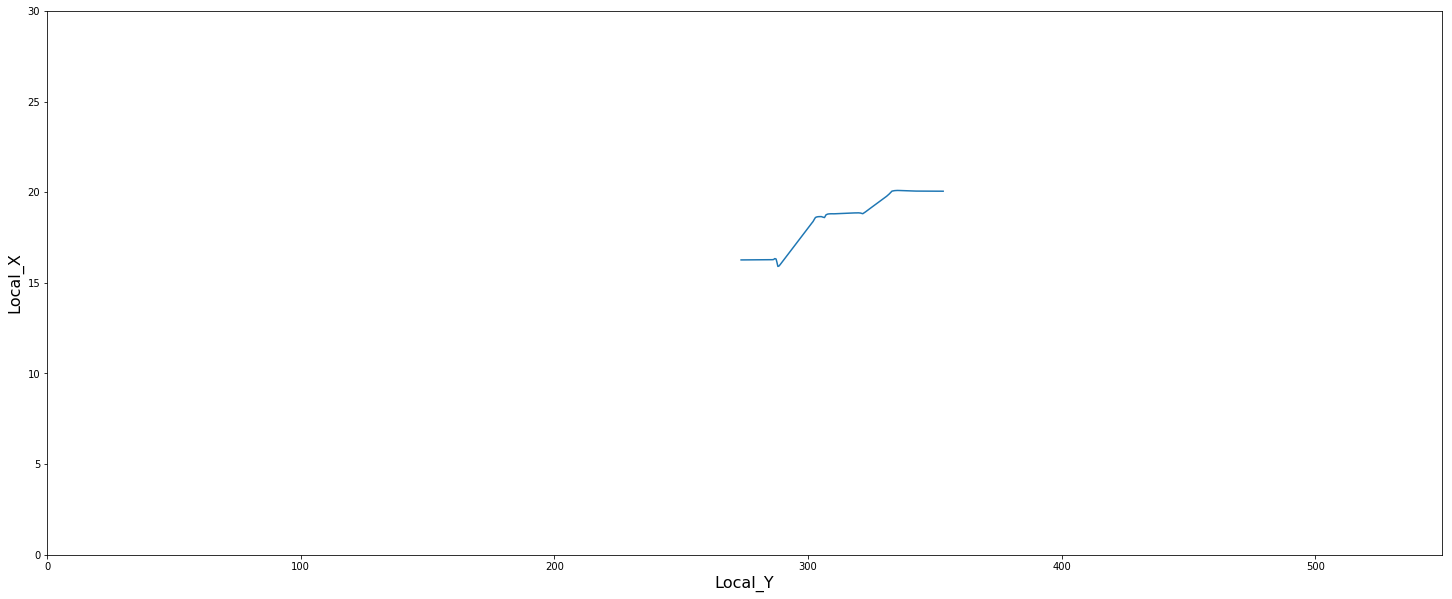

##########################################   118   ###############################################


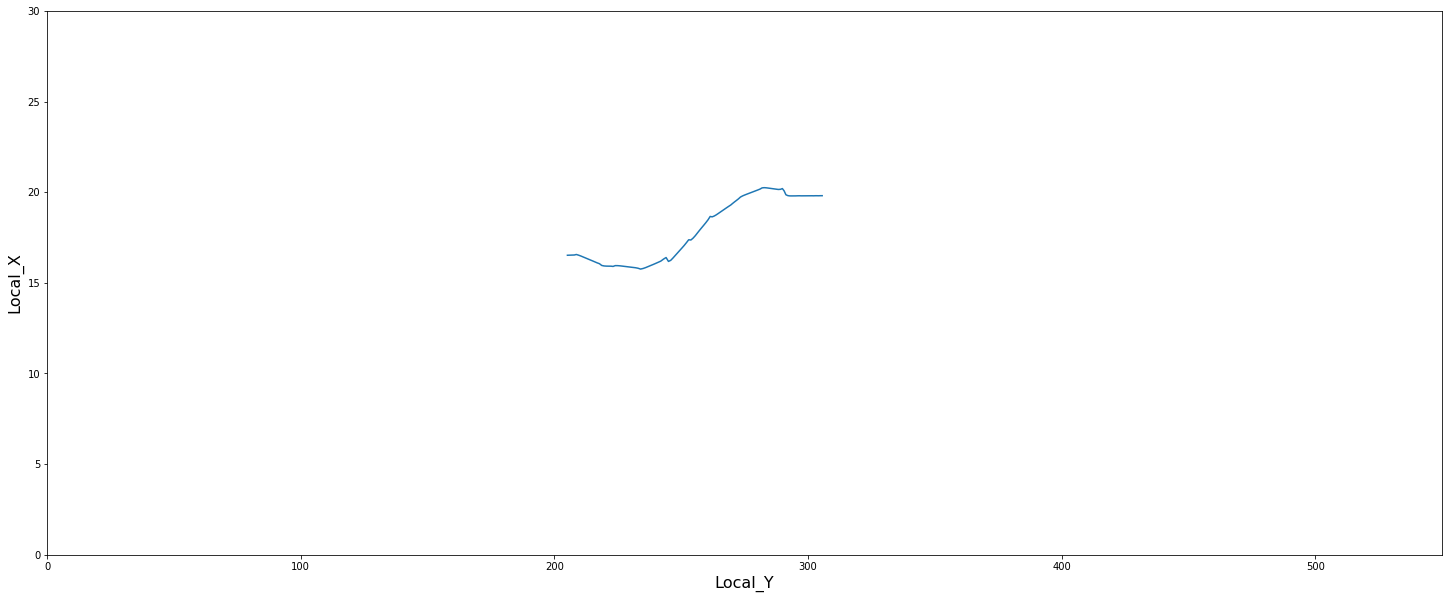

##########################################   119   ###############################################


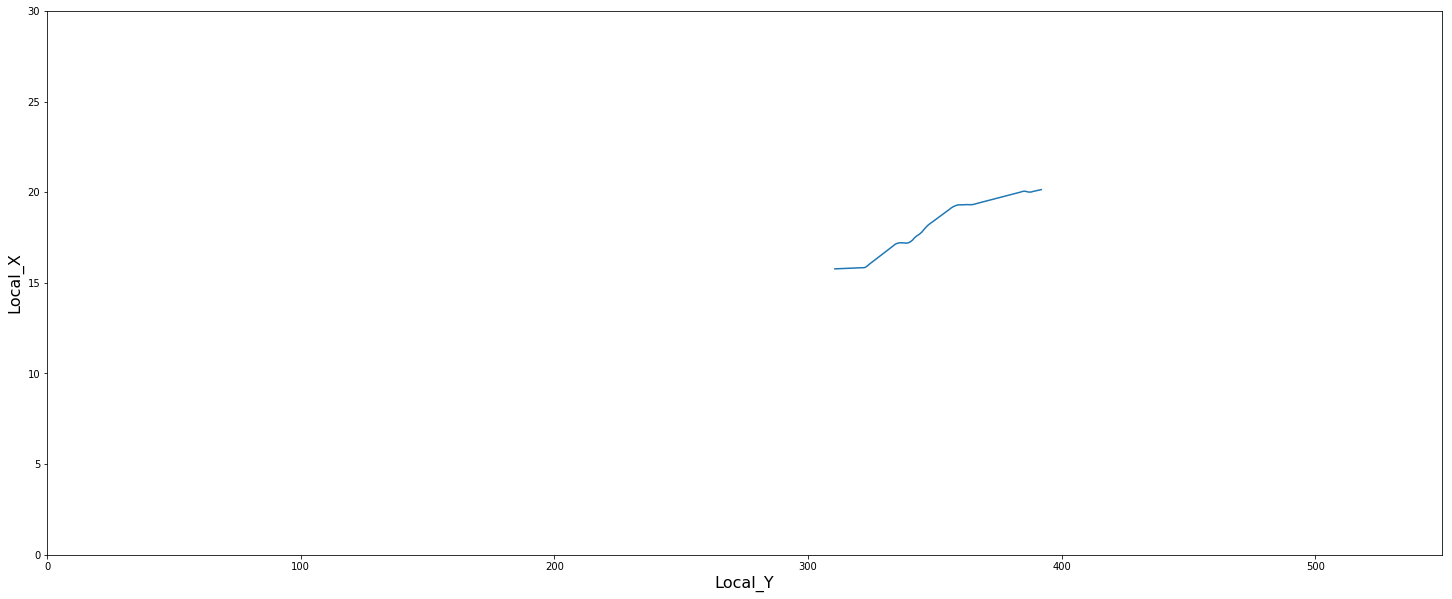

##########################################   120   ###############################################


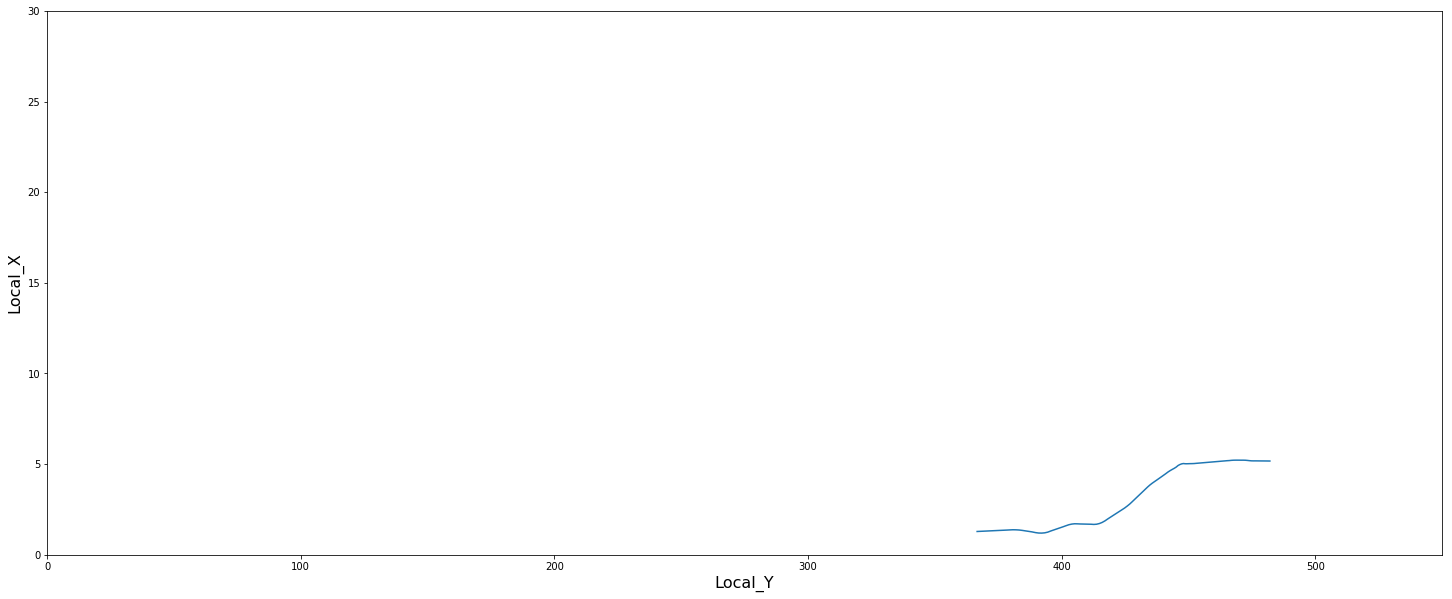

##########################################   121   ###############################################


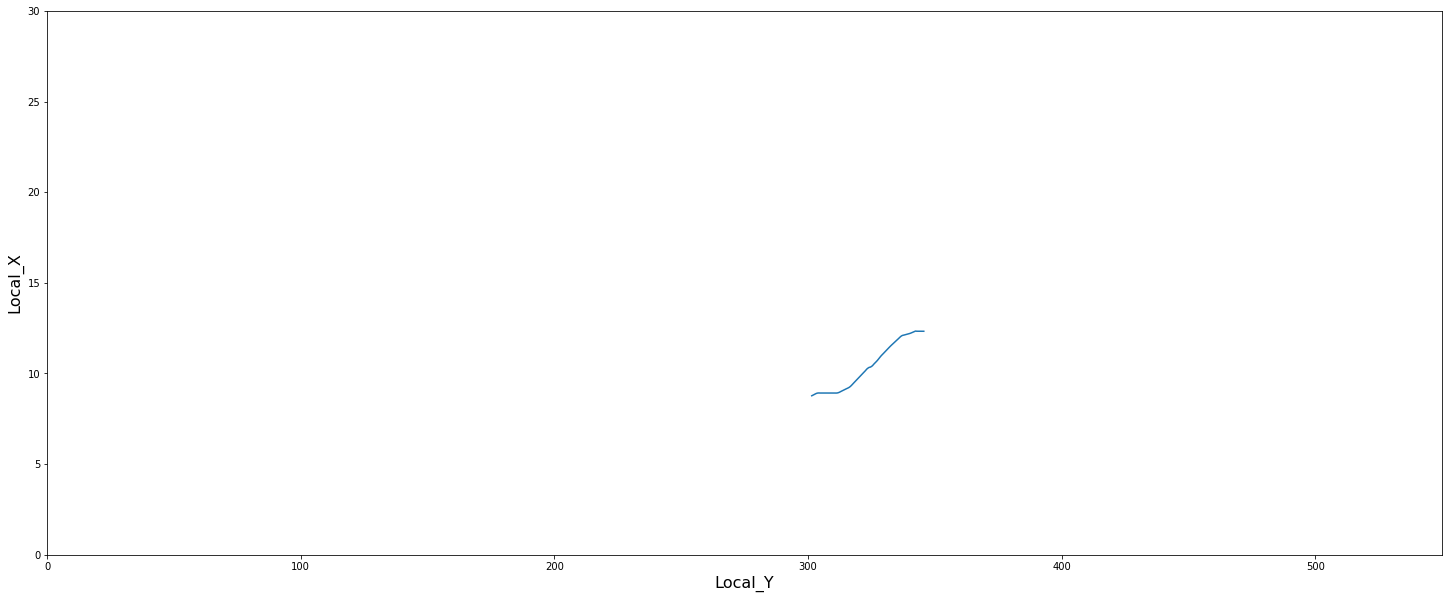

##########################################   122   ###############################################


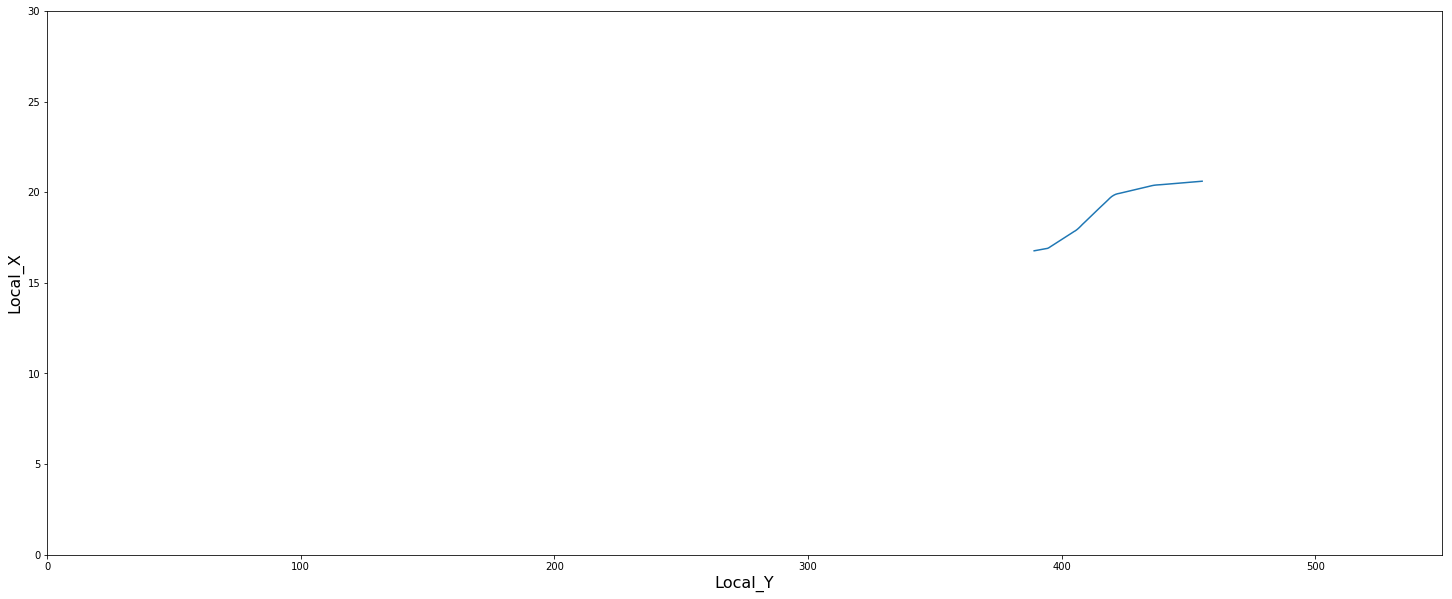

##########################################   123   ###############################################


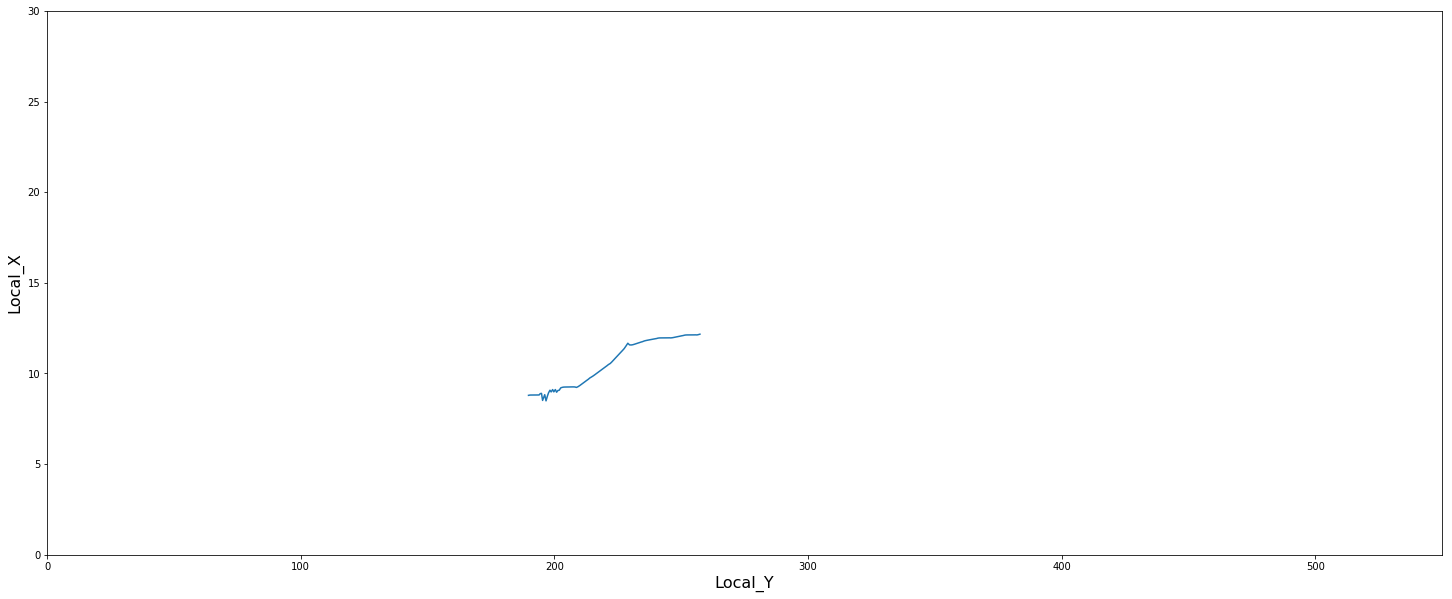

##########################################   124   ###############################################


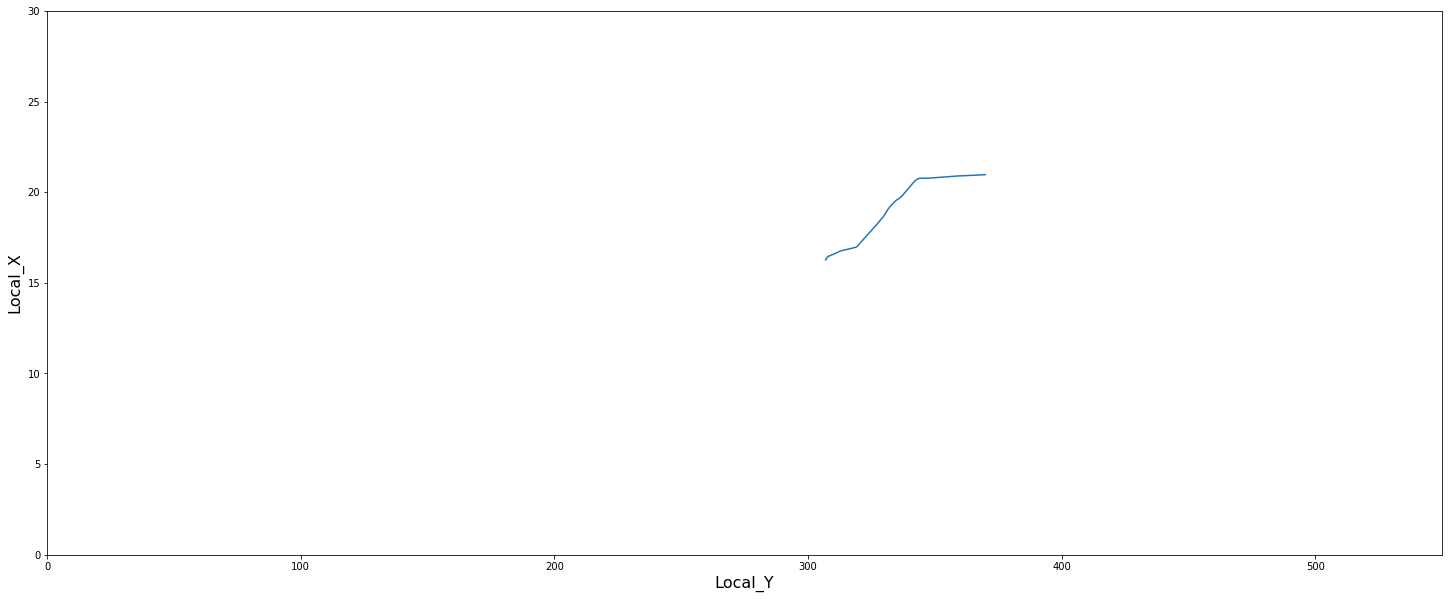

##########################################   125   ###############################################


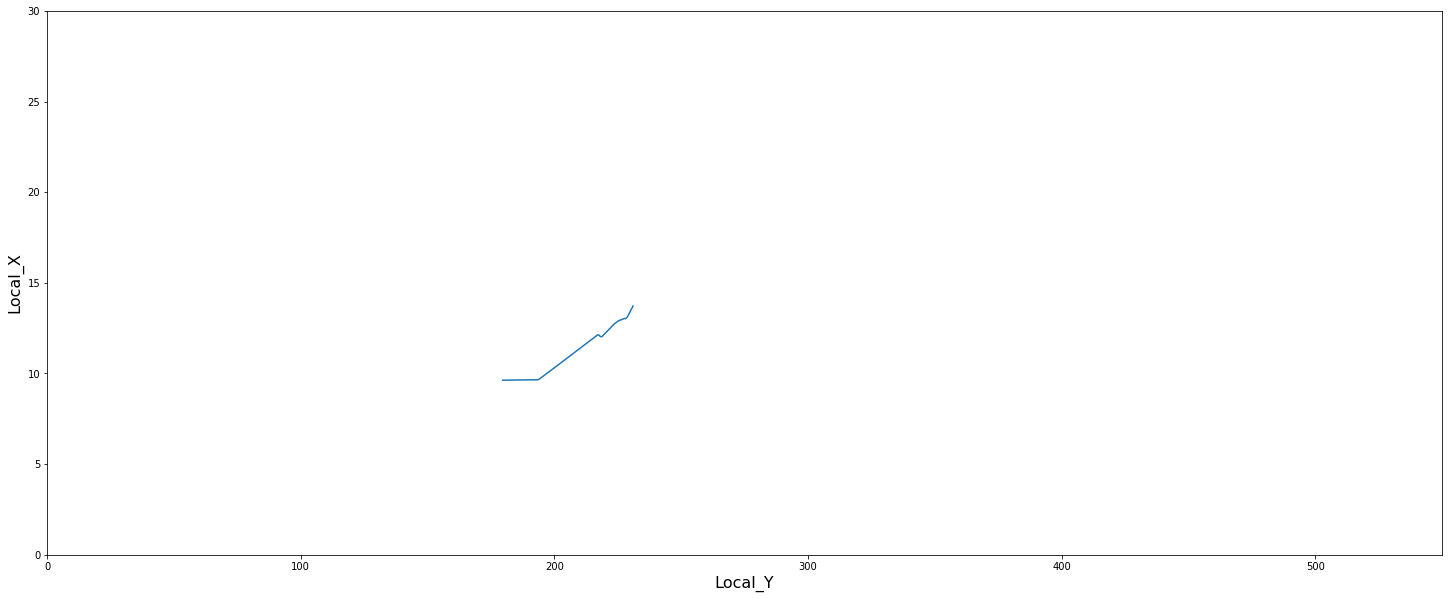

##########################################   126   ###############################################


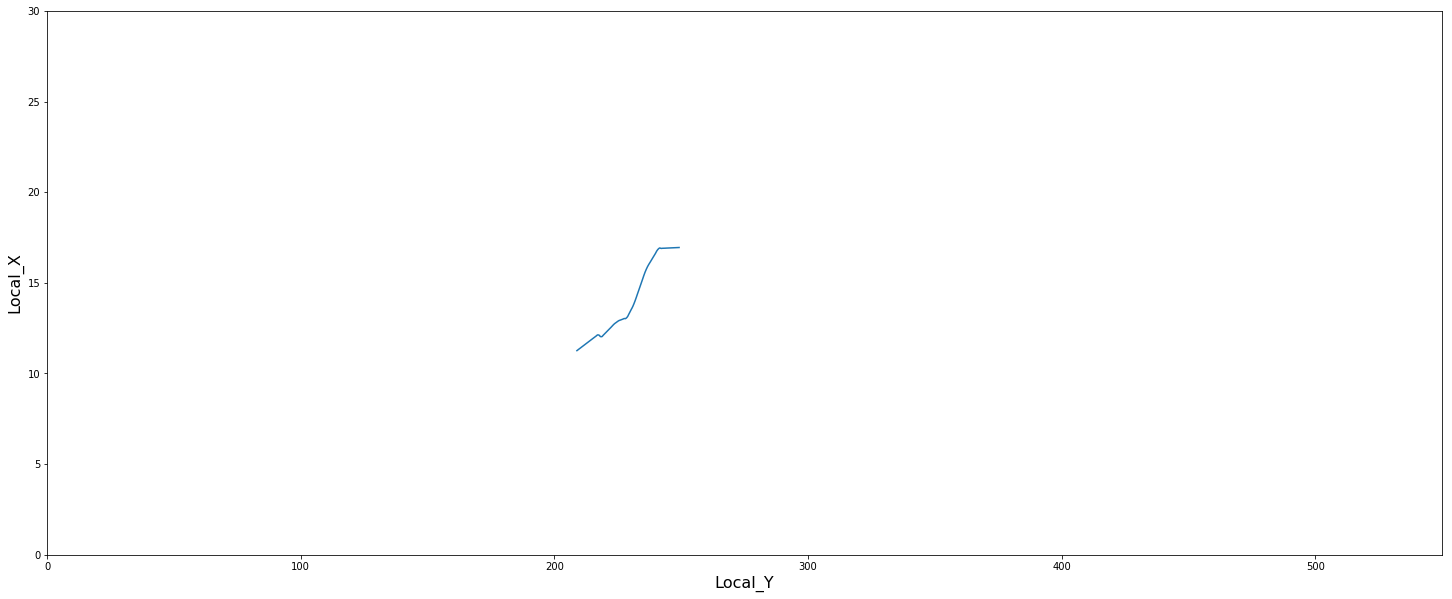

##########################################   127   ###############################################


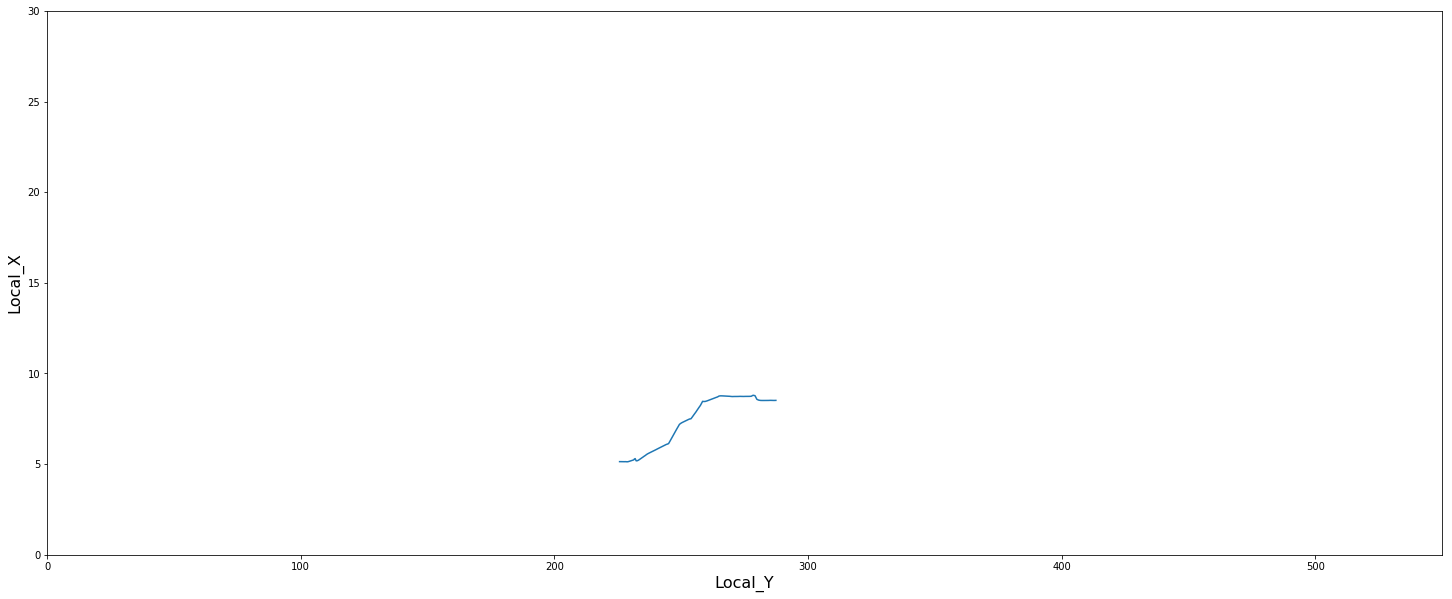

##########################################   128   ###############################################


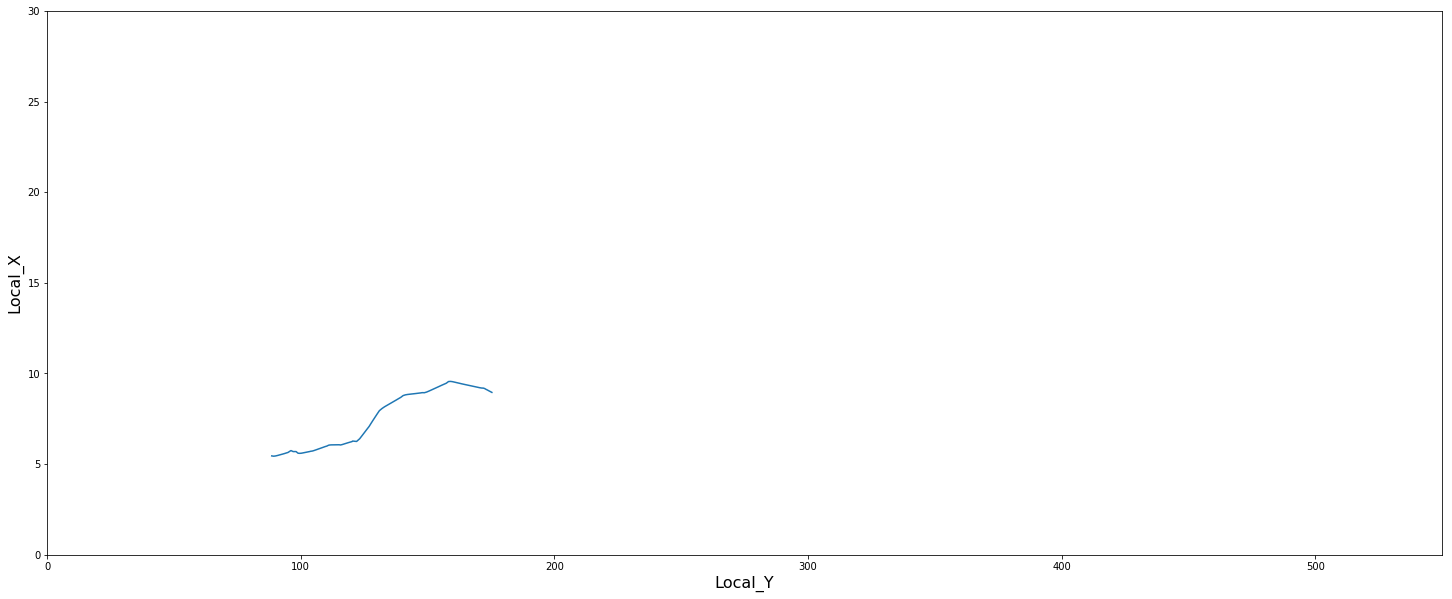

##########################################   129   ###############################################


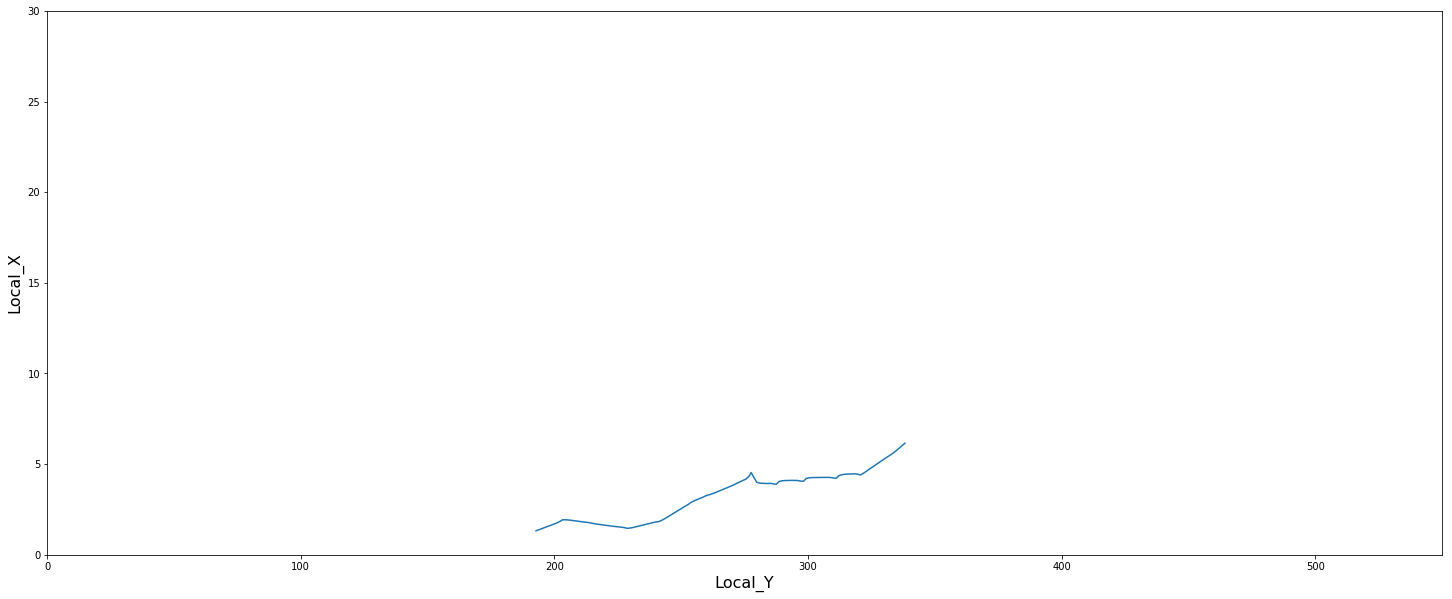

##########################################   130   ###############################################


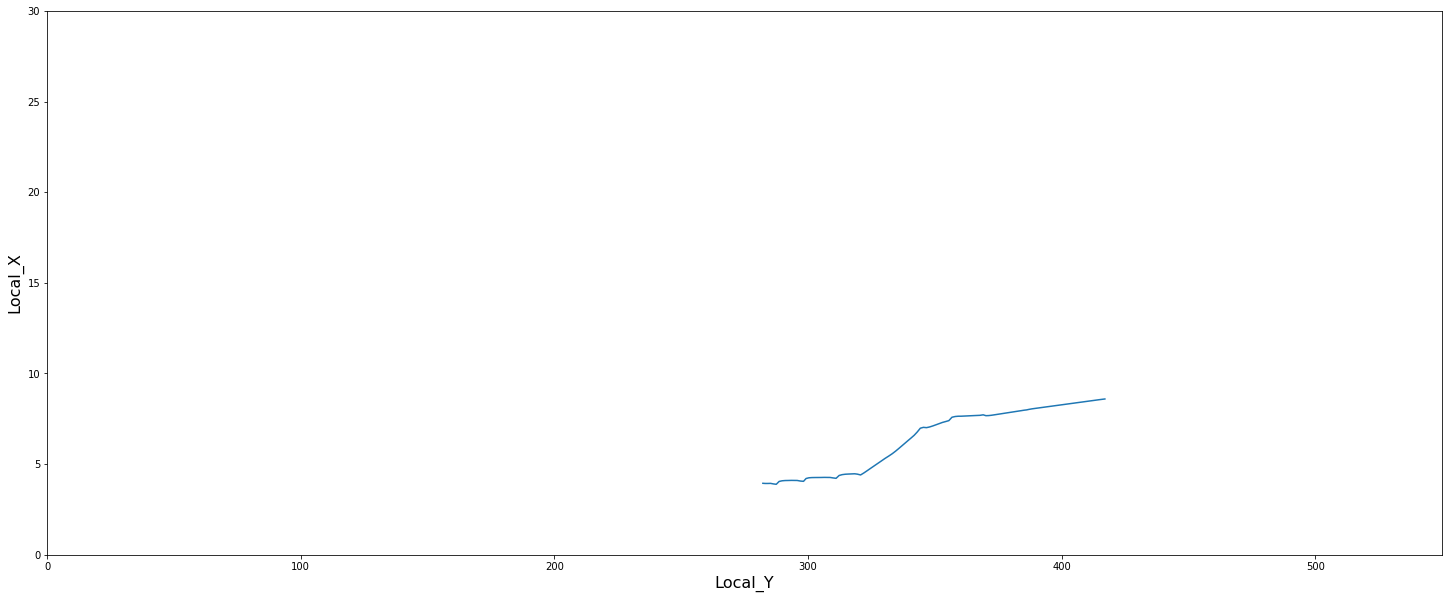

##########################################   131   ###############################################


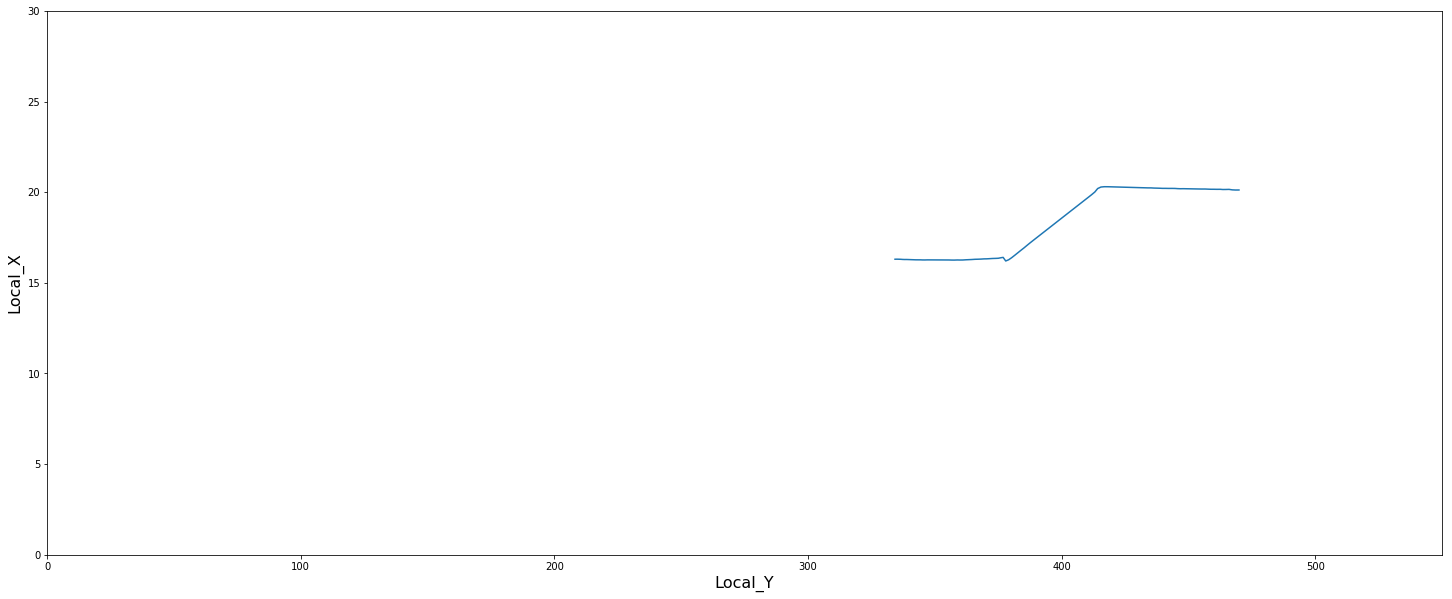

##########################################   132   ###############################################


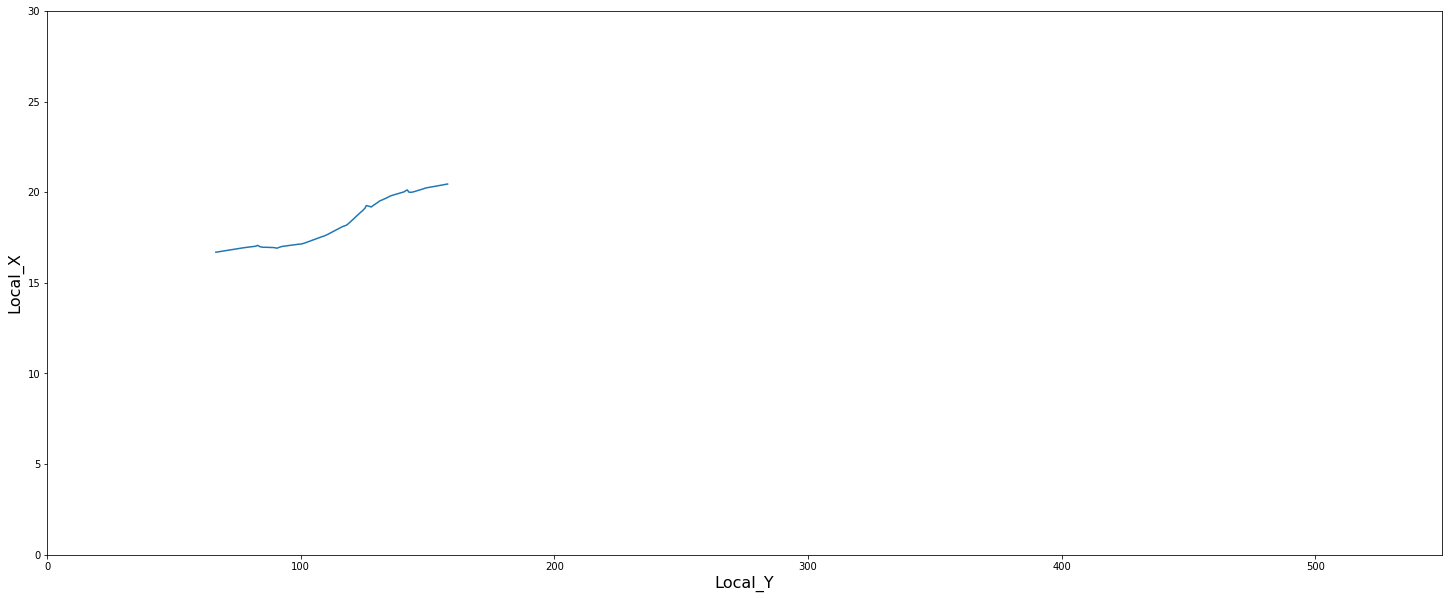

##########################################   133   ###############################################


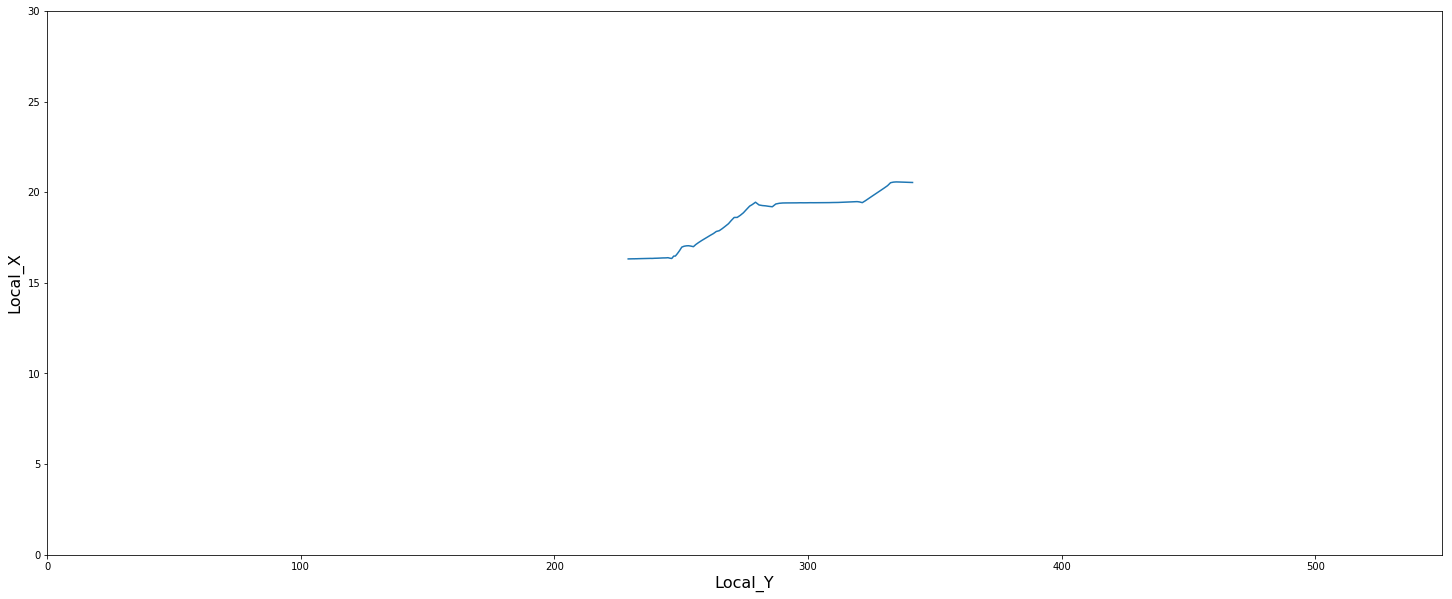

##########################################   134   ###############################################


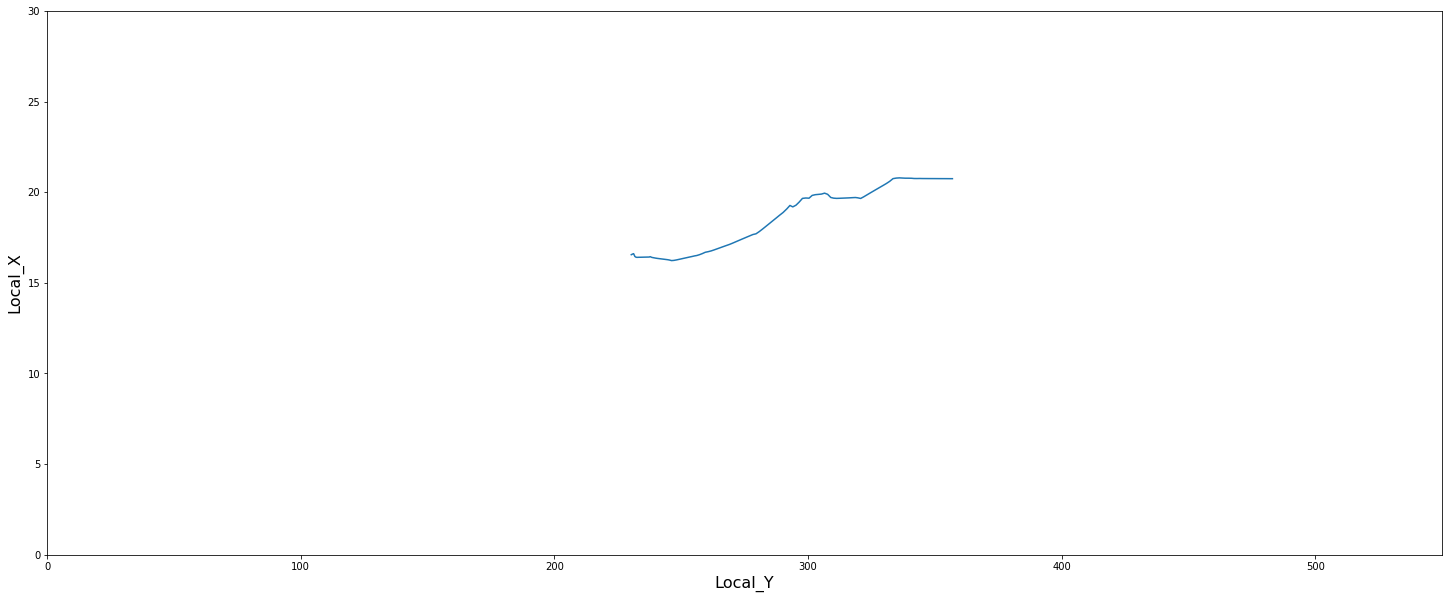

##########################################   135   ###############################################


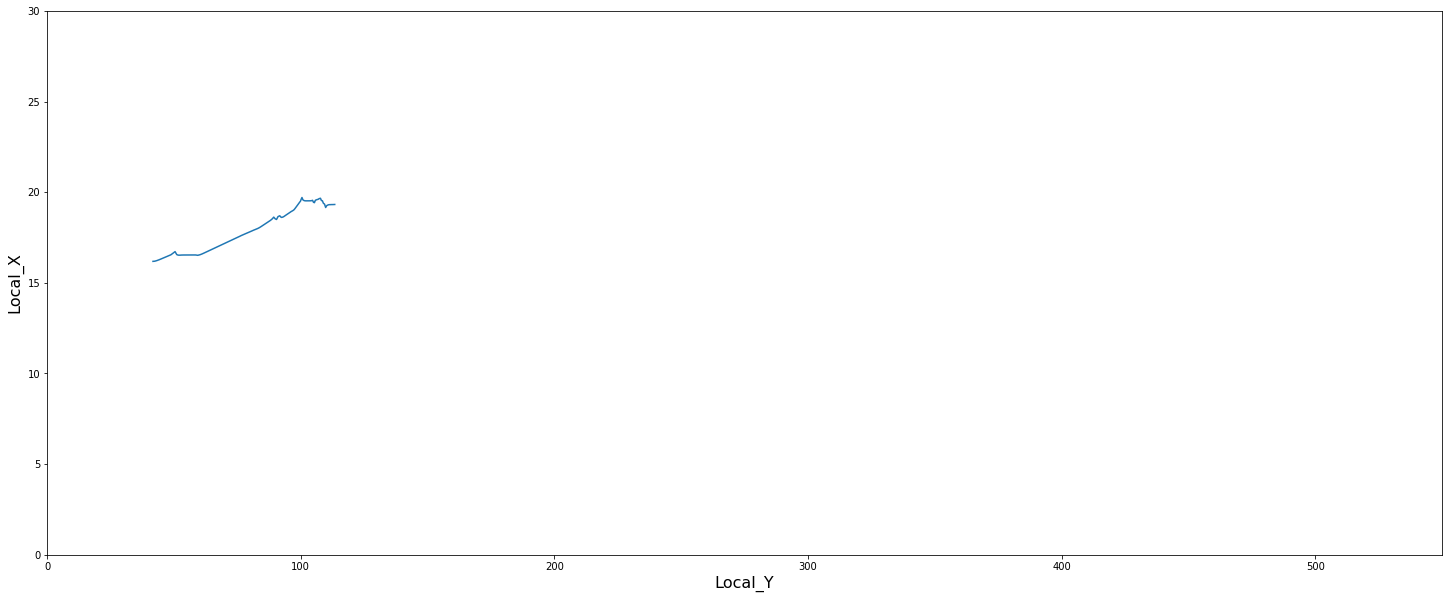

##########################################   136   ###############################################


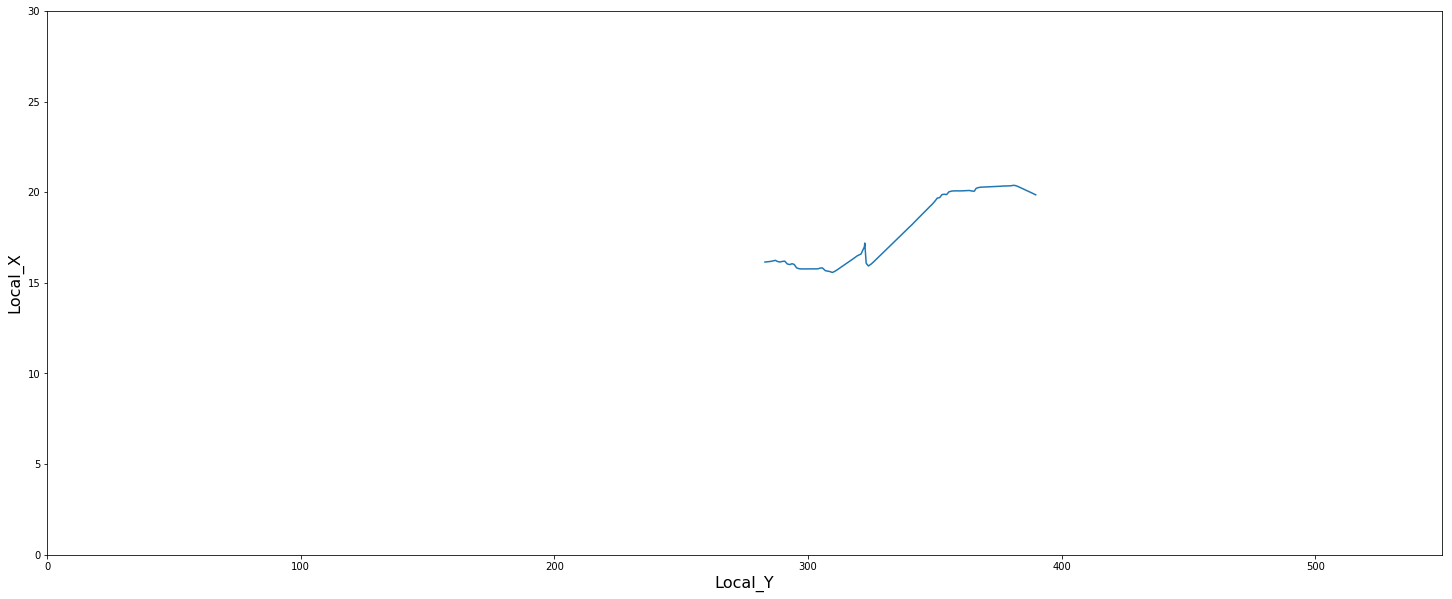

##########################################   137   ###############################################


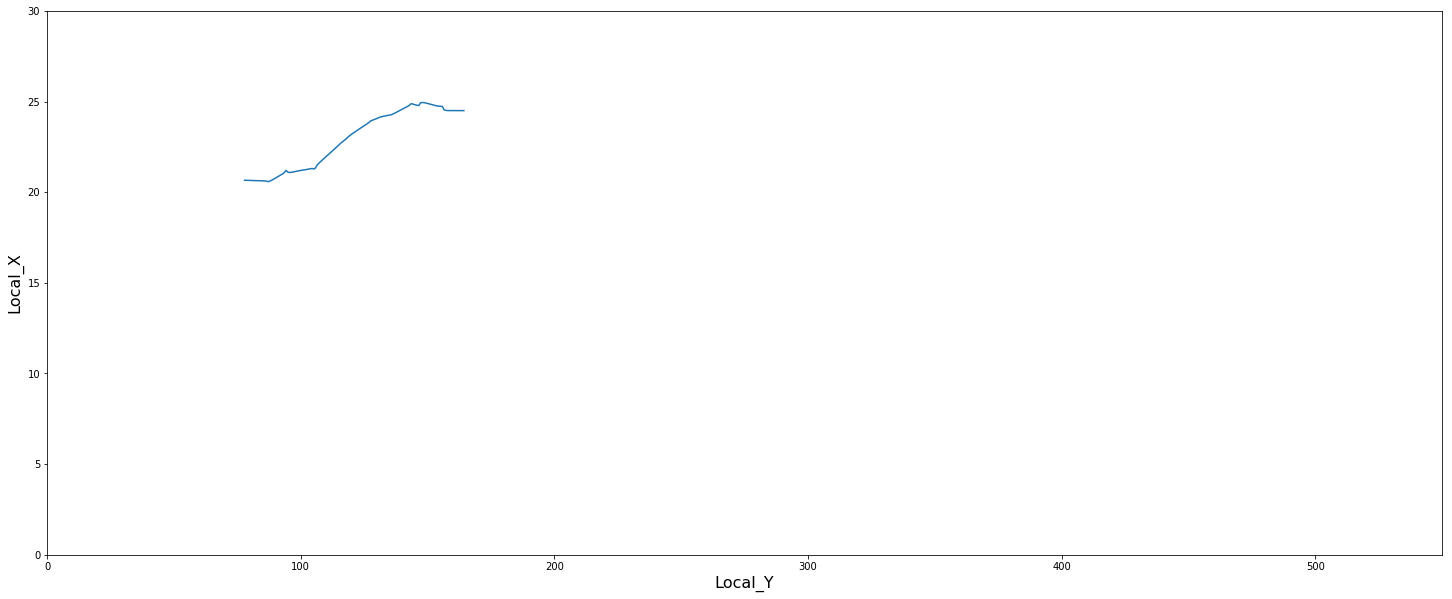

##########################################   138   ###############################################


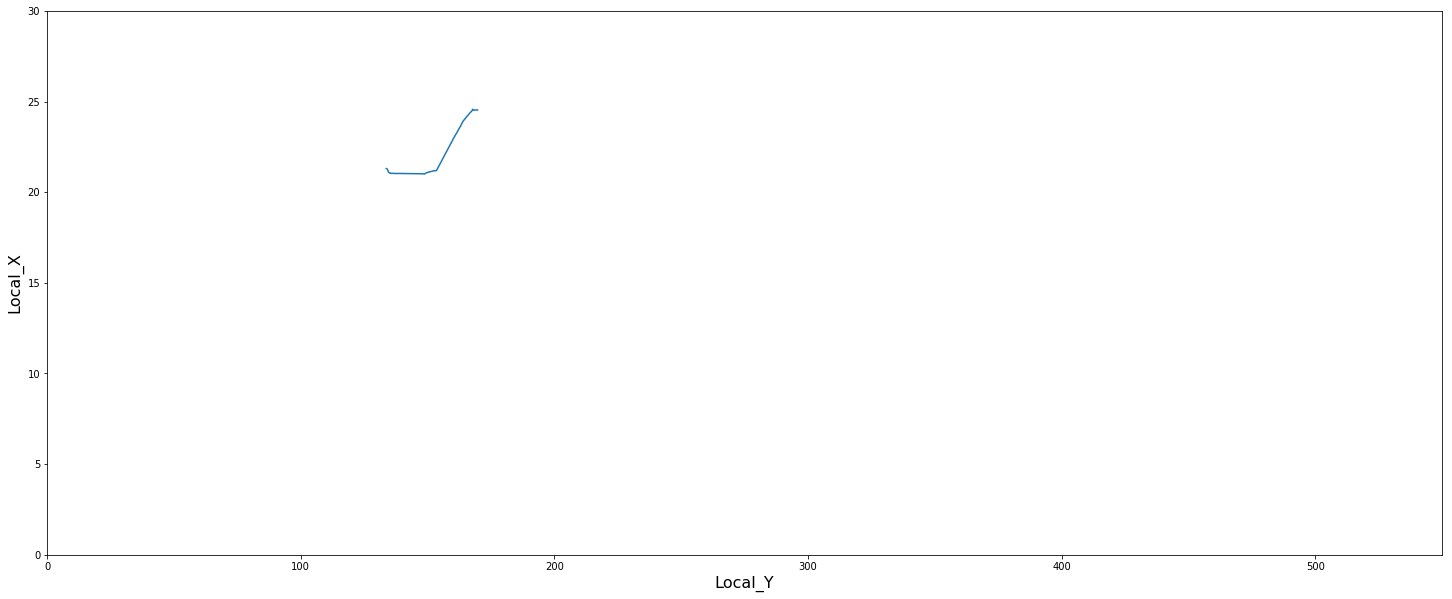

##########################################   139   ###############################################


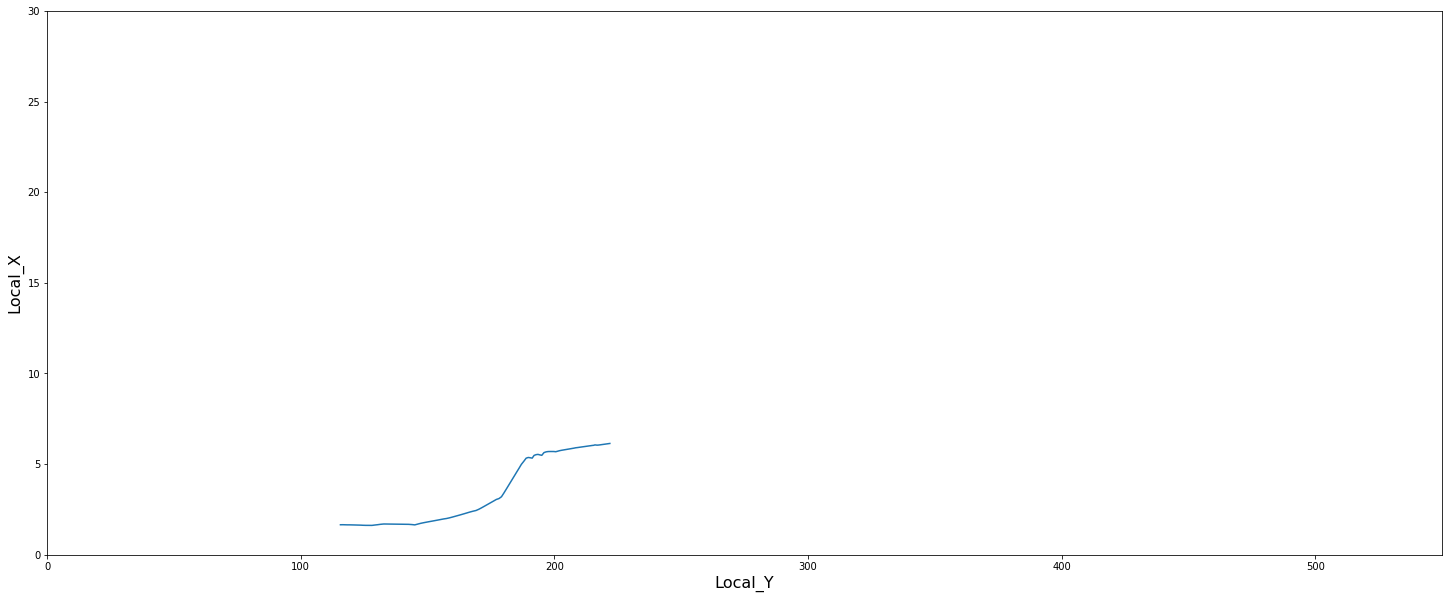

##########################################   140   ###############################################


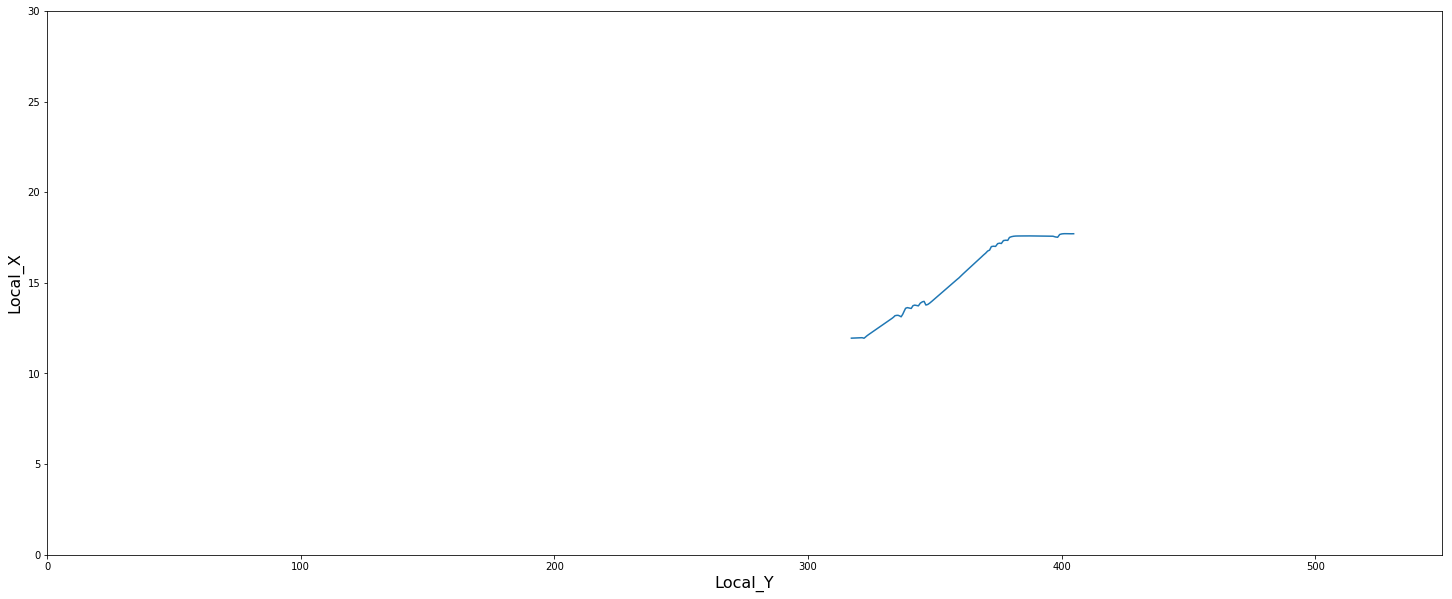

##########################################   141   ###############################################


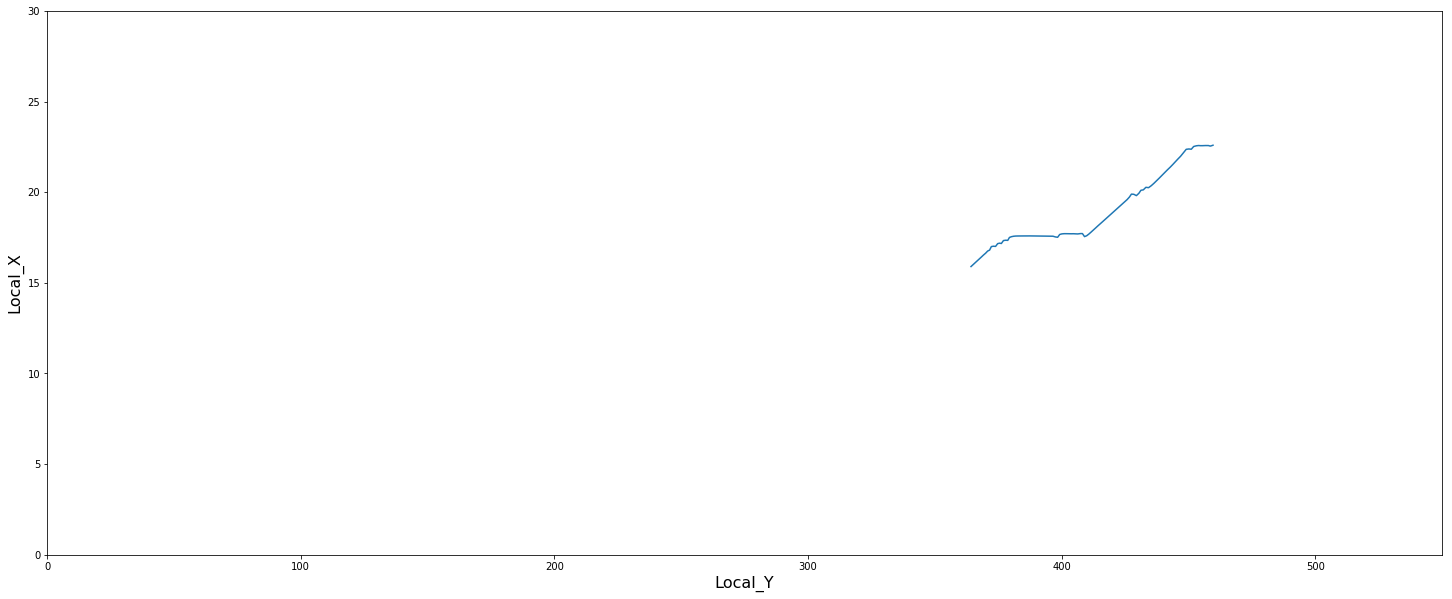

In [9]:
count=0
for path in lane_change_right_I:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1
#     a=input ("number")
#     if a!="finish":
#         pass
#     else:
#         break

In [ ]:
count=0
for path in lane_change_right_I[:10]:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1
#     a=input ("number")
#     if a!="finish":
#         pass
#     else:
#         break

In [ ]:
count=0
for path in lane_keep_I[:250]:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

## US-101

In [7]:
lane_keep_US=[]
lane_change_left_US=[]
lane_change_right_US=[]
for path in Vehicles_Trajectoy_US:
    path.reset_index(inplace=True,drop=True)
    if len(path['Lane_ID'].value_counts())>1:
         for i in path['Lane_ID'].diff()[lambda x: x != 0].index.tolist():
             p=pd.concat([path[i-60:i],path[i:i+60]],ignore_index=True)
             if ((p['Local_X'].max()-p['Local_X'].min())>3.5) and ((p['Local_Y'].max()-p['Local_Y'].min())<300)and (len(p)==120):
                 trend=[p['Lane_ID'][h] for h in p['Lane_ID'].diff()[lambda x: x != 0].index.tolist()]

                 if (trend[0]<trend[1]) and (len(trend)==2):
                     lane_change_right_US.append(p)
                 elif (trend[0]>trend[1]) and (len(trend)==2):
                     lane_change_left_US.append(p)
    elif len(path['Lane_ID'].value_counts())==1:
         chunks = [path[x:x+120] for x in range(0, len(path), 120)]
         for i in chunks: 
             if ((i['Local_X'].max()-i['Local_X'].min())<1) and (30<(p['Local_Y'].max()-p['Local_Y'].min())) and (len(i)==120):
                 lane_keep_US.append(i)


print("number of lane keep sequence           : ",len(lane_keep_US))
print("number of lane change left sequence    : ",len(lane_change_left_US))
print("number of lane change right sequence   : ",len(lane_change_right_US))


indexes_change_left_US  = [5,10,18,19,25,26,31,32,33,35,36,38,40,41,42,51,52,53,55,68,70,73,76,78,84,87,91,96,97,
                          98,110,112,113,114,115,116,117,119,133,134,136,144,153,160,161,162,163,170,173,175,176,
                          178,179,184,185,186,187,191,192,194,200,201,202,203,206,209,210,212,213,215,216,217,222,
                          223,229,232,234,240,241,243,245,250,251,257,262,263,264,265,268,272,273,275,276,279,281,
                          284,287,290,291,292,295,296,297,300,303,304,310,311,312,313,314,318,327,329,334,335,336,
                          337,343,345,347]

for index in sorted(indexes_change_left_US , reverse=True):
    del lane_change_left_US[index] 
    
indexes_lane_keep_US=[0,1,3,5,6,9,10,14,15,16,18,20,23,27,28,29,30,31,32,34,40,44,46,48,52,53,56,57,60,61,62,64,66,
                      70,73,74,75,77,79,80,81,84,85,88,90,91,94,95,96,98,100,101,102,103,108,109,113,114,118,123,
                      124,129,131,132,133,134,137,138,139,140,145,149,153,158,159,162,165,168,169,171,176,177,180,
                      184,188,191,192,193,194,206,207,209,213,217,218,222,223,224,227,231,232,236,239,244,246,249,
                      251,252,258,259,260,262,265,267,268,274,275,279,280,283,285,287,288,289,293,306,309,310,314,
                      315,318,322,323,324,328,329,333,334,338,339,341]


for index in sorted(indexes_lane_keep_US , reverse=True):
    del lane_keep_US[index]  
    
print("number of lane keep sequence           : ",len(lane_keep_US))
print("number of lane change left sequence    : ",len(lane_change_left_US))
print("number of lane change right sequence   : ",len(lane_change_right_US))


lane_keep_US=lane_keep_US[:194]
lane_change_left_US=lane_change_left_US[:194]
lane_change_right_US=lane_change_right_US[:194]

print("number of lane keep sequence           : ",len(lane_keep_US))
print("number of lane change left sequence    : ",len(lane_change_left_US))
print("number of lane change right sequence   : ",len(lane_change_right_US))

print(len(lane_keep_US[0]))

Duration_of_lane_keep_US_9=[]
for i in lane_keep_US:
    Duration_of_lane_keep_US_9.append(i[25:95])
    
Duration_of_lane_change_left_US_9=[]
for i in lane_change_left_US:
    Duration_of_lane_change_left_US_9.append(i[25:95]) 
    
Duration_of_lane_change_right_US_9=[]
for i in lane_change_right_US:
    Duration_of_lane_change_right_US_9.append(i[25:95]) 
    
print(len(Duration_of_lane_keep_US_9[0]))
print(len(Duration_of_lane_change_right_US_9[0]))
print(len(Duration_of_lane_change_left_US_9[0]))

lane_keep_US=Duration_of_lane_keep_US_9
lane_change_left_US=Duration_of_lane_change_right_US_9
lane_change_right_US=Duration_of_lane_change_left_US_9

number of lane keep sequence           :  20397
number of lane change left sequence    :  348
number of lane change right sequence   :  194
number of lane keep sequence           :  20256
number of lane change left sequence    :  227
number of lane change right sequence   :  194
number of lane keep sequence           :  194
number of lane change left sequence    :  194
number of lane change right sequence   :  194
120
70
70
70


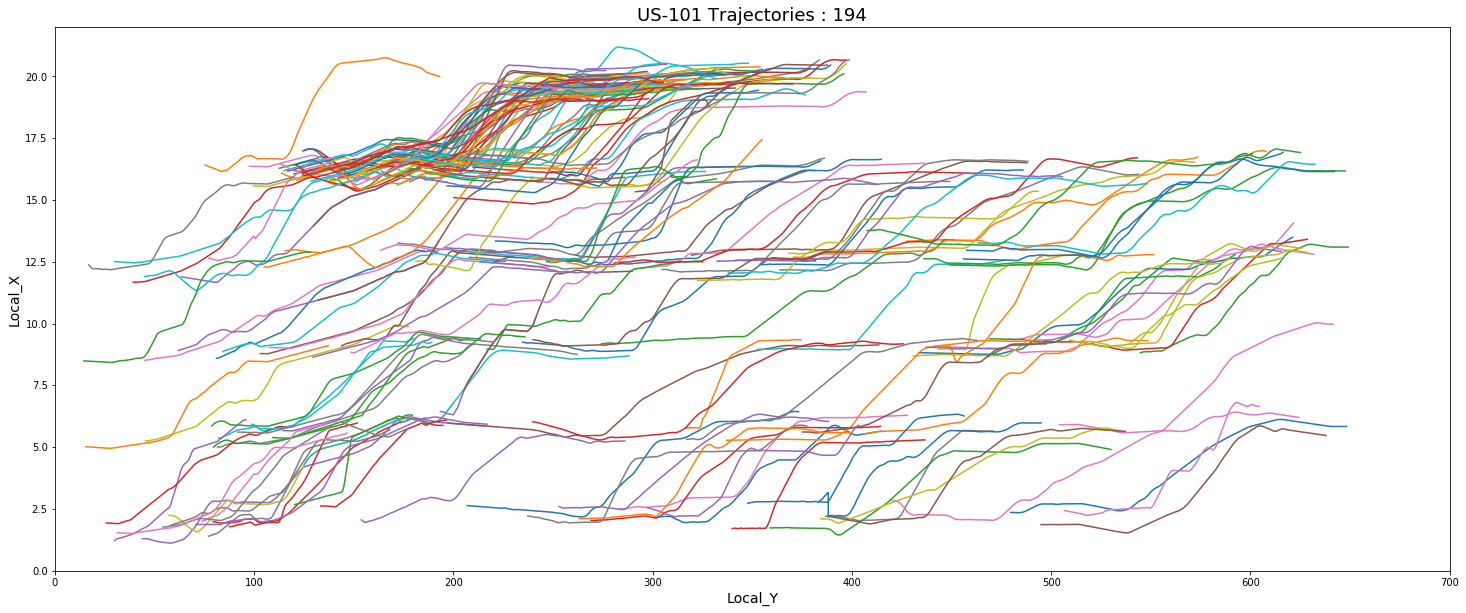

In [59]:
figure(figsize=(25,10))
for path in lane_change_right_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.title("US-101 Trajectories : 194",fontsize=18)
    plt.xlabel('Local_Y', fontsize=14)
    plt.ylabel('Local_X', fontsize=14)

### Select good trajectory I-80 ;)

In [ ]:
count=0
for path in lane_change_right_US:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 700)
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

In [ ]:
count=0
for path in lane_change_left_US:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 700)
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

In [ ]:
count=0
for path in lane_keep_US[:400]:
    print("##########################################  ",count,"  ###############################################")
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    figure(figsize=(25,10))
    plt.xlim(0, 700)
    plt.ylim(0, 23)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
    plt.show()
    count=count+1

## Plot Labeled Maneuver

## I-80

In [9]:
# import random
# lane_change_left_I=random.sample(lane_change_left_I, 142)

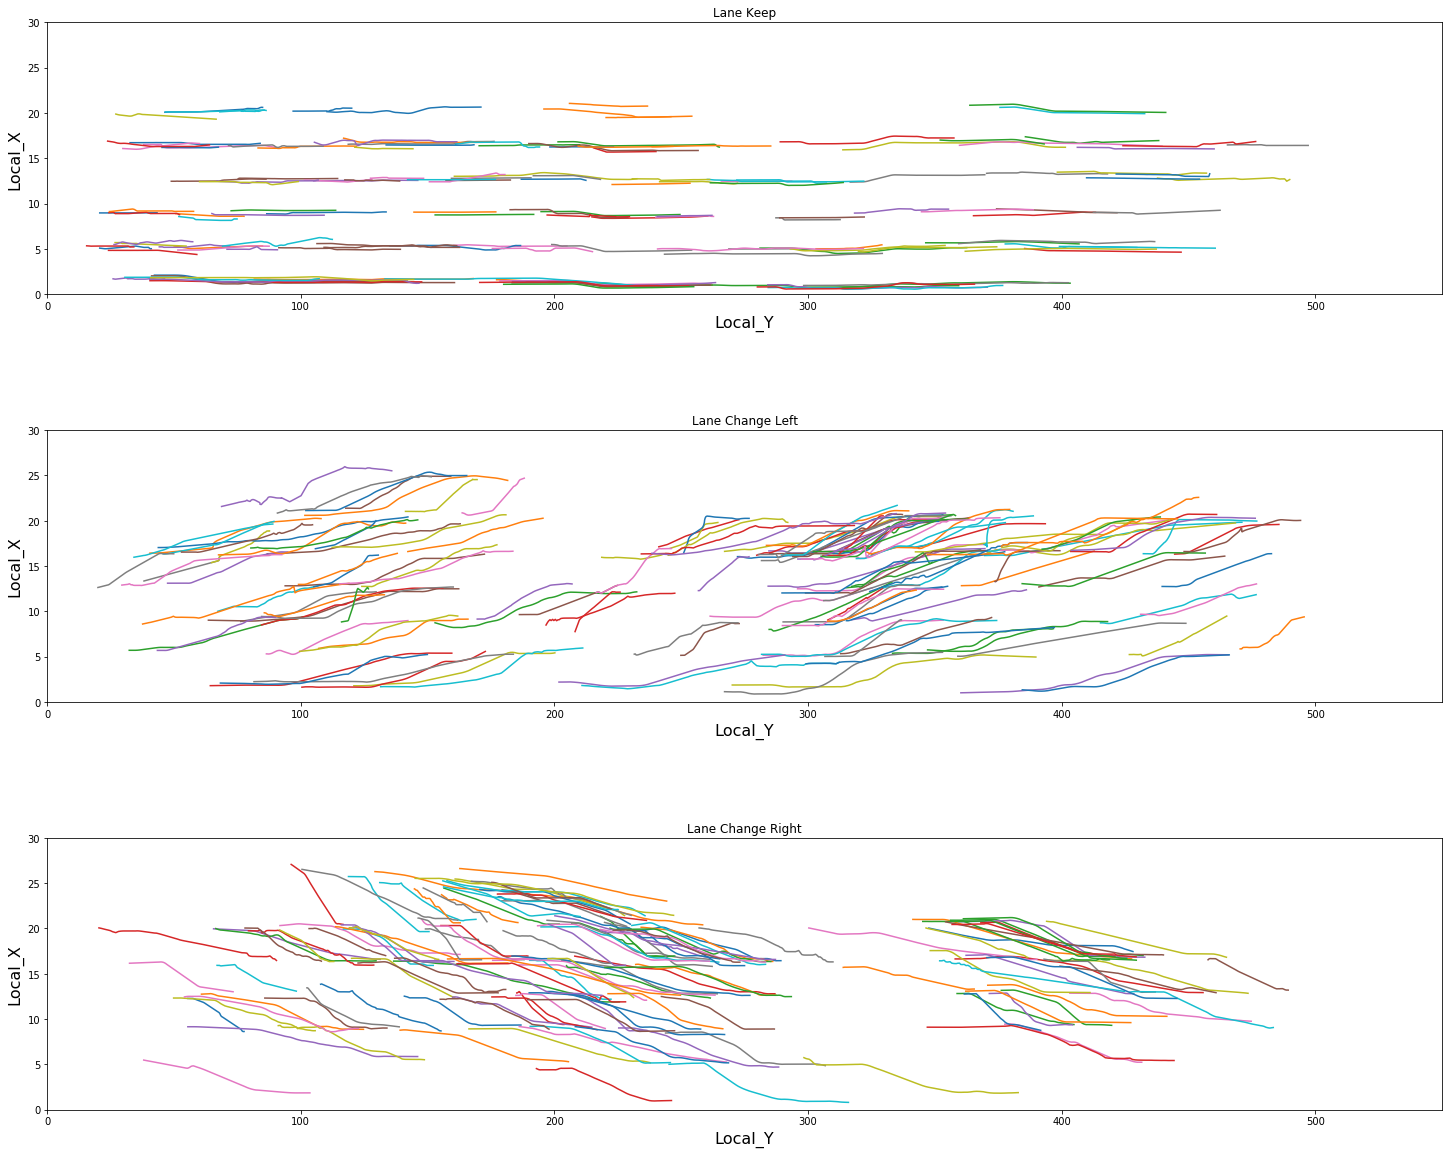

In [9]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in lane_keep_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)
title('Lane Change Left')
for path in lane_change_left_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)
title('Lane Change Right')
for path in lane_change_right_I:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 550)
    plt.ylim(0, 30)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

## US-101

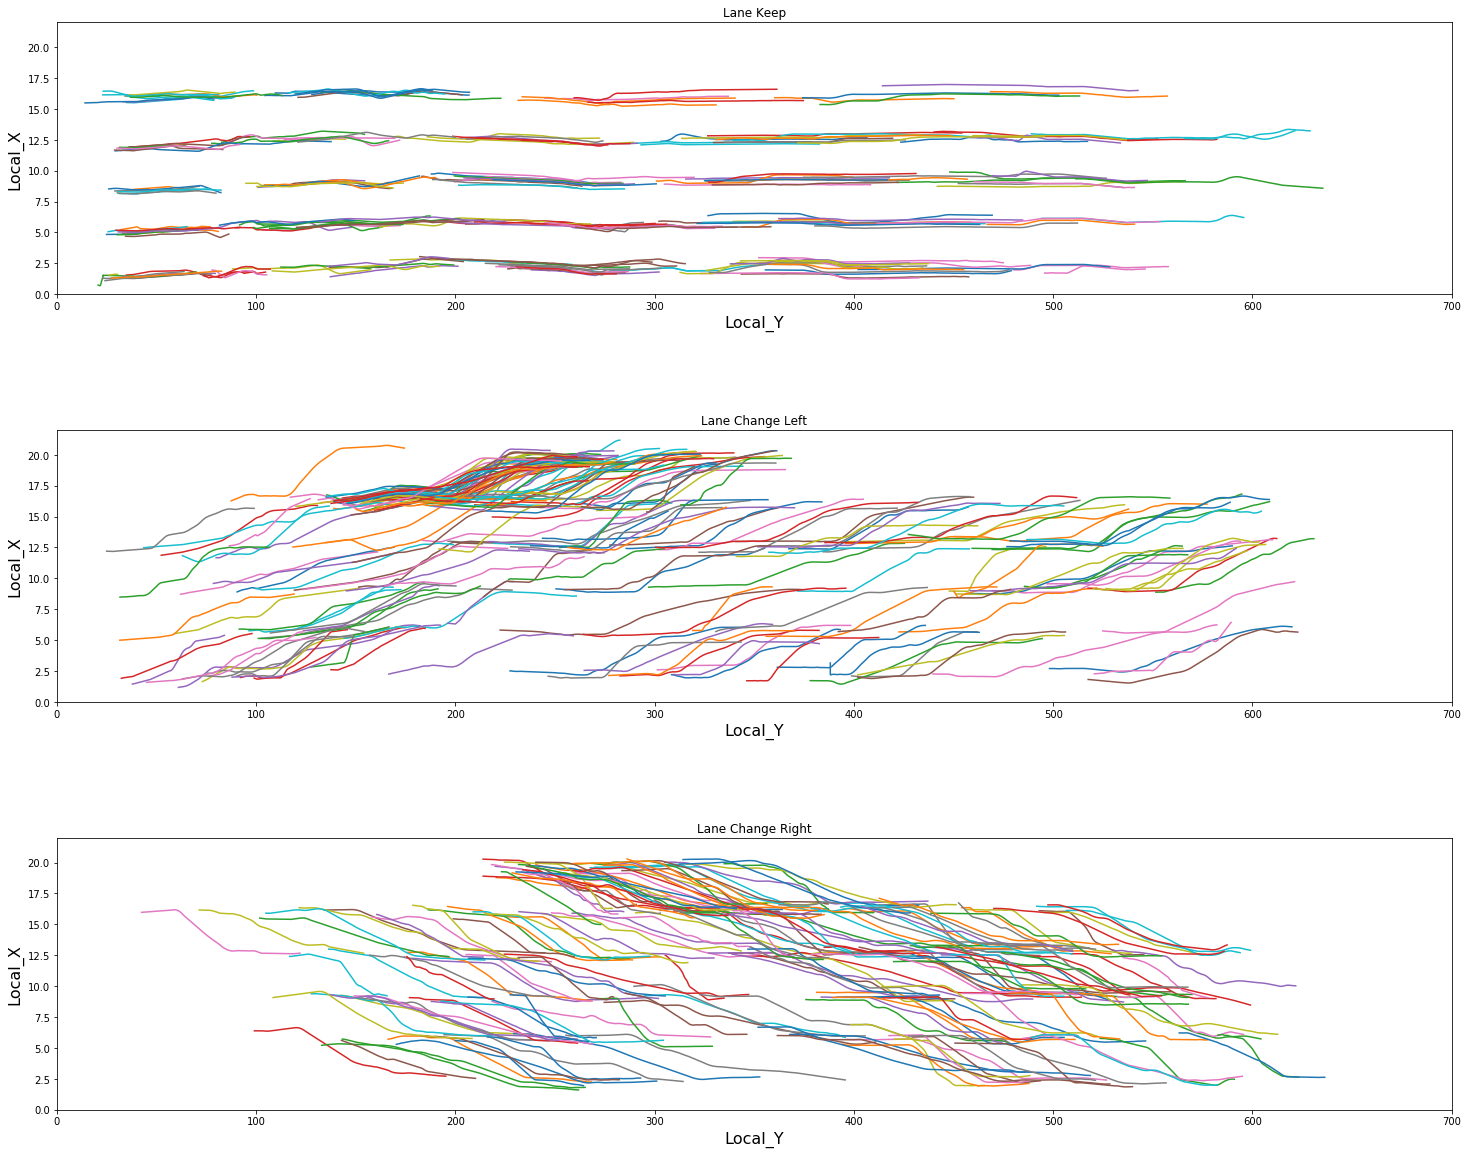

In [10]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in lane_keep_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)

title('Lane Change Left')
for path in lane_change_left_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)

title('Lane Change Right')
for path in lane_change_right_US:
    path=path.to_numpy()
    yline = path[:,[4]].flatten()
    xline = path[:,[5]].flatten()
    plt.xlim(0, 700) 
    plt.ylim(0, 22)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)



plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

## Drop some of misinformation feature

## I-80

In [8]:
for i in lane_keep_I:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_left_I:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_right_I:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
print(lane_change_right_I[1])

     Local_X      v_Vel     v_Acc
0   5.608015   7.595616  0.143256
1   5.608320   7.662672  0.886968
2   5.611063   7.842504  2.569464
3   5.608015   8.171688  3.413760
4   5.595214   8.616696  3.413760
..       ...        ...       ...
65  1.819046  15.785592  0.341376
66  1.842211  15.828264  0.569976
67  1.839163  15.919704  0.832104
68  1.836420  16.023336  1.426464
69  1.833067  16.142208  1.274064

[70 rows x 3 columns]


## US-101

In [9]:
for i in lane_keep_US:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_left_US:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
for i in lane_change_right_US:
    i.reset_index(drop=True, inplace=True)
    i=i.drop(['Vehicle_ID','Frame_ID','Total_Frames','Global_Time','Local_Y','Lane_ID'],inplace=True, axis=1)
print(lane_change_right_US[1])

      Local_X      v_Vel     v_Acc
0   15.573756   8.205216 -2.727960
1   15.564307   7.991856 -1.639824
2   15.568574   7.879080 -0.569976
3   15.571318   7.842504  0.000000
4   15.574061   7.845552  0.067056
..        ...        ...       ...
65  12.300509  10.668000  0.000000
66  12.309348  10.668000  0.000000
67  12.318187  10.668000  0.000000
68  12.327331  10.668000  0.000000
69  12.335866  10.661904 -0.079248

[70 rows x 3 columns]


# Normalization & Train/Test Split

## I-80

In [29]:
# Normalize the data attributes for the dataset.
from sklearn import preprocessing

n_Lane_Change_Left_Sampel_I=[]
n_Lane_Change_Right_Sampel_I=[]
n_Lane_Keep_Sampel_I=[]

for i in lane_change_left_I:
    p = preprocessing.normalize(i)
    #print(i)
    n_Lane_Change_Left_Sampel_I.append(p)
    
for i in lane_change_right_I:
    p = preprocessing.normalize(i)
    n_Lane_Change_Right_Sampel_I.append(p)
    
for i in lane_keep_I:
    p = preprocessing.normalize(i)
    n_Lane_Keep_Sampel_I.append(p)
    
    
print(n_Lane_Change_Right_Sampel_I[0].shape)



(85, 3)


In [10]:
#Standardization
Lane_Change_Left_Sampel_I=[]
Lane_Change_Right_Sampel_I=[]
Lane_Keep_Sampel_I=[]

for i in lane_change_left_I:
#     print(len(i.iloc[0][0]))
#     print(i)
    i=i-[i.iloc[0][0],0,0]
    print(i)
    Lane_Change_Left_Sampel_I.append(i)
    
for i in lane_change_right_I:
    i=i-[i.iloc[0][0],0,0]
    Lane_Change_Right_Sampel_I.append(i)
    
for i in lane_keep_I:
    i=i-[i.iloc[0][0],0,0]
    Lane_Keep_Sampel_I.append(i)
    
    
print(Lane_Change_Right_Sampel_I[1])

     Local_X     v_Vel     v_Acc
0   0.000000  6.492240 -0.405384
1   0.029870  6.470904 -0.429768
2   0.085344  6.495288  0.813816
3   0.112776  6.608064  1.700784
4   0.129540  6.720840  0.963168
..       ...       ...       ...
65  3.453994  4.913376 -1.005840
66  3.507334  4.718304 -2.767584
67  3.554273  4.367784 -3.413760
68  3.586886  3.898392 -3.413760
69  3.607003  3.429000 -3.413760

[70 rows x 3 columns]
     Local_X     v_Vel     v_Acc
0   0.000000  5.398008 -0.054864
1   0.027432  5.404104  0.118872
2   0.054864  5.446776  0.646176
3   0.082601  5.544312  1.328928
4   0.109118  5.687568  1.652016
..       ...       ...       ...
65  3.137611  6.714744 -0.234696
66  3.168701  6.702552  0.024384
67  3.199486  6.705600  0.042672
68  3.230575  6.708648  0.051816
69  3.261665  6.705600 -0.091440

[70 rows x 3 columns]
     Local_X     v_Vel     v_Acc
0   0.000000  5.650992 -1.380744
1   0.064313  5.547360 -0.701040
2   0.125882  5.501640 -0.140208
3   0.181051  5.492496  0.0609

[70 rows x 3 columns]
     Local_X     v_Vel     v_Acc
0   0.000000  3.523488 -3.310128
1  -0.032004  3.221736 -2.999232
2  -0.056998  3.051048 -0.795528
3  -0.049073  3.151632  2.624328
4  -0.057302  3.550920  3.413760
..       ...       ...       ...
65  2.233270  4.169664  2.097024
66  2.241499  4.337304  0.874776
67  2.249424  4.422648  0.411480
68  2.257349  4.474464  0.947928
69  2.265883  4.544568  0.545592

[70 rows x 3 columns]
     Local_X     v_Vel     v_Acc
0   0.000000  3.340608  0.000000
1   0.009144  3.343656  0.076200
2   0.017678  3.349752  0.030480
3   0.026822  3.316224 -0.554736
4   0.044501  3.230880 -1.164336
..       ...       ...       ...
65  3.742030  4.386072  1.563624
66  3.746906  4.626864  3.249168
67  3.578962  4.901184  2.980944
68  3.322320  5.026152  0.036576
69  3.021482  4.843272 -3.413760

[70 rows x 3 columns]
     Local_X     v_Vel     v_Acc
0   0.000000  4.395216 -0.999744
1   0.000305  4.355592 -0.054864
2   0.003048  4.389120  0.941832
3   0.00

[70 rows x 3 columns]
     Local_X      v_Vel     v_Acc
0   0.000000   8.586216  2.700528
1   0.061265   9.070848  3.413760
2   0.122834   9.756648 -3.413760
3   0.215798   7.053072 -3.413760
4   0.315163   5.547360 -3.413760
..       ...        ...       ...
65  3.523793  10.890504  3.060192
66  3.571342  11.286744  2.093976
67  3.619805  11.597640  0.713232
68  3.667963  11.710416  0.134112
69  3.716122  11.728704  0.015240

[70 rows x 3 columns]
     Local_X     v_Vel     v_Acc
0   0.000000  3.813048 -0.027432
1   0.000305  3.810000 -0.039624
2   0.000000  3.803904 -0.048768
3   0.000305  3.767328 -0.594360
4   0.000305  3.703320 -0.752856
..       ...       ...       ...
65  4.134002  8.790432  0.438912
66  4.146499  8.857488  0.893064
67  4.154729  8.958072  1.182624
68  4.157777  8.982456 -0.313944
69  4.157472  8.836152 -2.417064

[70 rows x 3 columns]
     Local_X     v_Vel     v_Acc
0   0.000000  0.914400 -0.006096
1   0.068580  0.911352  0.000000
2   0.137465  0.911352  0.000

     Local_X      v_Vel     v_Acc
0   0.000000   7.595616  0.143256
1   0.000305   7.662672  0.886968
2   0.003048   7.842504  2.569464
3   0.000000   8.171688  3.413760
4  -0.012802   8.616696  3.413760
..       ...        ...       ...
65 -3.788969  15.785592  0.341376
66 -3.765804  15.828264  0.569976
67 -3.768852  15.919704  0.832104
68 -3.771595  16.023336  1.426464
69 -3.774948  16.142208  1.274064

[70 rows x 3 columns]


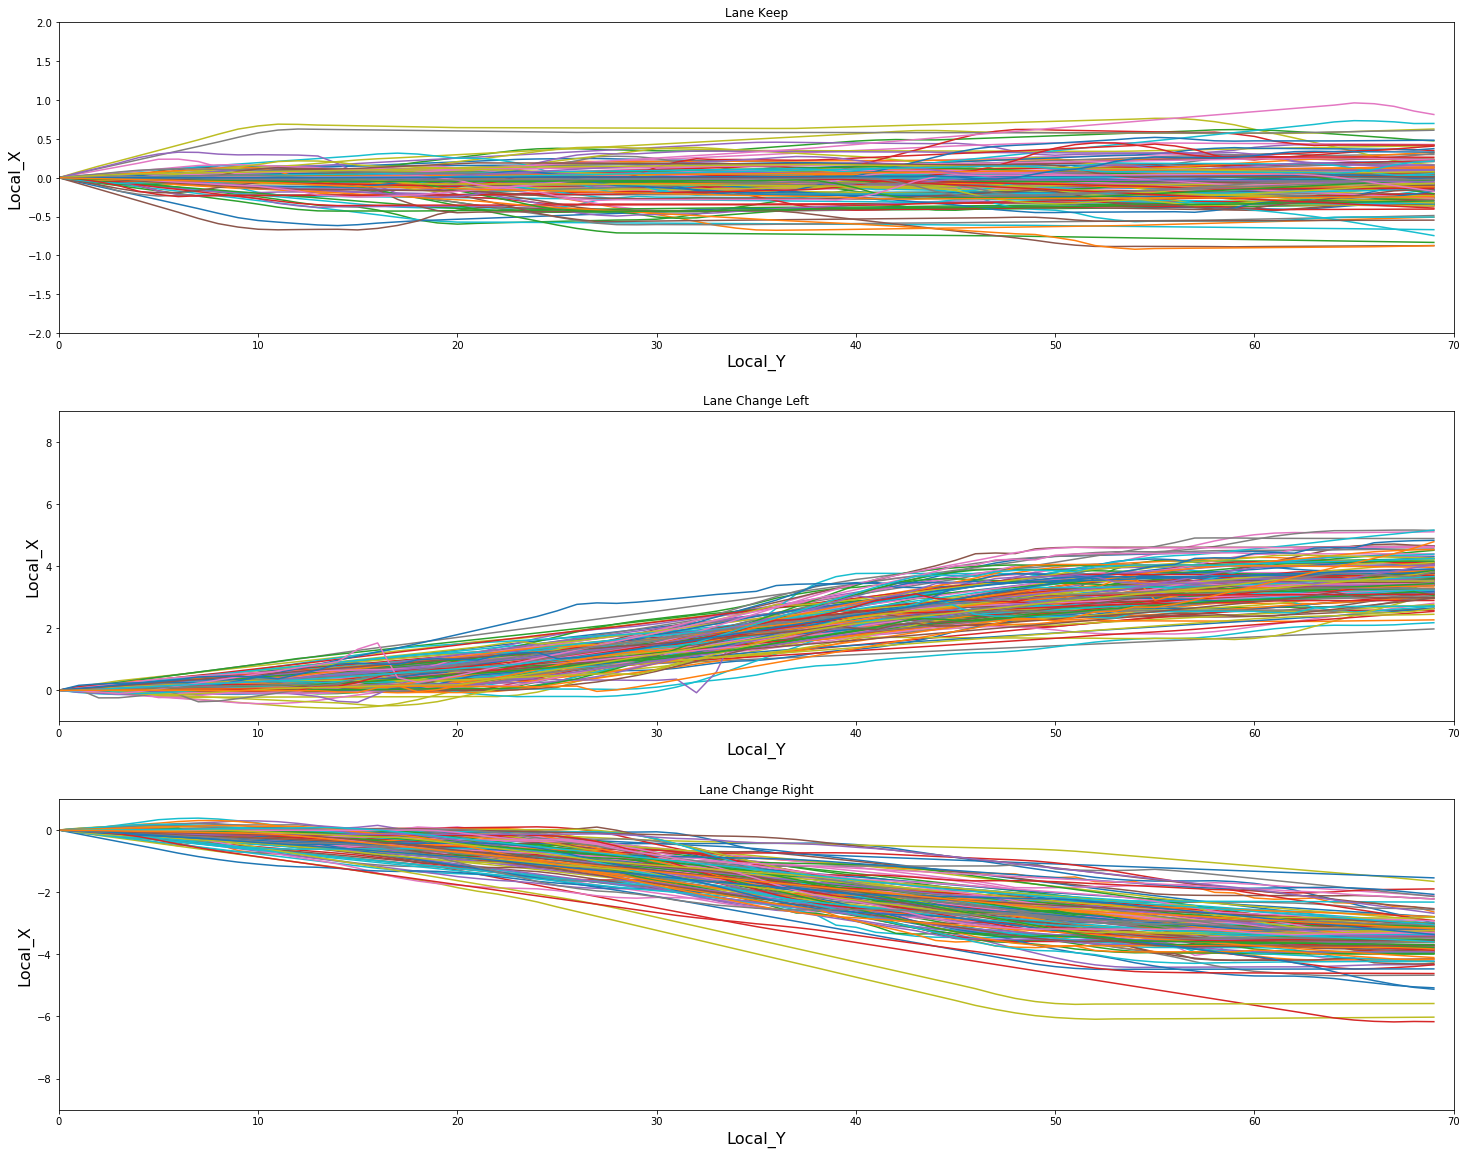

In [112]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in Lane_Keep_Sampel_I:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 70)
    plt.ylim(-2, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)
title('Lane Change Left')
for path in Lane_Change_Left_Sampel_I:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 70)
    plt.ylim(-1, 9)
    plt.plot(xline, yline)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)
title('Lane Change Right')
for path in Lane_Change_Right_Sampel_I:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 70)
    plt.ylim(-9, 1)
    plt.plot(xline, yline)
    plt.xlabel('Time', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
plt.subplots_adjust(hspace=0.25, wspace=.2)
plt.show()

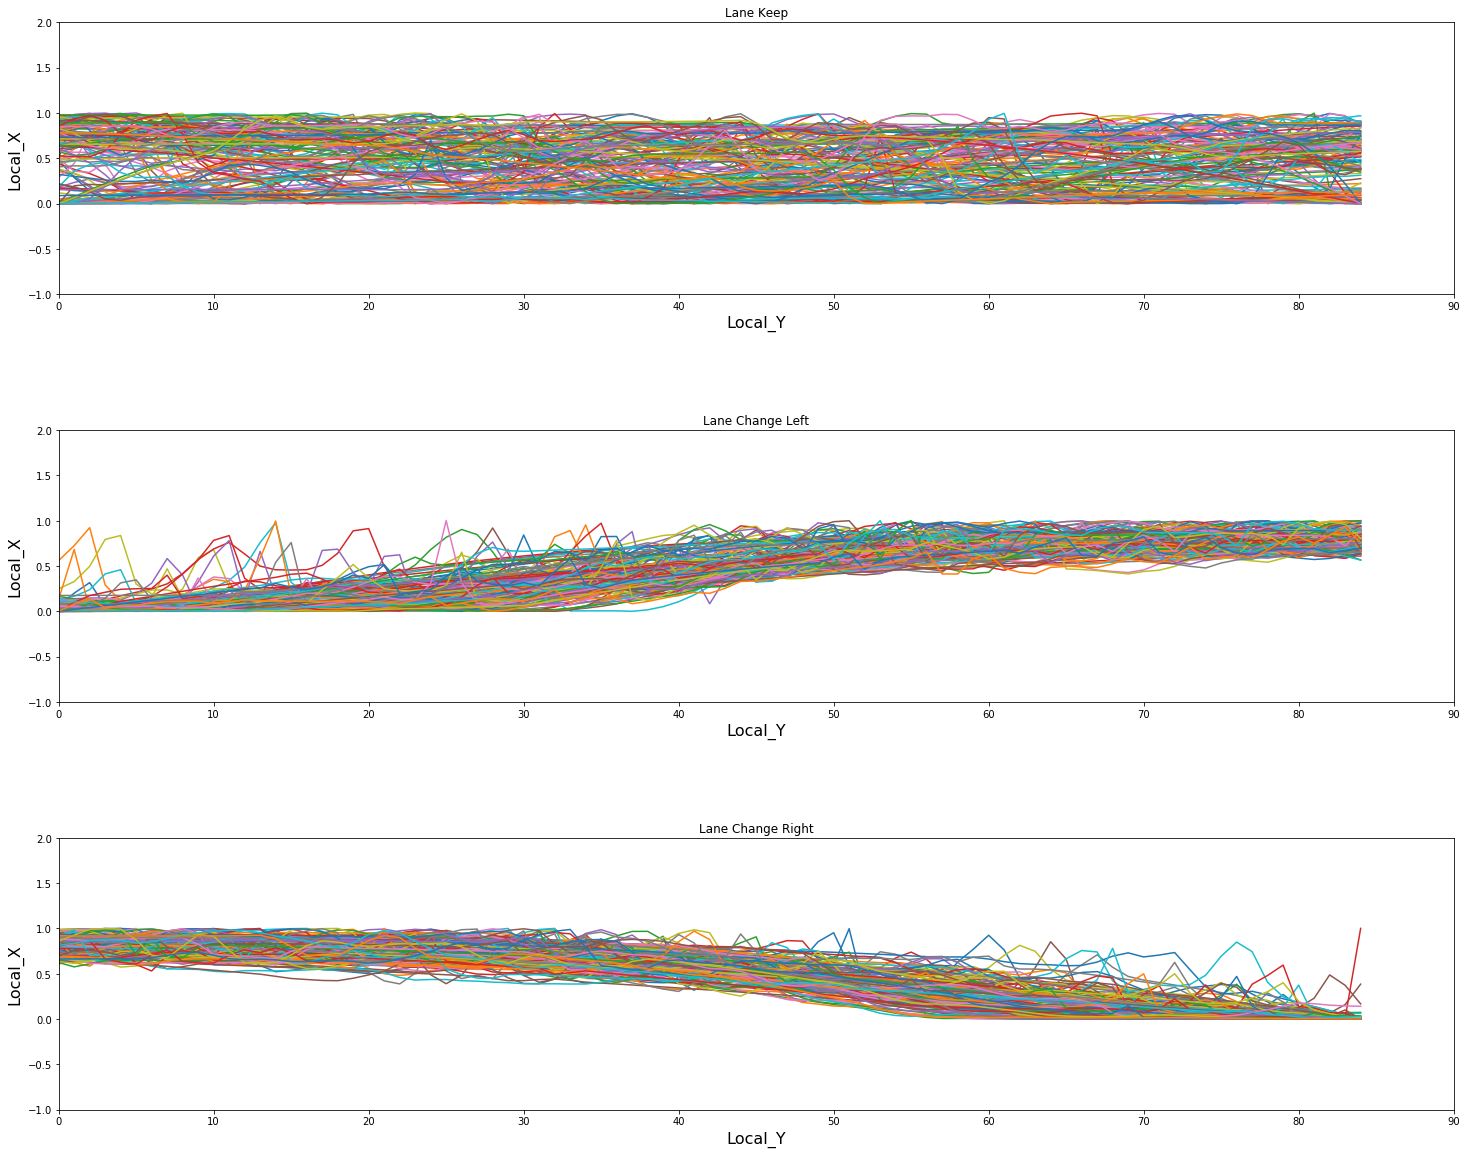

In [30]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in n_Lane_Keep_Sampel_I:
    #path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-1, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)
title('Lane Change Left')
for path in n_Lane_Change_Left_Sampel_I:
    #path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-1, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)
title('Lane Change Right')
for path in n_Lane_Change_Right_Sampel_I:
    #path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-1, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

## US-101

In [31]:
# Normalize the data attributes for the dataset.
from sklearn import preprocessing

n_Lane_Change_Left_Sampel_US=[]
n_Lane_Change_Right_Sampel_US=[]
n_Lane_Keep_Sampel_US=[]

for i in lane_change_left_US:
    p = preprocessing.normalize(i)
    n_Lane_Change_Left_Sampel_US.append(p)
    
for i in lane_change_right_US:
    p = preprocessing.normalize(i)
    n_Lane_Change_Right_Sampel_US.append(p)
    
for i in lane_keep_US:
    p = preprocessing.normalize(i)
    n_Lane_Keep_Sampel_US.append(p)
    
    
print(n_Lane_Change_Right_Sampel_US[0].shape)

(85, 3)


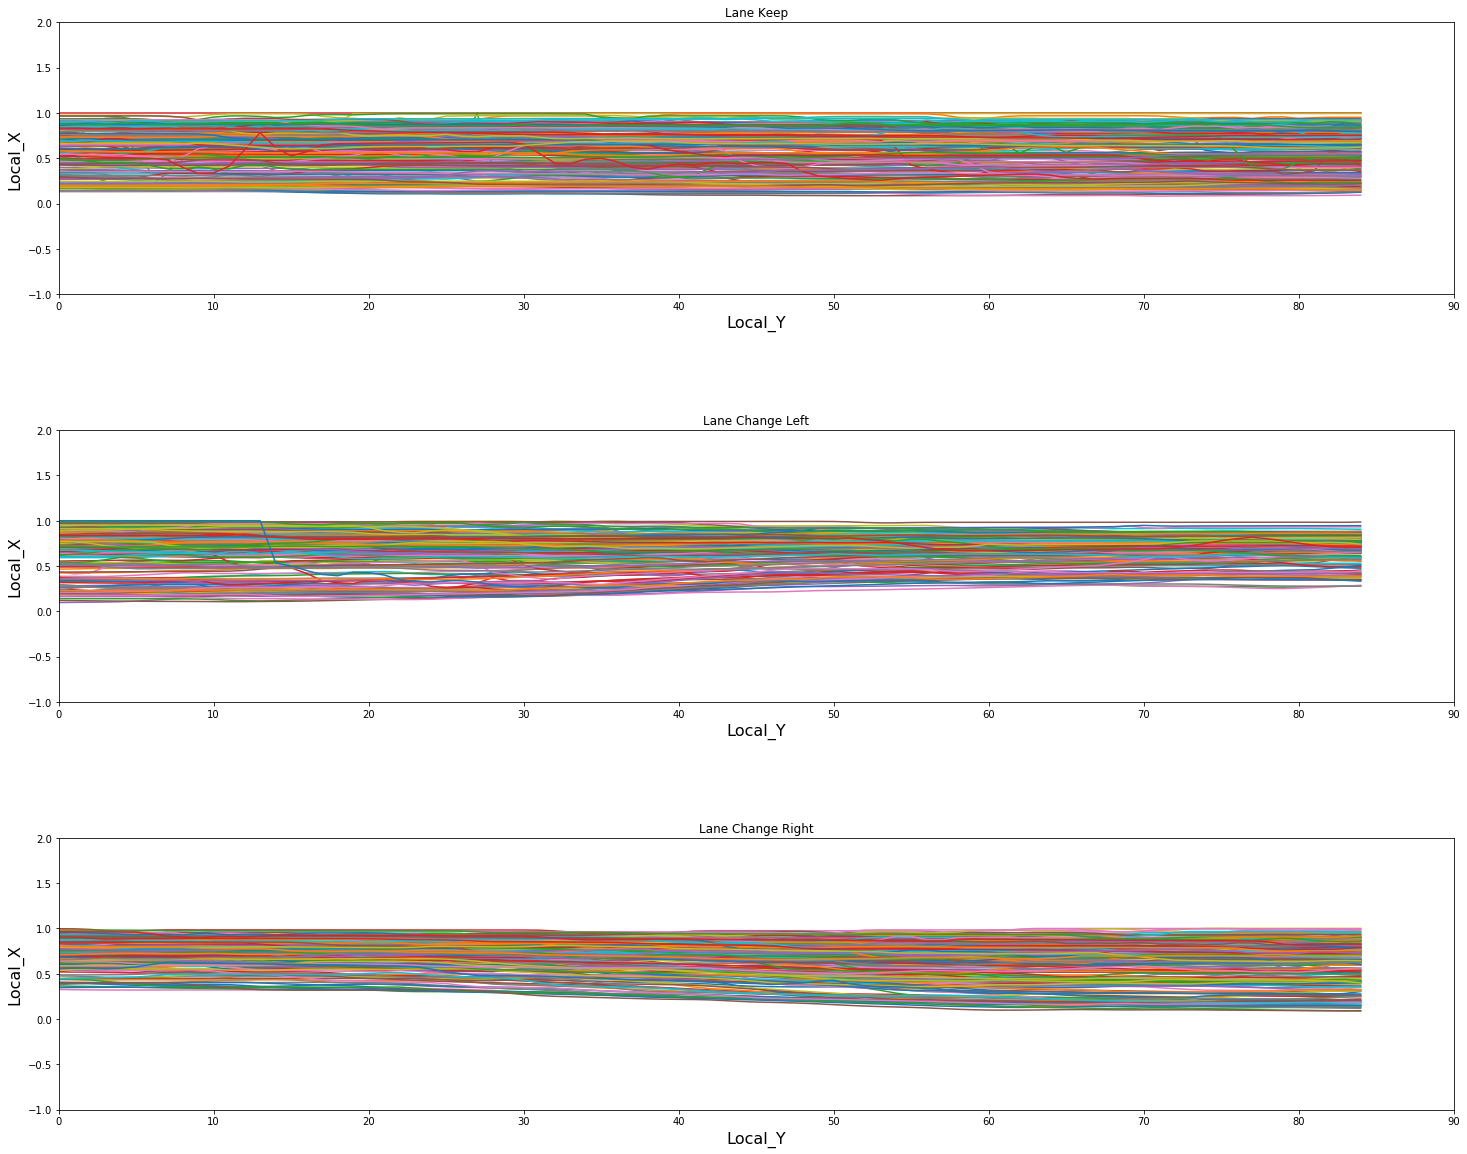

In [34]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in n_Lane_Keep_Sampel_US:
    #path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-1, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)
title('Lane Change Left')
for path in n_Lane_Change_Left_Sampel_US:
    #path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-1, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)
title('Lane Change Right')
for path in n_Lane_Change_Right_Sampel_US:
    #path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-1, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

In [11]:
Lane_Change_Left_Sampel_US=[]
Lane_Change_Right_Sampel_US=[]
Lane_Keep_Sampel_US=[]

# Standardization
for i in lane_change_left_US:
    i=i-[i.iloc[0][0],0,0]

    Lane_Change_Left_Sampel_US.append(i)
    
for i in lane_change_right_US:
    i=i-[i.iloc[0][0],0,0]
    Lane_Change_Right_Sampel_US.append(i)
    
for i in lane_keep_US:
    i=i-[i.iloc[0][0],0,0]
    Lane_Keep_Sampel_US.append(i)

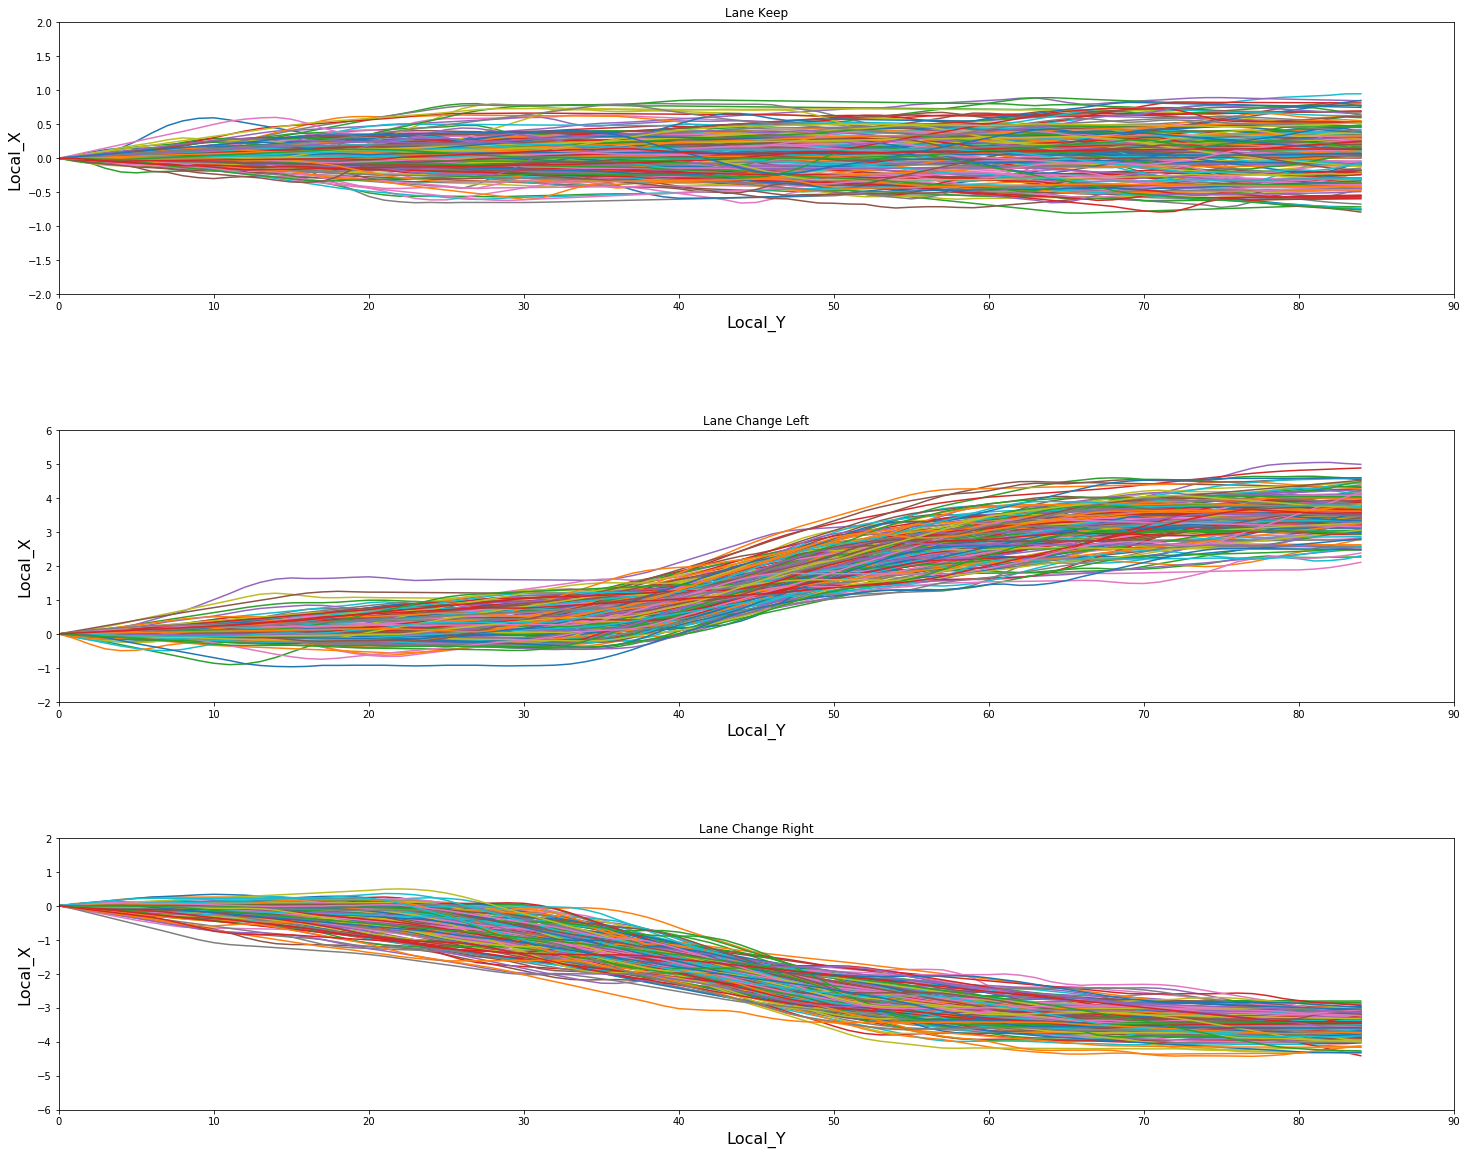

In [47]:
figure(figsize=(25,20))
subplot(3,1,1)
title('Lane Keep')
for path in Lane_Keep_Sampel_US:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-2, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)
title('Lane Change Left')
for path in Lane_Change_Left_Sampel_US:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-2, 6)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
subplot(3,1,3)
title('Lane Change Right')
for path in Lane_Change_Right_Sampel_US:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 90)
    plt.ylim(-6, 2)
    plt.plot(xline, yline)
    plt.xlabel('Local_Y', fontsize=16)
    plt.ylabel('Local_X', fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=1.0)
plt.show()

## Concat US-101 & I-80

In [12]:
Lane_Change_Left_Sampel=Lane_Change_Left_Sampel_I+Lane_Change_Left_Sampel_US
Lane_Change_Right_Sampel=Lane_Change_Right_Sampel_I+Lane_Change_Right_Sampel_US
Lane_Keep_Sampel=Lane_Keep_Sampel_I+Lane_Keep_Sampel_US


print(len(Lane_Change_Left_Sampel),len(Lane_Change_Right_Sampel),len(Lane_Keep_Sampel))

336 336 336


In [13]:
ALLOFFDATA=Lane_Keep_Sampel+Lane_Change_Right_Sampel+Lane_Change_Left_Sampel

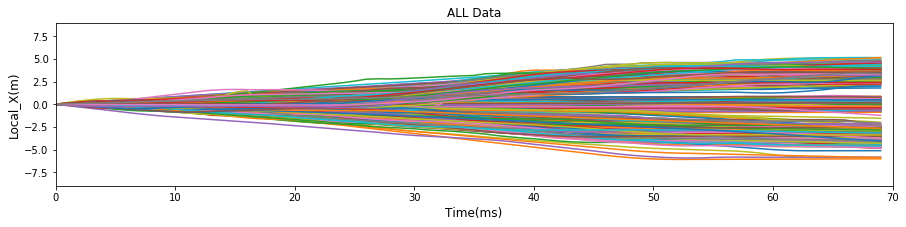

In [14]:
figure(figsize=(15,3))
title('ALL Data')
for path in ALLOFFDATA:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 70)
    plt.ylim(-9, 9)
    plt.plot(xline, yline)
    plt.xlabel('Time(ms)', fontsize=12)
    plt.ylabel('Local_X(m)', fontsize=12)
plt.show()

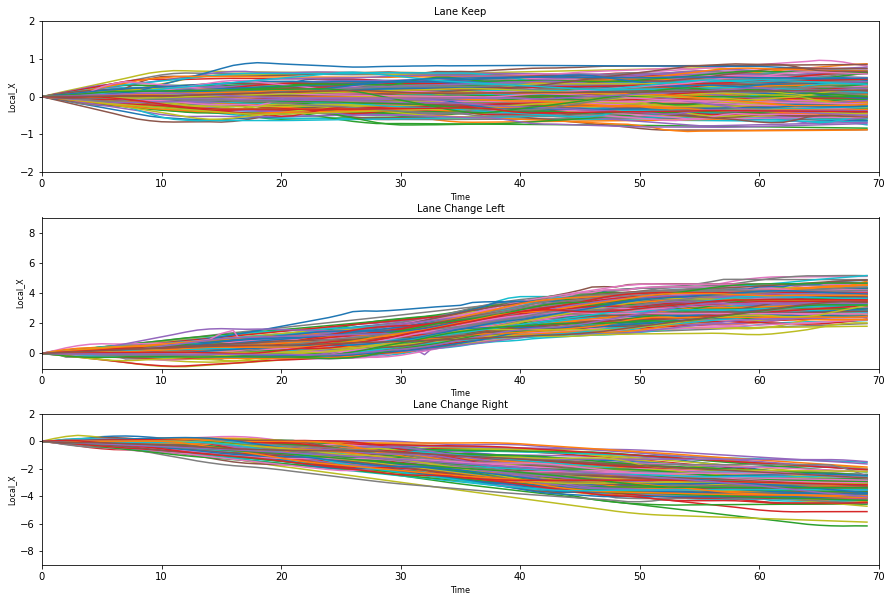

In [13]:
figure(figsize=(15,10))
subplot(3,1,1)
title('Lane Keep', fontsize=10)
for path in Lane_Keep_Sampel:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 70)
    plt.ylim(-2, 2)
    plt.plot(xline, yline)
    plt.xlabel('Time', fontsize=8)
    plt.ylabel('Local_X', fontsize=8)
#     for k in np.array([0,4,8,12,16,20]):
#         lat =k*np.ones((1,700)).flatten()#####600
#         y = np.arange(700).flatten()
#         if k!=0:
#             plt.plot(y,lat,dashes=[6, 2],c='k')
#         else:
#             plt.plot(y,lat,c='k')
subplot(3,1,2)
title('Lane Change Left', fontsize=10)
for path in Lane_Change_Left_Sampel:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 70)
    plt.ylim(-1, 9)
    plt.plot(xline, yline)
    plt.xlabel('Time', fontsize=8)
    plt.ylabel('Local_X', fontsize=8)
subplot(3,1,3)
title('Lane Change Right', fontsize=10)
for path in Lane_Change_Right_Sampel:
    path=path.to_numpy()
    yline = path[:,[0]].flatten()
    xline = [i for i in range(len(path[:,[0]].flatten()))]
    plt.xlim(0, 70)
    plt.ylim(-9, 2)
    plt.plot(xline, yline)
    plt.xlabel('Time', fontsize=8)
    plt.ylabel('Local_X', fontsize=8)
plt.subplots_adjust(hspace=0.3)
plt.show()

## Train/Test Split for HMM

In [15]:
print("Length of l_c_l = ",len(Lane_Change_Left_Sampel))
print("Length of l_c_r = ",len(Lane_Change_Right_Sampel))
print("Length of l_k = ",len(Lane_Keep_Sampel))

shuffle(Lane_Change_Left_Sampel)
shuffle(Lane_Change_Right_Sampel)
shuffle(Lane_Keep_Sampel)



l_c_l_Train=Lane_Change_Left_Sampel[0:270]
l_c_l_Test=Lane_Change_Left_Sampel[270:336]

l_c_r_Train=Lane_Change_Right_Sampel[0:270]
l_c_r_Test=Lane_Change_Right_Sampel[270:336]

l_k_Train=Lane_Keep_Sampel[0:270]
l_k_Test=Lane_Keep_Sampel[270:336]

print("Length of l_c_r Train= ",len(l_c_r_Train))
print("Length of l_c_l Train= ",len(l_c_l_Train))
print("Length of l_k Train= ",len(l_k_Train))

print("Length of l_c_r Test= ",len(l_c_r_Test))
print("Length of l_c_l Test= ",len(l_c_l_Test))
print("Length of l_k Test= ",len(l_k_Test))



Length of l_c_l =  336
Length of l_c_r =  336
Length of l_k =  336
Length of l_c_r Train=  270
Length of l_c_l Train=  270
Length of l_k Train=  270
Length of l_c_r Test=  66
Length of l_c_l Test=  66
Length of l_k Test=  66


# HMM Classifier

In [20]:
from pomegranate import *
##Modeling
## n_components=number of hidden states,X=data
Model_3= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=5, X=l_k_Train)
Model_1= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=7, X=l_c_r_Train)
Model_2= HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=7, X=l_c_l_Train)


##Fitting
Lane_Keep_Model=Model_3.fit(l_k_Train,algorithm='baum-welch')
Lane_Change_Right_Model=Model_1.fit(l_c_r_Train,algorithm='baum-welch')
Lane_Change_Left_Model=Model_2.fit(l_c_l_Train,algorithm='baum-welch')


In [26]:
import pickle
pickle.dump(Lane_Keep_Model, open('/home/m/Desktop/simulation/Lane_Keep_Model_Real.bin', 'wb'))
pickle.dump(Lane_Change_Left_Model, open('/home/m/Desktop/simulation/Lane_Change_Left_Model_Real.bin', 'wb'))
pickle.dump(Lane_Change_Right_Model, open('/home/m/Desktop/simulation/Lane_Change_Right_Model_Real.bin', 'wb'))

## BIC

In [17]:
import math
from pomegranate import *
BIC_l_k=[]
BIC_l_c_r=[]
BIC_l_c_l=[]
Logliklihood_l_k=[]
Logliklihood_l_c_r=[]
Logliklihood_l_c_l=[]
def gmmhmm(state_number,X):
    Model_c=HiddenMarkovModel.from_samples(MultivariateGaussianDistribution, n_components=state_number, X=X)
    Model1=Model_c.fit(X,algorithm='baum-welch')
    return Model1

for i in range(1,16):
    l_k=gmmhmm(i,l_k_Train)
    l_kk=np.max([l_k.log_probability(sequence)for sequence in l_k_Train])
    l_c_r=gmmhmm(i,l_c_r_Train)
    l_cr=np.max([l_c_r.log_probability(sequence) for sequence in l_c_r_Train])
    l_c_l=gmmhmm(i,l_c_l_Train)
    l_cl=np.max([l_c_l.log_probability(sequence) for sequence in l_c_l_Train])
    p=i^2+36*i-1
    l_k_p  =(-2*l_kk+p*math.log(336))
    l_c_r_p=(-2*l_cr+p*math.log(336))
    l_c_l_p=(-2*l_cl+p*math.log(336))
    
    BIC_l_k.append(l_k_p)
    BIC_l_c_r.append(l_c_r_p)
    BIC_l_c_l.append(l_c_l_p)
    Logliklihood_l_k.append(l_kk)
    Logliklihood_l_c_r.append(l_cr)
    Logliklihood_l_c_l.append(l_cl)
    print(i)
    print("BIC          ",l_k_p,"  ",l_c_r_p,"  ",l_c_l_p)
    print("Logliklihood ",l_kk,"  ",l_cr,"  ",l_cl)

1
BIC           872.7017099683717    983.077217389163    910.8724326006422
Logliklihood  -331.64285410484814    -386.83060781524387    -350.7282154209835
2
BIC           -695.5464866692452    480.2276596176802    684.5795230339029
Logliklihood  565.9149118332427    -21.972161310219953    -124.14809301833127
3
BIC           -530.4042651525955    590.7000723916005    347.2341731865378
Logliklihood  585.143246374274    24.59107760217598    146.32402720470733
4
BIC           -303.53689438903086    720.2802302351683    574.1015074235366
Logliklihood  585.1432286117741    73.23466629967456    146.32402770549038
5
BIC           -879.1205038586279    896.0878933151533    549.9515142261155
Logliklihood  951.4660340060759    63.86183541918531    236.93002496370423
6
BIC           -672.2370744412319    903.6589331418102    919.3844590209715
Logliklihood  984.7264315565133    196.7784277649922    188.91566482541157
7
BIC           -515.1824689075106    861.5529648781128    885.9875734259298
Loglik

1113.601387909316 -879.1205038586279
2418.2244199111615 480.2276596176802
2586.041336091131 347.2341731865378


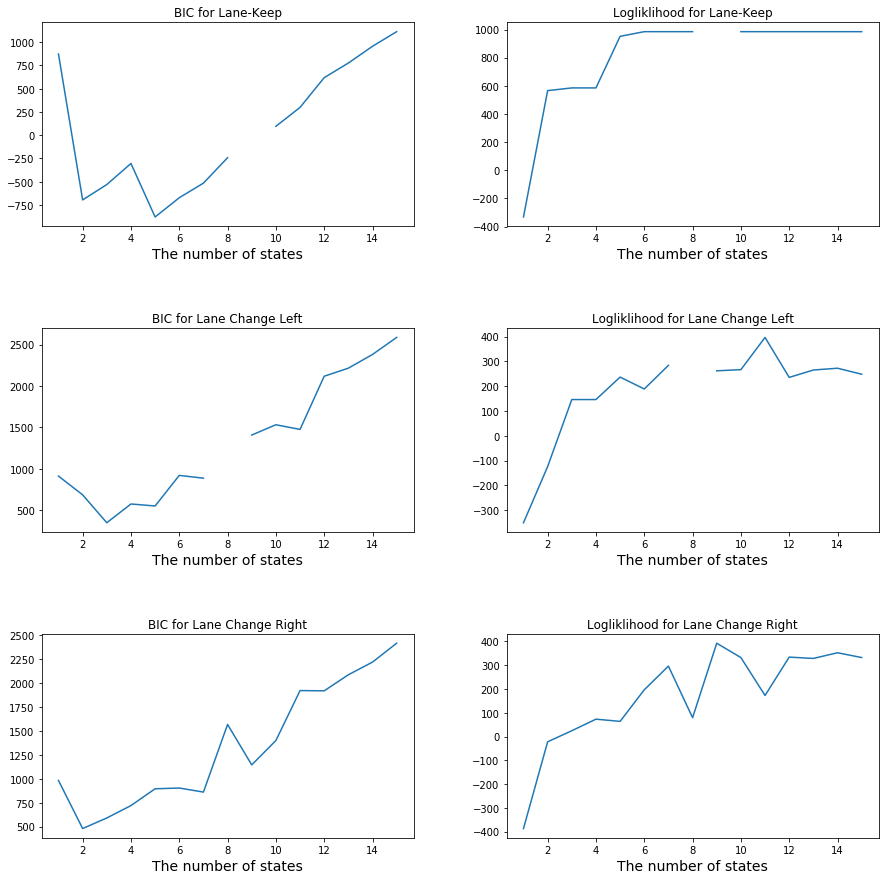

In [18]:
import matplotlib.pyplot as plt
print(max(BIC_l_k),min(BIC_l_k))
print(max(BIC_l_c_r),min(BIC_l_c_r))
print(max(BIC_l_c_l),min(BIC_l_c_l))
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.title('BIC for Lane-Keep')
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], BIC_l_k)
plt.xlabel('The number of states', fontsize=14)


plt.subplot(3,2,3)
plt.title('BIC for Lane Change Left')
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], BIC_l_c_l)
plt.xlabel('The number of states', fontsize=14)


plt.subplot(3,2,5)
plt.title('BIC for Lane Change Right')
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], BIC_l_c_r)
plt.xlabel('The number of states', fontsize=14)


# plt.subplots_adjust(hspace=1, wspace=1.0)
# plt.show()

################################################################################################

# figure(figsize=(8,8))
plt.subplot(3,2,2)
plt.title('Logliklihood for Lane-Keep')
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], Logliklihood_l_k)
plt.xlabel('The number of states', fontsize=14)

plt.subplot(3,2,4)
plt.title('Logliklihood for Lane Change Left')
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], Logliklihood_l_c_l)
plt.xlabel('The number of states', fontsize=14)


plt.subplot(3,2,6)
plt.title('Logliklihood for Lane Change Right')
# plt.xlim(0, 90)
# plt.ylim(-1, 2)
plt.plot([i for i in range(1,16)], Logliklihood_l_c_r)
plt.xlabel('The number of states', fontsize=14)


plt.subplots_adjust(hspace=.5, wspace=.25)
plt.show()

In [21]:
Model_1.graph

In [ ]:
a=[Lane_Keep_Model.log_probability(sequence) for sequence in l_c_r_Train]
print(a)
print(len(a))

## Confusion Matrix

lengh of all test data :  198
198 198 198
[[48  1 17]
 [ 1 64  1]
 [ 0  0 66]]


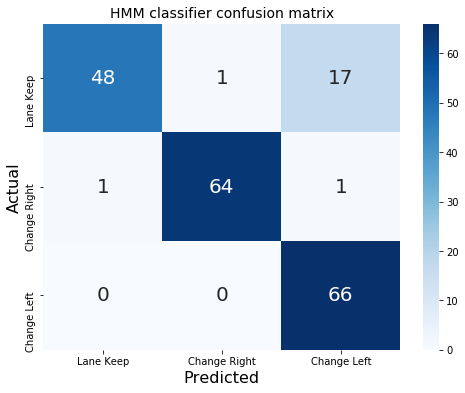

In [22]:
# l_k_Test
# l_c_l_Test
# l_c_r_Test
list_l_k_Test=[[]]
count=0
for i in l_k_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_k_Test[count].append(i) 
    list_l_k_Test[count].append("Lane Keep")
    list_l_k_Test.append([])
    count=count+1


#print(len(list_l_k_Test))
#print(list_l_k_Test[20])
list_l_k_Test = list_l_k_Test[:-1]
#print(len(list_l_k_Test))
#####################
list_l_c_l_Test=[[]]
count=0
for i in l_c_l_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_c_l_Test[count].append(i) 
    list_l_c_l_Test[count].append("Change Left")
    list_l_c_l_Test.append([])
    count=count+1


#print(len(list_l_c_l_Test))
#print(list_l_c_l_Test[20])
list_l_c_l_Test = list_l_c_l_Test[:-1]
#print(len(list_l_c_l_Test))
############################
list_l_c_r_Test=[[]]
count=0
for i in l_c_r_Test:
    #print("D")
    #print(list_l_k_Test)
    list_l_c_r_Test[count].append(i) 
    list_l_c_r_Test[count].append("Change Right")
    list_l_c_r_Test.append([])
    count=count+1


#print(len(list_l_c_r_Test))
#print(list_l_c_r_Test[20])
list_l_c_r_Test = list_l_c_r_Test[:-1]
#print(len(list_l_c_r_Test))

All_Test = list_l_c_r_Test + list_l_k_Test + list_l_c_l_Test
print("lengh of all test data : ",len(All_Test))
shuffle(All_Test)


from sklearn.metrics import confusion_matrix
y_true = []
y_pred = []
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(All_Test)):
    Turn_Left=Lane_Change_Left_Model.log_probability(All_Test[i][0])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Right_Model.log_probability(All_Test[i][0])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(All_Test[i][0])
    L_K.append(straight)
    y_true.append(All_Test[i][1])
    
    
    #print(y_pred )
#     print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
#     print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
#     print('Likelihoods for Lane_Keep_Model =',straight)
    
    if (Turn_Left>Turn_Right) and (Turn_Left> straight):
        #print("###Prediction = Lane_Change_Left")
        y_pred.append("Change Left")
    elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
        #print("###Prediction = Lane_Change_Right")
        y_pred.append("Change Right")
    elif (straight>Turn_Left) and (straight> Turn_Left):
        #print("###3Prediction = Lane_Keep")
        y_pred.append("Lane Keep")

print(len(L_K),len(L_C_R),len(L_C_L))

import matplotlib.pyplot as plt
import seaborn
labels = ["Lane Keep", "Change Right","Change Left"]
conf_mat =confusion_matrix(y_true, y_pred,labels)
print(conf_mat)
fig, ax = plt.subplots(figsize=(8,6))
seaborn.heatmap(conf_mat, annot=True, fmt='d',annot_kws={'fontsize': 20},cmap = "Blues"
                ,xticklabels=labels,yticklabels=labels)
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.ylabel('Actual',fontsize=16)
plt.xlabel('Predicted',fontsize=16)
plt.title('HMM classifier confusion matrix',fontsize=14)
plt.show()

Confusion matrix, without normalization
[[66  0  0]
 [ 1 64  1]
 [17  1 48]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.02 0.97 0.02]
 [0.26 0.02 0.73]]


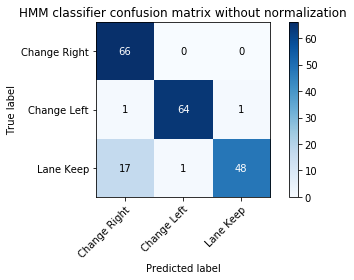

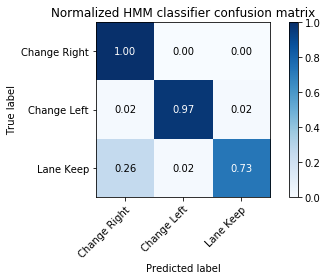

In [23]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = ["Lane Keep", "Change Right","Change Left"]

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes #= [0, 1, 2]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=["Change Right","Change Left","Lane Keep"], 
                      title='HMM classifier confusion matrix without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=["Change Right","Change Left","Lane Keep"] , normalize=True,
                      title='Normalized HMM classifier confusion matrix')

plt.show()

In [24]:
def accuracy(conf_mat):
    diagonal_sum = conf_mat.trace()
    sum_of_all_elements = conf_mat.sum()
    return diagonal_sum / sum_of_all_elements 

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_true, y_pred)

In [25]:
print('accuracy = ',accuracy(conf_mat))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy =  0.898989898989899
precision: [0.79 0.98 0.98]
recall: [1.   0.97 0.73]
fscore: [0.88 0.98 0.83]
support: [66 66 66]


## Liklihood

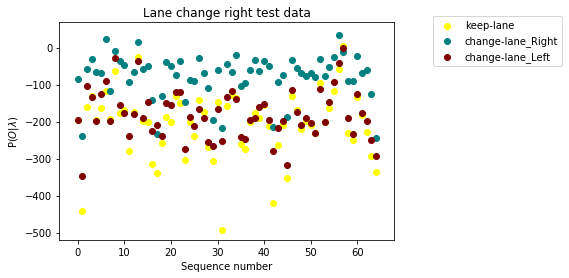

In [27]:
##Probability
Test=l_c_r_Test
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(Test)-1):
    Turn_Left=Lane_Change_Left_Model.log_probability(Test[i])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Right_Model.log_probability(Test[i])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(Test[i])
    L_K.append(straight)
    
    
    
    #print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
    #print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
    #print('Likelihoods for Lane_Keep_Model =',straight)
    
#     if (Turn_Left>Turn_Right) and (Turn_Left> straight):
#         print("###Prediction = Lane_Change_Left")
#     elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
#         print("###Prediction = Lane_Change_Right")
#     elif (straight>Turn_Left) and (straight> Turn_Left):
#         print("###3Prediction = Lane_Keep")

fig = plt.figure()
plt.xlabel('Sequence number')
plt.ylabel('P($ O|\lambda $)')
plt.title('Lane change right test data') 
plt.scatter(x =list(range(len(Test)-1)),y=L_K,c='yellow',label="keep-lane")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_R,c='teal',label="change-lane_Right")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_L,c='maroon',label="change-lane_Left")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

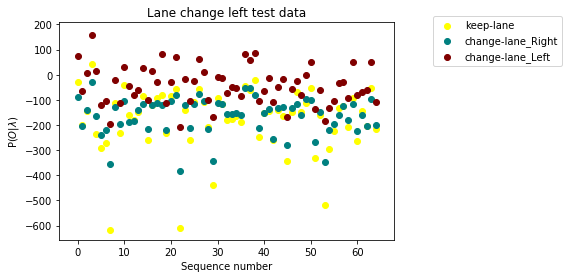

In [28]:
##Probability
Test=l_c_l_Test
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(Test)-1):
    Turn_Left=Lane_Change_Left_Model.log_probability(Test[i])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Right_Model.log_probability(Test[i])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(Test[i])
    L_K.append(straight)
    
    
    
    #print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
    #print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
    #print('Likelihoods for Lane_Keep_Model =',straight)
    
#     if (Turn_Left>Turn_Right) and (Turn_Left> straight):
#         print("Prediction = Lane_Change_Left")
#     elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
#         print("Prediction = Lane_Change_Right")
#     elif (straight>Turn_Left) and (straight> Turn_Left):
#         print("Prediction = Lane_Keep")

fig = plt.figure()
plt.xlabel('Sequence number')
plt.ylabel('P($ O|\lambda $)')
plt.title('Lane change left test data') 
plt.scatter(x =list(range(len(Test)-1)),y=L_K,c='yellow',label="keep-lane")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_R,c='teal',label="change-lane_Right")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_L,c='maroon',label="change-lane_Left")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

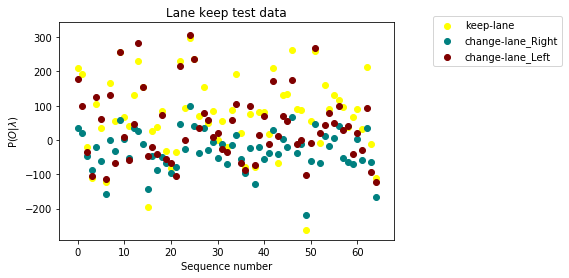

In [29]:
##Probability
Test=l_k_Test
L_K=[]
L_C_R=[]
L_C_L=[]
for i in range(len(Test)-1):
    Turn_Left=Lane_Change_Left_Model.log_probability(Test[i])
    L_C_L.append(Turn_Left)
    Turn_Right=Lane_Change_Right_Model.log_probability(Test[i])
    L_C_R.append(Turn_Right)
    straight=Lane_Keep_Model.log_probability(Test[i])
    L_K.append(straight)
    
    
    
    #print('Likelihoods for Lane_Change_Left_Model =',Turn_Left)
    #print('Likelihoods for Lane_Change_Right_Model =',Turn_Right)
    #print('Likelihoods for Lane_Keep_Model =',straight)
    
#     if (Turn_Left>Turn_Right) and (Turn_Left> straight):
# #         print("Prediction = Lane_Change_Left")
#     elif (Turn_Right>Turn_Left) and (Turn_Right> straight):
# #         print("Prediction = Lane_Change_Right")
#     elif (straight>Turn_Left) and (straight> Turn_Left):
# #         print("Prediction = Lane_Keep")

fig = plt.figure()
plt.xlabel('Sequence number')
plt.ylabel('P($ O|\lambda $)')
plt.title('Lane keep test data') 
plt.scatter(x =list(range(len(Test)-1)),y=L_K,c='yellow',label="keep-lane")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_R,c='teal',label="change-lane_Right")
plt.scatter(x =list(range(len(Test)-1)),y=L_C_L,c='maroon',label="change-lane_Left")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [84]:
def accuracy(conf_mat):
    diagonal_sum = conf_mat.trace()
    sum_of_all_elements = conf_mat.sum()
    return diagonal_sum / sum_of_all_elements 

from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_true, y_pred)

In [85]:
print('accuracy = ',accuracy(conf_mat))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

accuracy =  0.9242424242424242
precision: [0.89 0.9  1.  ]
recall: [1.   1.   0.77]
fscore: [0.94 0.95 0.87]
support: [66 66 66]


## ROC-AUC

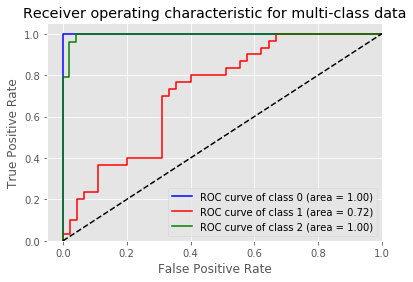

In [104]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle
plt.style.use('ggplot')

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [103]:
p=roc_auc_score(y_true, y_pred)

ValueError: multiclass format is not supported

# RNN Models

In [19]:
from matplotlib import pyplot as plt
import datetime
from datetime import datetime
import matplotlib.pyplot as plt 
import math
import os
import os.path
import tensorflow as tf
import time
from pylab import *

## Sequence Labeling

In [20]:
from sklearn.model_selection import train_test_split
def label_sticking(path,label):     
    Sample=[[]]
    count=0
    for i in path:
        Sample[count].append(i) 
        Sample[count].append(label)
        Sample.append([])
        count=count+1
    del Sample[-1]
    print("length of {}  list :".format(label),len(path))
    return Sample
lane_keep=label_sticking(Lane_Keep_Sampel,label="Lane Keep")
lane_change_left=label_sticking(Lane_Change_Left_Sampel,label="Change Left")
lane_change_right=label_sticking(Lane_Change_Right_Sampel,label="Change Right")
All=lane_keep+lane_change_left+lane_change_right
#print(len(All))
Data=[[i[0].to_numpy(),i[1]] for i in All]
shuffle(Data)


#print(len(Data))
x=[]
y=[]
for i in Data:
    x.append([i[0]])
    if i[1]=='Lane Keep':
        y.append([0,0,1])
    if i[1]=='Change Left':
        y.append([0,1,0])
    if i[1]=='Change Right':
        y.append([1,0,0])
    
x= np.vstack(x)
y= np.vstack(y)

    
print("x shape :",x.shape)       
print("y shape :",y.shape) 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,train_size=0.8)

length of Lane Keep  list : 336
length of Change Left  list : 336
length of Change Right  list : 336
x shape : (1008, 70, 3)
y shape : (1008, 3)


In [21]:
x_train.shape, x_test.shape

((806, 70, 3), (202, 70, 3))

In [22]:
from numpy import mean ,std ,dstack
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM, BatchNormalization, Bidirectional
from keras.layers import GRU
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.models import Model, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [23]:
n_timesteps= x_train.shape[1]
n_features =x_train.shape[2]

## Models

In [24]:
# LSTM 
model = Sequential()
model.add(Bidirectional(LSTM(20, input_shape=(85,3))))

# add batch normalization
model.add( BatchNormalization() )
model.add(Dropout(0.4))

model.add(Dense(50, activation='relu'))
model.add( BatchNormalization() )
model.add(Dropout(0.4))

model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# #model.summary()
# model = Sequential()
# model.add(LSTM(5, input_shape=(85,3)))

# # add batch normalization
# model.add( BatchNormalization() )
# model.add(Dropout(0.5))

# model.add(Dense(500, activation='relu'))
# model.add(Dense(3, activation='softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
num_epochs=45
h=model.fit(x_train,  y_train, validation_split=.3, epochs=num_epochs, verbose=True)
model.summary()

Epoch 1/45



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



18/18 [==============================] - 1s 67ms/step - loss: 1.4226 - accuracy: 0.4504 - val_loss: 1.0034 - val_accuracy: 0.5992
Epoch 2/45
18/18 [==============================] - 1s 32ms/step - loss: 0.8789 - accuracy: 0.6277 - val_loss: 0.8855 - val_accuracy: 0.7975
Epoch 3/45
18/18 [==============================] - 1s 31ms/step - loss: 0.6626 - accuracy: 0.7429 - val_loss: 0.7472 - val_accuracy: 0.9628
Epoch 4/45
18/18 [==============================] - 1s 31ms/step - loss: 0.5373 - accuracy: 0.7926 - val_loss: 0.6345 - val_accuracy: 0.9339
Epoch 5/45
18/18 [==============================] - 1s 33ms/step - loss: 0.3567 - accuracy: 0.8759 - val_loss: 0.5146 - val_accuracy: 0.9669
Epoch 6/45
18/18 [==============================] - 1s 31ms/step - loss: 0.2986 - accuracy: 0.8865 - val_loss: 0.4033 - val_accuracy: 0.9876
Epoch 7/45
18/18 [==============================] - 1s 45ms/step - loss: 0.2589 - accuracy: 0.8989 - val_loss: 0.3079 - val_accuracy: 0.9876
Epoch 8/45
18/18 [======

In [26]:
model.save('/home/m/Desktop/simulation/LSTM_Real.hdf5')

In [37]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 6ms/step - loss: 1.1264e-04 - accuracy: 1.0000
Accuracy: 100.00%


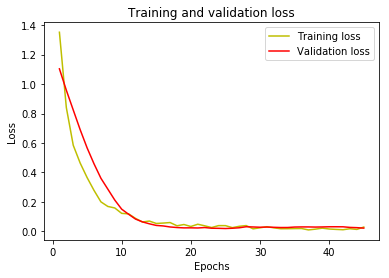

In [38]:
loss = h.history['loss']
#print(loss)
val_loss = h.history['val_loss']
#print(val_loss)
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

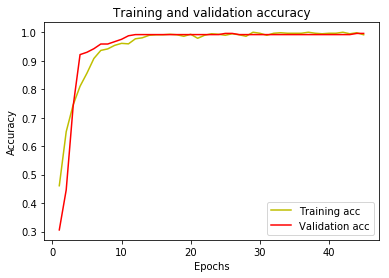

In [39]:
acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [91]:
predictions = model.predict(x_test)
y_pred=[np.argmax(np.round(i)) for i in predictions]
y_true=[]
#print(y_test[0][0],y_test[0][1],y_test[0][2])
for i in y_test:
    if i[0]==1:
        y_true.append(0)
    if i[1]==1:
        y_true.append(1)
    if i[2]==1:
        y_true.append(2)
#     if i==array([0, 0, 1]):
#         print(111111111111111111111)
#         y_true.append(0)
#     if i==array([0, 1, 0]):
#         y_true.append(1)
#     if i==array([1, 0, 0]):
#         y_true.append(2)

print('y_test :',y_pred,'y_true :',y_true)
print(len(y_pred),len(y_true))

y_test : [0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 1, 1, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 2] y_true : [0, 0, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1,

[[63  0  0]
 [ 0 70  0]
 [ 0  0 69]]


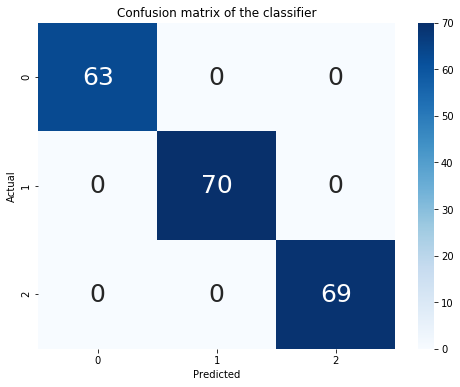

In [92]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn
labels = ["Lane Keep", "Change Right","Change Left"]
conf_mat =confusion_matrix( y_pred,y_true)
print(conf_mat)
fig, ax = plt.subplots(figsize=(8,6))
seaborn.heatmap(conf_mat, annot=True, fmt='d',annot_kws={'fontsize': 25},cmap = "Blues")
# ax.set_xticklabels([''] + labels)
# ax.set_yticklabels([''] + labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix of the classifier')
plt.show()

Confusion matrix, without normalization
[[63  0  0]
 [ 0 70  0]
 [ 0  0 69]]
Normalized confusion matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


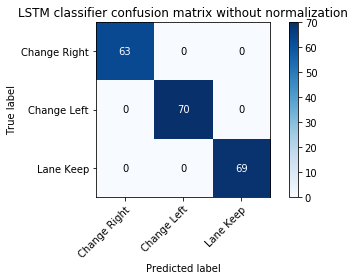

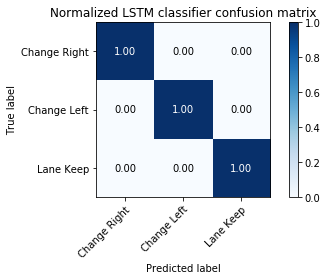

In [94]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = ["Lane Keep", "Change Right","Change Left"]

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes #= [0, 1, 2]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=["Change Right","Change Left","Lane Keep"], 
                      title='LSTM classifier confusion matrix without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=["Change Right","Change Left","Lane Keep"] , normalize=True,
                      title='Normalized LSTM classifier confusion matrix')

plt.show()

# Leave

In [74]:
def model_v2():

  # use gru instead of lstm

    model = Sequential()
    model.add(Bidirectional(GRU(15, input_shape=(85,3))))
    model.add( BatchNormalization() )
    model.add(Dropout(0.4))

    model.add(Dense(40, activation='relu'))

    model.add( BatchNormalization() )
    model.add( Dropout(.4) )

    model.add(Dense(3, activation='softmax'))
#     model.summary()
    return model

In [81]:
def model_v3():

    # use convolution instead of rnn
    input = Input((1, 85, 3))
    x = Conv2D(5, 1)(input)
    x = Flatten()(x)
    x = Dense(20, activation="relu")(x)
    output = Dense(3, activation="softmax")(x)

    return Model(input, output)

In [76]:
# def model_v3():
#     model = Sequential()
#     model.add(Conv2D(120,(5, 1), input_shape=(1,120,3)))##     
#     model.add(Flatten())
#     model.add(Dense(40))
#     model.add(Activation('relu'))
#     model.add(Dense(3))
#     model.add(Activation('softmax'))
#     model.summary()
#     return model

In [75]:
def train_rnn():
    global model

  # reproduce same result
  # reset_random_seeds()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit network
  #batch_size=15
    num_epochs=35

    h=model.fit(x_train,  y_train, validation_split=.3, epochs=num_epochs, verbose=True)

    return model, h

In [76]:
model = model_v2()

model, h = train_rnn()
model.summary()

Epoch 1/35

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

18/18 [==============================] - 1s 57ms/step - loss: 1.3502 - accuracy: 0.4716 - val_loss: 1.0443 - val_accuracy: 0.4835
Epoch 2/35
18/18 [==============================] - 1s 44ms/step - loss: 1.1422 - accuracy: 0.5479 - val_loss: 0.9578 - val_accuracy: 0.5537
Epoch 3/35
18/18 [==============================] - 1s 45ms/step - loss: 1.0072 - accuracy: 0.6011 - val_loss: 0.8421 - val_accuracy: 0.7810
Epoch 4/35
18/18 [==============================] - 1s 45ms/step - loss: 0.8650 - acc

In [77]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 8ms/step - loss: 0.0053 - accuracy: 1.0000
Accuracy: 100.00%


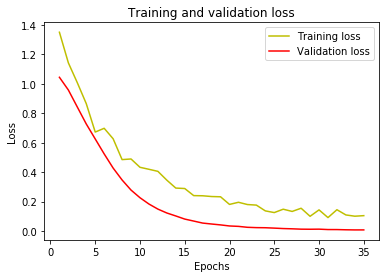

In [78]:
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## GRU

In [88]:
def train_rnn():
    global model

  # reproduce same result
  # reset_random_seeds()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # fit network
  #batch_size=15
    num_epochs=35

    h=model.fit(x_train,  y_train, validation_split=.3, epochs=num_epochs, verbose=True)

    return model, h

In [89]:
model = model_v2()
model, h = train_rnn()

Epoch 1/35

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

18/18 [==============================] - 1s 61ms/step - loss: 1.3419 - accuracy: 0.4450 - val_loss: 1.0053 - val_accuracy: 0.3926
Epoch 2/35
18/18 [==============================] - 1s 45ms/step - loss: 1.0520 - accuracy: 0.5638 - val_loss: 0.8356 - val_accuracy: 0.4835
Epoch 3/35
18/18 [==============================] - 1s 45ms/step - loss: 0.8538 - accuracy: 0.6188 - val_loss: 0.6540 - val_accuracy: 0.6818
Epoch 4/35
18/18 [==============================] - 1s 45ms/step - loss: 0.6600 - acc

In [91]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7/7 [==============================] - 0s 8ms/step - loss: 6.4220e-04 - accuracy: 1.0000
Accuracy: 100.00%


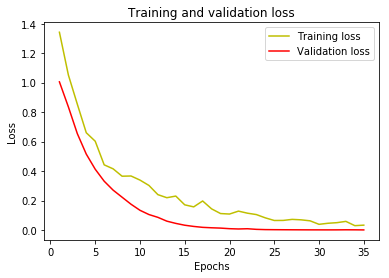

In [92]:
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Convolutional

In [82]:
def train_conv():
    global conv_model
  # reproduce same result
  # reset_random_seeds()

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
    # fit network
    batch_size=12
    num_epochs=20

    h=model.fit(conv_x_train, y_train, validation_split=.3 ,batch_size=batch_size,
                epochs=num_epochs, verbose=True)

    return model, h

In [84]:
conv_x_train = x_train.reshape((806, 1, 85, 3))
conv_x_test = x_test.reshape((202, 1, 85, 3))

In [85]:
model = model_v3()
model, h = train_conv()

Epoch 1/20
47/47 [==============================] - 0s 4ms/step - loss: 0.8871 - accuracy: 0.7677 - val_loss: 0.2243 - val_accuracy: 0.9174
Epoch 2/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9415 - val_loss: 0.1744 - val_accuracy: 0.9256
Epoch 3/20
47/47 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9716 - val_loss: 0.1060 - val_accuracy: 0.9587
Epoch 4/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9911 - val_loss: 0.0958 - val_accuracy: 0.9711
Epoch 5/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0522 - accuracy: 0.9911 - val_loss: 0.0762 - val_accuracy: 0.9752
Epoch 6/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0605 - accuracy: 0.9840 - val_loss: 0.1276 - val_accuracy: 0.9669
Epoch 7/20
47/47 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9858 - val_loss: 0.0554 - val_accuracy: 0.9793
Epoch 8/20
47/47 [==

In [90]:
scores = model.evaluate(conv_x_test, y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

ValueError: in user code:

    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:941 test_function  *
        outputs = self.distribute_strategy.run(
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/distribute/distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:909 test_step  **
        y_pred = self(x, training=False)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/base_layer.py:886 __call__
        self.name)
    /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 1, 85, 3]


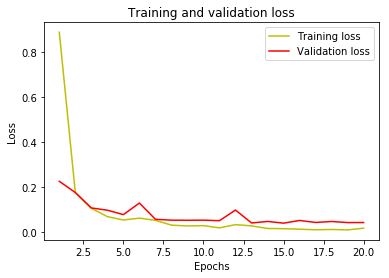

In [87]:
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [146]:
# implement bidirectional lstm
def model_v1():
    model = Sequential()
    model.add(
      Bidirectional(
          LSTM(12, input_shape=(85,3))
      )
  )

    model.add( BatchNormalization() )
    model.add(Dropout(0.4))

    model.add(Dense(40, activation='relu'))

    model.add( BatchNormalization() )
    model.add( Dropout(.4) )

    model.add(Dense(3, activation='softmax'))

    return model